# Отчёт по статье "Passive Underwater Target Tracking: Conditionally Minimax Nonlinear Filtering with Bearing-Doppler Observations"

# Описание модели
Решается задача о слежении за маневрированием подводного аппарата.

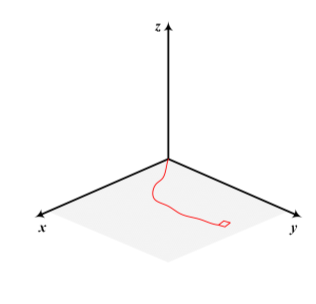

## Динамическая система

Движение аппарата описывается следующей системой:


Получим следующую динамическую систему:
$$
\left\{\begin{array}{l}
d X_t=d x_t=v_t \cos \varphi_t d t \\
d Y_t=d y_t=v_t \sin \varphi_t d t \\
d Z_t=d z_t=0 \\
d v_t=0 \\
d \varphi_t=\frac{a_t^n}{v_t} d t \\
d a_t^n=\left(-\lambda a_t^n+\nu\right) d t+\mu d W_t
\end{array}\right.
$$

$x_t, y_t, z_t$ --- координаты подводного аппарата в его системе отсчета, $X_t, Y_t, Z_t$ --- координаты системы отсчёта в системе наблюдателя (но для простоты было указано взять матрицу поворота единичную, а сдвиг отвечает начальным условиям на $x_t, y_t, z_t$, эти константы из статьи отражены в приложении в коде)

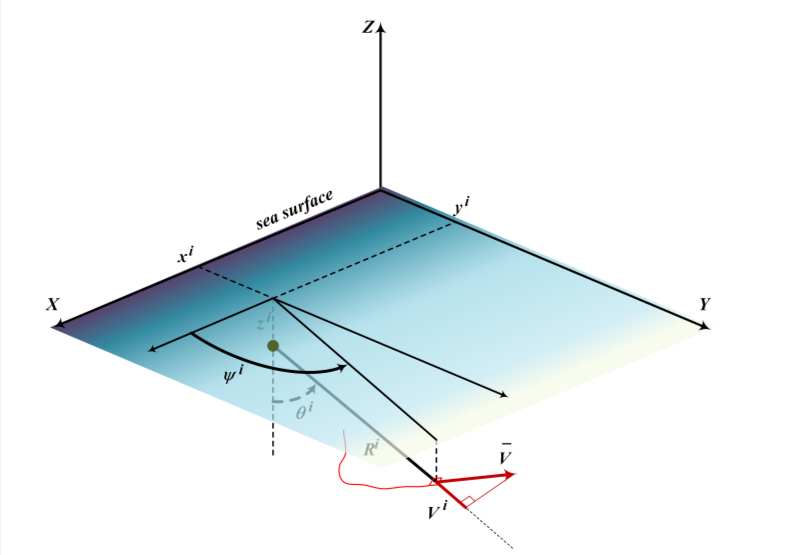

Скрытое состояние нашей системы описывается 6-мерным вектором: $\mathcal{X}_t=$ $\left(\mathbf{X}_t, v_t, \varphi_t, a_t^n\right)^T$, в свою очередь система примет вид:
$$
d \mathcal{X}_t=a\left(\mathcal{X}_t\right) d t+b(t) d W_t
$$

## Система наблюдения
Каждый из датчиков наблюдает следующие величины:
$$
\left\{\begin{array}{l}
\xi_{t_k}^i=\frac{Z_{t_k}-Z^i}{R_{t_k}^i}+v_k^{\xi^i}, \\
\eta_{t_k}^i=\frac{X_{t_k}-X^i}{r_{t_k}^i}+v_k^{\eta^i}
\end{array}\right.
$$

где $i=1, . ., N$ и
$$
\begin{aligned}
& R_{t_k}^i=\sqrt{\left(X_{t_k}-X^i\right)^2+\left(Y_{t_k}-Y^i\right)^2+\left(Z_{t_k}-Z^i\right)^2}, \\
& r_{t_k}^i=\sqrt{\left(X_{t_k}-X^i\right)^2+\left(Y_{t_k}-Y^i\right)^2}
\end{aligned}
$$

расстояние от наблюдателя до цели и длина проекции на плоскость $Z=0$ соответственно.


Последняя компонента наблюдений описывает эффект Доплера из-за движения аппарата относительно сенсора.
$$
\omega_{t_k}^i=\frac{\omega_0}{1-V_{t_k}^i / C}+v_k^{\omega^i}
$$

где $V_{t_k}^i=\frac{V_{t_k}^X\left(X_{t_k}-X^i\right)+V_{t_k}^Y\left(Y_{t_k}-Y^i\right)+V_{t_k}^Z\left(Z_{t_k}-Z^i\right)}{R_{t_k}^i}-$ скорость аппарата относительно наблюдателя. Последовательность $\left(v_k^{\xi^1}, v_k^{\eta^1}, v_k^{\omega^1}, \ldots, v_k^{\xi^N}, v_k^{\eta^N}, v_k^{\omega^N}\right)^T$ описывает погрешность показаний датчиков и состоит из независимых и одинаково распределенных векторов с некоррелированными компонентами.

# Постановка задачи
Получили задачу фильтрации с дискретно-непрерывной системой:
$$
d \mathcal{X}(t)=a(\mathcal{X}(t)) d t+b(t) d W_t,
$$
$\mathcal{X}(0)=\mathcal{X}_0 \sim \pi_0: \mathbb{E}\left[\mathcal{X}_0\right]=\mu_0, \operatorname{cov}\left(\mathcal{X}_0, \mathcal{X}_0\right)=\mathbf{D}_0$.
$$
\mathcal{Y}\left(t_k\right)=A\left(\mathcal{X}\left(t_k\right)\right)+B_{t_k} W_{t_k}, k \in \mathbb{N},
$$

В нашей задаче

$$
a\left(\mathcal{X}_t\right)=\left(\begin{array}{c}
v_t \cos \left(\varphi_t\right) \\
v_t \sin \left(\varphi_t\right) \\
0 \\
0 \\
\frac{a_t^n}{v_t} \\
-\lambda a_t^n+\nu
\end{array}\right) $$

$$b(t) = b=\left(\begin{array}{llllll}
 0 \\
0 \\
 0 \\
 0 \\
 0 \\
\mu
\end{array}\right)
$$

Комбинированные пеленгово-доплеровские наблюдения:
$$
Y_k=\operatorname{col}\left(\left(\xi_{t_k}^i, \eta_{t_k}^i, \omega_{t_k}^i\right)^T\right)
$$

$$
\begin{gathered}
A\left(\mathcal{X}_t\right)=\operatorname{col}\left(\left\{\left(\dfrac{Z_t-Z^i}{R_t^i}, \dfrac{X_t-X^i}{r_t^i}, \dfrac{\omega_0}{1-V_t^i / C}\right)\right\}\right), \\
B_{t_k}=B=\operatorname{diag}\left(\operatorname{col}\left(\left\{\left(\sigma_{i, 1}^2, \sigma_{i, 2}^2, \sigma_{i, 3}^2\right)\right\}\right)\right), i=1, \ldots, N
\end{gathered}
$$

где $\operatorname{col}()$ — конкатенация векторов в один, $i=1, \ldots, N, N$ — число датчиков.



Посчитаем для реализации EKF-1 матрицы Якоби для $a$ и $A$:
$$
\frac{\partial a\left(\mathcal{X}_t\right)}{\partial \left(\mathcal{X}_t\right)}=\left(\begin{array}{cccccc}
0 & 0 & 0 & \cos \varphi_t & -v_t \sin \varphi_t & 0 \\
0 & 0 & 0 & \sin \varphi_t & v_t \cos \varphi_t & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -a_t^n / v_t^2 & 0 & 1 / v_t \\
0 & 0 & 0 & 0 & 0 & -\lambda
\end{array}\right)
$$


$$
\frac{\partial A\left(\mathcal{X}_t\right)}{\partial \left(\mathcal{X}_t\right)}=\operatorname{col}\left(\left\{ \left(\begin{array}{cccccc}
\xi_{X}^{i} & \xi_{Y}^{i} & \xi_{Z}^{i} & 0 & 0 & 0 \\
\eta_{X}^{i} & \eta_{Y}^{i} & 0 & 0 & 0 & 0 \\
\omega_{X}^{i} & \omega_{Y}^{i} & \omega_{Z}^{i} & \omega_{v}^{i} & \omega_{\phi}^{i} & 0 \\
\end{array}\right)  \right\} _ {i=1} ^ {N} \right)_{,}
$$
\begin{gathered}
\xi_{X}^{i}=-\dfrac{\left(Z_t-Z^i\right)\left(X_t-X^i\right)}{\left(R_t^i\right)^3} \\
\xi_{Y}^{i}=-\dfrac{\left(Z_t-Z^i\right)\left(Y_t-Y^i\right)}{\left(R_t^i\right)^3} \\
\xi_{Z}^{i}=\frac{R^2-\left(Z_t-Z^i\right)^2}{\left(R_t^i\right)^3} \\
\eta_{X}^{i}=\frac{\left(r_t^i\right)^2 - \left(X_t-X^i\right)^2}{\left(r_t^i\right)^3} \\
\eta_{Y}^{i}=-\frac{\left(X_t-X^i\right)\left(Y_t-Y^i\right)}{\left(r_t^i\right)^3} \\
\omega_{X}^{i}=-\omega_0 \frac{V_{t_k}^X\left(X_t-X^i\right)-V_{t_k}^i R}{R^2 C\left(1-V_{t_k}^i / C\right)^2} \\
\omega_{Y}^{i}=-\omega_0 \frac{V_{t_k}^Y\left(Y_t-Y^i\right)-V_{t_k}^i R}{R^2 C\left(1-V_{t_k}^i / C\right)^2} \\
\omega_{Z}^{i}=-\omega_0 \frac{\left(Z_t-Z^i\right) V_{t_k}^i}{R^2 C\left(1-V_{t_k}^i / C\right) ^ 2} \\
\omega_{v}^{i}=\omega_0 \frac{V_{t_k}^i}{v_t C\left(1-V_{t_k}^i / C\right)^2 } \\
\omega_{\phi}^{i}=\omega_0 \frac{\left(v_t \cos \varphi_t\right)_t\left(Y_t-Y^i\right)-\left(v_t \sin \varphi_t\right)_t\left(X_t-X^i\right)}{RC\left(1-V_{t_k}^i / C\right)^2} \\
\end{gathered}

$N$ — число датчиков. То есть матрица Якоби для $A\left(\mathcal{X}_t\right)$ имеет размер $3N \times 6.$

## константы из статьи

$\mu_{01} = 0$ м — среднее для 1-й компоненты

$\sigma_{01} = 1000$ м — отклонение для 1-й компоненты

$\mu_{02} = 20000$ м — среднее для 2-й компоненты

$\sigma_{02} = 1000$ м — отклонение для 2-й компоненты

$\mu_{03} = -1000$ м — среднее для 3-й компоненты

$\sigma_{03} = 100$ м — отклонение для 3-й компоненты

$v_{min} = 5$ м/c — минимальная скорость

$v_{max} = 12$ м/c — максимальная скорость

$\mu_{0 \phi} = - \dfrac{\pi}{2}$ рад — среднее начального градуса

$\sigma_{0 \phi} = 0.1$ рад — отклонение начального градуса

$a_{min} = -0.2$

$a_{max} = 0.2$

$\lambda = 0.01$

$\mu = 0.01$

$\nu = 0$

$freq = 1$ гц — частота измерений

$T = 100$ с — длительность манёвра

$h_{dyn} = 0.01$ с — шаг метода Эйлера Маруямы и шаг динамики в EKF

$h_{fil} = 0.05$ c — шаг фильтрации

#EKF1 —  Расширенный фильтр Калмана первого порядка

Расширенный фильтр Калмана -- это линеаризованный фильтр Калмана, в котором в качестве опорной траектории выступает оценка на предыдущем шаге, т.е. $ х_t =  \hat{X}(t-1)$.

В нашей задаче используется EKF первого порядка для непрерывно-дискретных систем наблюдения, в котором уравнение динамики является СДУ, а наблюдения дискретны.

Для моделирования динамики и прогнозов используется метод Эйлера-Маруямы.

## 1. Начальное условие


$$
\begin{gathered}
\hat{X}(0)=m_0, \\
k(0)=D_0 .
\end{gathered}
$$

##2. Шаг прогноза.

$$
\begin{gathered}
d \hat{X}(t)=a(\hat{X}(t)) d t, t \in\left(t_{k-1}, t_k\right) \\
\dot{k}(t)=\left.\frac{\partial a(x)}{\partial x}\right|_{\hat{X}(t)} k(t)+k(t)\left(\left.\frac{\partial a(x)}{\partial x}\right|_{\hat{X}(t)}\right)^T+b(t) b^T(t), t \in\left(t_{k-1}, t_k\right)
\end{gathered}
$$

##3. Шаг коррекции.
$$
\hat{X}\left(t_k\right)=\hat{X}\left(t_{k-}\right) +k\left(t_{k-}\right)\left(\left.\frac{\partial A_t(x)}{\partial x}\right|_{\hat{X}\left(t_{k-}\right)}\right)^T\left(\left.\frac{\partial A_t(x)}{\partial x}\right|_{\hat{X}\left(t_{k-}\right)} k\left(t_{k-}\right)\left(\left.\frac{\partial A_t(x)}{\partial x}\right|_{\hat{X}\left(t_{k-}\right)}\right)^T+B_{t_{k-}} B_{t_{k-}}^T\right)^{-1}\left(Y_k-A_t\left(\hat{X}\left(t_{k-}\right)\right)\right), \\
$$

$$
k\left(t_k\right)=k\left(t_k\right)-k\left(t_{k-}\right)\left(\left.\frac{\partial A_t(x)}{\partial x}\right|_{\hat{X}\left(t_{k-}\right)}\right)^T\left(\left.\frac{\partial A_t(x)}{\partial x}\right|_{\hat{X}\left(t_{k-}\right)} k\left(t_{k-}\right)\left(\left.\frac{\partial A_t(x)}{\partial x}\right|_{\hat{X}\left(t_{k-}\right)}\right)^T+B_{t_{k-}} B_{t_{k-}}^T\right)\left.^{-1} \frac{\partial A_t(x)}{\partial x}\right|_{\hat{X}\left(t_{k-}\right)} k\left(t_{k-}\right)
$$

#CMNF —  Условно-минимаксный нелинейный фильтр

##1. Начальное условие.

Моделируется выборка синтетического состояния $\left\{X_0^{(i)}\right\}_{i=1, N} \sim \pi_0(x)$. Вычисляются
$\hat{X}_0$ - целевая оценка фильтрации в начальный момент времени, $\hat{K}_0^{X X}$ - ковариационная матрица ошибки оценки фильтрации в начальный момент времени. Формируется выборка синтетических оценок фильтрации в начальный момент времени $\left\{\hat{X}_0^{(i)}\right\}_{i=1, N}: \hat{X}_0^{(i)} \equiv \hat{X}_0$.

##2. Шаг прогноза.

Пусть на предыдущем шаге $k-1$ имеются оценка состояния $\hat{X}_{k-1}$, выборки синтетических состояний $\left\{X_{k-1}^{(i)}\right\}_{i=1, N}$ и синтетических оценок фильтрации $\left\{\hat{X}_{k-1}^{(i)}\right\}_{i=1, N}$.

2.1. Методом Эйлера-Маруямы с малым шагом моделируем выборку синтетического состояния $\left\{X_k^{(i)}\right\}_{i=1, N}$ в следующий момент времени $t_k$. По ней строим наблюдения $\left\{Y_k^{(i)}\right\}_{i=1, N}$.

2.2. Вычисляем выборки синтетических базовых прогнозов $\left\{\alpha_k\left(\hat{X}_{k-1}^{(i)}\right)\right\}_{i=1, N}$ и синтетических
$$
\hat{X}_0=\frac{1}{N} \sum_{i=1}^N X_0^{(i)}, \quad \hat{K}_0^{X X}=\frac{1}{N-n} \sum_{i=1}^N\left(X_0^{(i)}-\hat{X}_0\right)\left(X_0^{(i)}-\hat{X}_0\right)^T .
$$

базовых коррекций $\left\{\gamma_k\left(\hat{X}_{k-1}^{(i)}, \beta_k\left(Y_k^{(i)}\right)\right)\right\}_{i=1, N}$.

2.3. По пучку синтетических объектов

Строим выборочные моменты $m_k, \bar{R}_k$. В качестве верхней оценки в работе взяли $\mathrm{R}$ с занесением отрицельных элементов

2.4. По целевой оценке фильтрации $\hat{X}_{k-1}$ и наблюдениям $Y_k$ вычисляем целевой базовый прогноз $\alpha_k\left(\hat{X}_{k-1}\right)$ и целевую базовую коррекцию $\gamma_k\left(\hat{X}_{k-1}, \beta_k\left(Y_k\right)\right)$.

2.5. Модифицируем выборку синтетических прогнозов $\left\{\alpha_k\left(\hat{X}_{k-1}^{(i)}\right)\right\}_{i=1, N}$ и синтетических коррекцию $\gamma_k\left(\hat{X}_{k-1}, \beta_k\left(Y_k\right)\right)$

##3. Шаг коррекции.

3.1. По выборке синтетических объектов

строим выборку синтетических оценок фильтрации $\left\{\hat{X}_k^{(i)}\right\}_{i=1, N}$.

3.2. По модифицированным целевым прогнозу и коррекции $\left[\begin{array}{l}\breve{X}_k \\ \breve{\gamma}_k\end{array}\right]$ строим оценку состояния $\hat{X}_k$ и ковариационную матрицу ее ошибки $\bar{R}_k^{X X}$.


# Дополнительные сведения


- Шаг для наблюдений шаг $\delta_{3} = 1$ секунда.
- Шаг фильтрации для прогноза шаг $\delta_{2} = 10^{-2}$ секунд.
- Шаг для моделирования траектории $\delta_{1} = 10^{-3}$ секунд.
- Размер обучающей выборки CMNF составляет $\mathrm{N}=10^3$ частиц.
- Для вычисления СКО моделируем пучок из $10^4$ траекторий.
- Критерий развала фильтра - превышение 5 аппроксимаций СКО.

## Метод Эйлера-Маруямы:
Моделируются состояния с помощью метода Эйлера-Маруямы с шагом $\mathrm{h}$ :
$$
0=t_0<t_1<\ldots<t_N=T, h_1=T / N
$$

Получаем стохастическую динамическую систему наблюдения с дискретным временем:
$$
\begin{aligned}
& X_0=X(0), X_{t+1}=X_t+a\left(X_t\right) \cdot h_1+b\left(X_t\right) * V_t \cdot \sqrt{h} \\
& b\left(X_t\right)=\left(\begin{array}{l}
0 \\
0 \\
0 \\
0 \\
\mu
\end{array}\right), X_t \sim \mathcal{N}(0,1)
\end{aligned}
$$

#Расчетная часть

##1. Для одной траектории с 6 компонентами:

1.1. Точное значение компоненты - траектория

1.2. Оценка, вычисленная с помощью EKF-1

... Оценка, вычисленная с помощью корневого варианта EKF-1

1.3. Оценка, вычисленная с помощью CMNF

1.4. Тривиальная оценка

![win1.png](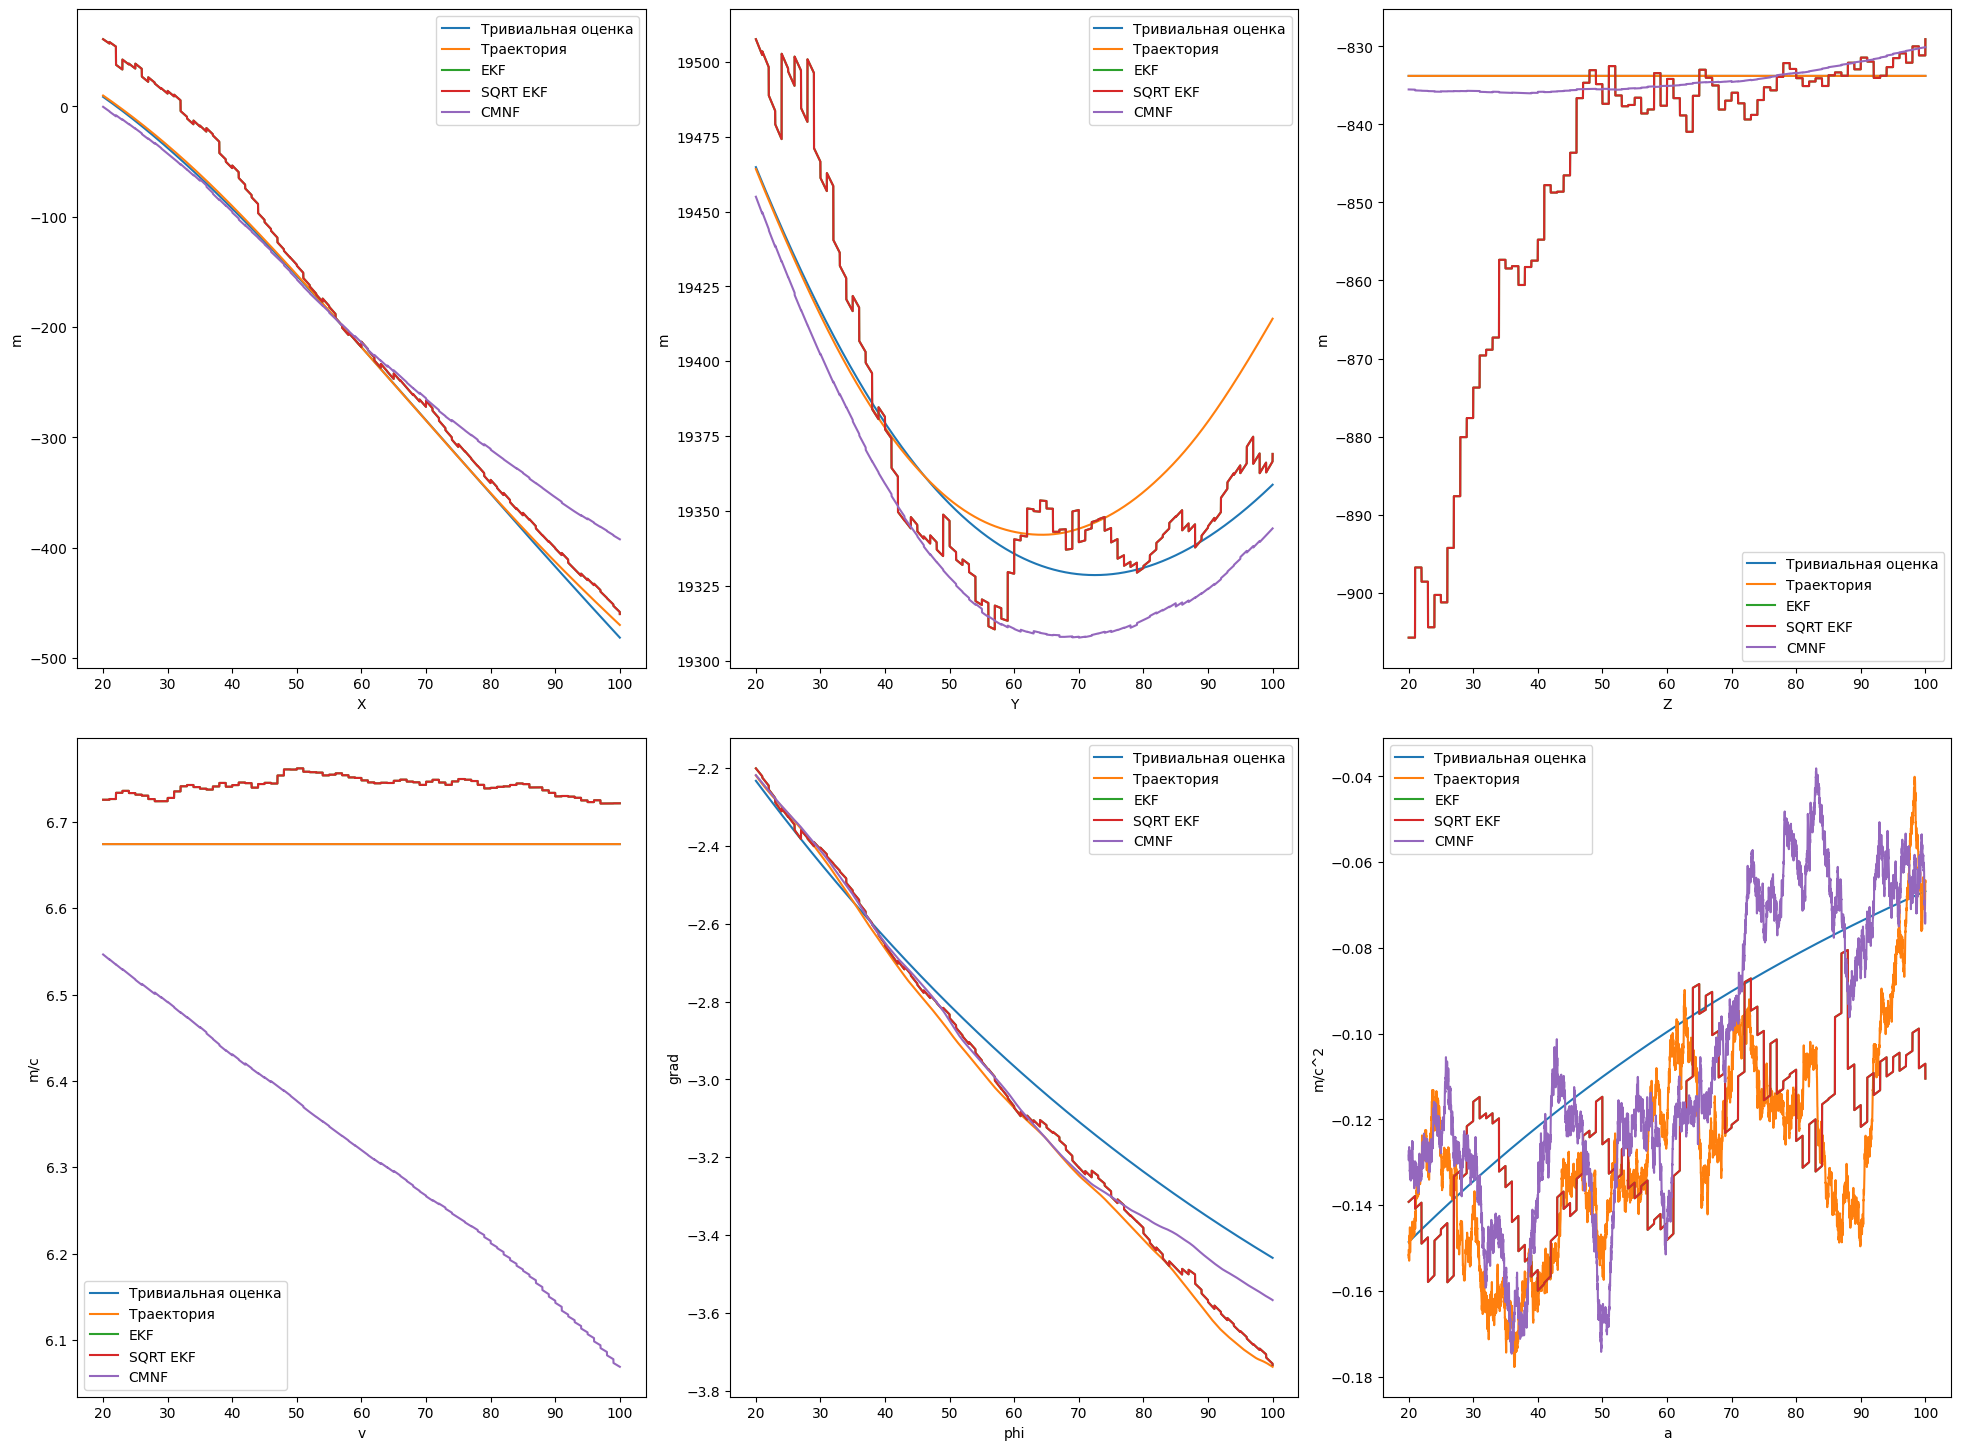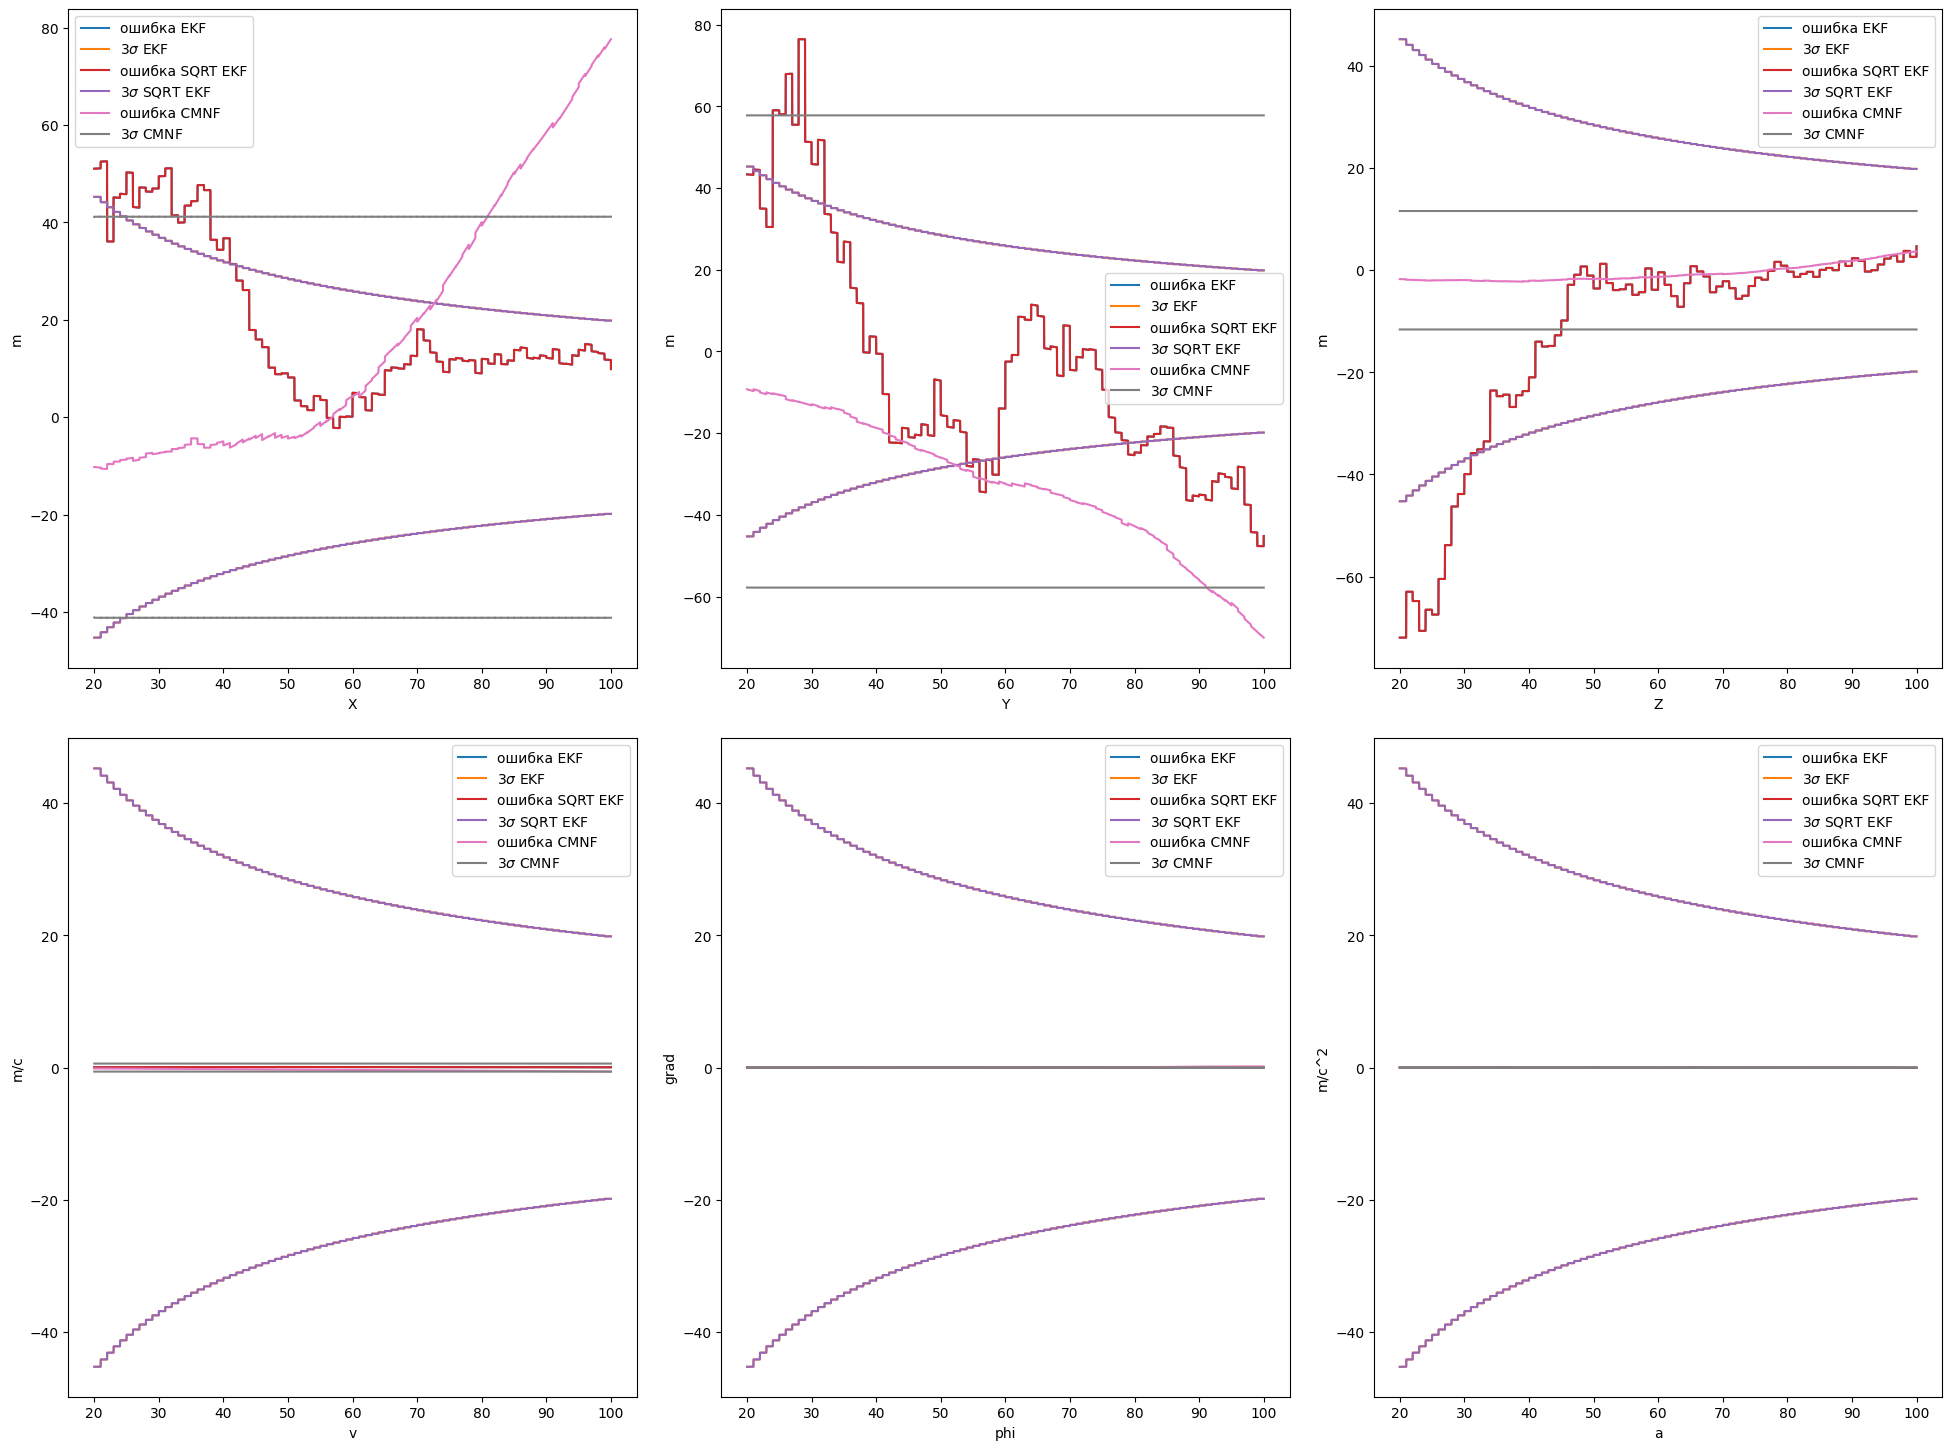)

## 2. Для одной траектории с 6 компонентами

2.1. Ошибка оценивания с помощью EKF

... Ошибка оценивания с помощью корневого варианта EKF

2.2. Ошибка оценивания с помощью CMNF

2.3. Оценка СКО, вычисленная с помощью EKF

... Оценка СКО, вычисленная с помощью корневого варианта EKF

2.4. Оценка СКО, вычисленная с помощью CMNF

2.5. Интервал «плюс/минус 3 сигма», вычисленный по оценке СКО EKF

... Интервал «плюс/минус 3 сигма», вычисленный по оценке СКО корневого варианта EKF

2.6. Интервал «плюс/минус 3 сигма», вычисленный по оценке СКО CMNF
f5cOAd+OvUNceap5J97VNJRoifDn2aV3PLcbzR54+3wiePxirWhP2/309g1cErpX5TgyzL+Dc5G5IsO92EoNeI0GtF+FXimwOICjP5l+NY/08S9Frbe0WvEeGjFZGQZuuwLIf5Z8efroJ/qjgFd9lgH6P3GtZ0GAQIyLHkAICjnzHZkIwtl7Yg2cA+RiKi8oZ9jJWjj1GQva0XphSlp6cjJCQEaWlpCA4O9nQ4ldIz657B/qv7Mb3bdPSt09fT4RARuZ3BYMCFCxdQt25d+Pr6ejocqkAKe23xGse9vPF8vrPjHayOWw2NoIFGyEtY2acmfLr503ip1UuF7ME7/OeXY1iy+yJeuachXuuVt0bgv8lZ6DZ9CwL0GvwzxXuuMVtN+ROp2WYseuZO1IkIgEWSYLbKsFhl6LUiGlUL5JSsHmJ/rb16b0O8eq9yPUp3+WTdKczZ4no6t7E9G+D13o1L7fhEZSUt24xnv9uHyzdzYJFsN8JYcm/8sEgSYmuF4sfn7iry+sz13/4DVsl1d9dHD9+Bwe1j3BW+Wwz5Zjd2nkvGzCdaYUCrmo7y/x2+gld+OoxO9SOw9LnSnf7ZG69xyjOeT886kXwCj695HJH+kdj02CZPh0NEVCrYz0ilwV19jF49ApoqHh+NDwBg/YX1uJB2IW/dFgjQaXToW6cvagTW8GSIRERERF6ndWRrrI5bDatshVW2Kup/P/97hUhASy7W9rRfU5bHO28tVgmrD11BcpYJWlGw/WhE6DSCY6rt2hEBqFMlwMORUn7211gh+S23OJGY7vjdVyfCYrUl5ey2nb3BBDRVCPviU7Av/qbL+r0XUpCQmoPocH+X2+Rnn7b6m6faIdhXC6NFgskiwWSV4KfToEvDKm6J251udT8R7zciKh57H2O6MR1zj8wFYLsmFCBAEARUD6iOB+o9wJv5iIiISgkT0FSu2Ndt2XhxIzZe3KioP37jOD7r/llZh0VERETk1QY2HIju0d1htBodZbIs41zaOYzaOAqpxlSsj18PIC9ZKwgCovyjcEfVOzwSc0m4mqbU1bSm5cHfZ29gwoqjhW7joxXLKBoqKnsCurQnFLOP4JzxWEs80raW45h/nriKF74/UD5f1EQlYL+xoklUED4b1ApajQBN7k059838G1kmq9PNF7dif2u0jglFlUCf0gjZ7fJubHF+no6/bVwFmqhYgvW2PkaD1YA5h9XX764VVAutI1uXZVhERESVBhPQVK682PJFhPuGw2Q1Achbt+VK5hXsTtyNGzk3PBwhERERkXcK8w1TlEmwrSucbkrH+K3jVdste2AZmkY0LdXY3MfWS++qi14uh2OgU3NMjt8HtKoBi1WG2SrBItn+bVEzBDVCi7fmE5Wd0s7/2veff9phQbAl5YDyOaqfqCTsN3ME+WrRrIbzVH56rWhLQFulYu0LcP33oDyyj8KUCjxNe0KagzSJiqeqf1W82/FdnEw+aetfzO1jBOBYGzo5h+tDExERlRYmoKlcqRdSD2+2f1NRvu3yNuxO3A2DxeCBqIiIiIgqphoBNTC82XD8k/wPAOcE7ZmUM8gwZ+BixkWvSUC7GgFdntljvrthFcx8giNwvIWrkYruZh8BLRZY97Y8j+onKglr7ou54BIKAKDV2GaBMFuL9oLP/77wpql17ZEmZxmRmJYDvUaETivCnJt496bnQlRePNroUdXyZ/98FsmJyTBY2c9IRERUWpiAJq/gq7EtdH4x4yJe+esVALYvX/Z1W+qG1MWYVmP4hYyIiIioGARBwPg71Uc+j940Gtsub8NHez7Cfw/9N68NBGgEDZ6PfR731buvrEItkrxRYkzWUemy54PdtQb0PwlpuHAjC7rc9b91GhFaUURajhkAoHG5rjlf1FQx2N9LaglovSMBXcQR0Pl+96YeAvvnyod/nMKHf5xS1HvTcyEq7+z9jN/98x02xG9wXDsKEKAVtRjSdAin5iYiIrpNTECTV6gWUA0AkGXOwl+X/lLdpk+dPmgU1qgswyIiIiKqsBqGNsS2y9ts0xMalNMT/nT6p3KXgHa9BnT5na6YSXHvZB+R7I41oJMzjRgwa0eh69tqCiwDzpsqqKKRcl//GlGZZtVpbGVPfbsXOo0IQchLxgb6aPHhw3fgrnoRju2dpuD2oqztg61q4HhCOrKNFpiskmLE9511lEtpEFHJRAVEAQBOppzEyZSTivpUYyq+6f1NWYdFRERUoTABTV6hdnBtzO89HxczLio6eWYfno0UQwoyTZkeio6IiIio4nm5zcvoVbsXTJJtjWL7NdiJ5BP4eN/H+Df9X8fIaPtoTEEQUDu4Nh6o94BHYrZfJQquxomV42QdZ/LxLoJjBLTyRbXrXDKOXUmFVrSNZtZqRGhF26jmyCAf3FUvwmlK7RuZJkfyuU1MKCySDJNFcqwFXiXQB+3rRjgdw7FWbDl+TRMVR2HrHDetHoz45GzHjAD5Xcsw4o9jic4J6Hz1Lv8elEMDW9fCwNa1HI8lSYbJKsFklSDLQIifzoPREVUsY1uPxR1V7oBJMjn1M565eQY/n/6ZfYxERERuwAQ0eY0O1TugQ/UOivKfTv+EFEMK0oxpyDZnO8oFwTY9pF6jL8swiYiIiCoEURDRvEpzRXmQPggAkGJIwddHv1Zt2ySsCRqENSjV+NRIjjVEncvLc/qB+UPvJLpIAGebLBi+cC9MFtdTBc9/qh3ubVbN8dj+uq0S6INVL3Uu0vHtr2l3jMAmKg+shYyAnjWkDc5dz3RsY3/Z/7j3Ir7f/a9i9gDZW+fgLkAUBfiKGvjqNJ4OhajCCfEJwYAGAxTluxN34+fTPyPHkuPUxwjY+hl9ND4QBVHRjoiIiJSYgCavZ1+35eXNLyvqNIIGk+6ahMcaPVbWYRERERFVSA1CG+DtDm8jPi3esf6sPQm2Pn49bhpvYuPFjbiUcQlA3khNvahH26i28NH4lF5wLqfgtleX32SdF+dIKqW8BLBzeZbR6kg+929ZA5bcaXQtkoTjV9JxI9OIK6k5Tm3yEm/FOD5fMFTB2N9LamtAa0QBjaoFKcqjQmx9AdYCU1Xnn5lAJZ9NROSS/Tr1XNo5dFiqHARTPaA6Vj640nFDJhEREbnGBDR5vbtr3Y3jN46rdihaZSt2JexiApqIiIjITQRBwOAmg1XrzqaexYGrBzD78GzV+iebPomJ7SfedgyfbziDP44lKsqT0gy2GAukc+2Py+NgUY5g9U55I6ALjrzMG4X/38GtnerGLTuMVQevwGC2FmjjvM+iKM+vaaKSsDreO0V/H2hzs8uFrZ/O5Q2IqDgahjZEjYAaSMhKUK1PzErEudRzaBXZqmwDIyIi8kKcM4S83qiWo7D/yf3YN3Qf9g7di71D92LPkD2YfNdkAIDBYvBwhEREFUdSUhLGjh2LevXqwcfHB9HR0ejfvz82bdrk2KZOnTr44osvnNrt3r0bwcHBePHFF52SLYsXL8add94Jf39/BAUFoVu3blizZk2RYjl06BAee+wxVKtWDb6+vmjYsCGee+45nDlzBgAQHx9vW45Bo8GVK1ec2iYmJkKr1UIQBMTHxzttHxkZiYyMDKftW7Vqhffee8/xuHv37hAEQfFjsViKFDtRRfVM82fQJrINYqvGIrZK3k90UDQA4OiNozh87TAOXzuMI9eP4Mj1Izh6/ShuGm4W6zjztp7D2WuZip8Mo+09GB3u77R93gjo8os5Eu9iH1VZ8AYCex5MbRphH63t63dimgHxN7JwKSUbSWkGpGSbcvdZ9BeB6AWj+r3N7vPJ+PVIAracvoYD/95E3LUMXE03IMdk5Y0iZcDVEgqFsb/PrJLzlPf5/3fxo5WIiiNQH4i1j6x16mfcM2QP9gzZg/oh9QEAOZacW+yFiIiKgn2MNhW5j5EjoKlCUFvnOVgfDAA4c/MMpu2dBsB5NEyLKi1wf737yyZAIqIKID4+Hp07d0ZoaCimT5+OO+64A2azGevXr8fo0aNx6tQp1XZ79uxBnz598MQTT2Du3LmOkSjjx4/HrFmz8MEHH+Chhx6C2WzGkiVLMGDAAMycORNjxoxxGcuaNWvwyCOPoE+fPvjhhx9Qv359XLt2DcuXL8fkyZPx888/O7atWbMmvvvuO7z11luOssWLF6NmzZq4ePGiYt8ZGRn49NNP8f777xd6Pp577jlMmTLFqUyr5aUVVW7doruhW3Q3Rfnmi5vx8uaXcfT6UQxbO0xRH6gLxMbHNiJAF1Ck49gTFbOGtEZEgPOU3qH+OjSJ8p5pEe1fl5kk8S6CYwS0c7n9tak26tJHa1vHddHOeCzaGa+oV0tauw7A9g/zou5xOikDT3y922V9nQh/rHn5bgT68O98aZEKWQPaFVcjoPPfmMGbe4iouERBVF0yxl9nu8Fx6cml2Hp5K4C8fka9Ro9HGz3quOmSiIgKxz5GZxW1j9H7nwGRC+G+4QCAq9lX8cPJHxT1AgTcVf0uRPhFlHVoRERe6aWXXoIgCNi7dy8CAvKSRM2bN8eIESNU2+zbtw99+vTBoEGD8NVXXzkuDHfv3o0ZM2bgyy+/xNixYx3bT506FQaDAePGjcOAAQMQHa38Ap+dnY1nnnkG9913H1avXu0or1u3Ljp06IDU1FSn7YcPH46FCxc6XRwuXLgQw4cPx//93/8p9j927Fh89tlnGD16NCIjI12eD39/f0RFRbmsJ6I8d0bdiTuj7kRSVpLjDmV7giAxKxGZ5kxs+HcDagbWBJDXmeen9UPTiKYQBeeJm+xJt7a1w1A9xO+Wx89br5fZOnIPV1NwFzaKs1+LKGw6dRUZBgssuetC2/61tenZxPXfnILs75GCx6eSuZ5hdPzerHow0g1mZBgsyDCYIclAfHI2zlzNQJuYMA9GWXEkpRlgMFthkSSYLDLMVgn/JmcDKN5MAJrchdOtBRPQTiOgmYEmIvew9zNuubxFtf5Gzg1M7TK1DCMiIvJe7GN0VlH7GJmApgqrbbW2mHzXZFzNvqro6Pz+xPcwWo1IN6UzAU1EHifLMixG4603LAVaH58irY2XkpKCdevWYerUqU4XhnahoaGKsv3796N37954+OGH8fXXXzsd58cff0RgYCBeeOEFRbvXX38dn332GVauXIlXX31VUb9+/XrcuHEDb7zxhmqsBWN58MEHMW/ePGzfvh1dunTB9u3bcfPmTfTv31/14nDw4MHYsGEDpkyZglmzZqkeg4iKJ1AfiG/7fKta1391f8Snx2Pyjsmq9a+2eRUj7xipWlfkxEJ5noI7NyiuU+pd7P+7Co6ALmw95w71IvD3Gz0V5bIsQ5KLN/LTG6aV9yb274lNooLwxyt355XLMrpN34KLKdkcbe4mH6w5gfnbL7isL8kI6M2nr6HrJ5uh1QjQa0Sn9x8/WonIXSbcOQHNI5rDLJkdZTJknLl5Btsubyv2kjJERKWBfYzO2MfoWUxAU4WlETUY1HiQat2vcb/iWs41HLl+BKnGVKfOS3+dPxqGNmQnIBGVGYvRiC+HP+qRY7+8eAV0vr633C4uLg6yLKNJkyZF2u+hQ4cwZcoUZGVlISIiQvGZeubMGdSvXx96vXIJhRo1aiA4ONixzkpBZ8+eBYAix6LT6fDkk0/i22+/RZcuXfDtt9/iySefhE6nU91eEARMmzYN/fv3x2uvvYb69eurbjdnzhzMnz/f8fiFF17AjBkzihQTEeUZ3nw4fjj5AyRZcpo2Nc2YhhRDCrZc2oIqflUc5YIgQAw+AjG7ZpETC/ZrvfKYQOIavt7JniNbdfAyNp68Cq0oQKsRYF+KtjijOAVBgKaYXz0cm/Pl4xayixtBBEFwJEQ5g4J7HLxoS9D46kT46TTQacTcHwH+ei0ea1eryPtqGBkIQQAMZgkXU7IV9REBeug0okpLIqLiqx1cG6NajVKUr7uwDtsub8ONnBs4dO0QgLxrT0EQEBMUgzBfzqBBRGWDfYzO2MfoWUxAU6Xkp/MDcuBypM2b7d/E0KZDyzgqIqLyq7idrt999x2GDRuGJ598Evfddx8GDBiALl263NY+b6fdiBEj0KlTJ3z44YdYvnw5du3aBYvF4nL7Pn36oEuXLpg8eTKWLl2qus3QoUMxadIkx2O1OzSJ6NYebfQoHm2k/IL867lfMWn7JBy+fhiHrx92qvOpDuitPjBZHwVw6y+43nBfoReESPk0rR4MQQCMFslp+ma76HD/Uj2+aE+KlupRKo/C1mIXCmxDt8eaeyJnDW6De5tVu619tasTjh0Te+JGphFmqwSzVYbFKsMsSTBbJDSvGVK8tdWJiErAT2tbDuZkykk8tfYpRX2gLhCbHtvkWEOaiKiyYx+jUkXtY2QCmiqloU2HYunJpZBk2xAF+8iTNGMa0k3piEuN82R4RFTJaH188PLiFR47dlE0bGibGeLUqVNF2n7gwIFYtGgRRFHECy+8gKeffhpHjhxxTK3TqFEjbN++HSaTSXGHYkJCAtLT09GoUSPVfdvLT506hY4dOxYpnjvuuANNmjTB4MGD0bRpU7Ro0QKHDx8utM20adPQsWNHTJgwQbU+JCQEDRo0KNLxiaj4ekT3wID6A5BsSAbgPFJ4++WdEDRGfH7oQ4T52T5X7HdBB+gCMLz5cMc6feUdB1V6p3uaVsOet+5Bao4ZFqsMq5S7prNkS4A1rxlcqsfnuualQ+1mFcd06wXnW6cSseZOE6Ap7rB/F2qE+qFGqJ9b9kVEVBJtq7VFh6gOSMpOUiwBeCXzCjLNmbiafRV1Q+p6MkwiqiTYx8g+xvKECWiqlAY3GYzBTQYryhf/sxif7v8UmaZM5FhynKbMESBAJ+o4NTcRuZ0gCEWaosaTwsPD0adPH8yePRsvv/yyYo2W1NRUp7vzunbtClG0TXn4ySefYP369Rg/fjzmzp0LAHjiiSfw5Zdf4quvvsLYsWOd9vXpp59Cp9PhkUceUY2ld+/eqFKlCj755BOsXr1aUV8wFrsRI0bgpZdecsRwK+3bt8fDDz+MN998s0jbE5F7BemD8EGXD1Trmn/THYI+GRsu/a5a76f1w4stX3Q8zn/1Jsuy0/XcueuZmPVXHHJMVtu2uVWCYPt8fuLOaNzdsOrtPZki4CWm94kM9kVksGf+fnMNaPcqLJFv/7zguXYPa+409VqOTCaiCiJQH4j5fear1t2z/B5cy76GNGOao5/R/ndFI2igFdk1T0TuxT5G9jGWJ/wrR5SPfdqcdfHrsC5+naK+fVR7zO89n0loIqqUZs+ejc6dO6N9+/aYMmUKYmNjYbFYsGHDBsydOxcnT55UbRcQEIDFixejW7duGDhwIHr37o2OHTvilVdewYQJE2AymfDQQw/BbDZjyZIlmDlzJr744gtER0e73N/8+fPx2GOP4cEHH8TLL7+MBg0a4MaNG1i2bBkuXryIn376SdHuueeew2OPPVasaWymTp2K5s2bQ6vlJRNReZJzZTC0gafwQtf68NdrHOUHrh7AnqQ9+Pb4t1h+ZrmjXJaBgAYGWNLvgCzf55Ts/X7Xv1h96IrLY/2bnFWqCWgmtahkbC9iiSOg3cIxBbfK1zx7npTn2j0cI6D5nZqIKgF7P+OwtcMUdTpRhw/v/hB96/Qt67CIiDyOfYyVQ+V5pkRF0CqyFYJ0QcgwZ6jW703aiyxzFgL1gWUcGRGR59WrVw8HDx7E1KlT8frrryMxMRFVq1ZF27Ztb3nHX+fOnfHaa69h5MiROHbsGEJDQ/HFF18gNjYWc+bMwX/+8x9oNBq0adMGv/zyC/r371/o/gYMGICdO3fio48+wpAhQ5Ceno7o6Gj07NkTH3ygPmJSq9WiSpUqxXrOjRo1wogRI/D1118Xqx0RlS7JUAsmQy081fReVA3Km+Zr2+Vt2JO0BzmWHORYcpzaiDpAF74TOxJ2QCPY7p6GAFzMuQDRNws96rZG98aRjjmx/03OxvztF5BttJbRs2IyhorOnhRlTtRNcs+joPI+tJfxXLuHNXcqc67NTESVwd0178a/6f+q1pklM3Yl7GICmogqJfYxVg6CzEWjHNLT0xESEoK0tDQEB5fuml1UflkkC0xWEwDbmi2yLEOGjC4/dYEkS9g8aDOq+BXvw4WIyM5gMODChQuoW7cufMv5lDjkXQp7bfEax714Pj1LlmXUfesPAMD+/9yLKoHO60xdybyCdGO6U1lqthHPbXoKguD6q0/fqm9i+n1DHY8PXbyJgXN2olaYH7ZP7OnGZ+Bs6Z6LeHv1MdzbtBrmD29XasehiuXwpVQ8NHsHaob6Ycebpff6rCw2n7qGZxbtwx01Q/Db2C5OdX2/2IZTSRlYMrIDujTk98Db1X36ZsQnZ2PFix3Rrk64p8OhAniN4148nwQABosBkmyb/cHez/jT6Z8w8+BM9KvbD590/cTDERKRN2M/I5UGd/UxcgQ0UQFaUau6BouvxhfZlmzcs/we25otEBwDVYL1wZjZYyZaRbYq22CJiIiIKpn8t8+qjZ+rGVgTNQNrOpWl+plgutET2qATaFbd+QvS+ZtXYEYmdt/8Di9s2OYozzRa4BedCoOpPYDST/BxNloqDr5c3EvOHQKt9j60L7/EKbjdwypzBDQRVS6+WmVCKNQnFACw9sJa/Bn/JwA4+hkFCOhYoyNm9ZzFJQCJiMirMQFNVETtotph2+VtjrsWATimaksxpODvK38zAU1ERERUhoraKSdAgOlGL5hu9MKPz/aDTiM66gYu+Qhx1qVItSRgZ0KCUzttIGC0JuDg1V6KY0b4RiAmOOa2n4PMVaCpBATHFNze9fr5dP1p/H32Ony0GvjoRPhoRcfvVYN8MKpbfYT668s8LtkxBbeSY7rzMovG+0mSjBkbTiPuWiZMFgkmq2T71yIhKc0AANCK4i32QkRUcd1R5Q74aHxgtBphlfMt95L7x2bb5W1IN6UjxCfEMwESERG5ARPQREU0q+cs3Mi54ZguB7B1GM4/Nh8/n/4ZGaYMZJuzHdsLgm2UtNqdjkRERERUMvmTQEUeE1LIhlHoiWOXNHi4XRXc3bCqozz+Zgq+/udTQJOJ4euGq7Zd3Pd7tKnWqqhRlDREIgX7usSSF2VFTRYJszbHFbpNzVA/PNWxTtkElE9heXx7sp8joIvu6JU0zN58zmW9VhQQFcLvyURUeTUOb4xtj29DljnLafk/AOi3qh8skgXJhmToRB2AvBsgtaLWUUZERFTeMQFNVESCIKCqf1VFuX096B9P/YgfT/2oqO9Vuxc+6/5ZqcdHREREVBmUZMRn/oHSBZvLshaWzOa4I7QF+tev7Si/mp6DWdu3Qet/Xrk/bToEjQmv/jUOkQF5a5gKggBREDG06VA8WP/BIsXmGHnJDDQVg2MEtBeNy7Xmy5Z/+lhLaETAaJZgtEhYefAyjl5OQ7bJWsgeyoDKG1HMLfO20eZl5XqGETkmKyySBKskwyLJOHo5FYDthoJX7mkIvVa0/Whs/9arGoCqQT6eDZyIyMP8df7w1/kryv20fsgwZWDALwMUdb4aX8zsMROdanYqixCJiIhuCxPQRLepfVR7fKv9FjmWHNX6LZe2lGk8RERERBWZ0wjoEiRtCybsHOuRFthZtWA/TOv2Pk4kpEMUBIiiAFGwbbfk9HyYg9fhpuk6bpquK44xafskpOSk5IvTtu/qAdXRq3YvrudHty1vCm7PxlEc1nzBPhBbHb46jePx8StpOHo5zWOjjO1HVXtn2su86VyXlTlb4vDJutMu62uF+WHQndFlGBERkffrEd0Dv577VbXOYDVgb9JeJqCJiMgrMAFNdJvaVGuDnYN3wiJZAMAxdU66KR29VvSCWTLjwNUD0Agax7TcABDmG4boIH4ZJyIiIiopoYgTV+ff6kD8Tei0oiOZlJxpBGCbEragga1rYWBr5f62nu2P4/F1MK53XbSuHerIXl3MuIipe6YCAGYcmKEay4ddPkRs1VhH/CmmBAjam4BcrUjPhQjIe+2nG8x453/H4afTwFengb9eAz+9Bg0iA9GpfhUPR+ks/whoscBNGJ5OqNtHN6vdG2K/YcSbpjsvK4cupgIA9BoRPjoRWlGAVmP710crYkiHGM8GSETkhaZ2mYp3Or7jNC23LMuYd3QeFh5fiIsZF3H42mHH3ych97/6ofVVR1QTERF5ChPQRG6gFbXQis5vJ50mb02Wp9c9rdruq15foVMN3rVIREREVFRyCRaB1uRLLg+Zv0d1G62m6KOSNYIG1pw6aBjcBp1qRDnKO6ETjFYjztw8kxtrbqchZKw5vwYA8Pb2txX7C2wIxMt9AbQrcgxUuYX6275rGMwSvtv1r+o2m17vhvpVA8syLIdLKdnINFqgEQVoRAFaUUCWMW96bU2BGz48Pc11YUcVHcnxip2BjruWidmb45CjMg26KAJP3BmDro2cl6Syn5L3BzTH4PZMNhMRuYuPRrlMQahPKABgw78bsOHfDYr6hmENserBVaUdGhERUZExAU1USnSiDk82fRJbL291umsRAFIMKcix5CDuZhwT0ERERETFUJI1b/31Wjx5Vwx2xCUDyJe3Fmy/Vw3yQZeGRR8tKjpGRCpjGd58uGqbjjU6Ysb+GTBbzXmjWSAjy5wFAEjAOvRacTg3rLzkXL2Qevhvz/863dxIVCPUD4ueuRMnEzOQY7Yix2RBjtmKbJMVf/5zFZlGC25kGD2SgF53PBEvLjlY6DYFJxwobAT0/L/P48jlNAToNfDXa+Gv18DfRwN/nQY1w/zRs0mkIqFdUqpTcFeQEdBGixWZBguyTVbUDPWDWOCcfbcrHqsPXXHZ/kqqQZGAtqfuuagAEVHp6xHdAxviNyDVmAog75rYKluRlJWEuJtxkGQJoiB6MEoiIqI8TEATlaKJ7SdiYvuJivL3d72PFWdWYNvlbbZOx9xv7AIEaAQNukV3Q6OwRmUcLREREVH5lz9BVZyllD946A63xSC6SEgZLVY8u3g/zl+3JZUFIfcHAgQhCPWrfop5T7aFXpvXMThn237MOfcsBNHWeVhQYlYi+qzsg1aRrZzKfTQ+eLr502gc3thtz4u8S/fGkejeOFJR3uuzrTh7LdNjCdOzVzMdv4cH6GGxSpBkwCJJsEoyejWrplgH3VWSNyXLhA9+P1no8b59uh16Nrm9Keztnytq67Pn5Wm9JwN9Kikd/1l9HNcyjMg0WpBpsMBklRz1PRpXxcJn2ju1sY987tWsmlOi+dy1TCzaGQ+jWTkyOu+8lcKTICIiJ3VD6uLHB35UlOdYctD+h/aQIWPWoVnQibrcmyxzlwD0CcOABgPgq/Ut65CJiKiSYwKayAPCfMIAAHuS9mBPknIayLXxazltDhEREdEteCrnYU+2FBwBfSIhHX+fveGy3b/J2fgnIQ2tY8IcZYG6KsiKexNdmurwZr8mTjmu0ZtGI9mQjOs511WnWlxzfg1ebPmiLaZ8Z6NZRDN0j+5egmdGFYFjNLGHEqb2ow5uH4OPHi7ajR/2V2/BmI2WvKTn670aIdtsRbbRNop329nruJpuxI0MkxujVovN+0ZArzmSiP3/3nRZ/09CuqLMmvt51rZ2GIbdVdtRvv3sDSzaGa+6H/spETgGmojIY3w1vvDT+iHHkoNvjn2juo2P1gcPNXiobAMjIqJKj3NyEHnA4CaD8UzzZ/B448cxqNEgDGo0CI81egx96vQBANzIdt1xSUTkSXPnzkVsbCyCg4MRHByMjh07Yu3atW7Zd1JSEsaOHYt69erBx8cH0dHR6N+/PzZt2gQAePrppyEIAl588UVF29GjR0MQBDz99NOOMvv206ZNc9r2l19+UYxwsm9b8CcuLs4tz42ISofaaMWyYJ/ut2BCyppbUD3EF6tf6oTVL3XCqpc6YeWoTogJ9wcA1fVVZWsQgoQ6aB7RHM2r5P0s678Mk++ajEkdJmFSh0l4u8PbeLvD2+hcs7Oj7bwj8zDvyDzMPTLX8TP2r7GYf2w+Vp9d7fSzLn4dciw5pXRWqLzIW0/Zs3EU5+3palYB+3PQa0SMvachJvZtgvcHtMD0x1rijpohuW1u/4k6RvKq1Lm64aQ8s+SeyAdb1sCfr3XFzjd74uh7vbFmbBcA6ul2KbeNRjE63fVx5MJOHBERlQlBEDDt7mmKPsbHGj2GuiF1AQA3ctjPSETlD/sYKz6OgCbygKr+VTGu3ThFeUJmAtbHr8dN4030XtEbQN7d5IIgoKpfVczsORPhvuFlGi8RkV2tWrUwbdo0NGzYELIsY/HixRgwYAAOHTqE5s2bl3i/8fHx6Ny5M0JDQzF9+nTccccdMJvNWL9+PUaPHo1Tp04BAKKjo/HTTz/h888/h5+fHwDAYDBg6dKliImJUezX19cXH3/8MV544QWEhYUp6vPr27cvFi5c6FRWtWrBtQ6JyNPKQw4oL8HnHIw96eOv1ziNcgaAsAA9LqZkY/L/jiPIVwdZliHJwI1MIwD1EYSR/pEY1HiQovyxRo9h4fGFuJZ9zRZHvnTSz6d/BgDMPDhTNfYWES0wqtUoRXmjsEaICohSf8LkVfKms/bQCOgSHNbRZ1OgseORSoKzpGszp2Wb4afXOE2Fr4hDpezD309i/t8XEOhjW4c60EeLEH8dht1VG/U8sNZ2YeyfCdWCfdCoWpCjXKtR/+wCAGtuUcG1oR37VDnP9nMveuhmICIisukZ0xM9Y3oqyqftnYYLaRew4NgCLDu9DIBzP+OjjR7Fs3c8W6axEhHZsY+x4mMCmqgcqeJXBeG+4UgxpCAxK1FRfyXzCvYk7kG/uv08EB0REdC/f3+nx1OnTsXcuXOxe/dux8Xh7t27MWnSJBw+fBgpKSlO26elpSE4OFix35deegmCIGDv3r0ICAhwlDdv3hwjRoxwPG7Tpg3OnTuHVatWYejQoQCAVatWISYmBnXr1lXs995770VcXBw++ugjfPLJJ4U+Nx8fH0RFMflCVN7lT7Z6egpua4HMl2MEoUoCp3a4P45cSsW53PWhC6oZ5lfk42tFLZ6LfU61rmP1jlgdt9pxnuyJpr+v/A0AOJ58HKM3jVZt+3Wvr6EVnb8iBumD0DisscdGm1Px2f9PeWrKaPtrrzivGNcjoF3vSyzByOTPN5zBzE1nAdhuFAnz1yPUXwdz7vrIajeCNIgMxO7zKUhIMyAhzaCov5llwhdPtC5yDGXB1ZrWrs4zkH8EtHN5Yf8f5SJsQ0REntM4rDEAINOciUxzpqL+h5M/MAFNRB7DPsaKjwloonJEr9Hjt4G/4VL6JUWn4WcHPsP+q/uxO3E3rLJt6kYh9z9RFHFX1F0I9Q31VOhEdBtkWYZsljxybEEnljipYLVasXz5cmRlZaFjx44AgCNHjqB79+4YM2YM/vvf/+LSpUsYMmQIWrdujeeff171wjAlJQXr1q3D1KlTnS4M7UJDQ50ejxgxAgsXLnRcHH777bd45plnsGXLFkVbjUaDDz/8EEOGDMHLL7+MWrVqlei5ElH55KmcqKskjsWRgFaOrPzw4TvwYMsakGQZoiBAFHOv5QTAV6dB29qF30FdVPfUvgf31L5HUX4j5wbe2fEObhps68LarzUlWcLJlJMAgOc3PK+6z0caPoIH6z+oKG8c3hgBOuXnNnmW/eWnNsq1LJXk/VlwDei8RKpyW1czERRm/795nVbZJiuyTTm4kpo3LX1YgE7RZsqDLfDEnTFIzzEjy2RFltGCTKMFu84n4/ejicgwWIp8/LJiTyYXPG95A81VRkAXcgMNoL6muOMGAWagiYjKpYENB6JVZCtkm7Od+hmv5VzDq5tfRboxHWvOrwGQb2Q0BFT1r4p21drxBkQiL8Q+RvYxlidMQBOVM8H6YDSvopxiomZgTey/uh+rzq7CqrOrFPXdanXDrHtmlUWIRORmsllCwjs7PXLsGlM6QdBritXm2LFj6NixIwwGAwIDA7F69Wo0a9YMAPDyyy/j4YcfxqeffgoAaNasGQYPHowDBw5g0CDlNLIAEBcXB1mW0aRJkyId/8knn8Rbb72Ff//9FwCwY8cO/PTTT6oXhwAwcOBAtGrVCu+++y4WLFjgcr9r1qxBYGDeFJr9+vXD8uXLixQTEZWd/HkTtdGKZSFvDWjnhIxVtidwlG0CfbS4t1m1Uo/NlSp+VTDn3jmqdV8f/Rq/n//d8djeQXkh7QIAYOXZlVh5dqVq2wW9lZ+rob6haBjakJ2WHmJ/X3gq/1yS4xY2MhdQf6/fqo0aS+480x8OvAOd6kcgNceMm9kmpGabkGW04p6mkcrjiAJa5K43nZ+fToPfjybC7Kmh5oWwR1RwauzCpi23f34ppuAuwtuYb3UiovLLvg50fmnGNACASTLhrb/fUm23oPcCtK/evlRjIyL3Yx8j+xjLEyagibzEkKZDkGZKg9FihJz7HwCkG9NxMuUkLmVc8nCERFRZNG7cGIcPH0ZaWhpWrFiB4cOHY+vWrYiIiMD27duxdetWp+0DAgIKTUIUd4RW1apVcf/992PRokWQZRn3338/qlSpUmibjz/+GD179sT48eNdbtOjRw/MnTvXKW4iKn/KQ6rHnp8p+PlltboeAV2ePR/7PJ6PVY5+Ppd6Dv/Z/h9kmDOcyjNNmUg2JAMARv45UnWfjzV6DF1rdXUqEyCgZdWWnLWnlJVkamp3ypuWuehZScHxniqwr0JGQAsunqfJIuGpb/fgUkoOwgJ0CPPXI8xfj/DcddgBIDxAjzpVbu/vvH09ZbPFMyNMCiO5mLq8sNeG/fNMUzBpXcgNDY7/P5yEm4jIq4T4hGBMqzE4cPVA3sjo3H/PpJzBTeNNXMq4xAQ0EZU69jFWbExAE3mJZhHN8N+e/1WU/3PjHzzx+xO4kHYBd/90N4B80+YIAmoG1sQ3vb/h9IhE5ZigE1FjSiePHbu49Ho9GjRoAABo27Yt9u3bh5kzZ2LAgAGQJAktW7Z02v7AgQNo166dy/01bGgbJXfq1KkixzBixAiMGTMGADB79uxbbt+1a1f06dMHb731Fp5++mnVbQICAhzPi4jKr/xfKD016s7+hddaIO/kGAFdQXIx9UPr48cHflStm7F/Bv6+/Lei/FzaOQDA8jPLsfyM+h3eUzpNUZRV8auCLjW7cNS0GwiC64RheeXqpo7C1pN2NQL67LUM7D5vm2o7//Ta+QX4FG9khhp97lQHFqn8JaDtp9HVCGi114Z9Cu6CbRz7VC3jFNxERN7qhZYvqJZP3DYRf1z4Ax/v+xhfHPwCgH3ZGAGiIOKZ5s/gqeZPlWGkRFQc7GNkH2N5wgQ0kZeLDo5GkD4IGaYMpBpTFfUphhQcuXYEnWp65g8PEd2aIAjFnqKmPJEkCUajEVJuB2xWVhaCgoIAAEePHsW2bdvwwQcfuGwfHh6OPn36YPbs2Xj55ZcVdwWmpqYq1mjp27cvTCYTBEFAnz59ihTntGnT0KpVKzRu3LgYz46IypvykFOzJ8t+O5KAs9cyHDf//ZucBQDQetkI6JJ4vd3reL3d64ry0ymnMX3fdORYnBN/SVlJuJZzDQDwzs53VPfZrlo7dKjewalMI2hwb+17VaePJHWuRgaXmRKsC+xIjKrvSvXGBJdJ63wPFz59J1KyTLiZbcr914xgPy3uqhdR9OBc0OYmoK/czMFXW88p6ptWD0bXRlVv+zglYT8nBWfTtj/ONFpwKikdFqsMSZZhkWTczDbbthELJq1dH8eee+eNI0REFUeLKi3wx4U/kGPJUVzPAcDquNVMQBOVY+xjZB9jecIENJGXC9YH489H/sS17Gt50+bkdji8vf1tnEw5iSUnl2DrZdt0FYIgQIAAnajDwIYD2ZlHRMXy1ltvoV+/foiJiUFGRgaWLl2KLVu2YP369WjVqhX8/PwwYcIETJo0CefOncPo0aMxevRo3HXXXYXud/bs2ejcuTPat2+PKVOmIDY2FhaLBRs2bMDcuXNx8uRJp+01Go2jTKMp2oX1HXfcgaFDh+LLL78s2ZMnonLHUzmPYF8dAGDX+WTsOp+srPervF+zGoc3xvw+81Xrvj76NY5cP6Io33Z5GwBg/9X92H91v6L+y0Nf4sH6DyrKawbWxIstX4QoVPyEf3GUZG3k0lCct6cjaS4VHAHtel95z9O5jf1x9RBf9GiiXNPZXQJ9bO/zhDQDPlqrHGEhCsC+SfciItCn1GJwxXEaC3xI5h/d3PcL5QwGAKArMIWD/ZHadIaFjVAnIiLvNKzZMPSM6Zm3BGDu539cahwmbJuAxKxEfLTnIwB5NyAJEFAjsAaGNh3K6zIiKjL2MVZ8lbdnhKgCCdQHIlAfqCiPCY7ByZST+PuKeufCpYxL+LzH56UdHhFVINeuXcNTTz2FxMREhISEIDY2FuvXr0evXr0AAMuWLcPrr7+O2NhYxMTEYMyYMRg3btwt91uvXj0cPHgQU6dOxeuvv47ExERUrVoVbdu2dVozJb/g4OBixz9lyhT8/PPPxW5HROVH/hyIp9YdfbVXI9QK84fRYrXFlFsuy4BWFPBQ65oeiau8U1tnGgAupV/C0lNLYbQancszLmF34m4AwK/nflVtO/fIXMRWiXUq04paPHvHs7i71t1uiNr75A1g9ewa0MXhWGe44L7yFhlWtnGRaHc1/bS73VknDC/3bIArqQZF3a9HrsBslZFusHgoAa0+ArpGqB/ublgFx6+kQSMKth9BgEZj+7dasC861Vdf8051Cu5C1ugmIiLvVTNQeS1r73fMMmdh6amlqu2aRzRHm2ptSjU2Iqo42MdY8TEBTVSBvdrmVdQPrQ+LZHG6Yz0+PR4b/t2AC2kXsPXSVke5vROndnBt1A6uXebxElH5t2DBgkLrH3jgATzwwAMl2nf16tUxa9YszJo1S7V+0aJFhbb/5Zdfbrl9nTp1YDQaFeW32jcRlSPlYA7umqF+eOXehp4Oo8KIDo7GxPYTVeu2XtrqWFc6v88P5N1EefTGUUX9S5tegq/GV1EeqA/ErJ6z4KNxTgrqNXpEB0VXiKmE7clcT42ALmzabFfsidKCo5kLHwGt3kYqwRTgJaHViBjXW33KvQ0nkmC2Wjw2Dbr9qAWT8BpRwPcjOygbFKKw/495/3+8/31DRESFiwqIwqfdPsWZm2cUs2L8dv43JGUlYfuV7cgwZTjKBUGAVtCiTbU28NUqr8uIqHJjH2PFxwQ0UQVWK6gWRrUcpSjfm7gXG/7dgHNp5zDmrzGKeq2oxcZHNyLC7/bXRiMiIiJyJzlfBroC5ArpFrpFd0O36G6K8icaP4GD1w7CIlmcypOykjB1z1QAgMGqHJlqyDHgid+fUD1WTFAMnmnxjKK8SXgTtKjSoiThe4TH14AuAXvMBUMuLJntsk3uv6U9ArowmtzsuNq01WXBflx3nAHHaVQdAl1gGyIiqtD61OmDPnWU66OeuXkGSVlJ+ObYN6rtBjYYiCmdp5R2eEREVM4wAU1UCbWKbIW+dfriSuYVAM4dI2dunoFJMuGf5H/QNLypUzu9Ro8Qn5AyjZWIiIi8x7V0A3adT4ZWFKHVCNBpBMfvwb46NK8R7NYRpsx5VF7+On90qdlFte7B+g8i1ZiqKP/+xPf448IfivIUQwoA4GLGRby/633Vfd5d824E+zhPy+an9cNzdzyHGoE1ihl96XKVmC0rcgmmKbAni4uTsHXVRi6jEdCF8fQ63I5pyAvOwX07+1Qt4xrQREQEDGk6BBmmDJglM4C8v8XppnRczLiIMzfP4Hr2dUW7EJ8Q6DX6Mo2ViIjKDhPQRJWQXqPH9G7TVese+fURnLl5BqM3jVatn9RhEp5ooj5qhIiIiCq3F5YcwKGLqS7r3+jbGC91b3Bbx3BaA5rD7kiFv84f/jp/RfnE9hNVp/rONmdj+v7puJFzQ1G35dIWAMDfV/5WPdaKMysQ4aucNahWUC1M6jBJUR6oD0R0UPQtnsHtyUt+emr0re3f4rw97ZtmGCy4lmFAgF4LP50G9rSn2r5crQFtf+zJEdD22KweykC7cxrywnYhFTJCnYiIKo9ONTqhU41OivI9iXvw7J/P4p/kf9BzeU9FfYRvBH4b+BuC9EFlESYREZUxJqCJyEnfOn1xIe0CJFlyGr0gyRIAYF/SPiagiYiISNW1dNv6R746EU2rB8NilWG2SriRacSNTBPOX8+67WN4z6TC5C38df54t+O7qnXn085jx5UdilG2uxJ3YfuV7QCAZEOyol2yIRmD1gxS3WfDsIboFdNLUd65ZmfEVo0tbvgKeSODb3tXZcY+UnfVoStYdeiKo9xHKwIofA3oo5fT8L/DVxCg1yLAR4v4ZNvnjGdHQNv+9dRNAKWRhFcbnV4eRpsTEVH51SyiGeoE18GljEsAoOhnTDYk43zaebSs2tJTIRIRUSliApqInDwX+xyei31OUf7bud/w9va3seHfDWi3pJ2ivlVkK3zd62uIglgWYRJ5PU+tCUgVF19TVJ78/HxHtIwOdTye//d5fPD7SVis0m3vO/9rnTkPKm31QuqhXkg9RflTzZ9CUlYS0k3pirovDnyB0zdPK8qvZV8DAJy9eRZnb55V1M85MgcNwxpCKPDKFgUR49uNR1X/qk7lAgTEBMVAI2qcy3ObH7x4EzqNCFGwjVDViAL0WhEd6obDV+fcxp3s79CCz6Mw9zSphv8dTsD1DCOyTBZH8txosX1mNIgMVLTxy30OG09excaTVxX1nvx8yFsD2jPHd4xCd8O+HFO6qx3Hvo0bjkNERBVPkD4Ivw38TbXusd8ew6mUU3h63dPQCM7XJXqNHpPvmox+dfuVRZhEFQL7hMid3PV6YgKaiIqkeURz6EU9TJIJRqtRUb8ncQ+uZl1F9cDqHoiOyHvodDoAQHZ2Nvz8/DwcDVUk2dnZAPJeY0TliT53FKPZ6t4vxRx1R54UFRCFqIAoRfmce+eobn/TcBML/1mILJPzTABmyYzVcasBQDUxDQDP/vmsyzheiH3B6fE1TQJ0oRp8t0vCd7v+VWw/pEMMPhx4h8v9ecIdtUKweXx3ALbODoNZQpbJgmyjFdlmC+pWCVC0eapjHWQYLEjOMiHLaEG2yYJMowXZJityzFY81KpmGT+LPJ6fBl12iuP2uN6HzCm4iYiohNpEtsGplFOwSBZYYHGqM1qN+DP+TyagiYqA/YxUGkwmEwBAo7m9G5eZgCaiIqkXWg9bH9+KDFOGou7xNY/jpvEmnvj9CcVdi/46f0zpNAVtqrUpq1CJyjWNRoPQ0FBcu2YbBeXv789OO7otsiwjOzsb165dQ2ho6G1fHBK5Q8GPNa1oS0Cb3DEC2uk4/Pwk7xHmG4Zxbcep1r3c5mXV5POOKzuw6uwqxWs9/8jrr45+5dxIAHyrA77Vf4FWDne8aSRZhsUq489r9aH78yHFsWKjauOR2NbFe1IqSrIGdH6CIMBPr4GfXgMoBz47xET44+NHb3/K8tJgf+4VYQ1oO7VcOkdAExFRSb3Z/k2MaDHCseSf3V+X/sK0vdOw9fJW9FymXDc6tmosPuv+GWdgJMrFfkZyN0mScP36dfj7+0Orvb0UMhPQRFRkgfpABOqVvUAtqrTA31f+RoohRdkoB1gXv44JaKJ8oqJso6XsF4dE7hAaGup4bRF5iqtpmnQa2xfgSynZ+N/hK/DRitBpROi1IvQaEY2qBSEsQF/EY7gtXKJyo4pfFVTxq6Io71ijI8bfOV61zeqzq3Ey5aSi/MdTPzp+twgpTtlBUQMYcQCrEg8o2q1KBJZeaIq6oTFO5SJEDGgwAM0jmivaBOoDoRWduxXs6ztW5m6vvBHQzuUpWSZMXHkUSWkGmK1S7o8Mi1WCySqjQ91wfPFEKxgtEoxmKwwWCQazFT5aEbXC/BXH2Xz6GjadvIq0HAvSc8xIyzEjPceMhLQcAO65SSdvCm61DDTXgCYiopIRBAHVAqopyjtEdYAoiDBLZlzPua6o33RxExIyE1ArqFZZhEnkFdjPSO4miiJiYmJu+/sEE9BEdNtm9pyJ86nnFeW/nfsNi08sxuqzq7Hp302K+q7RXfFux3fLIkSickUQBFSvXh2RkZEwm82eDocqAJ1Ox5HPVK75621fO04lZeCVnw4r6qsE6rHrrXug09x6JINqEoSoEhrYcCAGYqCi/M32b+LszbMwS87XGAaLCa9vmgKj1aRokyVfAgCcST2JM6nKpPba+LUu4xjebDgCdHlTZB/Lug59RAYMUliRn0tFk7cGtPPn1dYz17DhhHK9arvfjyXi92OJqnUzn2iFAQWmFR+79BAyjRbV7bWigGbVg4sTtqrCupzsCXb3TPVNREQENAhrgE2PbUJyTrKi7vkNzyPFkIKhfwyFVnBOa/jp/PBux3dxZ9SdZRUqUbnBfkZyN71eD1G8/ZkmmIAmotumE3VoHN5YUZ5mTMPiE4thsBpgyDEo6lecWYGJd06Er9a3LMIkKnc0Gg2ThkRUIQkFUhbdGlfF4PYxSEzLgcliG/VnskgwWiScSsrAjUzbGq6h/s6joM1WCZZ860YLAmA0S47fiUhJFETVa3MA2Dr0F9XyrjN+QaL5AJ69uzaiw/NG2l7PuY75x+YXerzFJxYrynwigf/dXIe/fgxSNpCBce3GKabO9NP6oWdMT/hofAo9njewfz4VHAGdbbICANrEhOL13o2hFQVoNbaZIF5ccgBXUnOcttdrRMiQYbbKOJ3kvBSSxSo5ks8T+jRGZJAPQvx0CPbTIcRPh2rBvggv4swSRaE+Bbd9vnW3HYaIiMjlzDCxVWKx5fIW1zMwXljHBDRVauxnpPKGCWgiKjXtq7fHhkc3INWY6lQuyzIG/z4YVtmKrj93VbQL0gdhZo+ZaFGlRRlFSkRERO7gamxyoI8WHz18h3J7WUbdt/4AoFwr9cilVAydv8fl6D7mO4jcx18TDvP1u7BwnQidKEIQbCMpRKEKAnWf44OHmqN740inNoevH8a6C+sUsxJsPHcQyRbbetYZJuekqd37u953GUud4DqKsiB9EEa0GKEoD9QHon1U+3K3DqR9RHDBzzWTxXYDTY1QP3Ru4Nyx/vcbPXA90wgfrQgfrQY+WhGiKGDq7yfwzd8XlPuy5q2Z+UznOo6ZJtzNPu2eagKa+WciIipDn/f4HOdSzymuPf648AcWHl+IlWdX4rfzvynadanZBTO6zeC6uEREZYwJaCIqVVEBUYgKUK5J2iqyFQ5cPYAcS46iLseSg43/bkRMcIyiLkgXxAtGIiKicq6of6rz/00vOFLwwL83XSafASiSN0RUcq1jQnEqKQMGswQDJEX92uPXcE/T6k5lbau1RdtqbRXbiikn8c2OY3i8QwRe7FbfqW5d/Dr8c+MfRcfxnsQ9MFhtMybFp8erxvjaltdcxt8kvImiLNI/Eo82fFRRHuYbhpZVW5bqd4rcGbgxd+s5rD50GaIgQBBsyxAAgI9WOTJFFAVUC1bODKXJnfrOIskwWqzINlqRZbLgarrRsY2+CMsXlJT9LF1JzcGzi/cDkCHLthuO/k3Otm3D72dERFQGtKJWdZYXo9WI7//5HhbZotrPuOHfDbiafRX+On+ncr2o56yMRESliAloIvKIBb0XICErQTFF56J/FuHn0z9jwfEFWHB8gaJdz+iemNlzZlmFSURERKVMIwqwSrJirVQp9/EDsdXx8SOxAPJGWMuyjEAffpUhcpcPB96Bl7o3sL0XYXv/yTKwfP8lfLXtvOP9mN8/CWnYEXcDGlGETiNAK4rQagScuZoB2RqAYG0N1Amp49TmxZYvqh5flmWcTT2rOmL651M/42q2ct3kg9cOOn4/lXJKUX8q5RS2Xd7m8jk3DnPuwBYEAdUDquP+evcrtq3mXw2tIlu53FdBYbnLCWw7c121PiKw6FNja3Oz2Qu2X8CC7RdU67WlmIDOP433xpPq61dXDfT+adOJiMh7tazaElse36J6HTHglwEwSSb0WtFLUacTdZh1zyx0qtGpLMIkIqp02GtDRB6hETWIDopWlPeu3Ru/nvtV9Y5FANh+ZTsOXzusKA/3DVcdMU1ERERlR22K1lsRBcAKwFqgsX26Wb1WRACTzUSlShAEp7Wf7aoG2RKLUsEpCgA8/51yzeL87InToh6/UVgj1Tq1UdYAYJWsOHrjKLLN2U7lMmQs/mexohwAjt446vj99M3TivpTKaew+dJml3GqfX+JDopGr9rOndo97zSicZ0AVPe5w5G8lyQZkgz46EQ82raWy2MU1LxGsKLMJ/dz0U+nQf+WNYq8r5KIDvfH0uc6IP5GtmN2CwG2mS4ECKgV5odmKjESERGVpRCfEIT4hCjK7619L/648IdqG7Nkxu/nf4e/VnkN1CiskWLENBERFQ97coioXGlfvT12Dd4FqcDUf9nmbHT5qQtMkgnD1g5TbTu/93x0qN6hLMIkIiIiN7FN3SorpuC2J6Q1nNqVyGPsaxmr5J+Rmm0CALSMDkXNUF+YrTIsVgkWSYaPVoOH2xQ9yVoSGlGD1pGtVeu61OyiWm6WzDh6/SiMVqNTuSzLWHh8ISyyctr/A1cPOH6/lHFJUX8p4xJ2Jux0GWegLtD5WJDxV3oMesT0UGwbExSDbrW6OZXd3TgI29/sAq3gA38fDfx1mlId8aymU/0q6FT/1tsRERGVNx93/RgfdPlAUf710a8x78g8/HruV/x67ldFfeOwxljx4IqyCJGIqMJiApqIyh2NqIEGzuuihfiE4PHGj6t27iTnJCPbko0fT/2I0ynOIxkEQUDXWl1RO7h2qcZMREREUKzrWhT2BHPBEZb2AdEiE9BEHmMfxFxwhgIgLyn93ydaIybCO0YI6USdyxHVnWt2Vi03S2acSTkDs2R2KrfKVnx/4ntIsnLN7PyjqDPNmYr6kykncTLlZHFCR4RvhGqMEX4R6FO7DwDnz2B/rT/qhtTl+sxERFTp6USdoqxP7T7YdnmbYtpuSZZwJfMKzqaexXf/fKdoF+Ybhr51+6ruk4iInDEBTURe4z93/Ue1/OO9H2PJySXYdHETNl3cpKj/4/wf+PGBH0s7PCIiIioBe4Kr4Bqz9im4xWJM40tE7qXJff8VXKMdyEt2VvT8pk7UoXmV5qp1rpLZkizhSsYVp1mdBAiwyBYsO70MZqtZ0WbZmWWFxpFsSFYdoQUAC48vdNmuRUQLxc1Bflo/PFj/QcW2Qfog9IjuAY2oUdQRERFVJA3CGuDnB35WlJutZrT/oT0ssgXT909XbasVtehXt19ph0hE5PWYgCYirze06VDkWHJgsBqcyrNMWdhyeQvO3DyD0ZtGK9pF+kdi4p0T4av1LatQiYiIKoXiJKRcTfFrT0CX8UyzRJSPffSsVWUObntRRU9Al4QoiIgOVq4XDQBvtn9TtXxyx8kwWU2KcotkwZrza5BlzlLUrTy7UrVNYlai4/fjycdVj7f/6n7VcgDQCsquIlEQMbDhQEW5LMvoX78/9Bq9U6JbhIgGoQ2g03CEGBEReQ+dRof3Or2HnQk7FbOIHLt+DBczLmLekXlYc36NU50AAQ/WfxC96/Quy3CJiMo1JqCJyOvVCqqF9zq9pyhPN6Wjx889YJJM2HZ5m2rbzjU6o3t0d6cyAQLv+iciIioBlUGSt2Qf4VxwBLTENaCJPE4jul4DGpwm3+30Gr1q2aDGg1S3f6bFM6rlkizh4NWDyLZkK+p+P/87MkwZTp3qAgTsv7rfkeRWWwsbMvDzaeVIMaDw0duNwhopynIsOehfvz8CdYFOo+sFQUCH6h1Qzb+aoo2/zp/TnRIRUZkY0GAABjQYoCj/5ug3+PLQlzifdh7n084r6uNS49AzpqeiXBREiALvqiWiyocJaCKqsIL1wfjuvu9wJuWMou7HUz/iZMpJvLblNUWdAAGjWo3CqJajyiJMIiKiCkdA0RNSjim4JfUpuLl+KZHnuHp/Ank3ifAtWv6Igoh2Ue1U67rW6uqyXaohFUar0fHY/vm7M2EnEjMTFdvvu7oP/6b965zMFgRkmbKQYbatqXnmpvK7GADMOTzn1k+kgDaRbRCoD3Qqk2UZDUIboGlEU8X29ULqoXF442Ifh4iISM2wZsMQExyDbLPzDV6pxlR8duAzXMm8gtbft1a0C/cNx9L7l6JmYM2yCpWIqFxgApqIKrTmEc3RPEK5ZpvBasCpPacU66EBtvXs/hf3P9ULw1qBtdCmWptSiZWIiKgycjUFt/2xhmtAE3mMIKjPUAA4BkBzBHQFEuobqlr+UIOHVMtHwfUNuxfTL+Jy5mWnMgECTiSfwOmbpxU3KqUaU7EzYWeh8R28dlC1/O8rfxfaTk10UDRaVGmhKPfT+qFbrW4A4PRd0V/rj/ZR7TlTFhFRJear9UWfOn0U5WbJjF/iflEdFQ0AKYYUfHvsW7SMbOlULgoiOlbviAi/iFKJl4jI05iAJqJKaXCTwXiw/oOwSM7Ty525eQYj1o/AlcwrmLR9kmrbXx/6FXVD6pZFmERERF6lBDNw33oKbiagiTzGPgW+VeXN7RgBXZYBkdeICY5BTHCMorxjjY4u20iyBEmWFOU3cm5gd+Jup+m6ASDTnIl18evgp/FTtNmTtKfQ+C5lXMKljEuqdavOrnLZTisqu9FkWVZd89NsNaNrra4I0gc5JbMFCGgV2QpV/Ko42ufHmT+IiLyLTtRh1YOrkGnOVNT93+7/w/r49Vh2ZpnqkhVda3XF7Html0WYRERljgloIqq0AnQBirK21driyaZP4kL6BUXd0etHkWHKwLgt4xCsD3aq04k6PB/7PNpXb19q8RIREXmL4vSd2/PLA+fsgE4jQisK0Igisk2WYu+LiNxLzF2usGCCzFZm+5fJMnIXV2tkRgVEuRyFPazZMNVyWZaRbEhWlFslKzZf2qy4ERkANl3cBJNkUozOPpd6zpFUUGsHAGsvrFUt33hxo2p5YVpWbYkIX+VouDohdfBaW+USUkRE5HkaUYMQnxBF+YgWI2CymmCSTE7lGaYMHL1+FHsT92L42uGKdjUDa+L9Tu9Dp9GVWsxERKWNCWgionxEQcTE9hNV697++238dv43xKXGqdZbZAsC9Mqkds2Ami6nsyMiIqpIVHJUt9Q6Ogzr/kmCwSzBYFaOfGtQNVClFRGVBfv02hdTsvH1tnMQBQGiIDjNTMBJCqg8EgTBMcK4oCeaPKFa/mSzJ13uL82YBoPFoCg/nnwcVzKuOK+DDQFxqXGIS42DRnCestssmXHsxrFCYz9y/YhqeUtDS9VyIiIqv5pFNMOXPb9UlF/Pvo7eK3rDYDWoLjFx8NpBtK7WGs0imjmVawUtGoY1VL1hi4iovGECmoioiCbdNQm96/RW3PV+IvkEvjn2DQ5cPYAn1ig7MwJ0Afjz0T8Vo6aJiIgImPtkGySkGWC1yrBIEqySDIskwyrJ8NVp0CCSCWgiT/HX27oM/k3Oxod/nFLdRqdlByhVfCE+Iaoj26oFVCv2vsySGRmmDEV5mjEN+6/uV51xAADXCCUiqkCq+lfFsv7L8G/6v4q6uUfm4szNM5iya4pq2yebPuly8AwRUXnCBDQRUREF6ALQPbq7ovyu6ndh/9X9SMxKVNRdz76OLHMWxm0eh0C9cwe6j8YHz8c+j/qh9UsrZCIiIo8ozoy8giCgZqhy/U4i8ry7G1bBmB4NkJhmgCzLsMoyJBmQJBmSLKNt7TAE+3JqSKLi0Ik6hPuGK8rDfcNRN6SuByIiIiJPaBjWEA3DGirKTVYTvjz0Jayy1ancaDHipvEm/rjwh2ofZMOwhnip5UtcHoWIyg0moImIblOgPhDf9ftOtW7k+pHYm7QXe5L2qNabrCY8F/ucojwmKEaRsCYiIir/SjAHNxGVW746Dcb3aezpMIiIiIgqjfvq3Yf76t2nKD+dchqP/vYoUgwp2HRxk6J+08VNaBLWBNUDqzuV+2h8UC+kHhPTRFTmmIAmIipFU7tMxd9X/lZMo3bk+hH8eu5XbLy4ERsvblS0q+pXFesfWQ+dhiNKiIiIiIiIiIiIKrPG4Y0x9965SMhMUNR9ffRrXM2+ile3vKra9uXWL6sOgCEiKk1MQBMRlaKogCg81ugxRXn36O6IS43DjZwbirrr2ddxPec6Rv45EjrROQHtr/PHuLbjODUbERGVawJ4dz0REREREZE7danZRbXcKlux8PhCxbTdOZYcZJgysOTkEuxO3K1o1yqyFca2HlsqsRIRMQFNROQBkf6R+PmBn1XrBv02CCdTTuLQtUOq9RpBg/vqKqfiaVGlBWoE1nBrnERERMUhcwZuIiIiIiKiMjW4yWAMbjJYUb4vaR9GrB+BFEMK9ibtVdTvTdqLWoG1EKALcCr31/mjQ/UOioExRETFwQQ0EVE5M+ueWTh49SDkAutobr+yHb+e+xWbLm5SXesl0i8SGx/byDVdiIjI4/iniIiIiIiIyLPaVWuHb/t8qzoD40d7PsJN4028s/Md1bbj243H8ObDSztEIqrAmIAmIipnIv0j0bduX0V5m8g2yDBlIM2Y5lRutBrxT/I/uJZzDbHfxSruWgzWB2Nmj5loGtG0VOMmIiLiAGgiIiIiIqLyQRAE3Bl1p2qd0WrEL3G/QC4wjdXBawcBAJ/u/xRzj8xVtOtaqys+6fqJ+4MlogqHCWgiIi9RLaAavuz5pWrd4DWDcTz5OAAgy5zlVJdlzsKgNYPwaKNHFe16xfRCp5qd3B8sERERERERERERlUsPNXgIDzV4SFG+L2kfnv3zWUiypOhjBIC1F9ZCgAB/nb9TeZA+CCNbjESIT0hphUxEXoYJaCKiCuC7+75DYmYiBDjPebrg+AKsPLsSALDizApFuxVnVmDevfMU5eG+4WgS3oTTeRMRUYnwrwcREREREZH3uTPqTmwZtAWZpkynchky7l99PwDgj/9n777j46rO/I9/752i3ptly03uvWKbbsCU0EsIJCELpJJANgmbAptsNvyyCWmbzoY0IIQQCGl0AphuTLHBvXdbtmSr92n3/v4YzUjjGcmSPNKMpM+bFy95zrn3zhnVO+c5z3P2PhPz3G0122KW7Z5dOJvANDACEYAGgGHAZbo0LntcVPuXF39Zk3MnR61YrPfU66GtD0mSbnnxlpjX/N0Fv9PS0qXxHywAYNg6vnwbAAAAAGBoyUvNU15qXlT7Qxc/pNWHV0clwPxy3S8lSauPrNbqI6ujzpuWN01/vTw6MQbA8EYAGgCGsUx3pm6YeUPMPtMw9W7lu1HtW2u3SpI++fwn5TAcEX2GYeimWTfpCwu/EP/BAgAAAAAAAEhK84rmaV7RvKj288efr2+/9e2oBJhjbcdU3Vat7XXbNecPc6LmGfNS8/T7C36v8tzyAR03gMQgAA0AI9RXTvlKzPa/7/y7/vvN/5YkBexAZKct/W7j77SlZkvUeSXpJfr6sq8rxZES97ECAIYWdnAAAAAAgJGhPLdc9190f1S7ZVv64JMf1M66nZKi5xmr26p1xeNX6LTRp0W0GzJ09ZSrdcGECwZu0AAGHAFoAECEq6dcrfPGnSdvwBvRXtteqw8++UFJ0puH34x57s66nTp77NkRbU7TqQsnXKixWWMHZsAAgKRBAW4AAAAAgBSsvviXS/+i2vbaqLLdv1r/Kz224zFJsecZVx1epVsbbo1qL0kv0RWTr5BpmAMzaABxQwAaABAlJyUnqq0ovUiPXvqodtfvjur7zzf+U5K0qWaTNtVsiuq/5/179IvzfhHVXpZZpgk5E05+wACAJEMKNAAAAACMdE7TqeL04qj2r57yVZ02+jS1+dsi2qtaq/Sz934mSbpn3T0xr7mnYY+Wli6NaDMNUwuKFyjNmRankQM4WQSgAQC9NrNgpmYWzIxqn1U4S49ue1Q+yxfRvrZqrfY07JHf9uuzL3425jUfuvghlWaURrS5TJfyUvPiN3AAwKCwSYEGAAAAAJxAqjNVK8aviNmXm5Ibc/u/UMb0A5sf0AObH4jqX1SySD846wdR7dnubKU6U09uwAD6jAA0AOCkleeU686ld0a1+yyf7nz9Th1oPBDVt7V2qyTphmduiHnNLy36kj4+++PxHSgAAAAAAACApPXBqR+M2X7BhAv0i/d/IV8gMgEmNMe4tmqtznvsvKjzst3ZeuLKJ1SQVhD/wQLoFgFoAMCAcZku/ejsH8Xse2DTA/rF+79QwA5EtIce/2TtT/Tr9b+OOm9mwUz95oLfyGW64j9gAEBcGFTgBgAAAADE0bLSZVpWuiyqvdXXqo88/RHta9wX1RewA2r0Nmr5X5Yr3Zke0edyuPSVxV/RFZOvGKghAyMaAWgAQELcNPsm3TT7pqj2/Y37ddXjV8ln+dTqb43qX1O1Rqc8dIom5U6KaE91puori7+i+cXzB2jEAIATsanBDQAAAAAYROmudP3zyn/G7PvBuz/QH7f8UZKi5xn90jdWfUMPbnkw6rzp+dP17dO/LdMw4z1cYMQgAA0ASCrjs8frleteUUN7Q1TfLS/eogNNBxSwA9pRtyOq/2PPfkxnjDlDtiIDIEtHLdXNs28esDEDAAAAAAAASC5fWfwVfXTGR2VZVkT7zvqd+sLLX5CkmHOMO+p26O0jb2tK3pSIecZUR6o+O++zmpY/bWAHDgwDBKABAEkn252tbHd2VPtjlz2mDdUbojLsXj30qv609U+SpDcq3og6b1XFKq2tWquclJyIczNcGfr03E+rKL0ozq8AAIa3Vq9fLZ6AHKYhh2HI4Qh+DP2GpQI3AAAAACDRDMPQmMwxUe1js8fq8SseV1VrVVTfZ174jGzZqmqtitm/8sBKXT7p8qj5yYUlC7vdvxoYiQhAAwCGjHRXesy9XpaWLtVpo09TXXtduM3o2ID06298XVIwSB3LI9sf0Yenf1hSZOnYM8vO1FllZ8Vt7AAwXOw+1qxLf/6G2nyBRA8FAAAAAIB+Kc8tV3lueVT7ymtXavWR1RHzhIZh6KUDL2nlgZWSpCd2PxF13pN7ntSaqjXhpJrQ+RmuDH1s5sdUkFYwEC8DSFoEoAEAQ55pmN0Gi6flTdPqw6sj2gzD0MNbH9bhlsOSpD9v+3PUeY9sf0Q3z7pZhmFElNrJcefow9M/rHRXehxfAQAMHVuPNPYYfB6bn6bRuWmDOCIAAAAAAOKjKL1Il0+6PKr9komX6Om9T6u2rTbcFkqA+dGaH0mSnt7zdMxr/n7T7/Xx2R+P2jZwWekynTb6tHgNHUgqhn18nYARrLGxUTk5OWpoaFB2dnTpVwDA8NHqa9VjOx5To7cx3GbIkN/y6/ebft/juQWpBbpm6jWSOlczGoahc8aeo9mFswdu0EA/cY8TXyP98/nk+sP6/J/f17LyfD38yWUK2LYCVvB/v2Urw+2Q02EmepgAAKCPRvo9Trzx+QSAkWPjsY165dArEW2GDD2y/RE1eBp6PPdTcz4VDmSH5hlzUnJ07dRrSYBB0unL/Q0Z0ACAESndla4bZ90Ys29hyUKtPrw6fPNndOxm+uCWByVJNe01+s2G30Sd95sNv9Et824J3yyGVjUWpBboQ9M+JKfJn10AQ1/X1aumaciUIZcjYcMBAAAAACCh5hTN0ZyiOVHtN8++WX/c8sdwAkxojtGyLT209SFJ0m83/jbmNe/bdJ+unXqtJEVkTi8vWx7zuYBkw0w4AADHOavsrJglvW+efbMe2vKQWv2tkjpvGus99Xpm7zOSpHvX3xvzmo9uf1TnjjtXUudqRtMwdeGECzUtf1rcXwMADJRw5YeO34EAAAAAACBahitDt8y7JWbfstJleqPijagEmIe3PSxJqm2v1a83/DrqvN9s+I0+NedT4aB06D16fmq+Pjzjw3KZrri/DqA/CEADANBLhWmF+uKiL8bsO2PMGdpwbEP4cejmMbS/9J6GPdqzcU/Ueb/d+FvdMOOG8OPQzWNpRqk+NvNjMg3K2AJITgbxZwAAAAAA+uXssWfr7LFnR7V/eu6n9eCWB9Xq60iA6Xjz3ext1pN7npTUfdb0H7b8QReMvyD82JYtQ4YunngxWdMYdASgAQCIg8smXabLJl0W1X7zrJv1yPZH5A14I9oPNR/SKwdfkaRwyZ3jPbLtEZ0y6pSIFY1O06kPTfuQZhbMjOv4AaC3OhZXE4AGAAAAACDOCtIK9KVFX4rZd9bYs7T+6Pqo9tDc4tHWozHnGR/a+pCumnyVpGBQOpQ1PSpjlG6ZdwvbBmJA8F0FAMAAKs0s7fam8ak9T2lX3a7w49CKxt9t/J2kYJD60K5DUef9beffdO7YczsD0x0fy3PK9cWFXwxfBwAGQuh3DiW4AQAAAAAYPBdNuEgXTbgoqv3jsz+uv+74qzwBj6TOOcaqlqpw1vQ/dv0j5jUf3PKgTi09NWKe0Wk49ZEZH9Epo04ZiJeBEYIANAAACXJp+aUx26+bdp2e2/uc/LY/3GbI0M76nXp6z9OSpJcOvhR13isHX9HDWx/W9PzpkjqDRG6HW7fNv00LSxbG+RUAGInIgAYAAAAAIHkUpRfps/M/G7PvwgkXamf9zog2Q4Z++t5PJUlt/raY84wvHnhR84vmhx+H5hknZE/Qt077FlnTOCG+QwAASDKjMkbpptk3xey7rPwyVTRXSAquZgxlIN61+i5JUnugXeuOrYs678bnbtSYzDHhx6FSO7MLZ+uHZ/+QvaYB9FooAA0AAAAAAJJbd3tNXzPlGr188GX5LF84Y9qQoQNNB3T/pvslKeYc4/pj6/X47sej5hldDpduX3S7zh137sC8EAw5BKABABhCTh9zesz2CyZcoDWVa8KB5VBl3G2123Tv+nslKRy47upwy2E9/+DzchgOSZ2rGU2Z+tqSr2n52OXB9i4Rp8L0QrlMVzxeDoAhKPTbgHL/AAAAAAAMTbmpubpqylUx+z4w4QM63Hw4+KDLW/9vvfkt1XvqJcWeZ/zCy1+ImmOUpNKMUv32gt+G5xND84wpzhTlp+af7EtBkiIADQDAMJDtzo65wvC8cefpiklXqKa9RlJwJWMoa/rON+7U/sb9kqSAHYg4z5Kl77z9HX3n7e/EfL7fXfC78HVCN5SZrkzNLJhJUAoY5kJvFPlJBwAAAABg+JlRMEMzCmZEtZ9Vdpa2125XwA6E5wVDWdN3vH6HpOg5RikYrL747xfHfK6LJ16sa6ZcIykyaD0pd5IK0wpP+rUgcQhAAwAwzJVllaksqyyq/ckrn1R1W3X45i5047i7Ybe++PIX5Ql4wu2GDFmy5LeC+1J/8vlPxnyuuUVzdXn55ZIibxpPGXWKJuVOit+LApBwrDUBAAAAAGDkcJkuzS6cHdU+p2iOzhl7jpp9zZI65xgNw9BP1v5Ez+x9JrJdhryWV5L0zN5nwv3Hu2PJHXIawTBmaJ4xw5Wh88efr1RnahxfGQYCAWgAAEYowzBUlF4U1V6UXqS3PvJWzHPuXX+vntv7XMQ1JGlX/S5J0oZjG7Th2IaY514/7frwv0M3jbkpufr47I8r3ZXevxcBYNCFS3AndBQAAAAAACBZpLvSY87vfeeM7+g7Z0RXWKxqqdLXXv+a6tvrJUVu8xWaZ/zeO9+L+Vxff+Prum7adZIiE2DOKjtLZ5Wd1e/XgPgiAA0AAHrtlnm36JZ5t0S1H209qp+/93O1+FrCbYZhqN3frtcrXpckPbL9kZjX/PWGX2th8UJJisjGvmrKVbpy8pVxfgUATlpoq3lSoAEAAAAAQD+UZJTogYseiNn3zJ5n9ML+FyLaDMMIt9myY84zPrr9US0oXhC1bWCOO0f/dep/qTi9OI6vACdCABoAAJy04vRi/c8Z/xOz783Db2pt1dqI8juS9IfNf1Cbv02S9N7R96LOe+/oe/ru29+NajcNU/979v+qJL0kYpWjw3BoQs4EmYZ50q8HQPc6F4oAAAAAAADE18XlF+vi8ug9o1t9rXpsx2Nq8jZJ6pxjtGxLv9nwG0nS+0ffj3nNVx57RWnOtKj2RSWL9B+L/kNSZDZ1Xmoee1CfJALQAABgQJ02+jSdNvq0qPZPz/m03jryltoD7eE2Q4baA+268/U7JSkcoD7eLS9GZ2FLwb1o/nPpf4Yfh24cx2SM0WljoscAoO/scAZ0YscBAAAAAABGjnRXum6cdWPMvqunXK3N1ZsjqrUZMvTE7if08sGXJcWeZ3yj4g29UfFGzGteN+06Tc+fLqlzjtGUqTPGnKGSjJKTei0jAQFoAACQEC6HS2eWnRmz7/zx5+tY67GINsMw9OL+F/X7jb+Paq9tr5Uk+Syf7lp9V8xrTsubpql5UyV13jQ6Tac+PP3Dmlkw86ReCzAcbT7coH+8VyFbksM0ZBiSwzC09UhjxxFEoAEAAAAAQOKNyRyjMZljotpXjF+h6rZqtfu7JMAYhizb0ldf/aoqmisiju86z/jo9ke7fb7Lyi8L/zs0z1iaUapb598qh+k4qdcyXBi2bdsnPmxkaGxsVE5OjhoaGpSdnZ3o4QAAgF6ybVs/ee8n2tuwV5LC5b4lhVc59mRUxigdf0uUm5Kr75/1fTlNZ/g5JCnFkaLSzNJ4DX1QcI8TXyPl83n9b1brrT213fZfMX+0fnb9gkEcEQAAGEgj5R5nsPD5BABgaNpeu12/2fAbeS2vpM55xormCu2o23HC82PNM1415SpdWn5p+HGovyi9SBmujHgNfcD15f6GAHQX3BgCADD8VLZU6oX9LyhgBSR17g9zoPGA/rLjL/265vjs8frojI9KUsQN5cyCmZpfPP/kBjwAuMeJr5Hy+bz8l29ow6EGTSvJ0tnTimRZtgK2LdsOZkR/ZOk4TSrKTPQwAQBAnIyUe5zBwucTAIDh57VDr2lP/R5Jiij3/bP3fiaf5evXNT83/3PKTcmV1DnP6Ha4df7485WTknNyA44zAtD9xI0hAAAjS1VLlarbqoMPulQTvn/T/VpVsSr8OLTSscnXdMJrLixeqGx38D4iVIInzZmm2xbcpvHZ4+M08r7hHie+RsrnMxSAvv+mU3TO9OJEDwcAAAywkXKPM1j4fAIAMHIErIB21e+S3/IHGzrmGZu8Tfryq1/uTIzpMgHZm3nG5WXLJXXOMUrSnMI5+sy8z8Rn4H3Ul/sb9oAGAAAjVklGiUoySqLaf3T2j2Ie3+pr1Y/X/ji8F0yIIUPP739ekvTe0fdinvvcvueC5bw77he73jiu+7d1/Rg9MLBYpgoAAAAAAHBiDtOhafnTYva9cf0bMdvfOvKWHtv+WMQcoSStqVyjOk+dJOmVQ69EnffqoVf1y3W/lNPoDPGGrvGxmR/Tfyz+j/68hLgjAA0AANBL6a50fWPZN2L2HWo6pLePvB1+HCrDs7ZqrZ7Y/YQkda6CBIYS48SHAAAAAAAAoPeWlS7TstJlUe22bevVQ6+qpq1GUuccoyFDd62+SwE7mE3tt6PnGS3bGsAR9w0BaAAAgDgoyypTWVZZVPvVU67WHUvuUKuvNaK96z4xAAAAAAAAAGAYhpaPXR6z78rJV+po69Go40PSnGkDObQ+IQANAAAwwLLcWcpyZyV6GECfHF8CCgAAAAAAAIljGEbM7QSTkZnoAQAAAAAAAAAAAAAAhochE4C+++67dcoppygrK0vFxcW68sortX379ohj2tvbdeutt6qgoECZmZm65pprVFVVlaARAwAAAEMfxeIBAMBwwzwjAADAwBoyAehXX31Vt956q9566y298MIL8vl8uuCCC9TS0hI+5ktf+pKefPJJPfbYY3r11Vd1+PBhXX311QkcNQAAAAAAAIBkwjwjAADAwBoye0A/99xzEY8feOABFRcXa+3atTrrrLPU0NCg3//+93r44Yd17rnnSpLuv/9+zZgxQ2+99ZaWLVuWiGEDAAAAQ5LNFtAAAGCYYp4xNtu2Vd3sla3oG8FUl0PZqa4EjAoAAAxFQyYAfbyGhgZJUn5+viRp7dq18vl8WrFiRfiY6dOna9y4cVq9enXMG0OPxyOPxxN+3NjYOMCjBgAAAIYWw6AINwAAGN6YZwz64qPr9Pi6wzH7TEP6xYcX6pK5pYM8KgAAMBQNmRLcXVmWpS9+8Ys6/fTTNXv2bElSZWWl3G63cnNzI44tKSlRZWVlzOvcfffdysnJCf8/duzYgR46AAAAAAAAgCTBPGOn1btrwv82jM7/JcmypXUH6xI0MgAAMNQMyQzoW2+9VZs2bdIbb7xxUte58847dfvtt4cfNzY2DsmbQwAAACDeKMENAABGgpE4z3isyaOaFk9Ue4vHL0l66T/OVnlRZrj97me36tev7uH+EAAA9NqQC0Dfdttteuqpp/Taa6+prKws3D5q1Ch5vV7V19dHrE6sqqrSqFGjYl4rJSVFKSkpAz1kAAAAYMiiADcAABiuRuI847bKRl3y8zcUsLqPJqe7Y08ZE38GAAC9NWRKcNu2rdtuu03/+Mc/9NJLL2nixIkR/YsWLZLL5dLKlSvDbdu3b9eBAwd06qmnDvZwAQAAAAAAACShkTzPuOtoswKWLZfDUGFmStT/F80apZLsyEC6wZJEAADQR0MmA/rWW2/Vww8/rMcff1xZWVnh/VZycnKUlpamnJwcfeITn9Dtt9+u/Px8ZWdn6/Of/7xOPfVULVu2LMGjBwAAQLK555579MMf/lCVlZWaN2+efvGLX2jJkiWJHlbSIMMFAAAMVyN5njGU+HzKhHw9/KnevZbQPtCU4E5O33pis1btqo7ZV5SVop9dv0BFWcmfnQ8AGF6GTAD6V7/6lSRp+fLlEe3333+/brrpJknST37yE5mmqWuuuUYej0cXXnih/u///m+QRwoAAIBk9+ijj+r222/Xvffeq6VLl+qnP/2pLrzwQm3fvl3FxcWJHl5SMUh4AQAAw8xInme0O6LIZj9u8myWKCadFo9fD7y5r9v+nUeb9cauY7pqQVm3xwAAMBCGTADa7sUSu9TUVN1zzz265557BmFEAAAAGKp+/OMf61Of+pRuvvlmSdK9996rp59+Wvfdd5/uuOOOiGM9Ho88Hk/4cWNj44CPL+Bp0xNfuW7An6cn17b6FLBsHf6JS/9wEoUGACCR8ooKtPy/7k/0MIaNkTzPGNr7uS/xZ+4Ek1egy/fygx9fIqej86v1/We3af2hBgWsRIwMADDSDZkANAAAABAPXq9Xa9eu1Z133hluM01TK1as0OrVq6OOv/vuu3XXXXcN5hAl29KeqkTPFDkkSY0ttijIDQBAYpW2VyV6CBgmQiW4+5IBTQnu5GV3ectw6qQCuRxm+HFehjt4DF84AEACEIAGAADAiFJdXa1AIKCSkpKI9pKSEm3bti3q+DvvvFO33357+HFjY6PGjh07oGM0nC5deHFi96P+1+YqNbR5ddbUIo3KTk3oWAAAGOnS8ooSPQQME1ZHMNJhktc8HHQti378VzS0yID4MwAgEQhAAwAAAD1ISUlRSkrKoD6n6XRr9o3fHNTnPN6Xf/qatlU26YKLlmr2lMKEjgUAAADx0bkHdO/PMSjCnbS6BpeN47LaQ4/YuxsAkAjmiQ8BAAAAho/CwkI5HA5VVUWWsqyqqtKoUaMSNCoAAABg4IVKcB8frOxJZwluApnJputX5PivaOhrbPFlAwAkABnQAAAAGFHcbrcWLVqklStX6sorr5QkWZallStX6rbbbkvs4AAAAIABFLD6ngEdQhwz+VhdFgUcv6agP3t3ByxbGw7VyxeIPMm2bb2wparb74FJRZn6yNJxvX8iAMCwRwAaAAAAI87tt9+uG2+8UYsXL9aSJUv005/+VC0tLbr55psTPbSk04fkGAAAACS5zhLcfciAHqjB4KT1VII7tMjA6kME+gfPbdOvX9vTr7EsLc/XpKLMfp0LABh+CEADAABgxLnuuut07NgxffOb31RlZaXmz5+v5557TiUlJYkeGgAAADBgQuWYzT5tAh08lgrcySe0v3Os9QShvbv78mXbV9MiSSrMdCs7zXXc9aTsNJeWlRdEtP9x9X41e/xq8fj78EwAgOGOADQAAABGpNtuu42S2z1gghEAAGD4sfqRAR1iU4Q7+YT29I7RZZodh/Thxj506JfOn6qPLh3fq3OeWHdYzR4/7x8AABHMRA8AAAAAQPKi5CIAAMDw0Z89oLkfTF6hmO/x5belzgxoy+p9ZDicId+vBQoAAHQiAxoAAAAAAAAAhpmaZo8Cx6WlNrUHyyT3aQ/ojkPJcE0+nRnt0X3hr1ufrthR0rsPZ3R+f/ANAgDoRAAaAAAAQBRKLAIAAAxddz25Wfev2tdtfz8SXLk7TEJ2uAR3jAzoji9yHxKgO6/X9y3C+f4AAEQgAA0AAAAAAAAAw8iafXXhfx8fTEx1OnTOtOJeXytWcBPJIRz0jfElMvuRmRzKqI5V0hsAgL4gAA0AAACge8w9AQAADDmhQOL9N5/Sp2BzLJTgTl6h4HKsW/ZQmfW+fN3Ce0r3YQyhBQp8fwAAujITPQAAAAAAyYcJJAAAgKErVHa5L3s9nxg3iMmmp5LZoaa+bK3Tn++bzkP5/gAAdCIADQAAAAAAAADDSCgz1oxD/JmCOMnL7iFg3L89oEMluHt/TjjQTfwZANAFAWgAAAAA3WLPPwAAgKHHCgegT/5ejhLcySuU3Rzrq3wyX7c+BaBDpb77/jQAgGGMADQAAACAKEwgAQAADF1WD6WZ+4sAdPLpLMEd/YUOZb9bffjC9WfhAhnQAIBYCEADAAAAAAAAwDAS3wxoKuIkq1DMN2YGdD8qGfUriBzOtCYCDQDo5Ez0AAAAAAAkL+YbAQAAhqAe9gbu/yUJMCabcNA3xpfZ7Eg9e2nbUdW2eCP7DOnyeWM0pywnov2kMqB7fQYAYCQgAA0AAAAAAAAAw0hnIDF+1yTBNflYPSw0yEp1SZLW7q/T2v11Uf1r99fp7587PaLNPonS7Xx/AAC6IgANAAAAIAol9AAAAIYuq4e9gfuKijjJLPiFjvU1+uSZE5XhdqrNF4hoP1zfpifWH1ZTu7+bq/WtfHfoe4wMeQBAVwSgAQAAAHSL+UYAAIChJ54Z0KFgJOHF5NNDBW4VZ6XqCyumRLW/vadGT6w/rIAV/RW1+/F9w/sFAEAsBKABAAAAAAAAYBixB2IP6DhFoN/dV6s1+6JLQktSQaZbVy0YI5fDjM+TDXPhjOU+fJ2djuCxgRhf0P6U4DbYBBoAEAMBaAAAAABRmD8CAAAYujozoJOrBLcvYOnG+95RqzfQ7THZqU5dNLs0fk86jIW+zn35EoW+J2JlQIev14cvOhnyAIBYCEADAAAAAAAAwDDSGUg8+Wt1JriefIixud0fDj5/cFFZROD0jV3VOtLQrvpW30k/z3DjC1h6feexqH2bD9e3S+pbwNjRUV/bilWCu+NjX75tQk8drwx5AMDwQAAaAAAAQLf6MpkFAACA5GANQAnuvsSfG1p9enD1PjV5IgOmzR2P3U5TP7p2XkTfJ//wro40tJNJG8PDbx/Qfz+xudt+l6PvAWh/zAzo4Mf+vAeIxwIFAMDwQQAaAAAAGOYeX1eh7z+7TT7LlqFgloJpBIvlOR2mbjt3sj60eGzkScwfAQAAJLWqxnY9v6UqZl9rR6DXjMNWyv2JYT/y7gH97ws7uu0vyHDHeiZJZNLGcrC2VZI0JjdNEwrTI/oMGbpqwZheXyucAR3rEx0u3d77sYWC1XzdAABdEYAGAAAAhrl/vF+hww3t3fY/+u7B6AA0AAAAktre6hb91z839XhMitNx0s/T0x6/R5vate5AfVT72v11kqR5Y3O1dGJ+VP9504ujnydUynkEr4TcVNGg1btrotrfOxD8fH5o8Vh9YcWUk3oORw97QIdLcPclAH3cuQAASASgAQAAgGEvlI3wiTMmhrMjLNvWO3tr9T9Pb41Zfi+ECtwAAADJKT/DrYtmjeq2f9qoLE0oSO+2v6/sGCmuH/7NW9p9rKXbcy6YWaJbz5ncq+tz2ynd/MC7Otbk6bY/N9110s9hdqQ3t3oD+t3reyL6jjYGn7tfJbhJgQYAdEEAGgAAABghZpZma/aYnPDjmmavJMnqIfsBAAAAyWlqSZbu/diiAX+enmKRFfVtkoL3mSmuyHrfOWkuXT5vdJ+fZyTHMetagvfnF80apTR3ZPZ6Xz+f3clwB0MCHr+l/3l6a8xjUvuQOd+ZuQ4AQCcC0AAAAMAw191kUCj7oacMaAAAAECKfU8Zuo387Y2LNSY3bcCeZ6QIvfZvXT5Lo3JSB+Q5RuWk6huXzNDmw40x+0fnpuqUCXm9vp5BDW4AQAwEoAEAAIAR4vjsFWdHADpWBnT4nIEcEAAAAIaMWJnJoftIRxz2bQntNT2SU6BDZawHehucT55ZHrdrde4RPnK/bgCAaOaJDwEAAAAwHJkdM1uBETzJBwAAgJ71tB+w1XEfacYhYEop505DaRHoQAfLAQBDEwFoAAAAYJizuwkwO3rIgO7uHAAAAIws3VVYtm07XILbjEMEmj2gh2bwPfz9MRQHDwAYMASgAQAAgBHi+OwER8e7gZ4yoMloAAAAgBS9QLHrQzOOJbhH8kLI8EsfSvfgRujrluBxAACSCgFoAAAAYIQKTRT6A8wWAQAAILbuYstWl4hjPPaAFiW4w4whFIHuLkMeADCyORM9AAAAAACJ4TSD61GPNrXr8l++EZw8MoLTXYcb2hM5NAAAACSJ7gKMXavoGHFIcxrppZy7Zn4PxSpEIzlzHQAQjQA0AAAAMEIcn0lRkpMih2nIF7C14VBDzHOKs1IHY2gAAABIdsfFF7vGG+ORAW2ESjmf9JWGpq6fz6EUfzbIXAcAxEAAGgAAABihirNS9eLtZ2tfdYts2bLt4MSXrWAGw9j8dI3NT0/0MAEAAJBARjfB5YDVGXKMzx7QQSM1k7brq+7uc56MRnrmOgAgNgLQAAAAwDDX02TQxMIMTSzMGLzBAAAAYEjpzHCNvKnsuge0GY8S3EMn5jogIkpwJ3AcfdUZLCcCDQDoRAAaAAAAGCFG+qQeAAAA+q/FE9CBmtbw4yaPL/zvuJTg7vhIJu3Qum/vz9dtW2Wjnt1YGTPbPc3t1IcWl6kgMyU+AwQAJAQBaAAAAAAAAABATKEA46s7jumsH74c85i4lOAeSlHXARBRgnsI5UCHvmxHGtq162hzRF+K04y5pc+df9+o9w/Ud3vNxnafvnbR9HgOEwAwyAhAAwAAAMPc8eUSAQAAgN46dVKhxuanqbbZG7P//JklMs34BUxH6r3rUM38Di0c+H9PbYnZ/+ULpuq2c6dEtDW2BbPnL5hZolE5qeH29YcatP5gfbgfADB0EYAGAAAAAAAAAMQ0uThTr3/13AF/npFegjsi8D50EqB1xfzR2nOsWX4r8gvn8Vlq8wW09UhT1DmhIz9xxkQtLS8It/9i5U6tP1gfsb84AGBoIgANAAAADHPM3wAAAAw/nv2Nqn14q4ZLwvCn2ny6QZnKeqlSR1ZVJ3o4g86W9HdlSpKaf/yeWodIEPpcSeea2ZIZ2d5iBdTo8yl1a6uOfPftiL6fNpvyK1MFf9qhI47OEy/y+HW6MpX+fqOObIs8BwBwYhlLRil7xfhED0MSAWgAAAAAAAAAGHJsv6VAQ+yy2ENRlqQsmZLHUsAzfF5XXxR3RHHtJq8CCR7LyUqVlCpT8tsKNEZ+PfNlSDKkFn/E60yTlCZT8tkK+Ebm9wAAnAyrPXn+ehCABgAAAEaI0P5sAAAAGPrcZZkqvm1+8MEwuM/7yYs7tHJrlW48dYKuXTz2pK7V7vPrC4+sU0V9W8z+kuwU/eL6hUpPSZ7pcY8voGvufVOS9JfPnKp0d/KMrT+e2XhE//fKLp1aXqCvXzIzou9TD76rIw3t+uEH52pGaU64/W9rD+r+N/fp3OnFuv38aYM9ZAAY8sxMV6KHEDa0/4oBAAAAOCFKcAMAAAw/ZopT7rKsRA8jbqrTHdohS/XZLrnHZJ7UtbYdqtfL9S3d9u9obNNuh61FJ/k88eT3+rVDliTJNTpT7iQKjvdHyyG3dsjShFQz6uu5x2HroCwFitMj+lr2pGiHLM2McQ4AYGgZ2n/FAAAAAAAAAABDXjyTuH2B4ArMMblpeurzZ0T0XX7PGzpY26Zk2zy766LRYZDQLrPjRVgxPs2h13r8yzR6OAcAMLQQgAYAAABGiGEwjwUAAIBhyui4W7XjUL7HHwhmEqc4TeVluCP6HEboeU76aQaMMQzu3DtfQfQnOhyAPi7S7uh4GEjmLw4AoFfMRA8AAAAAwMCykyy7AwAAADheKBYZj9ijvyOF1umIDuSGgp7JdoecbOM5WT19PUOLDMzjvjymGb9FCACAxCIADQAAkCBtzV75PIFEDwMAAAAAEi4csIzDtcIBaDN6+jsU80y2GGfXoOtwKMHdWU47RgZ06JjjMr1DZbsD1OAGgCGPEtwAAAAJ0N7s0+M/XaeUNKcuuXWu3KnclmHgDYeJLAAAAAxX/SuNXVHfJq/fimyra5MUOwNa4czc5ApyJtdoTl440B+jr7MEd2R7T/tGAwCGFmY6AQAABll7i0+P/+x91RxqVlq2W62NXgLQGFBJNrcGAAAAROnPYsl7X92t7z27rdt+5/E1ntVzYDSRut6zD4eFoz0Fk0NZ0ce/TkdHwvr2yiZ995mtUectmZCvFTNL4jpOAMDAYKYTAABgEHnb/Xrql+tVfbBZaVkuXfnFBcotTk/0sAAAAAAgoToDw70PDW+qaJAkpThNuZ2R5badpqErF4yJfh6jf5nWsdS2eHX7X9bpaKMnZv+y8gJ987KZvbtY1wC0hn4E2ugh07y7EtxZqS5J0oHaVv3mtT1R5z3w5j5t+taFUV9rAEDyIQANAAAwSPzegJ751QZV7W1USrpTV3xxgfJHZyR6WBhBhsNEFgAAAIa3vgSGQ4fe+YHpuun0iQMynp68satar2w/1m3/liONuu3cycrPcJ/wWl0D78MhA7ozAB3d110J7nOnF+vrF89QdXNkQN8XsHXfqr3y+i35LUtuEYAGgGRHABoAAGAQBPyWnvvNJlVsr5cr1aHL/n2+CsZkJnpYGCGSrbwgAAAAcLxwwLIvJ4UDmb2P2PYn07o7ASu49/Ss0dn66kXTI/pu/dN7avb4tfS7L0YtBM1MdeqejyzUqZMKwm0RJbhPemSJFyrBHevzHMqKNo/7uqW6HPrUWeVRx7f7Arpv1V5J7A8NAEMFAWgAAIABZgUsvXDfZu3fVCOny9Slt85VyYTsRA8LAAAAAJJGOEjbhxToUHCzLxnDRhw3gQ4NNT/DrbOnFkX0nTapQM9vqZIvYEc9WW2LV6/uOBYRgI4c43AIQQfFzIDu+Njbl9k1UG3Fo3Y6AGDAEYAGAAAYQLZl6+U/btPu947JdBr6wC1zNHpKXqKHhRFqGM1jAQCQ1Jq8TfIGvFHtm6o3qbKlMqLNMAxtq92mg00Hu90uY1LuJH1tydcGZKxAsgjdq/5rc5UO1rVF9km6emGZzphSGNEeLuXcl+dRKDN3YP36Y4tU1eiJygD+xUu79PDbB6ICqV0fDYfb9lDQOFbAOJQB3dvXaXY50LZOdmQAgMFAABoAAGAA7Vl/TNveqpRhGrrwE7M1blbsFe7AgCJJAACAHlm2peq26og2Q4baA+16/dDrsmJEPJ7f/3zMgPHW2q1q87dFtZ+MVn9rXK8HJKO89OA+ydurmrS9qimqf2tlk579wpkRbXZfU2nV897EfWX3UALcMAyNykmNas9Jc0mS/IHjAtDDLLO3p8+z1cfS6WRAA8DQQwAaAABgANVXBScLp5xSrPIFRSc4GgAAAL3lC/jUFogO9B5oPKDN1Zujsg6Pth7V6sOr5Xa4o8557+h7AzbO4zkNp5aPXR7V3h5o17njzlWaMy2qLy+FCjoY/j5x5kSVZKeq1euPaD9Q26oHV++XxxeIOidcgrsfzxePPaDD8e8+nOM0Y2cGR2RAD4MU6HCmeawS3HbfSqd3PY7wMwAMDQSgAQAABkjAZ+nA5lpJUnp2SoJHAwyPUn4AgOFp3dF1UaWpJemdyndU1VoVlRlY1VqlHXU74j4OQ4ZMw4xoC9gBTc2bqkm5kyIiH7ZsZbmzdNro06Kuk+XO0pJRS4bVPq7AQMtOdekjS8dFtb+7r1YPrt7fTSnn4Me+7QHdfWC0r/qTtRzK5vVbkZUVul5qOPzuCJXNjhXo72vg3iADGgCGHALQAAAAA8CybL1w32Yd3lkvZ4pD05eNSvSQMILFI7sDAICuAlZAO+t3RuxzbMiQLVvP7n1WnoAn6pzXDr2m2vbaiDZDhrxW9F7J8bC8bLlcDldEm2Vbml04W+Ozx0e027at6fnTNS47OvgFILE6A5nROgOZfQ/YxuMOuR8VwMMZ0AHr+Azo4XXP3lMJ7lCb2YdPnGkES3cTgAaAoYEANAAAQJzZlq1XHtqm3e8fk+k0dPFn56hgTGaihwUAAEY427bls3xR7a2+Vr1w4IWIYLIUDNb+Zftf5DSjp4921e8akDEuGbUkqs0T8OjKyVfKYTgi2p2mU2eMOUOZ7uj7LKfhHBYZhAAk9VjKueOIvmRAh8+NXyCzL79tHI6ODOjj9oBWP15LMgv9Do6dud63EtxSMFht2XZcMtcBAAOPADQAAEAcWZatlx/cqm1vVcowpAs+MUtjp+cneliApOEzmQUACAaN9zTsiWgzZKjOU6dn9jwTUUbaMAzZtq3Hdz8+IGMZkzkmqi3TlakV41dEtac503TB+AuigsOmYaoorYigMYAoRg+lnNWPPaDj+msmHDTu/UVDGdB1rT7tOtoUbq9pDi4CGi6/BcOB/hh9/clcD2ZL22RAA8AQQQAaAADgOK2NXnnb/cotTu/TeVbA0osPbNXOd6tkmIbOv3mmJi0oHqBRAr3HHA0AJLejrUf1buW7UcGVmrYaPb77caU6UqPO2Vi9Me7jmJQzSVPzpkaNozSjVKePOV1SZAAoLyVP0/KnxX0cANBVqEzzcVsmS+rvHtAd557kuILX6HsA3GEGFwi9uLVKL26tiuofLgtxQq+jrsWr5zYdiegLZX/36aV2HGvx3gYAhgQC0AAAAB1sy9bGVyu0+h+7ZPlt3fSD05WW6e7VuQ3H2vSv327SsQNNMk1DF3xyliYtJPgMAMBwZdu2AnYgqv1Q0yG9dPAlWXZkpKSmrUaP7XhM6c7OBW6hyfnj90Xui6K0IrlMV0Rg2G/5tbBkoWYWzIwoMWvL1qyCWZpTOCfqOm6HW25H7+57AGAw9RSj7E8mbfjYOAQy+7PQ86wphSovzFBdqzdm/wfmlJ7kqJKDq6PU+L6aVt3y0HvdHGPGbI8lvBc4q2sBYEggAA0AACCpsbpNLz24VRU76sNtbY2+XgWgD2yp0ZM/Xx9+fNFnZmvivKKBGCZwkoZHNgUAxJvP8qnZ2xzVfqDpgF7c/2JUMLneU68ndj/Rr+fyBDzd9s0tnKsMV0ZEMNmyLS0tXappedMi2m3b1pS8KSrLKuvXOABgqDB6CDyG2/qVAX3ygcxwALwPzz+lJEsvfXn5ST93sls6sUCXzxutIw1tMfvnluWqJDul19cLZcITfwaAoYEANAAAGNFsy9bm1yu06u+75fcE5HSbsgK2rIDdqwmJveuP6bnfbgo/vuTWuZowp3Aghwz0GXM0AEYSn+VTbVt0RvHhlsN6cveTUX/fW3wtenbvs3Efx/Ky5cpLzYtos2Xr9NGna3Lu5KjjSzJKlOXOivs4AGCoC2Usxyq93JkB3ZfrdZwb15tkFnoeL83t0M8/vCBu1wuXYicCDQBDAgFoAAAwYjXWtOnlP27ToW11kqTSyTk678YZ+tsP1qqtyXfCqN3ONVV68b4tsixb42YV6NyPTVdGbu9XcAMAgJ5ZtqW69rqo9uq2aj224zH5LX9Eu8/y9TszuSeXlF+ikvSSqPblY5erPKc8qj3dmS6XwxX3cQDASNRTxnLnHtB9DwAfH8ds9wX0pUfXqaI+dsburNHZ+u5VcyKeqz97UKN/DPaABoAhhQA0AAAY8mzL1qHtdSoYk6n07BOXzLZtW1veOKxVf9slX3tATpepZVdN0tzlZTJMI/zOtqeF1dtWH9FLD26VbUtTl5TovBtnyOzD/lVAIjAxBiDRfAFfVFuLr0UPbX1ILb6WqL6Htj7U7+dyGtFTHn7br0vKL9GE7AkR7aZh6pyx58TMTJb6F9gAAMRHZwnu6L7+ZECH3+8d17x2f52e3VTZ7WkbDjXos2dP1riC9C7Pb/f9+dEvZEADwNBCABoAAAxpjTVtevbejao+2KwJcwt1yefmRvQf2VWvhuo2TVs6SoZhqKaiWa/+ebuO7GqQJJVOytG5/zZDuSWdkwhd1rPHfM6NrxzSa4/skCTNPL1UZ390ukyTKQckr1j75QHAQAhYAf1z1z9V54nOWr5n3T1RGcsn6+yyszWncE5U+xllZ2hWway4PhcAIDFCJbhj3dGG7nP7sk6oswR35BV9AUuSNL4gXd+6LPJvyK0Pv6dWb0B+yzru+Xv/vDg5oa/x0xuOqDgrJarv1PJCuZ3Ri8KLs1KS8v16RX2bKupiZ9uPy0/XqJzUQR4RAMQXAWgAAJD0bNvW0X1N2v5OpVrrPVp+w3S53A5teq1Cbz2xR35PQJJUd6Qzc6q9xadVf9ulbW8ekSRlF6Rqz/pqbXjpkGzLltNtasll5Zp33tioN6PhFfaRcwvav7lGT/1iffjx3HPKdMaHppAVBQAYttYdXaeq1qqo9j9v+7P2NeyLKoda2x6993JvTc2bqrPKzopqXzJqiU4dfWq/rwsAGNrMjphirEWV/SmB3VnSO1IoszYnzaVzphdH9LkcpqRAt+WfeUs48FI6gss/fmFHn85bVp6vRz6dXPcRFfVtOvP7L3X7/eR2mlp9x7kqyGSLLwBDFwFoAACQtOqrWrXjnUrteKdKDcc6Vwa3NnrVWNOulnpPxPHuNKds29autUf1+qM7gvs4d/jH/74f/nf5/CKd8aEpysrvZkVxjNmDrlnPkrToA+O19PJygs8YUvhuBUa2Zm+zatprotrfqHhDKw+sjGrfWbdT9Z76fj/fVZOvimqbkjdFV0y+IqrdZbqU5kzr93MBAIavcAZ0zBLcwUazD+/LujsylNwc6z1eZ1PkIDpLgHOnPdC+fslMPbHucFT7obpWbatskvO4heW2pIBl6529tbJtO6neux+qbZVlSy6HobH56RF9B2tb5fVb2l/bSgAawJBGABoAACSdHe9UasPLh1S1tzHc5nSbMk1D3vaAjuwOls/OyHFr8SUTlV2Qqid/sV6NNW165v82aN/G4OR6XmmGWhs98rQEy31mF6XprOumavzsgh6fv3OPMVuWZWvVYzu14eVD4f4zrp2ieeeNjedLBuKiqrFdO6uaZdm2LNuWbQczOerbovdcBTA8HWk+or/v+nvUXss17TX6565/9vu6i0sWR7VlujN12/zboiZ0UxwpGpc1LqkmegEAQ1d3GctS/0pgh/4+HX9uKAM6VrXmzrLdsQfAn7yBd/m80bp83uheH9/i8WvWf/9Lli1964nNcpiR5bnzM1y6+fSJykgZ/BBJKPN5QkGGXrj97Ii+D/zsdW090qiP/vbtqKB6isvUt6+YrQ/MKR2soQJAvxGABgAASaW9xacX7t8i2cE38WNn5mvqklGaOK9Qq/66S1veOKzMvBSdculETVsySg6XqUPbguU+PS1+7dtYI9NhaNEHJmjRheP11uO7tem1Ci28cLwWXDBOTpfjxIPoeI/nbQ/omV9t0P6OgPayK8u18MLxTKgjKbV5A1rxv6+qydP9/qqOJNz7DED3AlZAm2s2yxOIrPjht/z69lvfVru/PeqcY23HTnjdLFdWVJsn4NGdS+9Upjszot1luLRs9DJluDL6OHoAAOIjdAdr9ViCuz8Z0JHXCwUFHTEzoGPvQx3OgOY2O+mkux3KcDvU4g3oD6v3xzymJDtV1y4e/MXltt195v7CcbnaeqRRbb5AVF+TR3pucyUBaABDAgFoAACQVHyegGRLpsPQv333NGXkdJacOvNDUzTz9NEqGp8VsW+z090ZVB5Vnq1zbpih/NHBifLTrpmsU6+eHLXPc09C5dMe/0mwbLfDZWrFTTM1eVFxT6cBCVXX6g0Hn2eWZss0gxMahmHINKTROWlaVt5z9j+AxHh277NaU7kmqv0vO/7S72suK12mKXlTItochkOXll+qafnT+n1dAAAGW3cZy1JnCe7+xH+Pv15PQcHuguD9ycDG4DAMQ7/+2GK9ubs6qu/5LVXadbRZzT0s3h1IVnjhRHTf/1w5W7ecPUmB4zaI/vt7h/Tzl3ZFtQNAsiIADQAAkooVCG685XCaEcFnKRhoLpmYHXVO8fgszT9/nHKL0zTz9NEyugSbDcPo82r0ptrOjLK0bLcu/uwcjZqY07eLAIMsNA3hdpp65gtnJnQswEjW6mvVrvpdUe0bqzfq3vX3yjQiyz+2+dvU5m874XUn5UyKeGwYhuYXz9f1066POjY/NV9F6UV9HDkAAMmp6xZJx7N7COSd8HrHtQd6KKfdUxBcYg/oZHXGlEKdMaUwqr2ivk27jjYnLJhr9bTYwYjeF1qSirJTJUn+AAFoAEMDAWgAADCgbMuOCAjbtq2mmnZVH2pWwG9p0oIimY7OyXir482U6ej9G3jTYer0aybHbcz5ozNUe7hFaVkuXXvHYmXlp8bt2kBv2OHJr97/HFhW93vWAYgvT8Cjv+74qxo8DVF9v1r/q35f93PzPxfVlpuSqw9O+aBcDle/rwsAwFAW3n85Rl+4BHYfAsChY6P3gA5+jB0UVMxzwkFx7sGHlNDWRPEKQL+zt1Y7qppi9pXlpWn5tMhqauEAtBnrjNhC+0H7yYAGMEQQgAYAAHHl9wZ0cFud9m+sVtW+RlUfapZsac7yMlUfalLNoWZ52zv3MrroM7M1aUHnm7H+BKDj7Yxrp6hqb4PmrRgnl7sXe0YDcea3bE35+rNymIacpiGXw5TTYchpmnI5DBVnp+r/PrpQY3LTwufYPUyYAeiZbduybCuq/e+7/q6ndj8VLu8Z8v7R9094zcK0QqU4UqLa/33Bv0eVxpakCdkTCDIDABCD2VP2cT8yoBXOgD6+nHbwsSPGis7OIPhx5xzXj6EhtM93IA411I82tev636xWT3HhZ79wpmaUdlZz6897t86gefQ9KwAkIwLQAAAgLir3NGjjK4e0Z90x+b3Rb4g2vnIo/G/Tacg0Dfm9ltoavRHHdQag+7AUOM7GzsjX2Bn5CXt+IFRWLWDZCli2PP7In6kjDe1atbNaHzplbLjtZPa/A0YCT8CjLTVbogLNB5sO6r9W/Ve/r3vdtOui2paWLtX548/v9zUBAECnHktw9+MeOBxMjsqA7qkEd+xzOkuAcxc+lISCuVYcsomrm7yy7OBWSOcel+m8ale1mjx+VTd7ItqtflS8IgMawFBDABoAAJy0XWuP6l+/3RR+nJmXoonzijRmWq62v1UpnyegwrJMFY7NUmFZpnJHpevF+7do15qj4Td8tm2r+mCz3np8t6TEZkADiZbqMrX2Gyvkt2z5Apb8AVt+y5IvYOuuJzfrrT21Uav1eyoZCIwkL+5/URXNFVHtP1rzo35f84dn/VAuMzI7OdWZqiWjlpC1DADAAAuXzI7RdzJ7QB8vlFgaswR3N2W7yYAemhxxDOZ6A8FvnKLMFN37sUURfZf8/HVtPtwYVeq7871b758n3mXDAWCgEYAGAAAnbfvblZKkUeU5OuPaKSqekBVeydu1vHZXZsebpz3rjqmppl171h1TY3V7uD9vVPoAjxpIXoZhqCAzunSvJOWkBYNdlh27ZCCzXxgJttZs1aPbH5XP8kW0b67erN0Nu094/oTsCRGPHYZDt8y7RaeOPjXq2ExXphwm2zEAAJAooXjw8fe/UtegdD/2gD6uPbTAM1ZQMNR2fAluDE3xzID2dlSrSnFGV3HrLmgc3gO6DysnXB1V4tbsr9OZP3gpqn/RuDz95Lr5ZOMDSBoEoAEAQL/VVbZo1d92af/GGknSpIVFKpmYfYKzgkIB6Irt9arYXi9JcrpMjZtVoPIFRSpfUDQgYwaGutAkxfFzJWRAY7gJWAF9a/W3tKd+T1TfhuoNJzz/0vJLo9om5U7SJ2Z/gok5AACGkO7KXwfbui+bfeLrxV7QGTMDupt9qPvz/Eg8sx97QK/ZV6u7n92mdl8gor3F45cULMF9vO4C0HYPix26M7EwQ4YRDHgfrG2L6j9Y26b/vHiGirNTe39RABhABKABAECfeVp9evfpfdr48iFZli3TNDTnnDLNPmtMr68xblaB9qw7psz8VBVPyNaEOQUaN7NArhSyzICemOHJr+MnS5j8QnKzbTsqY1mSXjrwkn747g+j+uo8dSe85pWTr1R5TnlEm8Nw6MIJF6oko+TkBgwAAJJCKPjrDVj69INrIvp2H2sJHtOP6/7qld3669pD4ceVDcGKXGYPUcFYWdj9fX4kTigwvOFQg/741v6IPkPSmVMKNb4gI6L9kXcPau3+7u9Px+VHV3FzGN1lQHc8Vx/evM0ozdYbXztXRxvbo/o+9OvV8gVs9ocGkFQIQAMAgF4JBCxtef2wdr9/TDUVzWpvDgYKxs8p0OnXTFbeqIwTXCHSlFNKNHlxMVloQB+FSxB2u48YP1NIrAZPg9r9kRNjftuvm567SZUtlX2+Xn5qvu467a6o9tKMUk3Ln9bvcQIAgKEhK9Upt8OUN2Dp+S1VMY/pbvuaWEo6MkS3VTZpW2VTVH9xVvS1wlnTx7Xb/QgkIvHSXMGF76/vrNbrO6uj+meWZuuZL5wZ0dbmDWY+f2zZeK2YGbnQ0WEYWjg+N+o64Qxou7sS3H0b95jcNI3JTYtqd5qmfIFAn/aH/t6z2/TP9yti9mWnOfWz6xdoRmnvKtwBQCwEoAEAwAlVH2rWi/dvUU1Fc7gtb1S6zrh2isbNKuj3dXmTDvRd9yW4+zeJAfSHN+DVoeZDUe1P73lav9nwm35d86fn/DRqb2bTMDU+e7xMI7qkIQAAGBmyU136yy2nasvhxpj9pTmpWjgut9fX+9bls3Tu9GL5LSuqz+UwdfbU6O2geioDLpEBPdRcd8pYVTa2h8tnh7R4A3ptxzFV1LdFldpu9QaPnTU6O+b3SCzd7wEd/BivxcPdPU9P/vDmPrUd9xpDKhull7YdJQAN4KQQgAYAAN0K+C2996/9WvPMPlmBzjcyZ143RbPOGiOHg4AAMNhCAebjy/91PmT6C/FzpPmImnyRmUG2bev6p6+X3/J3c1aQ04x8u2nI0KXll+orp3wl6thUR6pcDtfJDxgAAAxL88fmav7Y3LhcKyfNpcvmje7TOZ2BwuPuwaNyojEUjM1P14+unRfVXtnQrmV3r1RDm0/T/+u5mOemuHo/D3LiPaDjG4COVYL7SEOb6loit7qxbDscfP7TJ5cqJ63zPvyel3fp2U2VfQpmA0AsBKABAEBMB7fW6rVHdqi+qlWSNHFeoc68bqoyctwyCTwDA+7gtlplF6QppyiyxFrnHtCRx5MBjf7yWT4dbDwYNYG68sBK/eL9X/R4bqYrUw7TEdGWm5Krn5/786i9mQEAAIaq0C328TG58D059+DDQlFWimaWZmvLkdjZ9lmpTs0fm9fr64UCww+u3q9Xth8Ltx+qC86zxKsoXOh5jl+k/PaeGl33m7d6PHfR+Dylujrv5ws7ytkTgAZwsghAAwCACN52v17+4zbtWntUkpSW5dIZH5qiKYtLKJkNDJLWRq+e/+1m+X0BnXrVZM05e4yMjkkFw4g9udC5/9ygDhVDSJO3Sc3e5qj2m/91syqaY+//FlKQGr3dwkUTL9IdS+6I2/gAAACSldHNItDO+DM34cOBwzT01OfPUIs3dqWfFKdDbmfvF+QXZASDuesO1mvdwfqo/vwMd7/GebzuMq1De5ynOM2ILOeQc6YVRwSfpe4rbgFAXxGABgAAEfa8f0y71h6VYUhzlpdpyWUTlZJOWVRgMAX8lvJHZ+jwznq9/ugO7X7vqM79t+nKKUrvMiEQeY4d533EMHR5A96obOYNxzboE//6xAnLROalRGZ0ZLgy9MOzf6jZhbPjPk4AAIChIlyAm0Wgw55pGspKjc8cyJ0XT9f8cbny+WPtN27owtmj4vI8DiN2ANrjD5bZvmROqX583fxeXcvsx37SABALAWgAABDB2x58g1I+v0hnXjc1waMBRqas/FRd+aUF2vRahd78x24d3lmvR779jk69apJC6+2PX5Eeeszc18j2nbe+o0e2P9LjMW4zmGnRtarFqaNP1c/P+TmVLgAAAGLpuEXqLiTHHRRiKcxM0ceWjR/w5wllQK/aVa2K+rZw++bDwVLiKcdlOfd4rXDFrTgOEMCIRAAaAABEsALBlbkOF/s8A4lkmIbmLC/TuFkFevmPW1Wxo16vP7pTJXlO5QaM6OyL0HkEEIe92vZa3fLCLTraGtwqoWtWc217bbfnOQ2nvnvmd/WBiR8Y8DECAAAMJ2Z32+CcoLoMMBhSOsqC3/3stpj96e7eB6DNbvaTBoC+IgANAAAiBDpKQ5l92NcIwMDJKUrTFV/szIZWnV83KkVWrTfiuNAEgcmP7rDx2qHX9Ketf1LAClamCE1wvlP5To/npTnT9MzVzyjNmRbR7jSdSnGkDMxgAQAAhrHwEs9utsFhDSgS6dZzJuvP7xyIuRwi3e3QtYvLen0ts5ty3gDQVwSgAQBABCsQfJPhcPAOGkgWoWzo8bMLdP9335a71ZL9xjEdW9KkonFZkrpMflEAcEixbVv/2PUPHWg8EHzcZdrovk339Xju0lFL9dUlX41qH50xWpnuzPgOFAAAYAQzTliCm3twJM41i8p0zaLeB5l74uhY0EwGNICTRQAaAACE+X0BHd3fJIkMaCAZZRemqW5hrjJW1Si93dJfv7dGiy6eoEUfGB8uyW0y95WUfAGf1h9bL5/lk9QZaN5as1U/fe+nPZ776bmf1uTcyZI6JzddDpdOLT1V6a70gRs0AAAAJHXeg7V4/Gpq94XbPb5gpRoyoDFchMvNx8iArm/1akdVc8zz8jPcmlzMIlgAnQhAAwAASVLlnga99OBW1VW2SpKKO7IqASQXO8up+7PataLNrWk+h959aq+efna3nk33ym1KDhaqJ6Ufrvmh/rztzz0ec8OMGyRF7uM9MWeirp167YCODQAAAD0L3Z59+o9re+wHhrpwCe7jMqADlq2Lf/a6Dje0d3vunz65VKdPLhzQ8QEYOghAAwAwwvl9Ab3z5F6te+GAbFtKz3Zr+Q3TNXEubxqAZLR4Qr4eevuAnkj3arrPoRVtLhUHTN3YlCpJsppt7VxTpSmLSxI80pHHF/Dp4//6uLbXbQ+3hTLT2wOdEzVT86ZK6sykcZgOfXrOp3Xe+PMGcbQAAADoreXTirWtsilmn9th6rRJvH/G8ODoKKn18rZj+uQf3g23+y07HHwuL8yIOKeysV2t3oD217Tq9MmDN1YAyY0ANAAAI1jtkRY9/7vNqqkIllCaurREZ35oqlIzXAkeGYDuXDZvtM6dXiyP35Jl22pt8Grt33fr8OZaSZIZkJ7/3Wbtfu+Yzv7IVKVluhM84uGnorlCD215SJ6AJ1xK27Ztbavdps01m7s9L82Zpn9e8U+Nzhw9WEMFAABAHNzxgem6/fyp4Xu/rkzDkMvBFlYYHoqzUiRJFfVtqqhvi+ofl5+ul768PKLtM39co39tror58wFg5CIADQDACLVr7VGt/MMW+b2W0rJcWv7R6SqfX5ToYQHohYwUpzJSOh5kpmjsbfO0450qvf7oDnla/TJNQ7vfO6rDO+u0/CPTVb6An+3+aPW1qqK5QpIiJlN+t+F3enbfs92eV5xerAc/8GD4cSjTOTcllz2bAQAAhii3kyAzhr+rF5YpJ82lxi57nXe1dGJBVFvo/U6MbaMBjGAEoAEAGGEsy9baZ/fp3af2yralsul5WnHzTGXkpJz4ZABJyTAMTVs6SlNPKZEMqfpgs158YItqD7fo2V9v1ORFxZpzTplKJ+VE7C+M7vksn654/ApVtlR2e8yKcSs0LX9a+LEhQ6ZhasX4FRqTOWYwhgkAAAAAceN2mvrAnNI+nWOG1mbYRKABdCIADQDACNJY06YX79+iI7saJEnTlo7Suf82XSblwoBhwejYr6toXJY+dOcpeufpvXr/X/u1a+1R7Vp7VONm5eucG2YoM48FJyEVzRW65/171OwLbkUQynT2Brzh4HN+an74+NDq/oK0At2x5A6VZLDXNgAAAICRK/QeifAzgK4IQAMAMELseLdSrz68Q942v1ypDp19/VRNXTqKbEhgmHK4TJ165SSVzyvS8/dtVuOxNh3YXKtHvv22zrxuqqYuKRlRP/8+y6fK5uhs5j9s+YOe3PNkt+dNyZuiv1/+94EcGgAAAAAMXR1vKy1qcAPoggA0AADDXHuLT689skM7362SJJVMzNb5H5+lnKK0BI8MwGAomZitj3xrqSq21+ntx/fo6P4mvXj/Fu1Zd0xnf3iaDu+sV0Zuikon5SR6qAPqhmdu0JaaLd32nz/+fJ02+rTwY0OGDMPQklFLBmN4AAAAADAkmQYZ0ACiEYAGAGAYa2nw6K/fW6PmOo8M09CiD4zX4osnyEHJbWBEcThMjZtZoLJpeXrvXwf07tN7tef9Y9rz/rHwMXOWl+nUqyfJ5XYkcKQnp9XXqsd2PKYGT0NEu2Vb4eBzujM9KvM7x52jW+bdoql5UwdtrAAAAAAwHITeXbEFNICuCEADADCMVe5pUHOdR2lZLl38ubkaNXF4ZzgC6JnpMLX44gkaP6dAKx/YqpqK5nDfxlcO6eDWWp1304wh+7viqT1P6UdrftRtf4YrQ6s/vHpElR4HAAAAgIEUentlEYEG0AUBaAAAhjHLH7z5zx+dMWQDSgDir2hslq69Y7HeeWqP3n/+gJwpDrlTnaqvatXff/ieFl00XosvSd5qCQ9uflCP735ctmzZXSY5attrJUkz8mdoYcnCcLvRsSb/9DGnE3wGAAAAgDgyeY8FIAYC0AAADGNWwJIUzHoEgK4cLlOnXjVZC84fL3eaQ972QHi/+DXP7NO2t45o7jljNe/csoT9DvFbfvksX1T7bzb+JqrMdlfXTbtO10y9ZiCHBgAAAAAQJbgBxEYAGgCAYSwQCN79mw5WowKILTXTFfyYYeqCT8zSxHmFevXP29Vc69Gbf9ulXWuqdMEnZymnKH1Qx7Wnfo9uePYGNXmbuj3mx8t/rCx3VkRbpitTswpmDfTwAAAAAABSOAJNCW4AXRGABgBgGLNCAWiTADSA3pmyuESjp+Tqxfu36NC2Oh3d36RH/uddnfHByZp5xui4l7C2bEv7G/fLsq2IctrP73++x+Dz3MK5Om/ceTINKjwAAAAAQKKESnATfga6ZwUs+X2W/F5Lfl9AgfC/Ox8HfMHHgY629OwUOV1mR1tAfp8lb1tALfUe+Tsed54TfDxlcYnmLC9L9MuVRAAaAIBhjRLcAPojIydFV3xxgRpr2rTyga06vLNer/xpu/ZtqNY5H5uhlHSnHM74/F654/U79OzeZ7vtv7T8Uv3Xsv+Kak9zprGfMwAAAICk5W3za9+mall+WzI6EoUNQ4ahjsfBxtD7GsPs2tZxrNR5TEe7IUMyI69ndBwYPq/jOWQHS2ObpiHTYcgwDRlm8HFmfqpcbsdJv87QuzIyoDGS2LYt25Zsy5Zl2Wqqbte+jdUK+C1Zli07EGxvafBox9tVgzau4nHZg/ZcJ0IAGgCAYaqmolmbXq2QJLlTT/4NBYCRJ7sgTVd+aYHWrTyotx7frX0ba3T/V9+QJBVPyNaKm2Yob1RGr65V3Vat6rZqSYrIdF5btVaSlOXKktMMvj0JTcCkOlJ1afmlSncNbvlvAAAAYDhrrG5TTUWzAn5bVsCK+Gia0vg5heGgim3ZsgLBQEteSbocrsiFqKF7+1iLQ207dG5noCYYEO14bNuyrY5r2JEBneBlO/ttW8rMTZE7rW8hDdu2+7RwtbmuXTUVLcGgrhkK7hpqqmvXwS21nUFcI/jRtm1teeOw3CkOGQ5DphlsN01DzXWePo01EcbNyldKmlMOlymH05TDZcrpMmU6gx8dzsj2konZUdszhT69xJ+HroifPSsysCpbwd8FHT+vqRlOOU+wcCGU7Wv5bTXXe9RwrDX4u6DjmqF/tzX75GsPdDxn8PqWbevwjvpgUo3R+TNomB0fj/vZlNFR+dEwZJqK+Pk0jOBCkOY6j4yO6pCh79dQv+kwNXFeYXhM4d9bljp/B9rBgLK33a/d7x2TYZzc97vDacrp7vy5crod4TZnx+/Y+qo2uVIdwZ/D445Jz3IrNdPVeb7LEf4ZzhuVPPMnBKABABji/N6A1r90UO3NPp129WRJ0qbXKrTqb7sU8FlKz3Zr3nljEzxKAEOVYRpacP44jZuZrxfu26KaimZJ0tF9jfrLd9/V6R+colln9lyae3/jfl35zyvlt/3dHvPQJQ+pPKc87uMHAAAAhjqfN6Atrx9WW5NXAX8wUBz8aMnyW3KmOGQ6TFkBS1bAluUPfvT7LGUXpsnhMsPHtrf4tfu9oz0/4Z93dNvlTnNGZPfZVjAKM2VxsdKy3OEAU2ujV3vXV8fz0yBJyilKk+nofO8RCgKFF7naHaWgbVueNr88Lf5gQLgjOGw6Qv+b4Taj43/ZtuoqW/s1Lm97oNu+zLwU5ZdmhMdl2woH2EMZyp1B+GB7+BjbjniNwbbO19v1mPA1FHmeYRqyA52BNcuy1d7skyQd2Fzb59c65ZSSYPDMYcp0Gira3KQbmlKkl6r0+Pqm8OfW4TTkafXL2x7oDPp1yc52pzl15oemKi3L1RlQ7MjudsSxkl9bs1eGYYQDdENxmzrLssM/vw3HWjsCxcFgbecikY4FG10Wj/i9Aa36+251fHtHLP5Ql8UdfZVTnCanywz+LvJZ8nf8fgn4gr+XhtpihGMHut/+K5aeXt/EeYXKzE0JL0gJ/b4ZP6dABWMy5XSa4WD4cEcAGgCAIWz/phq99sh2NVa3S5KKxmVpw8uHVLW3UVJwJet5N85UerY7kcMEMAwUjMnUtXcs1ttP7NH7LxyQJPm9ll59eLv2b6rRuR+brrQst2raauS3/LK77AD2TuU78tt+uUyX8lLyOi/a8Z5rZv5Mjc8aP5gvBwAAAEgI27ZVsb1OLQ3eqOzj5tp2Ndd7wkGcULD56L7GARnL6Cm5HYHCYMDw6L5GtTR6O4O1piHDYci2glmEUufH4+1cc4Kgdg/CmYyhDEdJ6pLhaBiSpzX4vA3H2vp8fduyFbBsdR8ijlZQlhmRlS3bls8b0PhZBcoqSO0I8nUGffNK01U0NiscCAxlUKZmOqMyhpNBU227KrbXhfeQDfg79pENBRE7gorhPq+lA5trJEk7340sJ5wuKV2mdMyjQ8f6lvW9f+PqmO1ZBak69cpJ4Yxz02EEM/cPt8hhdiwgcAbbbVvau75aKWmOcLZ26OOuGN+XpmnIdJlyOA05jzs+lPGdmunS4osndFm4EPwZcbkdSs10dft6bMuO+Nnt/LfVZc/fgPxeS0017Wqqa1fA2+Vz7bPU3uJTY3WbfJ6OfYEDnQs9EqqjpLskNRzt/c9h6OtXMiG7c9FHx0eHK5jNG1lZIHiOO8Wp4vFZUZURjq+oEM7O7lJRoWsWt23ZCgRsFYzJlGmGFm0EX8qedccU8AbCVQuM0NiMzu+7UMZ1cOzB74Oi8VnKLU7vOEfh8x0jKLjcG4Zt928tQnt7uzZs2KCjR4/KsqyIvssvvzwug+uve+65Rz/84Q9VWVmpefPm6Re/+IWWLFlywvMaGxuVk5OjhoYGZWcnT510AACO11zn0RuP7dDu947F7HelOLT0inLNXV7GjQ8G7B4nme8HBxL3jJKn1SdXqlPrO0pzW35badluNZ22Tb9r+Fm3551ddrZ+ed4vB3GkAACgtxJ5j5Os95X9nWOUuGccbhqOtWrX2qPh7FFFlImWHK5g9nEo0GEFglmBrY1eBXwBBfx2OLhXc6i53+NIyXBq5mmjOwJlhkynGcx09gRkdgSRTYchh8OUtz1YdjZUTtnh7Aw0O5ymxs0qUH5p77bTkaT2Fp9aG72dJaY7AkgN1W3au746WMrW7Bq0CX4cN6tA2YWpnaVzuwaajdilu2PxtPnDWYrhM7rsfRx+HO4LXj89xy2Hw1Sg4+tjBTr/DwSszsxgqzNYVTg2i4X8MVQfalbF9rrw5y6Uaf/K1qPafaRJc+cU6cL5pbI6Aq+hz3NqhlPuNGeXwJ+tne8ePXEmfpLKzE/R9GWlXb/ttH7lQfm9wb1/B1pqpkvp2e5wsLZr2feue3wbXdrHTM3ThLkFXfYS7xLsPb6stXlcX5fFIO0tPh3eWR/+PdJZot2IKNfe2RcM3mP46Mv9Tb8yoJ977jn927/9m6qro0toGIahQKAva4ni69FHH9Xtt9+ue++9V0uXLtVPf/pTXXjhhdq+fbuKi4sTNi4AAOLBClja+EqF3n5ij3ye4Aq9ueeWacc7VWpr9EqSJi0s1hnXTlFmXkqCR4vhLJnvBzHwUtKDK74XnD9OY2fk6fnfb1HdkRY5nyvXstIr9M7EJ2UawTeZHfkLcpkurRi/ImFjBgAAySlZ7yuZYxwYAb8lnycgd5pTpmkES8T6Lfm9Afk8ATmcpjJyot/LHtlVryN7GqIyM/0+S+1NXvm8HZmCXQK9lt+SYRqaMLtAgVDJ6ECwLHNLvSdYJrZrRl3EvyOz7ELliuNt/OyCiECO6TSUnuVWTnGaTEdnAMfhNJWS7lLx+KyELTJPzXApNSM68zMjN0WjJ+cO+POnpDlVNi3vxAdiwBSWZaqwLDOq/Um7VS801Gr2xExNPWVUr641aUFxeFFAOJtVwezUt5/Yo/rKlvCCj/CiAcuWt82v8bMK5E5zhBd7hALhGbkpyh+dEZXRnZWfqvIFRZ2VBXx2Z6Z3l+zk0L83vlqhuo7n77powecJ/j1qrvVozTP7evU6zY6fX4ejy56/bkfHvr+mMnNTlV2Y2rGXryO8p687zam8UekRQd7wtZyJC+imZrhUPr8oYc+PoaVfGdBTpkzRBRdcoG9+85sqKSkZiHH129KlS3XKKafol78MZlZYlqWxY8fq85//vO64446IYz0ejzyezpIQjY2NGjt27ICvTFz1g1vUVNP3vRUAACNbwDZ0sHqU2nzBN+NpLo9G5dYo1eVVTXOOmtrSVZhdr8yUvpejQmJd9P2/DOj1ByL7IpnvBwfaSM9m8QQ8+tyLn9Pehr2SgqvXzYBTc3afpymHghlB0z6WphWnn5rIYQIAgD5K1D1Ost5X9mWOUUrMPGPNxtf17kO/GJBrdydYidhQwDZlW6YCtiGHack0bFmWqYBtyrIMeXxuNbRlyrYNWbYhyzJl2YbszvzU4Dl2dDDVNCylub0dweDgc3n93Ze8HUyZqa1yOQJSl1cS3G/XkIxgm2HYHVm5thymJYdpyZDd0R7832FYSnF5Rb0yDAc1LV41efzKSXMpLy3yZzVg2/IFYoegHKYh1xCq2mfJUE1TjgKWI2a/2+FTdnpL5896xG88YHCMn79YMz781QG7/oBnQFdVVen2229PqptCSfJ6vVq7dq3uvPPOcJtpmlqxYoVWr47eS+Duu+/WXXfdNZhDlCTt2b5fR5tj/5ICAKBnu8P/avFKu1tCj1qDbS3RZyD5XZToAfRDst4PYuBtrdmqdyrfiWpfOfZPSm/M1ZjGqdrzV6/2ZVdrwpzCBIwQAAAMJcl4X9nXOUYpMfOMrccOavO+1kF9zniyemhv6ts2soOmo/AYgBhaGn06rIGpFpA8ep54OzJIowC6k5qxRTMSPYgO/QpAf/CDH9Qrr7yiSZMmxXs8J6W6ulqBQCDqhrWkpETbtm2LOv7OO+/U7bffHn4cWpk40Baefbpa62sG/HkAAMOHZUl7D+aoqiZNWZlezZlKJQ0kVrLeDyJ+DjUd0l93/FVey6uuRZOOtATfUk/MmagfnvXDiHNaT/Nr658bVXe4TU/fs0Fzzh6j066ZLKebxZcAACC2ZLyv7Osco5SYecaUohmaOXN2OLvYsiTLMmRZhrw+h9o8DgUChgIBUwHLUCBgyI6RcdxfDtNWwDIiHjsclpyO4EfTtFWY166MdJ8cpmSawTbJkM9nynTYMo1glrDpkGxLqqlPk2VJpikZhiXTkEzTlmnaykjzy+EY+P1VAfTNjqomHapr04TCDJUXdu4r3uYLaPXuGsmQ0lyR7wnbvD1vr1Cak6oZpSOv4hhwskpmLkz0EML6FYD+5S9/qWuvvVavv/665syZI5crsqzCv//7v8dlcAMtJSVFKSmDvz/mrH/7xqA/JwBg6Dq4pVavPLxNjS3tcqZKcz4wUadcMjHRw8IIN1zuB9G9X63/lZ7Y/US3/WWZZZqWPy2yMV+ae6el1f/crfUrD2rjqxWq2FmvCz4xSwVjovcKAwAAGC73lYmYZ/S4xmvPkQtOfKAZ/N/RZSbYdBpypzjlSnHIleqQK8WhlnqPDMOQK9Uhd6pT7jSn3GnBf7tSHRo/q0D5ozOC56Q4ZBiGbNuW32vJ6TITtjcxgMR6+onNeuDNfbrt9Mm67sLO94g7q5r0q5+8prx0l97/ZuTvqhe3VOnbT2+RxxdZC6HdH1B9q0/zy3L1z1tPH5TxAxgY/QpA//nPf9bzzz+v1NRUvfLKKzKMzpsLwzASdmNYWFgoh8OhqqqqiPaqqiqNGjUqIWMCAKC/Whu9WvXXndrxTvDvWkZuis66fqrK5xcleGRA8t4Pou/8ll9N3iZJwf2cQ6pagr97lpct1+S8yeF2Q4YcpkOXTLwk5vUcLlNnXDtFY2fma+Uftqr2cIseu3uNTr16kuaeUxbxvQIAAJCM95VDZY4xLdOt0sk5crodcrpMOV2mHF3+7XQ7VDo5JxxAdqV0BJNTHHI4zbiMwTAMuVKodgNAevidA3phS+fvzXZ/MMv5+OxnSVoxs0QrZkZvvfDStip9/IE1EVW4AAxN/QpAf/3rX9ddd92lO+64Q6YZn5uVeHC73Vq0aJFWrlypK6+8UpJkWZZWrlyp2267LbGDAwCgl2zb1tY3j+jNv+2Sp9UvGdLc5WVaekW53Kn9+tMNxF2y3g+ib7wBr656/CodaDrQ7TFXTr5S540/r8/XHj+rQNd/Y4le+uNW7d9Yozf+slPeNj8VHAAAQIRkvK8cKnOMhWWZuvrLixI9DAAj3PiCdElSbYtXtS3RG6WXF/W+GlZoEZJF/BkY8vo1i+31enXdddclzU1hV7fffrtuvPFGLV68WEuWLNFPf/pTtbS06Oabb0700AAA6JX3nz+g1f/YLUkqHJup5R+drpIJ7HuD5JLM94PovYrmih6DzyXpJZpbNLff10/PduuSz83VG4/t1IaXDumdJ/cqIydFM04vJRMaAABISt77SuYYAaB3bjptghaMy1Orxx/daUjzx+b2+lpmOABNBBoY6voVgL7xxhv16KOP6j//8z/jPZ6Tdt111+nYsWP65je/qcrKSs2fP1/PPfecSkqiyzkAAJCM9m2oliTNPbdMp18zWaYjuSZiACm57wcRrcnbpH/t+5fa/G3hUma2bB1tPSopGGh+4YMvhI+PZ3DYMAyddvVk1VW26uCWWr380DYd2FKrc26YppR014kvAAAAhrVkva9kjhEAescwjD4FmXsS2kqeDGhg6OtXADoQCOgHP/iB/vWvf2nu3LlyuSInjn784x/HZXD9ddtttyVVORwAAGKpqWhWVkFquKx2W7NXa57epyO7GyRJE+cWEnxG0kr2+0FEun/T/frtxt9225+bkjugGckOp6nLbpun9184oLcf36Pd7x1V1b4GXfDxWSqdnDtgzwsAAJJfMt9XMscIAIMrnAFNBBoY8voVgN64caMWLFggSdq0aVNEH6X0AADoVLmnQVV7GzX7rDFyuILB5NrDLVr1t506sLlWE+YW6sJPztKGlw9p7bP75G0PSJLKFxRp9NS8RA4d6BH3g0NLVWuVJGlG/gxNzAnuwRz6OjkMhy6fdPmAj8EwDS28cLzGTMvT87/frMZjbfrH/76nsTMLNHFeoWacXioHi24AABhxuK8EAIQY4QxoAtDAUNevAPTLL78c73EAADCsBHyW3n5ij95/Ibi3anZRmkrLc/TO03u16dUK2R0rOfdtqNaf/vstNdd5JAX3fD7tmskaOz0/YWMHeoP7weT0+K7H9U7lO+HHoXLba6vWSpKunnK1rp9+fULGFlIyIVvXff0UvfbnHdr+dqUObK7Rgc01Wr/yoC69bZ5yitISOj4AADC4uK8EAIQ42AMaGDb6FYAGAADdq6ts0fO/36zqg83htjVP71XDsTZ5Wv2SgoHmUH9znUeZeSlaekW5pi0ZJcNklT+Avmv3t+u/3/xvBexAt8cUpxcP4oi65051asXNMzV2Zr5evH+LJKm+qlWPfucdLf/oNE09ZVSCRwgAAAAAGGxmx5wY8Wdg6CMADQDDWHOdR5teOyTDNJSW6ZYrxSHDDJYxM0xpzJQ8ZeSmJHqYw4Zt29r8+mGtemyn/D5LqRkutbf4JElH9zdJkgrGZOqMaycrpzhdf/zGapmmoVMunaB5546V0+1I5PABDHHNvuZw8PlLi74ko+M/Kfh7Pz81X2eVnZXIIUaZtnSUxs3KV11lq976x24d2d2gF36/RQe31unMD02RO5W3KwAAAAAwUpiU4AaGDWZ0AGAY2/jKQb33rwPd9heUZer6bywZxBENX23NXr38x23au75akjR2Rp7Ou3Gm3np8t7atrpQkLf/oNM04fXR4NecN316mlDSnUtJdCRs3gKGnuq1a92+6X82+5nCJbVu2Wn2tkqQ0Z5o+PvvjiRxin6RlupU22a0rb1+gd5/Zp7XP7NO2N4+ocneDLvjELBWNy0r0EAEAAAAAg8AIl+BO8EAAnDQC0AAwjHnbOsuwTlpQJL/Pkm3b8nkCOrKrQY3Vbb26jm3bqq9qVfWhZo0qz1FWfupADXlICgQs/f2H76m+qlWm09CpV07SvHPHyjANLbtykkZPyVX5gmKlpEX+2c0uYJ9TAH33j53/0INbHuy2P1nKbPeV6TC19LJylU3L04v3b1F9Vav++oM1WnHTTE1ZXJLo4QEAAAAABpjJHtDAsEEAGgCSTCBgqfZwi7ytfnna/PK2++Vp9cvvDcjhNDXjtNJeZ8yGMuOWXDZRp1wyMdze0uDRA19bJZ8noJcf2iaHy5TTZcqV4pDT7VDAb6lgdIZqj7Sock+jKnc3hEtJl03P0xVfXBD/Fz5EBQKWXvvzDtVXBTMPP/i1xSoa25mtl5GTohmnjU7U8AAMQw2eBknSopJFOmPMGeF2Q4YMw9Dpo09P1NDiYszUPF33jSVa+cAW7dtYo+d/v1k1h5p1ymUT5XCYiR4eAAAAAGCAhEtwkwINDHkEoAEgyTxzzwYd2FLbbX/Ab2nRRRN6da3QYsFQ+ZqQlHSnnG5Tfq+lLW8c7tW1DCN4vZZ6T+f1LVt1la2qPdIip9vUhDmFvbrWcNHS4NHzv9uswzvrJUmnf3ByRPAZAPorYAX01J6nZMsOLyaSgqW2t9ZulSQtGbVEn5zzyUQNcUClZrh00S1z9Nqfd2jLG4e19rn9qthRp/M/PkvZhVSPAAAAAIDhKJQB7bNsVTd7ovqzUp1KcToGe1gA+oEANAAkmWMHmyRJ2YWpSstyy53mlDvVqbrKFtUeblF7sy/qnIDPkuk0ogLNoaCFcVzCmNPl0BVfXKAjuxoU8Afk91nyey35vAFV7m5QS71HWQWpyi1JV8mEbI2alKOAz9I/f/y+6ipb9d6/9uvwrnpV7m6Qp9Ufvm5mfopSM1xqa/TK6wko4A2Oa9kVkzTvvLFx/kwl1pHdDfrXbzaqpcErV6pDK26cqfIFRYkeFoBhImAH9I1V3+jxmExX5iCNJjEcDlPn3DBdZdPz9MpD21S5p1GPfuddnXPDdE1eNDTLjAMAAAAAuhea2jzW5NHi/3kxqj833aWVt5+tgsyUQR4ZgL4iAA0ASSbgsyRJl31+vnJL0sPtbz2+W7WHW7TuxYM6uLVO3na/fO0Bedv9sgK2iidk65qvLpJpdgah7Y5yNccHpiVpVHmORpXn9HpcVfsaw/9e/Y/d4X+HMqklqbnWo+bayNWJltfW7vePDpsAtG3b2vhKhVY9tlOWZSuvNEMf+Mxs5Y3KSPTQAAwjhmHo9DHBUtpG6D8j+FGSclJydHH5xYkc4qCZsrhEJROy9fzvN6tqb6P+9dtNOrhttM64dopcbla+AwAAAMBwMakoU1NLMrWjqjlmf32rT7uPtZx0ALq62aNb/rhWR5uis6wlacnEfP3wg3NjzqkC6B0C0ACQZAL+YNDY4YpMW87MSw3/u6Yi+ibs6L5G/epzL8ud6lBGboqy8lNVfzS4L3E8bpbySzOUW5IuT6tPpZNzVTopR6WTc1U4NlO1h1u0/e1KZeamKLc4XRm5KXKlOnR4Z71e/uM2WYHhsW+L3xfcM3vH21WSpMmLinXOx6bLncqfUyBZTJgwQfv3749ou/vuu3XHHXeEH2/YsEG33nqr3n33XRUVFenzn/+8vvrVrw72UHvkMl26d8W9iR5G0sguTNNVX16od57Yq/ee368trx9W3eEWXfUfC2WYTAgAAAAAwHCQ6nLo+S+dHbPv3P99RXuOtURsU9Vfb+6u0Zr9dd32H6ht1X9ePEP5Ge6Tfi5gpGLGHAASpKXBo9qKFjXWtKmppl2NNe1qqmlTwB/MJnY4IwPQM04rVXq2W7Zly5XqkDvVGf740oNbdWhb8KbJ2x6Qt7JVdZWt4XNdKcfV4O4HV4pDH71rmWzbjgpoF43Nirn3ccPRNkkaNgHoza8d1o63q2SYhk67OlhWnJWQQPL5f//v/+lTn/pU+HFWVufvp8bGRl1wwQVasWKF7r33Xm3cuFEf//jHlZubq09/+tOJGC56yeEwdepVk1Q2PU9P/Gydjuxu0KbXKjRneVmihwYAAAAAGGChGbh4zDL6OuZf54/N1TcvmxnRd+29qxWwbPkCVhyeCRi5CEADQAIcO9Ckv35vjSwr9i1TVkGqUjMif0U7nKbK58feY/iKLy5QwG/J2+ZXe4tPzXUeNdW2q7G6TVbA1uTFJXEbe18CrqYjeKw1TG7YGo4FA+rzzxur+SvGJXg0ALqTlZWlUaNGxez705/+JK/Xq/vuu09ut1uzZs3SunXr9OMf/5gA9BAxdka+pi8bpW1vVeq1R3bo6IEmnXXdVLlSKMcNAAAAAMNVaE4yDgnQ8lvBucr8DLcWjsuL6HM7TLVZAXn9w2M+E0gUAtAAkAA1Fc2yLFvuVIdKJ+cquyBVmQWpyi5IU1Z+qvLHZMh09C1r2eE0lZblVlqWO2n2I3Y4gzeGrU0+rV95UD5vQN5WvzytPnnaAsopStOyK8uHTBZxc127JCk105XgkQDoyfe+9z19+9vf1rhx4/SRj3xEX/rSl+R0Bm97V69erbPOOktud2cZrQsvvFDf//73VVdXp7y8vKjreTweeTyd+0I1NjYO/ItAj875txnKKkjVmmf2adubR1S1p0EXfmq2CsZkJnpoAAAAAIAB0JkBffIRaH9HUpAzxpZOToch+UQGNHCSCEADQAKEymyPnpqnSz43N8GjGThOdzAbra3Rqzce2xnzmCmnlKiwLPkDBptePaS966slSZl5KQkeDYDu/Pu//7sWLlyo/Px8vfnmm7rzzjt15MgR/fjHP5YkVVZWauLEiRHnlJSUhPtiBaDvvvtu3XXXXQM/ePSaaRpaclm5xkzN0wv3bVZdZase+94anXHtFM06c/SQWdgEAAAAAOgdI441uP0d2wW6YiQAuTva6lq9amj1RfY5TaW5qb4F9AYBaABIgFAA2uk6+b2Zk1nR2CzNPbdMjdXtcrlNOVMcSklzKiXdqbef2CtJ8vsCCR5lzwJ+S6//Zac2v1YhSZqyuFiTFhUneFTAyHLHHXfo+9//fo/HbN26VdOnT9ftt98ebps7d67cbrc+85nP6O6771ZKSv8Wj9x5550R121sbNTYsWP7dS3E15hpebruG0u08g9btX9TjV59eLsObavTeTfNkItJAQAAAAAYNsyOCHQ3Oxr2STgD2hG9eDkUlL7mV6tj9Bm65yMLdcGs2Nt+AehEABoABkF7i081Fc2qqWhWw7E2Ve4Jlm91DPMAtGEaOvNDU2P2bV1dqcZjbXFZtThQ2pq8eu43m3R4Z71kSMuuKNfCC8eTWQcMsv/4j//QTTfd1OMx5eXlMduXLl0qv9+vffv2adq0aRo1apSqqqoijgk97m7f6JSUlH4HrzHw0rLcuuRzc7Vu5UG99Y/d2v3eUZVMzNaC88clemgAAAAAgDjrSwnuZzYe0QNv7pN1XNS6sjG4zZ4jRgnu82YU609vH4h5PV/A1tr9dQSggV4gAA0AA2jLqsN696m9aq7zxOzPyHHHbB8JQjHc428Ak8Wxg0169lcb1VTbLleqQxd8fJYmzC1M9LCAEamoqEhFRUX9OnfdunUyTVPFxcHKBaeeeqq+/vWvy+fzyeUK7uf+wgsvaNq0aTHLb2NoMExDC84fJ1+7X+8+vU9bVx3WxLmFyi1JT/TQAAAAAABxEEoIsfswlXjvq7u14VBDt/1luWlRbd+5ao6+dfmsqPbvP7tNv3tjbzLn0gBJhQA0AAygDS8dCgefs/JTVVCWqbxR6UrNcCkty6VJC0duKWezY4WhnYQB6J1rqrTyD1sV8FnKKUrTxZ+dq/zRGYkeFoATWL16td5++22dc845ysrK0urVq/WlL31JN9xwQzi4/JGPfER33XWXPvGJT+hrX/uaNm3apJ/97Gf6yU9+kuDRIx6mLSvVxlcrVFfZqr98910t/+g0TV3CynQAAAAAGOr6swW0xxfcBvGLK6Zo+qjsiL5Ul6lTJxXEPC/W3tChbGm7LxFwYAQjAA0AAyTgt+Rp9UmSrrx9gcZMJbMuQseqxdYGr9qavDJMQylpThkxSt8MJtu29cqftivgszRuVoHO//hMpWa4EjomAL2TkpKiRx55RN/61rfk8Xg0ceJEfelLX4rYvzknJ0fPP/+8br31Vi1atEiFhYX65je/qU9/+tMJHDniJacoTdd9fYleuG+zDu+s1wv3bdGhbXU687qpcqWwJzQAAAAADFWhaop9CQD7rWAAell5gZaVxw42934Aoec/ucsAIwUBaACIg+Y6jyr3NKj2SItqDzer9nCL6o+2hbN707JGbqnt7pgdCwmf//3mcJthGkrLdCkjN0WnXT1JZdPzB31cAb8lb5tfknTBJ2cpJY0/lcBQsXDhQr311lsnPG7u3Ll6/fXXB2FESITMvBRd8cX5eveZfVrzzD5tffOIKvc26uwPT1XB6EylZrKoCAAAAACGGqMfAeBAx9ysy3HyCS9mxwCSsJgjkJSYVQcw4tiWrdYmr0yHobTMzsCwbdvyeQLyey2lZ0cHjL3tfh3cUqvWRq/aW3xqa/KprdmruspW1RxqjvlcrlSHxs7IZw/KGMrnF6musjW4B3THjZtt2Wpt9Kq10auNr1QkJADt91rhfzvd0eV2AADJz3SYWnpZucZMzdML921W3ZEW/fPH70uSzrtxhqafWprgEQIAAAAA+iIUALb7UITbFwge6zBPfo6vswQ4EWigNwhAAxjWDm6rVcW2OjXXedRU267munY113tk+YM3CinpTqVmuuRt88vT4g8GQyXNO3eszvjQlIhrvfbnHdr+dmW3z5VVkKox0/JUMDpD+aMzlF+aqYxctwwjsSWlk9WSy8q15LJyScHgvxWw1dbk08ZXD+m95/Zrz7pj+vUXXpU7xSFXikOu1ODHUeU5Ou3qyQMyJtuyteOd4NfYdBhyxNjvBQAwdJRNy9N1X1+if/12kw7vrJckrfzDVlXsqNNZ10+jLDcAAAAADBHhAHA/MqCdcdjyrz8Z2MBIRgAawLDlafXpyZ+vD5fBjn2MX55Wf1T75lWHNfmUYvk8AfnaA/J7Azqyp0GSVDopR3mlGUrLdCkty62M3BQVjMlQ3qiMAXstw51hGHI4DWXmpWjuOWXa/lalWuo98nsC8nsCEcce2dWgueeUKTMvNa5jqKts0St/2h4OUEw9pSSu1wcAJEZ6tltXfmmBtr9Tqa2rjujIrnptW12pqn1NuvBTs1QwOjPRQwQAAAAAnEgoAzrGVG99q1fHmjxR7R5/cF7REYcAdDgDmwg00CsEoAEMW55Wv2zLlmkaWnL5RGXlpyozL1WZ+Slypzh1cFutnC5TKelOpaS7lJLu1LEDTXrmVxvl9wT0t++vjXnd066ZrFHlOYP8akaOjJwU3Xj3afK2B9Te7A0vAvB5Anr23o3y+yz5fdaJL9RL7c0+vf/CAa1beUCW35bTbWrZFZM095yyuD0HACCxDNPQ9GWlmr6sVfLS4wABAABJREFUVBU76vT874Nluf969xqd9eGpmn5qKRVLAAAAACCJdZbAjlRR36ZzfvSKvP7u5wvjsQd0d88PIDYC0ACGLatjjw9XqkOLLpoQ1T9lcXSGqyvVqYIxmWpp8ATLPh/3f15phkomZA/00Ec8wzCUkuZUSlrknymHy5TfZ/WY1d5bAZ+lNc/t0/qVB+VrD66GHD+7QGd9eKqyC9JO+voAgOQ0ZmqwLPeLD2zRwS21eunBbarYXq+zPjxV7lTeHgEAAABAMuosgR05L7jnWLO8fkumIeWkuaLOm1GarQkFcahc2UMGNhBvDW0+Nbb5YvaNykmVawhsHckMC4BB5233q3J3g7IL05Rbkt6rc2zLVlNtuzJyUuRw9e6Xa6Bj1ZvZhxVuKWlOXf9fS3p9PAaX0VEux4pDAHrr6iNa8/Q+SVJBWaaWXjZRE+YWkgEHACNAerZbl902T2v/tV/vPLFH29+u1NH9jbrwU7NVMIaS3AAAAACQbEIlsI+fFgw9nlGaraf//cwBfP7Q8xGBxsBaf7BeH7z3TfkCsb/XppZk6rkvnCUzDqXlBxIBaACDor3Fp73rj2nXmqM6sKVWUnDy96bvnx4V8LMtWw3H2nTsYJOO7W/S0QNNOnagSd42v0aV5+iary7q1XOGMqDNIbAaCL0TCkDbcajA3dbklSRNWlisCz85K3xtAMDIYJiGFn9ggkZPzg2W5K5s1WPfW6OzrpuqGadTkhsAAAAAkknnO7TIoFwoUcUc4PdwRscICD9joG2saJAvYMs0JLczMrbR7rO0o6pZ33lma1RfdqpLH102Ttmp0ZUAEoEANIABY9u2dq09qh1vV+rAltpwQDiktdErK2DL4Qz+8W5v8WnTq4e07sWD8rT6Y16zpqJZbc1eNdd51FLnUXO9Ry31HhmmoYUXjJPT7ZDfF1B9VZsObgsGuvuSAY3kZoYD0Cd3q2fbttoagwHozPwUgs8AMIKNnpKr675xil68f6sObK7Ryw9t06HtdVr+0WmU5AYAAACAJNFZgjuyPRAKQA/w/F53zw/EW7svuF3kZfNG62fXL4joW/KdF3W0yaPfv7E35rlup6lPnDFxwMfYG8yoABgwu987pud/tzn8OH90hqYsLtb42YX6y3fflSTtWlOlqr2NOrSjXnVHWiLOL56QraJxWSoel6WM3BQ99cv18nkCuu/Lb8R8vnef2qucojQ1VrdF3Ai4Ux3xf3FICKNjUVd/S3A3Vrdpz7pj2v52paoPNkuSUtP5UwgAI11apluX3jpX779wQG89vkc7363SsQNNuvBTs1RYlpXo4QEAAADAiNddBnKgYyJ4oHOQQpc/fg9qoL+aPX69f6AualHD9somSVKqMzqu8dPr52vl1qNR7at2VWtbZVO3+0YnArPuAAZMS71HklQ8Pkvn3ThT+aMzJHXuzSxJLz6wNeKcnOI0lZbnaOkVk5SZlxJu9/sCSstyqa0p+As0LculzLxUZeSmaN+G6vBxDcfaJEnuNKfyRqUrqyBVs84YPTAvEIOutxnQAb+l5rp21R5uCZdwP3agSa0N3s5rOQ1NWlCsmWeMGdAxAwCGBsM0tPDC8SqdlKPnf79Z9VWt+uv31mr5R6dp+qmliR4eAAAAAIxs3WQghwLCA12COzwvSfwZcfLZh9bq9Z3V3fanuaMD0KdNKtRpkwqj2v/78U3aVtmUVHuUE4AGMGBCgeb80Rnh4LMULIldMCZDNRUtyhuVrrLp+RozLVejJ+cqLcsd81pOl0Mf+dYytTZ4lV2UKqer85dvY3Wbtr55RGlZbuWXpiuvNEPp2W72bhyGQqWym2ralTcqXQ6nKduWWhs9WvmHrWpr8snb5ldrkzfmhiyGIZVOztWkhcWauqREqRnJsR8GACB5lE7O1XVfX6IX/7BF+zfWaOUftqr2cIuWXlkuh8M88QUAAAAAAHEXmuk9PsAW6Mh1GugS3CE2u0AjTg7WtkqSJhSkK90dGa5Ndzt09cLeJ06Fvv8DJ7l1ZTwRgAZwUmzb1v5NNTJMQ+NnFUT0+X3Bv/4OV+RKHcMw9KH/PEXe9kCfAoCpGa6Yx2cXpmnp5eX9GD2GGoczOPH//O83n+BIyeEylVucpqJxWSoaFyznXliWKVcKJdkBAD1LzXTpks/O1aq/7dL6lQf1/gsHdHhXvS74xCxlF6YlengAAAAAMOKEMpy7L8HNHtAYWvwdweIfXzdfC8flndS1Qt//gST6BiUADaBfbNvWwa21eufJvara2yjDNPTJ/z1T7jSnWho82rrqiLauOixJcjqjs4VMh6nUDLKI0Dfzzh2r9184oNZGr7xt/qj+mWeO1uwzxygzL0WpmS6y4AEA/WaYhs64dopKJ+fo5T9uU9XeRj36nXd17sema9LC4kQPDwAAAABGlM4AcGSAzeoI4pkDPNUcCoAnUYIphrjQ964zDtn7jo5rWEn0DUoAGkCf2LatA5tr9e7TwcBzuN2yVXO4RTveqdTWVUfC5bfdqQ5NnBe9JwHQHzPPGK2ZHXt6+30BWQE7GGQ2gmVGHDEWOwDAUNW0qkJmmjO8/QASo9SQrrqqXBteOaSGo23aeP9mVb10QPmjMzV6co6cMfZkAgAg3sx0l1KnnlxmDAAAQ1l3eSahksMDvQd06OqU4Ea8BOK4f3lnCe6TvlTcEIAG0GsHNtfo7Sf36ui+YODZ6TI166wxWr/yoCTp7z9cGz62ZGK2Zp89RpMWFsvFxCwGgNPlkNjCGcAwZfssNTy1J+Z+9kiMKZKU0fH2qbpNqm5T44ZjiRwSAGAEcY/LIgANABjRjI4Q8PEVhkN7QjsGePG20RmBBuIitHjC6Tj5790vXzBNX7lg2qDthd4bBKABhHnb/dq66oh83oAWXTQ+onzx4V31evIX6yUFA8+zzx6jBReMV3q2W9tWH5GnNVgOecy0PC2+eILGTM2l/DEAAP1keQNKX1iiQIMn0UPBcdqbfTp2sCn82DCknOJ0ZeWnJnBUAIDhzlWcnughAACQUKGp5jv+vkH/9fimcLu3oxLnQO8B3VmCmwg04iMUgI7H9+5AL8DoDwLQANTe7NP6lw9q48uHwoHkyQuLlVsSfIPrafVp06sVkqSicVm69LZ5Ss92h89fdNEEHTvYpDnLy1Q6KWfwXwAAAMOMI8Ol/GunJnoY6EZhs1dHdjVo65tHtG9DtdTcpAmZKTr336YrNd1F2XQAAAAAiLPZY3L0+s5qtfsstfui6wzPGp09KOMYCeFny7LD5aGP5zQNEs/iJFw+fpjOIRCABkaw5jqP1q08oM2vH5bfE4jo8/sCCvgsbXz1kNY8u0+elo7A9OLiiOCzJC24YNygjRkAACDR0jLdKp9fpInzCrXp1Qq98ded2rehWg9+fbX8noBGledoxc0zlFNEthoAAAAAxMNXL5ymjywZJ78VHRh1OQyV5Q3s+69Q0HW4J0AfbWrXpT9/Q0ebYldkmz4qS09+/gy5HOYgj2z4CZfgJgANYLgIBCyt+stObV51WJY/+EuucGymFl00QW88tlMt9R5tXXVEe9dXq6m2XZKUV5qh066apPFzChI5dAAAgKRhGIbmLC/TqEk5ev53m1Vf1SpJqtzToEe/867OuWG6piwuSfAoAQAAAGDoMwxDY/MTt8g3FCMc7iW4N1c0dht8lqRtlU2qqGvThMKMQRzV0LbxUIOONLRFtfsCHRnQwzSjnAA0MAId2dWgjR0ltUdPydWii8Zr7Mx8GYah1x7dIUna8PIhSVJGjltLLi/X9GWjZLKqCQAAIErR2Cxde+divfzHbdq19qgkydce0PO/26xDW2t1xnVT5XI7EjxKAAAAAEB/hUKEmyoa9K0nNkf1nzmlUOfNGPoLkEMZ5nPG5OihTyyN6DvjBy+pqd3fbXluRNtU0aDLfvlGj8e4ncMz7kIAGhhBvO1+bXzlkN5/4YAkqWx6nq744oKIYzJy3Gpr9EqSTr1qkuacU8aEKQAAwAm4U5268FOztegDTcrMS9X6lQe15tl92rLqiI7sadTpH5wsb5tf5QuK5GBRHwAAAAAMKdlpLknSvppWPfDmvqj+x9Yc1Ob/d9Egjyr+AlZwf22301ROuiuiL1R2OxCjDDpiO1QXzHzOcDs0dVRWVP/8sbkqyU4d7GENCgLQwAjQNfAc2ss5tyRdSy6dGHXs2R+ZpqP7GjVt6SilHPcHBgAAAD0rLAu+oVx6ebnGTMvTC/dtVt2RFj31i/WSpOzCVF3xxQXKLkxL5DABAAAAAH3wgdmlqmv1qa7FG9He6g3ovlV71eINJGhk8RUIxp/liLEvcajNHyAA3VuhYP2sMTn6y2dOTfBoBhcBaGAY6y7wvPjiCZpySonMGH9ERk3M0aiJOYM9VAAAgGGnbFqerv/GEr34wFYd2FwjSWqsbtej//OOlrM/NAAAAAAMGWluhz5xRnRCV3WzR/et2puAEQ0Mf0cGtDNG7CDURgZ074XKlTuG6T7PPSEADQxD/Qk8AwAAIP7Ssty69Na52vRahfZuqFZ7s0/HDjSF94de9IEJeuqX61U0PktnXTeVCjQAAAAAMIR0nWm3bVvGEA80WqGAaU8Z0B1B6pDaFq++8th6VTd7Yl7ztMmF+tpF0+M80qHBsrr/fA53BKCBYcTnDWjjy4f03vP7CTwDAAAkCcM0NGd5meYsL5MVsPTOU3u19rn92rLqiLasOiJJqqts1ZFdDbrgE7M0qpxqNAAAAAAwFHQNONu2NMTjz+Hy2rECpqEM6FCQOuSlbUe1ctvRbq+5/lCDPn/uZKW7R15I0t8RgB6JsZmR99UGhqFAwNLWVUf07tN71doQ3IOCwDMAAEDyMR2mll0xSWOm5enF+7aotbFz/7Cmmnb9/UfvaenlE7XwgvEyuIcDAAAAgKQWkQGdsFHET6i8dqyS0aGg9DMbK7XlSFO4/a09wS2nlkzM12fOKg+3+y1bn/nj2vC/R6JQBnSskubDHQFoYIjzewN67HtrVHu4RZKUVZCqJZdN1NQlowg8AwAAJKmx0/N13TeW6Nl7N6hyT6MmzC2U021q15qjeuufe3RoW51W3DxTGTkpiR4qAAAAAKAbXeO0tm0rMiSdvNbur9ODq/dFBYYP1LRKip0BneZ2SJJ+/0bsPa+nlWTpvBkl4cf+QGepbmuEBqBDe0CbQz01vh8IQANDXMOxNtUebpHpMHT6Bydr1hlj5HCZiR4WAAAATiA9262rv7xIR/Y0qHBMplypDo2dka/XH9mhQ9vq9MDXVmnczHxd9Jk5cqU4Ej1cAAAAAMBxjC4B56EUYv3Zyp16bcexbvsLMqMXQ3/1wul69N2DUSW4JSnN5dBNp0+IaOsadB2h8edwgN8xAkM2BKCBIc7q2JMhLdOlueeMTfBoAAAA0BeGaWj05Nzw45mnj9ao8hw9/7tNqqlo0YEttXr4W2/p0tvmqWBMZuIGCgAAAACIFpEBnbhh9FW7LyBJunZRmWaNzo7oczsdumj2qKhzzppapLOmFvX6ObpWaI0VtB5OApat7ZVN4RLmIYfqghnlTnPkRaAJQANDXKh0heEYeSUcAAAAhqP80gx98GuL9crD27X9rUo113n02N1rdMa1kzXrrDEyRmDpLgAAAABIRhEluIdQDrTdERA+b0axLppdOmDPYxrB7OfhHoD+z79v1KNrDnbbH6uk+XBHABoYIvZvrtGx/Y2af/44OV2dJRhDGdDmSKzhgH6zbVtffHSd3j9Qr4Bly7KD/wes4M1ASXaq/vTJpcrPcCd6qAAAjEhOt0Mrbpqp06+ZrJV/2Kr9m2r06p936OC2Op1yyQS98qftKpuep1MunSgH94EAAAAAkBBdw4pDKcYaStQd6AXOpmEE556tEx87lO042iRJykt3Kc0VuYVWisuhKxeMTsSwEooANJDkGmva9MZfdmrv+mpJUmFZlibMLQz32x2/uc0RuIIG/XekoV2PrzvcbX9ti1fv7a/TipklgzgqAABwvLQsty753Fytf+mgVv9jt/a8f0x73g/u01W1t1EHt9bpgk/MUk5RWoJHCgAAAAAjz1CtUBXKSDYHIQAt2cM+AzpUevt/PzRP505nTl0iAA0krYDP0vsvHtDaZ/bJ7+tcHuTzBiKPC2dAD80/dEiM0B/EFKepv3zmVJmGIdMM3hDc/pf12nqkcdjfFAAAMFQYpqH5K8Zp9JRc/et3m9V4rC3cd3Rfo/7ynXe0/IbpmrKYN7kAAAAAMJiGegb0QOe1heLbw32u2d8Rp3GMwL2eu0MAGkhCB7fV6rU/71B9VXCD+tFTctXW7FPdkZbw3gwhvrZgQJoANPoiFIB2OUzNG5sb0ZfhDpYIsYb3PQH6yeu3VN3sUW5HOZmhusrzRFbtqtbj6yrk9VvyBWx5A5b8geC/U5ym7vjAdE0pyUr0MAGMMMXjs3Xdf56il/64TbvfO6rpp45Sw9E2HdndoOd/t1mHttZq4UXj5fMEVFjG7ygAAAAAGGiDuQf0c5uOaFNFY8y+0txUffiUcb2ulGoPUgZ0aO/jYR5/Ds+3O6lUG0YAGkgyrz+6QxtePiRJSst26/RrJmvqkhI9+fN1wQB0l70S9qw7pud/v1mSIvaFBk4k0PEXP9b9Reim4/jFDkDAsnXBT17Vvprg4hi301Rumks5aS7lprs0Nj9dX794hgoyUwZ1XF6/pWaPX/6ApeLs1D6dW9Ps0aG6NjW1+9XY7lNTu0+NbX5955mtPZ43uThTd14842SGDQD94k5z6sJPzVJz3WRl5qXItmy9+/Q+rXl2n7asOqItq45IkmaeXqozr5/KPSIAAAAADCCjSw70QE6n1jR79Nk/vff/2bvr+Ljr+w/gr+/5Xdy1sTZtkzR1N1paKjAoVnRlxQeMIcN+Q4aMMcpgG8MmSHEvVqQOLS11T5omTdJI466n398fl7vkcrk0cpq8nlsfyX2+cu+ThMvn/X2/P73ex6gIf8xICevT+Uy9zA87k2WuechXQHcslSplAtqKCWgiL1JR0GhNPmcujMeMC5Oh1MgBdK4lIYoiGmvasP2jXBQeMa8LHRCqwoyLkj0TNPkkS3K5p/8gdrZFcWdE5Aua2vXW5DNgTvxWNmlR2aQFAOwtrMO0pFBcPT3BZTFszanECxtOor5NhxatEc3tBuiMnVfm/G7hKNy3dEyfzpVT3oQLXtwOQy9v9tsWjER0oApyqQRyqYAfjpdjU3Yl9Eb+gBCR5wiCgIBQ8wU3glTAjItSEDcmBBvfOI7WBh0AIOvnMlQUNmHJTRkIjfHzZLhERERERERDlm0FtOs0tOkhioBCKsE1M2zn3r47VoaKRi3qWnV9Pl9HvtTlFdCW0xuH+GQzK6DtMQFN5AV07QYc3FCEA9+fBgAERaox/8rRNvsIHb+4Dnx/Gj++nwODzgSJVMDE8xIw9fwkyBWsbqG+s+TrpD18wBguV6VR/3V9Sxx5fAma2g2ob9WhoVWP5zeexP7TddB3SQa7wnu/nMbR0gaH2w+X1Pf5XNlljTCYRKjkEiSG+iFQLUOgSo4AlQyBajmmJoXiogmxNscU1rRgU3Ylfz6IyOvEjwnBVY9Mx45PclFwuBpSuQQ1pc345Jm9mHflaKTNjhmyyyYQERERERF5A1d2lLQUQwSoZHj8ogybbScrmlDRqIXW0Pd5OZObWnB3zjW79G48zthLwddwxQQ0kQcZjSZkbT+DvesL0NakBwDEjAzCvKtG2+1r6kjq1JV3rgt9ztVjEBrLihbqP8sVWT2tCSKRmL8ywUbddX1H+CvMydq4YDUA4L09RQAAk4s/TVqqlX9/7ij8akIs/JQy+Ctl2JZTibs+PITtudV4/Kvj0BqMaNeb0K43ol1vRJveiCunjYDJBOiNJuiNJuwprAMAzEuNwH+vm9qn++/aVomIyNuoAxQ47wbzRERLgxab3sxCyYk6bH3nBIqza7Hg2rFQqvknIBERERERkbO4qwJa15FcVsgkdtuUHWNN7Qa0aA022ySCAHUPxWuWqV9X50s714C2fXbqW3V4eWseGtsMPR2GhWMjsWxctGuD6yejScRfvs3G6ZoWu22VjeYOkTKJ/eszXHH2gcgDRFFEweFq7Fp3CvUV5oRyUKQasy8ZheSJ4T1Wp6gDFNbvF/0mDWNmRrOKhQas8wo3+22Wq9Lu+vAQXt12ClpDZxLPYBJxz+LRuGEuW74PR10/KHb/9WO56erLFiz57cQwP4yOCrCOh/p1/o58a2dhj8f+kl/b43hIx1IHfWF53FwjnYi8nV+QEhf9fiIObizC7i/zkbevEhUFjfjVHRN4ASMREREREZGTOHsN6KZ2Pb49WoZWndFmvKSuDUDPCWjL2CNfHMMjXxyz237P4tG4a3GqzVjnGtCuroA2f731nf1QyjsT4dlljb0e9+3RMq9LQB8rbcDrOwocbhcEIMxf4XD7cMMENJEHZO04g23v5QAAVP5yTP9VMtLnxUIqdXx1zIwVKYhOCULqtCio/PqeLCHqieUDRk8tuKMCVdbvT5Q32W3/+sgZJqCHqa6fobt/OHVXOx3R+uHYdnxWShgeWDYG1U06qOQSqORS69edeTWoadFCLpVAJpVAIRU61nSWwE8pxU3zUvp8/4ITH2e73ojPDpRAgGC3dg8RkTMIEgGTlyYidnQwNvzvOJpq2vHlPw5i6c3jEJsa7OnwiIiIiIiIfJ7NHJUT5ov++1M+XtyS53C7n8I+rTd/dAQ2ZVc6XGd5e26VwwS0qyug40M0qG7WIb/avmrYvF2Nq6d3zou16gx4eespNGkNEEXRq4rw2vXmiwIiApS4b4l9F9uUCH/EdnSLJCagiTyi9oz5l21iZhjOuyGjT60QA8PUyFwQ7+rQaJiwfBbpqQX3ny5Mx+K0KEglQmciTybF8TMNeOjzo2jrdvUdDR+9XcU5kMpgURSRW9kMncEEQTAnsQXBfOWoTCogOczP7j3a2R7IdlwmleD2BaN6vJ/rZiX1Oaaz6az0HvxfFE3tBjy8znxVKhPQRORK0clBuPS+Kfji7wfQUNmGL144gKkXJGPq+Uk9fhYgIiIiIiKivrHNPw9+vqiqWQcAGBMVgNHRATbbJAJw+RT7HMG1MxJx+ZR4mLotAb0tpxK3vXcAOqP92tBiL/PDzvT2jdNxpLihx+fGTynDxPhgmxjqWnR4eespAOaW1zKp9/zNalnnOUQjx5XTOJd3NkxAE3mAoWO9hqikQK7DRx5hXQO6hyvIAlTyHtub6IzmxPOpqmYseG4rDCYRxi7/EsI0+ODmmVDJ7dcUoaHB8kGxpwsPLe+l/rQaeu6HHLyy7ZTD7VdMjceayyfYjJkcVEC7i+V+nVnp7UUXchLREOYfosQVf5yGnz44iZzd5dj7TQFKc+pw3g3p8A9Rnf0EREREREREZKdrha4zWnCbOiadLpwQg9+dm3qWvTspZfZzsv4qc+7Bsn60zf24qQI6UCXH3NTwPu8v79Ji3GAS0cPD8pje5tTJHjNfRB5g0pt/4Ut7WK+BaCByypuQXdYIhUwChVQCpdz8tVVnxKHiesgkHZWlHRWmZ+rNa4ZI+/EJY0SoBnKpAL1RRGFNq932mhYdssoaMTkhxGmPi7yLo+pjYGCVwScrmq3fRwQoO84vQqs3oUlrQHaZfQv43mJwh4Ek2h1xxlWxRET9oVDJsPj6dIxIC8G2D07iTG49PvzzHiy6Lg3JEyI8HR4RERH1k7FJh/aTdeY/yDgZTkTkEaJJxBKYl8zUH6lGi2pwabfUai2WQI6E8ja0HKwc1LmCKpuwBHJENJtQsavUZtuMNmA05FCdbEBLrWFQ9+NMBoPJ+ny2HKiAsYeW456iLmvAEsgRrxUG/dq4ijxCDUV8wNl3dAPveeWIhgldmwF1FebknVTOBDT13dGSBtz14UE0tOlhEkWYRPOVanqjCe16+6vY+kLdj2rlyAAVtt63AKV1bZBJBUgEATKJBFKJgBvX7kVZQ7tTknLkvSyvb0/TGoNZG/mZSzNt1nrZmlOJ69/c22OC1uMV0NbvnJKB7nZOIiL3GDMzBlHJQdjw+nFUFTXh21ePYvLSRMy6ZKSnQyMiIqJ+0Fe2ou6Tk54Og4ho2HsM5nV/dV+egm6Q51oGYBnUwJEG1B1pGNS5Qi2xNQP6L/Nttt0JGQAZsLkEdYO6F+ezPJ9t606hzcOxdBWNjtjqgLqPcjwdTo/858YxAU00HNRXtEKuksIvSAnRJCJndzl2rjuFtkbzf4aCozQejpB8yeYTFcivbul1n+lJodAajNAaTNAZTdDqTWjRGTBpRDAiA1QQYU5ci6I5gXfJpLh+xRAfokF8iP37VmGt5mcGeijrrQV35xrQ/TsjYJ+AtVZT93AuT1dAW1twD+yaDxuWhyewUoGIPCA4SoPL7p+CXetO4fCWYhz44TREUcSMFSmQSnmRJBERkS+QaORQjg5xTosmIiIasJ9yqwEAs1JCIR/k31MnyptQ2aTFyHA/xIWoB3Uuo0nEwaJ6tOqNPW5Xy6WYnBDcry6Z7rAjr7rXIpex0QGIDFC6L6AONc06HC9rRKBKhokjgt1+/30hixjce8aZmIAmcgGD3oidn53C0W0lCI7S4II7xmPrOydwJrcegHnCb+4VqUjMCPNsoORTLP/RvWhCLH6/aJS5nTbMiTiJICA2WAWZhyaMe0sY0tDRWQFt/6HU8jnV1I83gfV83U4n9NLm2pIE99TnYmtsTrjYoreKciIid5DKJZh7RSrkKin2fVuIgxuKUJZXj/NuzEBgmPf80UpEREQ9U8T4IeKGcZ4Og4ho2PvDQ+sBAHuunoWIANWgzvXE+wfwzZE6PDYzCRPnJg86tuWDPoP7mfaXYEuOfYvrQ0X1KK1vwyNTEnHTvJRB34/BaEJje8/tx/2UUrt1tfcdLcMf3ivHtOgQfHJj5qDvf6hjAprIiURRRN7+SuxadwpNNe0AzFXQHz21Bwa9CTKlFNPOT8KERSO4/jP1m9iRrQr1U2BUpHe00bDoTMr1TBRFNLTpUd7YjrKGdpR3/EsO98PF/azCJs+xvr49VUAPII1qrQDudmxvyWyTNWnt2QporgFNREPJjItSEBbnj63vnkB5fiM+fnovFq4ai5GTIj0dGhERERERkdcThI65oh6menQGEwwOWulpeljf2DIf5m1Vye502ZR4XDYl3m783o8O4fODpf0qgHGkXW/Eoud/RGm94ybfb98wHbHBnRcUWPb1VGdGX8MENJGTlJ1qwM+f5qKioBEAIEgEiB2ZEoPehPixIVj467EIDGc1CQ2Mp9e+7Y2jCujGdj1ueHMvjp1pcLhO9eyRYYgMHNyVgeR8Z+rbYDCK0Cil8FPIoJJLrBdB9PQWlHRcU2PqxyLQooMS4N6S2aZeYnAHS2wDWeva4Tm98GeaiIafUVMiEZkYgA2vH0dFQSO+//cxjDsnDnMuHwWZXHr2ExAREREREQ1TAsy55+7TRdtzq3DT2n3QGnqeF71oQixevHqSzZixY9JJMowT0I5YnhOjE5bGK6lr7TX5DADXvbGnx3GZlK9NXzABTTRI7S16bHsvB6cOmFtCyJRSTF6SgPEL4/H+47uhazdg7spUpM+N5TqfNCiWhJdXXmFlrQq1/Zh1sKge+07XWW+H+ikQFahCTJAKP52sgsEkokXX8xok5DlfHirFXR8eshkTBEDZ0bmh57dg71XwPemsgO52pl6qjD39c2D57O/cFtxe+DNNRMNSYLgal9w3GXu+yseBH4pw7MdSlJ1qwNKbMhAS7efp8IiIiIiIiLyS0FEC3X0ua3d+rcPkMwBsPWHfZtqSXJV64xywh1meE6ODivL+0BnML1a4vxJ7H15ks23dwVL89bsT0PeQ6ZZJJVgxkR09+4IJaKJByvmlHKcOVEIQgLTZMZh+UQr8gpQAgGsenwFBIkCh4o8aDZ6l8tMbL36zVkB3G7d8GEiLCcS622dD1aWCKvPxH9DUbrBLWpPnZZc12Y2JIqxV7KMi/e22D6Q1taN9O99PPS0CbbkKtO/340yCozf7APTW0pyIyFOkUglmXTIKcaNDsOmtLNSUNOPjZ/bhnKtGY+ysGE+HR0RERERE5HUczWXpO+ZGV89OwoPLxlrHq5q0mP/cVjTrDHh+Q47NMXmV5nk5KVfwtCOVOq8C2pJcVsokdoWDl06Ox6WT7VuAU/8wK0Y0SHqteZH6sbNisHBVms02pUbuiZBoiLK0NvbGCmjrGtDdknKWDwNKmcQm+Qx0fjBzZitjcg7Lh+Ub5ybj4fPT0KY3olVnRKvOgFadEcnh9lVwva3bfDbdP+RZbvf03vD0GtASa2zOqID2bDtxIqLeJGSE4cpHpmPjG1kozanD5rXZKDlRh/lXj+bFlURERERERF04KszQd1TZqhVSqBWdc6ORgUrIpQL0RhH/2pLX4zn9lcwtdGetgHbCvJxlXW4522m7DGcOiAbJaDT/spPKeUkSuZanE2+9cXSVnyVJJ+2hbLtzHRNmoL1Ol6WZJRIBfkoZ/JQyAEqHhwguacFtf7bOTgCe/TlwxruWxf9E5O38gpS46K6JOPD9aez5Oh85u8tRXtCApTeNQ0RCgKfDIyIiIiIi8gpCxyrQ3ad6OpOctrkDlVyKf141CXsKans8X7i/AovSIl0QqW+zzDGb+lHRVN+qw9eHz1g7O1qcrm0BYP/akPMwAU00SKaOBLSEV8qQi3Umcz0cSA8ctSW2fBjoac0S6yFMwnkda2K4H7/WJL0kjR3ej6UCuNv99HZpgija7uNujqr9B3dO552LiMjZJBIBU89PQuzoYGx8/TgaKtvw6Zp9SJsdiwnnxnNtaCIiIiIioo65ndM1LWjXG63DNS06AIC8h+Kc8zNjcH4mlznqD0tBiqGHBPTpmpYelxV86psslNa3OTynueiGXIHPLNEgdSagvTArSEOKJeHl6crPnjiqfjX2sl6vNZHnysBoQDoTw31/rw0mMWuXgLaWQNvv6+kK6MG0GndEYBNuIvIBsaOCceUj07F5bTYKj1Tj+E+lOP5TKaZfmIwpy5OsnU1EUUR7sx7qAIWHIyYiIiIiInIPy3zRNf/d3eN2uYy5A2eQdRQB1jRrrWtlA0CbzoQLX9px1uMvnRRnc1sQBFwxlWs9uwoT0ESDJFoS0D1cxUTkTKYBJAXdxdE6J8Ze1q12RSKPnGMgVcbCAF5PR7ta3hv51S14YeNJaA1GaPUmaA0mnOm4YtFTv3Kd2Tje+jx73480EVGPVH5ynH9bJo5sLcGOj3MBAHu+LkBxdi3OuyEDAaEqHN5cjJ8/zcOoqZFYcO1YKNX8k5OIiIiIiIa2lVNG4MtDpT1uC9YoMD81ws0RDU2WFtyf7C/BJ/tLetxnSmKI3Vi4vwLPXjYewRpeKO1OnA0gGgSj0YTGmo5kCFtwk4t1Vn56OJBe9GcNaEsqj/ln79PZgrsfFdADWgNatDnWQiWXWr9/cXNuj8eG+HnmA2Nv1dl1LTocKqmHzmCC3miy+apRyHDB+Bibx9b5+ImIfIcgCJhw7giMnhaFUwersPPzPJTlNeCjP+/BOdeMQeVp81XoefsqUVHQiCU3ZiA6JcjDURMREREREbnOUxePw1MXj/N0GEPe4rRIfHPkDJrbDXbbBEHAldNG4MFlYz0QGfWECWiiARBFEfkHq7Dri1NoqDQnoP2ClR6OioY6kze34HbQftloMn/tKWZHVdPkeQOpzB1IRbuj+8mIDcQ9i0ejtL4VSpkUSpkESrnE+n1yuB/GRgf0PTgn6u1xXvHvXcitbHZ4rNZgwjUzEqy3+d4nIl+mDlBg3Pw4jEgLwcY3slBR0IgN/zsOuarzQpummnZ8/rcDmHZBkk2bbiIiIiIiIqL+mpIYiu0PnOvpMKiPmIAm6qfy/Abs+CQXFQWNAAB1gBzTLkhGxtxYD0dGQ53oxRXQjtoS91YB3XkMs3DeZiCVuZYk8jeHy1BQ1YIAlRwBKhkCVTIEquVYlBaF5HA/2/tx8NILgoC7FqcOIHI36Higx8404JEvjkIqCBAEAVKJgLwqc/J5QnwQ1Aop5FIJFFIJciqaUFLXhppmrc2pBlJpTkTkbYIiNLjkvsnY+00B9n9/Gvp2IwBgxooU1JW14OSeCrs23UREREREREQ0tDEBTdRH7c167FqXh6yfywAAMoUEE89LwKTzEqBQ8UeJXM/UUU3sjckqS0h6gwnVzVo0tOnR2KbHyXJzG86e14C2r5o2mUTUtOigNRgRH6JxedzUs4FUQMcGqwEApfVtKO1Yp7mrzw6U4ru75vV4rDe+px0JVssBAMW1bXj3lyK77UqZBJ/eNhtyqcQ69vC6o3hvdxGMDjLuvvPoiYh6JpVKMHPFSIxIC8WmN7PQXKdFaLQfpi5PQkJGGH78IMfapnvJTRlISA/zdMhERERERERE5ELMmhH10df/OmRd027s7BjMXJECvyC23SbnE0UR9a16lNa3oaTOnMwrrWvDrvwaAN7Zgtviprf39TiulEnsxiwP48a1exEZoEJlUzuqm3UwdvQa/9OF6bh+TrLLYqWz6742c29+MysJY6IDUNWkRWO7AU3tejS1G3Cmvg1fHjqDsgb7pLQvroG8JCMKT18yDtVNOphEESZRhNEkwiSaK/5npoTaJJ+Bzg4Alve2hWjN9LsldCIil4sbHYKrHpuBmtJmxHSs+zxmRjSiUwKtbbp3fJyLax5nApqIiIiIiIhoKGMCmqiPastaAAAX3DEeSZnhHo6GhrI73j+Ab4+WO9weE+R9rSvHxQbh+JlG6+0ApbntcpBajjB/Ba6fk2R3TKBKjrKGdlQ0alHRqLXbfrLC8Vq65FqWxGi/1oCWCJg90v53oyUBXd+qR9qj38NPKYVGIYNGIUVxbauzQnYbpUyKa2ck9usYy0Ujr2w7BUEQ0KYzoFVnRFWT/fueiMjXKdUyxI4KthkLitDgvBvS8e6jv6Chug1VRU2ISAjwTIBERERERERE5HJMQBP1gckkwqAz9z+OSgr0cDQ01G3OrgQAhPkpEB+qQXywGnEhasQFq5Ea6Y9ZI72vauivl2Xi94tT4aeQIkAl73HN5+6eWzke23KqEOavQGSACpEBSkQGKvHhnmL8c3Mu7FeUJnexrk3shHNFBigxNjoAJ8qb0KY3ok1vBKCz2SfaCy+qcCaNQgrAXAH94uZcu+3h/uymQURDX0CoCqGxfqg904JPn92HmRePxMRFIyD04TMDEREREREREfkWJqCJzqK+ohVb3z0BwFwNKFdJPRwRDXV6o/lih+/unofIAN9IzAmCgLiONYD7anx8MMbHB9uNy6X2a0OTa7TpjDhV1QyZVIBMIoFcKkAmlaBFazTv4IR27zKpBOt/Pw91rTq06Yxo0RnQojVavw9WyzE1MWTQ9+PNrp6egNoWHQwmERqFFGq5FGqF1Pr93NQIT4dIRORyEqkEl9w7GVveyUbB4Wrs/CwPxVk1WLQ6HZoABVobdfAL5gU5REREREREREMBE9BEDuh1Rhz4/jQObDgNk0GETCHB3JWpkMmZgCbXsawlCwByif26ycOB4MVrXA81K17e0Wurc2e9ElKJMKyrfEeEavDXy8Z7OgwiIo9T+cux/LeZyNpxBjs+zkVxdh0+fGoPVH5y1Fe0YuzMaMy7ajQUKv6ZSkREREREROTL+Jc9UTeiKKLwSDW2f5yLppp2AMCI9FAsuGYMAsP7V+FJ1F+W6mcAkMuGZwLaYqhUQLfrjThUXI8gtRyRAUqEaBSQeEm70bzKzuRzkFoOg9EEvUmEwWiCn0Lmle3eiYjItwmCgIx5cYgZFYyNbxxHdXEz2pv1AIATv5SjLL8BS27MQGQil70hIiIiIiIi8lVMQBN1oW0zYNMbx1F4tAYA4B+ixNyVqUiZFMGqTHIJk0lEq96IFq0BzVoDqpu01m2WVtTDlThE1oB+5Itj+HR/ifW2XCogwl+JiEAVYgJVuHl+CqZ4qAW15Rne88dFiAy0bfcuiiJ/7xERkcuExvjh8gemYteXp3B4U7F1vKGyDZ89ux8zVqRg0nkJXCOaiIiIiIiIyAcxAU3URf7BKhQerYFEKmDieQmYujwJciVbbpPz5VY04Tdv7MGZhvYetwvCcG7Bbf46VCqgi2tbbW7rjSLONLTjTEM7DgNoNxjx1vXTPRKb9TnuYW6fyWciInI1qVyCuZenIjkzHGX5DUibHYPtH53EqQNV2LXuFIqyapE2OwbRKUEIimAnIiIiIiIiIiJfwQQ0URdNteZkYOrUKMy6eKSHo6GhbFd+jU3yWSIAfkoZ/JUy+CllWD4u2mvaNLub4LSVh72DJcn7yrWTsTgtCtXNWlQ2afHdsTL8+8d8aPWm3k/gBkPtOSciIt8SNyYEcWPM3UCW3jwO2TvLsP2jkyjNqUNpTh0AYN6Vo5G5II4XSBERERERERH5ACagadjRa40ozq6FOkCBmJFBAIDqkibs+7YQpw5UAQA0QQpPhkjDgMFozkouy4jG36+cCJVcwgnVboZIATRMHRloiQAoZBLEBqsRG6xGSZ25MtobWo3zrUdERN5CEASkz4lFzMggfP3iYesFots/Oomi4zU497o0aAL5WZ2IiIiIiIjImzEBTT6tvVmPoz+WQNtqwOzLRjmsGG1r1qHwSDXyD1WjOLsWRr0JUpkEy24Zh6yfz6DgcLV13zEzozF5aaK7HgINU5akpFohhVrBNu9dDbUW3JbXuvsFBpaqY5OHHqfY5Qlm/pmIiLxNSLQfrn1yJnL3VaDqdBOObz+D08dq8OFTu3HudWlIygz3dIhERERERERE5AAT0OST2pp0OLSpGEe3lUCvNQIA0mbHICzO32a/M7l1OLK1FAWHq2Ay2mZ5jAYT1r9yxHxDAFKnRGLK8iS7cxC5gsFkqYpl6q+7ofaMWBLM3V9r602PJaA9c79ERER9JZVJMHZmDMbOjEH63FhseP04as+0YP3LR5C5MB6zLxkJGS/kIyIiIiIiIvI6TECTT6kpbcaxn0pxYlcZDDrbdVONBtvbFQWNWPf8Qevt8BH+SJkYgeQJEdj4hnnyCjAnrictSUBItJ/rHwBRB2NHVlI2TNd57o21AtoLWlM7g9ilBXdXnflnzzzOrvfK9u9EROTtwuL8sfL/pmLXulM4sqUER7eWoDSnDktuzOAFpERERERERERehglo8gkGnRHfvnYUxVm11rHIxABMvSAZ2z86iaaadpi69bGtPN0IAAiJ1mDJTRkIjw+wblt2yzjUlLYgISMUChV/DMj9LAloR23jCT63CPT3x8pQUteGYI0CwWo5gjXmf5VNWgCOK6C9oRKZ70IiIvIFMrkU864YjYSMMGxem43aMy345Jl9mHXJSIw/N54XVBERERERERF5CWbeyCdUFTejOKsWggCkTIxAxjlxiB8TAkEQsOOTXACAaDJXGp45WY8DG4pQdLwGABCVFGiTfAbMa8qx4pk8yZKAlko8HIgXsqyN7AV52T47XdOC3757oNd9us+JWybJTR7KQNusAc35eiIi8iGJGWG46pHp2PpONgqP1mDHJ7koyqrBudelwS9I6enwiIiIiIiIiIY9JqDJJxj15nWeQ2L8sOzWTJttlgrSvH0V2PHxSVSebgJgTqikTIrEtAuT3RssDTvteiOe35CD4to2tOqNaNcZ0ao3oE1nRLvehEkJwfjX1ZNsqnI6W3AzA92dLyZD61v11u/nj45AQ6sO9W161Lfq0diuR6hGgfTYQJtjPLwEtG0LbtZAExGRj9EEKnD+7eNx7MdS/PxZHoqO1+LDp/Zg0XVpSBof7unwiIiIiIiIiIY1JqDJJxiNHe2KpfZJEpPRvPbzka0lAACpXIK0WTGYsHgEgiM17guShq3tudX47/YCh9tL69twz3mjoZRJ0NhmQGO7HgXV5jXIu7dlpk6iN/Sm7iNLFXN8iBpv3zDdZltntXv3Ftwdld4eepiibQaaiIjI5wiCgMwF8YgdHYyNr2ehprQZ6185AgC44I7xSMpkIpqIiIiIiIjIE5iAJp9g1JuTzFKZfbWoJlCJxup2AMDUC5KQeU48NIEKt8ZHw1t7R4V+Srgfbl84ChqFFGq5FGqFFL95Yw+0BhMWPf9jj8cq5ayAdsR30s+dsfZ0QUH3xLOFpyugiYiIhoqwWH+sfGgqdn1xCoc3FwMA1r98BJkL4jH70pGQKaQejpCIiIiIiIhoeGECmryOySRa22pbbteUNgPoOQF97nVjUXm6CSkTIyBXcnKJ3M+SQIwKVOHyKfE226Ynh2J7bjUAQCmTIFAtR6BKhkC1HJEBSqzstj/BplW5r7BUazvINffI+jA9tQY0uAY0ERENHVK5BHNXpiIhIxRfv3gYAHB0WwlKTtTivBszEDEiwMMREhEREREREQ0fTECTVxBFEQWHq7Hn6wI01bbjqkenQyIVkL2zDMe3l6K5VgsAUAfI7Y4NifZDSLSfu0MmsrIkH3tK4q29fjpqW3XwV8qgkvMCif7woQ7c1lj7kzy3VEubvKAFN/PPREQ0VCSkh+GO185F0fEabF6bjbryVnz6132YsSIFkxYnQOjP1WJERERERERENCBMQJNHiaKIouO12P1VPqqKmqzj7z32C0wmEWJHZkbpJ0P67FhMWpLgqVCJzqqn3KNEIiDcX+n+YHyYL7amNlkT0P04qGNf0QseqS9WnRMREfUmISMMVz02HVvfOYGCw9XY9fkp/PJFPsbNj8PMi1OgUPFPYSIiIiIiIiJX4V/d5HZGowmnj9ZA22pA1o4zKM9vAADIlFJIpQK0rQYYDeY1n6NTgpAxLxajpkRy7TbyWiZr+2Um8ZzB8jSKPlQCba2C78cxzu7AXdWkxYGiOqjkUmgUln8yaBRSBKhk0Cgc/yef71wiIhqK1P4KLP9tJrJ/LsP2j0/CoDPh6LYSnNxbjl/9bgKik4M8HSIRERERERHRkMQENLlMU207GqvbEJsaDEEQIJpEnDpYhR2f5KKlXmvdTyqXIPOcOExemoic3eU4vLkYKZMikD43FmGx/h58BER940N5Up/Q32Rou96IkxVNqG/VY2ZKGBQ9rBXvapYK6P5chGCpOnbW++eGt/biaGlDj9tkEgEvXDkRF02ItY7xfUtERMOBIAhInxuL2NRgrH/lCOorWqFtMeDz5w5g6vJETD0/CRKp+z87EBEREREREQ1lTECTU4miiJITdTi6rQQFh6sBABf+fgJMRhG7v8pHdXGzzf6ZC+IxZXki/ILMLYonLk7AxMVss02+ZSDr/9LZfXOkDBPi81HZ1I6KRq31a1O7ATfMTUJ2WROyyxqRX9VsTQA/tSIDq2YluT3W3tYBd8SyBKXJSZngsoY2AIBUImBEiBqtOiPadEa06AwwmETsOlVtm4Du0vqbb10iIhrqgqM0uPaJmWhv0eOnD08id28F9q4vRFFWLRavTkdwlMbTIRIRERERERENGUxAk1MY9Eac3FOBQxuLUFfearPt6xcPW7+Xq6SYuDgBCemhCAhVwS+Ya+OS77Ok8ZjDcw6ppPOZfPrb7B73WfN9js1tiWCuQi5vbHdpbEdLGrDmhxNo0xkBmBO3AgQ0tus74uhHBbST3zGWPPa3v5+HMdEB1vHXdxTgqW+ycKqqBZuyKiCVCJBIBBiMJpfFQkRE5K1UfnIsuTEDSePD8OP7J1FR0IiPnt6DuStTkT43lhcUEhERERERETkBE9A0aFk/n8EvX+ajrVEHAJArpRg7KwYlOXWoK2sBAMgUEow7Jx6TlyZA7a/wZLhETjeQ6ldy7Ny0KHx3rBwmUURkgApRgUpEBaoQGajCGzsK0KozYEx0INJiApAWE4j0mEC8uu0U3tpZ6PK20h/tK8L23GqH26MCVX0+V+da14ONquM83c5rEaA0/6d+T0Et9hTU9hoLERHRcDF6WjRiRgZj89oslObUY9t7OTAaRIxfGO/p0IiIiIiIiIh8HhPQNGAtDVrs+SofWT+XAQD8Q5QYf+4IpM+NhVItQ/6hKuz/rhAjJ0cifW4sVH5yD0dM5BqsgHauuGA13r95Zo/buraQ7spdCVSDUbTGcX5mtDV5LMJchT0zJazP57KE3LUVtjN0fyoWpUViSXoUqpq1MJlEmETAaBJhEkUYTSLmpUZAJZc6NQYiIiJfEBCqwoq7JmHjm1nI3VuBPV/nI3FcKIIi2I6biIiIiIiIaDCYgKZ+07bqcXBDEQ5vKYZBZ27hmjo1EouuT4dUKrHulzIxAikTIzwVJpH7cA1oj7O0kHZxAbQ14Tw6yh/LxsUM7mTOroB2cKIwfyX+c91U59wJERHRECNIBMy+dCSKjtdA22rAh3/ei3krU5E2J4af7YiIiIiIiIgGiAlo6jODzogj20pw4PvT0LYaAABRyYGYefFIxI8J8XB0RJ5jqWDlFOXQZ7K2Wx/8q21ZL9rkpAy0oxbcRERE1Dv/EBWueHgaNr+VjTO59dj67gkUHKnGwl+PhSaQywcRERERERER9RcT0NQnVcVNWP/yEbTUawEAITF+mLkiBckTwlkZQMOeaK2A9mwcw5mz11N2xJlJ3s4W3M7R+dj5RiQiIuqvwDA1VtwzCYc2FWH3l/koPFKND5/ajXNXpSFpfLinwyMiIiIiIiLyKUxAU5/k7a9ES70WfsFKzFyRgtEzoiGRMMlBBHRNIPJnwtOcvZ6y3fktFxs44bW2Xrzj5BbcvBCCiIhoYCQSAZOXJCIhPRQb38hC7ZkWrH/lCPyCFLjo7kkIjfHzdIhEREREREREPkFy9l2IAGPHWs9jZkRj7KwYJp+JumAFtOe566m3tlt3RgW0c/PPndXZTjofERHRcBUeH4CV/zcVExaNAAC0NOjw0dN7cGRrMUSTi9utEBEREREREQ0BrID2AF2bAXKlFEK3JK7JJOLghtOoLWtBe7Me2lYDDHoTDDoj2pv1CI3xw8X3ToJEOvDrBkRRRFFWLYqzazFxUQL8Q5R9Os5gMCegpTKmNoi6s6zhy+syPEdwdj9rR6wV0IMnsbYNd1YJtPkLl0UgIiIaPJlcirkrU5GQEYrNa7PR2qDD9o9yUXi0BueuSuvz31FEREREREREw5FPVEAXFhbixhtvRHJyMtRqNUaOHIk//elP0Ol0NvsdOXIE8+bNg0qlwogRI7BmzRoPRdy79a8cwWt3bsPbD+/Eh3/eg8/W7MOX/ziI/979I375Ih8nd1eg6HgtKgoaUVPSjIbKNmhbDSg71YDG6vYB3afJJCJvfyU+/stefPOvwzi8qRjZO8/0+XijJQEt94m3DJFbdVaeMvE31DlzDWhLGrtZa8TewlqUNbTBOIiqKlZAExEROV9CehhW/3UO5l81GjK5BMVZtfjwqd3I21/JamgiIh811OYZiYiIiLyRT1RAnzhxAiaTCf/+978xatQoHDt2DDfffDNaWlrwt7/9DQDQ2NiIJUuWYPHixXjttddw9OhR3HDDDQgODsYtt9zi4Udgq7leC5NRRFON42TyudelQamRQaaQQCaX4puXD0Pfbux3pZzRYELO7nIc3FCE+opWm22GjrbatmNGCIJgTTQbjSac2FmGomM1AACpjAloIjtce9fjLFW/Li+AtrzWTkjzKjt+n1Y3a7HytV0AALlUQGywGnHBakxNDME9543uc0Uz14AmIiJyDUEQkLkgHvFjQ7DpzSxUnm7CD/89BgAYOysa864YDYXaJ/60JiIiDL15RiIiIiJv5BN/JS9btgzLli2z3k5JSUFOTg5effVV6wfD9957DzqdDm+88QYUCgUyMjJw6NAhvPDCC173wfDax2egpUGH5jot9FoDDDoT9FojDDojACBlUgTU/gqbY6QyCfQwwtRxlb0oiqguaUb+wSqUnqzDzBUpiE0NsTkmb38lfv40F811WgCAUiND5sJ4NNe248SucptkttFowuHNxdi7vhAhURqs/L+pyD9UhV++yLcmrtUBcoxIC3XZ80JmoihaqyBFmHObIkSIIiCXSiBln2ev49yqWPJmznyt02MCccfCkThwuh4l9a0oq2+H3ijidE0rTte0YuepGizPjEFaTGD/YmMNNBERkUuERPvh0gemYN/6Quz7thAAcGJXOUpz6rH4+jS7v8eIiMg7DbV5RiIiIiJv5BMJ6J40NDQgNLQzGbpr1y7Mnz8fCkVn4nbp0qV49tlnUVdXh5AQ+8kArVYLrVZrvd3Y2OjaoDtIpBIEhKoQEKrq8zGW9aJP7i6HXmtC4ZFqNNV2VlCf3FNhN+Gx4+OTaGnQQROkwMRFCciYHwuFSoadn+UBgLVlXGlOHX788CTqyloAAFVFTfhszX5UFJifD3WAHFOWJyF9bizkCunAHzidlc5gwkUv7cCJ8qYet0cGKPHtXfMQ7s8157yJaF0XmIk/T7EuAe2s9ZQdEJ24zrJEIuD+pWOtt40mERWN7Sipa8PvPziI8sZ2NLUbBhDboEMjIiIiB6RSCWZclILEcWHY9t4J1JS2oKm2HeteOIhJixMw46IULltEROSDfHmekYiIiMgb+WQCOi8vD//617+sVyUCQHl5OZKTk232i4qKsm7r6YPhM888gyeeeMK1wTqJpCMBfeCHIuuYTC6BQW9uo20ydiZdmuu0OL69FC2N5rVrVj40Ff4hncluSzK7oaoN3//nKE4dqAJgrpDWtpqTHRUFjZApJJh4XgImnZcAhcon3yo+p7iu1WHyGQAqm7TILmvEvNQIN0ZFZyN2ZqBpiDNZW3A7n1Ribr8dG6xGqJ8C5Y3tKGtog8kkWv8b0BvR5Q3IiYiIyCI6JQhXPToDunYDdnySi+yfy3BwYxGKsmqx+Pp0hMf7ezpEIiLqo+E4z0hERETkah7NKj700EN49tlne90nOzsbY8d2VoiVlpZi2bJlWLlyJW6++eZB3f///d//4d5777XebmxsxIgRIwZ1TldJmRiBE7vKEBbnh4iEQMSPDcGI9FAc3VaCXZ+fgskk4kxePY5uLUH+wSprq+7wEf7wC7KtlrVUxxUcrrbeTp8Xh+m/SsYHT+xGe4se6XNjMf3CZLtjybUsecwAlQw7HjjXmuUSBGDlq7uQU9EEFxd40gB0tj4mj+l48l398+Gudut+SnO3ibs+PIQHPzuCUZH+SI0MQJBajg/2FGFCfDASwjRIDNWYv4b5wcQKaCIiIrdTqGQ4d1UakjLDOyqim/HJX/di/pWjkTEvztPhERENK5xnJCIiIvIeHk1A/+EPf8Dq1at73SclJcX6/ZkzZ7Bw4ULMnj0b//nPf2z2i46ORkVFhc2Y5XZ0dHSP51YqlVAqfSPBOv+q0Zh3Zapd21dLVVzOL+XI+aXcOh6bGozMBfFImRhurXi26NoSLn5sCOauTEVYnPkK/asenQ5RFG0qpsn9JIKAII3cZsyy9jPzz97HmW2ZaWDc1v7cTcXuN81LQVP7SeRXtaBdb8Kx0kYcK+1s37ansBZ7Cmt7PJbvQyIiIvdLmRiB6JQgbH0nG4VHa7DtvRyExfkjOiXI06EREQ0bnGckIiIi8h4eTUBHREQgIqJvrYRLS0uxcOFCTJkyBW+++SYkEtt1tWbNmoWHH34Yer0ecrk5cbdx40aMGTOmx7Y4vqinpIJU1vk8SOUSjJkehcyF8QiPD3B4njEzotFc246kCRFIygyzOa9fMD8oe1ZHe98e8keCtcKTKWhvwwpo7+Hqnw7R+jPq2ld7aUY0lmZEw2A0obiuDbkVTcitbEZeZTOyyxoxKSEYsUFqnK5txemaFpyuaUVlkxYJoRpEcI14IiIij9AEKnD+7ePx4VN7UHumBev+dgDTfpWMyUsTIJFyXWgiIlfjPCMRERGR9/CJhX1LS0uxYMECJCYm4m9/+xuqqqqs2yxXHV5zzTV44okncOONN+LBBx/EsWPH8M9//hN///vfPRW2WyRPCMeZ3HpEJAQgfU4sVP7ysx4TGK7GwlVpboiO+qu33LI1Ae2eUKgfLBcFsPDUcwR3teDuOH8flmR2CplUguRwPySH+2FJRu/7tumMUMgk1m4JRERE5H6CIODieyfhx/dycOpgFXZ/lY/Co9VYvDodwVEaT4dHRETgPCMRERGRO/hEAnrjxo3Iy8tDXl4e4uPjbbZZEj9BQUHYsGED7rjjDkyZMgXh4eF47LHHcMstt3giZLfxD1Fh6c3jPB0GOVlP6SNri2FmoL0W035Dn+iuRaAHQK2QejoEIiIiAqD2V2DpLeNwcnc5fvrwJCoKGvHR03sw57JRyJgfx+UyiIg8jPOMRERERK7nEwno1atXn3UNFwAYP348tm/f7vqAiFykM7dlPynVWQHNDLS3MXX8gSrhZKLHWJ55V/98WFtwu/ReaKgRRRHHa46jQdtgHbNeVNTxZXbsbA9ERkREriIIAsbMjEHs6BBsXpuN0pw6/PjBSRQcqcaSGzOg1Jy9cxUREbkG5xmJiIjIVzXqGnGs6liXeeouM9UCEOsXi6SgJM8E141PJKCJhoteW3D3YR/yDJGLQA8bltea1xpQT/ZX7Mem05vsxrcVb0NJc0mvxx79zVEXRUVERJ4UEKrCirsm4sjWEuxadwpFx2vx9b8OY+nN4xAQqvJ0eERERERERORlDCYD3jr+FmraamzGBUHAO1nv9HrsdenX4f5p97syvD5jAprIC/WY2+rIeJmYgPao2hYdWrQGtOuNaNUZ0aY3Ir+qBUC3q43Irdy1BrTl54+v9dAniiIqWyvtqurr2uvwp51/QruxHUDne0GAgFMNp8563rTQNOs5RV5RREQ0LAgSARMWjUB4vD++eekwKgoa8eFTezD/ylSMnhHNltxERERERERDWKu+FY26RrvxL/O+xLcF39pVM+c35J/1nJHqSISqQ623LfOMkZpIZ4TsFExAE3kR6y+aHuagOiugmbDwlD9/k4X/7ShwuF0u5eShp7gvIez4Z5R8056yPShrKbPetiQB/rrnr2jSNQ3onNemXQu1TG3z+1otU+OKMVcgRBUyuICJiMhnxY0JwZWPTMemt7JQUdCITW9lI/9wNRZcMwbqAIWnwyMiIiIiIqIBatA2YEfpDhhMBuuYIAioaKnAiwdfHPB5b8q8yS4nlB6WjiVJSwZ8TndhAprIi/Tagtu6BjR5yi8F5pYXCqkEfkop1HIpVAopNAopgtRyXDU9wcMRkqtZW3B7Ngzqp6yaLHyU85H1A6DlgoUTtSeQU5dz1uNlko6PSx2vvwkmXJ56OZYlL7PbNykwCRGaCOcETkREQ05wlAaX3jcZB34owt5vCpB/sAplpxow/8rRSJkYDolU4ukQiYiIiIiIqAeiKGLt8bXIrc8FYFsU9eWpL896vHWOEbDOM0olUvx9wd+hktku0SSXyDEufJztMT7GdyMnGtLs01tcA9rzLM/9f66bggVjvKeVBbmvItny4ydhCbRHNeoaoTfqrbcFQYDeqMcDPz2AytZK65hFcVPxWc85J25O542OF3pk8EjcN/U+tkYlIiKnkkglmHp+EhLHhWHTW1moPdOCH/57DABw4Z0TkJAR5uEIiYiIiIiIhj6DyYAGbYPNmCAI2HlmJ147/BqMJqN1DOjbHGOwMhgZ4RnmG12SzKszVmNa9DTnBe8DmIAm8iLW6sqeWnBbB5mB9hTL+r9MPnovV7eoF1kC7TbFjcV2ayoLEPBe9nvYVbZrQOe8fPTlGBEwwuZ9IpPIsDRpKaL9ogcVLxERUX9FJARg5f9Nxe4v83Fok3ki4+t/Hca4+XGYfdkoyJVSD0dIRERERETk2wwmA/ZX7Eeboc06JkCA3qTHPdvuGfB575liPrbrPGOMXwyWJy9nMUsHJqCJvIjYS3LZ8iurskmLwuoWtOqMaNMb0KozwmgSMT05FBoFf6RdyfIfEyagvU9Pl2e0643Iq2zGqapmpMcEIjUqYND3Yzk/3wHO0aBtwLrcdZ0fADue2BZdC9ZmrR3QOefEzsFvJ/zWbjxSE4lY/9iBhkpEROQSMrkUcy5PxdhZMdj//Wnk7q3AsZ9KUZRdi8Wr0xEzMsjTIRIREREREXm9veV7sa98X+dAxzzj+9nvo15bP6Bz/mXuXzAiYITNmCAISAtNg0KqGGCkwwezVUReqKfkliXn+diXx3s85oqp8Vhz+QTXBUUwWRPQHg6E7HX8gLy96zTKG9pxsqIJRbWt1qr1qEAldv9x8aDvprNLAd8E/fHRiY9sqpYt66NsKtp01mMzwzMB2F5NGK4Ox9PznkagItBmX1EU+doQEZFPCovzx5IbM5A2JwZb1majsaoN6/62H5OWJmL6BcmQyrk2NBERERERDW/VbdX454F/oknXBKBzjtFgMmBbybazHp8ZnmnXQfPiURfjyrFX2u3LecbBYwKayIv01oJ7fmoE9p2uAwBo5FKoFTJoFFLoDCaUN7ajrKHdjZEOTyYmH72WvMtVARuyKqzfByhlaNIaUNWk7df5TCYRLToD5FIJZBIBUokAQRBYAd2h6wc1y89DXl0eHv35UTTrm232bTW0WtdldiRIGYSliUttukAIELAseVm/1kbhzyYREfm6EWNDcdVjM7Djo5M48Us5Dnx/GqeP1eDieyZB5Sf3dHhERERERERO09McIwC8dvg1rM9fb7d/YWPhWc+5cvRKCBBs5hmDlEG4cdyN8Ff49zk2zjMOHhPQRD7izkWpuPWckZBLBZtffl8cLMXdHx3yXGDDCCugvdfFk+KQU9GEAJUMo6MCMDoqAKlR5g8U05/ebL14oC9MJhGXvPIzDpc02IzLpQIMHScaDp8/attr7a4mFCDg4Z8fxsHKgwM656MzHwVg++EySBmExYmLIZPwIwkREREAKNUyLFqdjuQJEdj45nHUlDTj6xcP4fzbxsMvWOnp8IiIiIiIiPrMJJpQ0lRiTQhb5hlP1Z/CPdvugVE09vuc48LG4ZLUS2zmGEWImBo1FaNCRjkncBo0zvYSeSHBQX2lQua49Z7YjwQbDYzlOZYwA+11RoRq8NI1k+3Ga5o7K5/72jalqd1gl3wGAL3R/AaQSwWMdsJ60t6gSdeEo9VH7Ra3PlR5CK8efnVA57wp8ybMjZsLoDPRLELE2NCxCFAMjeeNiIjIHVImReB85Xisf+UIKk834YMnd+Oca8YgdWqUp0MjIiIiIiKykVuXi6rWKvMNwfJFwEPbH0Jte22/zydAwOtLX4dEMOdELPOMfnI/jA0dywplH8AENJEX6a0FN3keK6B9j7TLi2U0iZBJz/7iGbtczXH4sSUwiSL0JhOMJhEGo4gAlQzBGoVL4nUFURSxvXS79QOgIAjWi1we2/nYWY/3l5sryS1XKYqiiMzwTKw5Z43NfQCASqaCn9zPqfETERENZyPSQ3HFH6dh01tZqCpqwob/HUf+oSqcc9UYqPzZkpuIiIiIiNynuq0a20u2wySarAlgAQKyarLwYc6HZz2++zyjRJDgwWkPYl78PPN4l2KWEGUIpBKpKx4GuQkT0EQ+zpKs7rqmAbmGJQHNq6t8R9fXqmsb7oZWPU7XtsBoEjEhPtimqt3YZcdAtcxnXu/TjaexoXCDtW2NJcm8t2Ivdpft7vXYAEUAYv1iIXb8DwDUUjUemv4QMiMyXRs4ERER9So01g+XPTgF+78txL7vTiNvXyXOnKzHwlVjkZQZ7unwiIiIiIhoiPk2/1sUNRUBsO3W+tKhl8567JiQMZ2FLB1f00PT8eScJ63VzDQ8MAFN5EU610Egb2Qymb9KfCQhSbYV0Le/dwAVje0oqm1FQ5veOv7ar6dg2bho6+2ule7elnwWRRHvZL2DkuYSAOYPgJYY38t+76zHnxN/jvk8XS5YGRc2DrdNvM0F0RIREZGzSKUSTL8wBYmZ4dj8Vhbqylux/uUjSJ8bizmXj4JCxT/tiYiIiIio7wobCvHJyU+gN+mtSWZBEHCi9gT2V+zv9dhIdSTSwtIAdM4zyiVy3JR5E8aFj3Nt4OQz+FcqkRfpbMHd/6QX14B2PZEtuH2OTCJAJhFgMInYlF1ht81gElFS12ozbqmAlnrwhc6qycL72e/DIBoAdF5peLjqMIqbins9dnLkZKQEp1jfr4D5A+C1adciKSjJZTETERGR60UlBeKKP07DL1/m4/CWYmTtOIOSE7VY9Js0xKaGeDo8IiIiIiLyMm8eexM5dTnW25Z5xm/yvznrsZePvtxmjhEAEgMTsTpjtdcV7pD3YQKaiKiPLJ2ZBdao+wyVXIo1l4/H4eJ6jAjVICFUg8QwP4wIVeORdcfw+cFSu4s3LAloV1e6i6KIFw++iNy6XABd3lcCsK1421mPvznzZruxpKAkXDTyIidGSURERN5GppBi7spUJI8Px+a12Wisbse6Fw5i4qIRmLEiBTI510kjIiIiIhpOcuty8drh16A1agF0zDMK5iX7ChoKej12WvQ0TIyYaDMmEST4VcqvWMxCg8IENJEXGUgRM680ch9ri3Q+5T7l0snxuHRyvN245WfH1C0DbbntrAro4zXH8cqhV2w/AALIq89DdVt1r8een3w+0sPSbcakghSLExcj2i/awVFEREQ0HMSNCcFVj07Hjk9ykb2zDIc2FeP08VosXp2GyMRAT4dHRERERERO9trh17CvYp/1tmWe8ZeyX8567P1T77dZlg8AojRRWJq0lDkGcgkmoIm8iKWdxUB+37MFt+tZKqC5BvTQYMkvmxxUQEv7+Tq/eOBFHKw8aL1t+eC2t3zvWY99fNbj1u8tHwRj/GIwJ25Ov2IgIiKi4UWhluHc69KQPDECW989gbqyFnz27H5MvSAJU5cnQeDaMUREREREPqWgoQDP73seLfoWAJ1zjHXtdcirz+v12PMSz8OcWPN8orWYCgLmxM1hMQu5HRPQRER9ZF0DWuLhQMgpJGepgJb0MGGb35CPF/a9gFaDed1oy1WGla2VKGws7PX+Lhl1CabHTAfQdT1xCWbEzEC4OnzgD4SIiIiGveTx4Yh+bDp+fD8Hpw5UYc/XBagrb8U514yBUs0/+4mIiIiIvM3bx9/GtpJt1tuWecY95XvOeuxf5/3VmmC2zDOGqkIxO3Y2q5nJa/AvUSIvYkmD9ee/EZZdu7fPoIExGE14+ttsFFS3QGcwQW80QWcwQWswobZFB4AV0EOF5UICU7cSaKMJkIfsgBiUi1s3fmYdFyDg5zM/n/W8z53znPmbLqcNVYViWvQ0fgAkIiIil1H7K7D05nE4srUEOz7JRe7eCpSdqsei36QjfkyIp8MjIiIiIhp2qlqrsGbvGjTqGq1jAgToTfqzJpoXxC/ABSMvsFu3c1LkJET5RbkiXCKnYgKayItYCjEFMEnlKYeK6/Hmz4UOt6vkEkQFqNwXELmMVmyAKuYTvJ1vwJY6NbQGE9r1JrTo2qGKPgYRwM4zPR+7YMQCnJ98PoDOqwwBYErUFH4AJCIiIo8RBAETzh2BiBEB2Lw2C43V7fjy7wcxYdEIzFyRApNJhFwhZWtuIiIiIiIn+r7we3xf8H2XJTbNn7c3F20+67Fr5q+xfm85PlAZiFkxsyCVSF0QLZF7MAFN5IX6VQHNuSOnatMbAQCxQSo8uHwsFFIJFDIJ5B1fU8L9EKSRezhK6o8fi3/EhtMbbMYECNjY/CXkwUA7gLyWLhu7/JfxL3P/Yv3e0mUgSBGEuXFz+QGQiIiIvFZsajCufGQ6fv4sD1nbz+Dw5mJk7TgDvdaIkGgNFl+fjsjEQE+HSURERETkM9oMbXj18KuoaauxjlkKyb489WWvx6aGpOL6jOsBwKZ19oSICUgKSnJNwEQexgQ0kVcZeBttkR24ncLY0Y45xE+BFRPjPBwN9ZXOqMN72e+htr3WOmb5APjm8Td7PVZuikCi7HwEqOQIVMkQqJYhQCXDRWPmIiNijEvjJiIiInIVhUqGhdeORfL4cGx95wRaG83LydSVt+KzZ/dj6gVJmLwsEVKpxMOREhERERF5j+yabHxX+J1N10MBAtbnr0dlW2Wvx9439T6oZWqbMbVMjcWJi+3GiYY6JqA9oF1vhFQiQCYRuB4o2ehswd13bNftXJYEtIxtCb1ScWMxfir9CSbRZDP+bf63OFZzrNdjbx1/KzRyjc2HRz+5Hy4aeRE0co1L4iUiIiLytKTMcFz92AxsXpuFwqPmag2TScSerwtQeKQai69PR0i0n4ejJCIiIiJyH1EUsbloM8payuy2rdm7pocjbN0z5R6bOUYAyAzPxPSY6U6LkcjXMQHtAStf24WjpQ0AALlUgEwigVwqQC6VIEAlw1MXj8O81AgPR0meNJALE1gA7RyWBLSECWiPyqrJQkVLhd3477f+/qzHrs5YbXNbFEVMipqERQmLnBUeERERkU9R+ctx/u3jUXumBYERahQcqsJPH55E5ekmfPz0Xsy6dBQyz4nj2tBERERENKS06luxr2IfjCajzfjhqsN4/djrvR67cMRCJAYm2owppApcMfoKRPlFOT1WoqGGCWgP0BtNXb4XoTca0aY3365p0WH9kTImoIepgSSRWUTvXKyAdh9RFFHSVAKDaLAZz67JxoPbH+z12LTQNLv1UVRSFW7KvAkJgQnODpWIvMTTTz+N9evX49ChQ1AoFKivr7fbp6ioCLfddhu2bt0Kf39//OY3v8EzzzwDmazzY++2bdtw77334vjx4xgxYgQeeeQRrF692n0PhIjIAwRBQFicPwBg9PRoxKYGY8vb2SjOrsP2j06i6HgNzr8tExK25CYiIiIiH9Osa0ZVW5Xd+B+3//GsXROXJy+3GxsTMgY3Zt7otPiIhiMmoD1g3e1zoDOYoDOaYDCZoDeI0JtMePeX03jz50KYuJjvsDWQFtydBzszkuHL2PEiSJjZd7m/7P4LPsz5sNd9xkeMtxtLC03DwzMe5hIGRMOQTqfDypUrMWvWLLz+uv2VykajERdccAGio6Oxc+dOlJWV4brrroNcLsdf/vIXAEBBQQEuuOAC/Pa3v8V7772HzZs346abbkJMTAyWLl3q7odEROQx/iEqXHjnRBz7qRQ/fXgSp4/VYOObWTj3ujTIFVJPh0dERERE1Ce17bU4//Pz0aJv6XW/7vOMMkGG2ybehpkxM10ZHtGwxQS0B6gVUqh7+IM+IkAJoDMJScMY82oeY62AlvJFcIYWfQt+/e2vcbrxtN02vUlv/T5AEWCzTSFR4IFpD+D8lPNdHiMR+Y4nnngCAPDWW2/1uH3Dhg3IysrCpk2bEBUVhYkTJ+Kpp57Cgw8+iMcffxwKhQKvvfYakpOT8fzzzwMA0tLSsGPHDvz9739nApqIhh1BIiBzQTxEUcT2j3KRt68S1cXNWLQ6DdHJQZ4Oj4iIiIjI6qtTX+Evu/8CnVFnM97bHCMAJAQk4I2lb0Aj17g8RiLqxAS0FxE6so7MPw9f4gCuPmCadHBEUYRJBAwmE4wmES1a83ogrIDun73le/Ha4ddsPvABwMHKg70eF6gIxDeXfIMQVYgrwyOiYWLXrl3IzMxEVFTnWkxLly7FbbfdhuPHj2PSpEnYtWsXFi9ebHPc0qVLcffddzs8r1arhVartd5ubGx0euxERJ40fuEIBEdqsOXtbNRXtOLzNfsxZXkSpp6fBKmMLbmJiIiIyD1EUcSavWtwvOa43bazzTP+Ou3XeHB678v6EZH7MAHtRSz5LlZA00BSnyIvXeiX93afxlPfZKFdb+pxu5RrQPfo+4LvcaL2hN3468fsW+F2NTlyMp6d/6zdeLAyGCqZymnxEdHwVl5ebpN8BmC9XV5e3us+jY2NaGtrg1qttjvvM888Y62+JiIaqhIywnDVYzPw04cnkbu3Avu+LcTpYzVYvDodobF+ng6PiIiIiIaQ6rZqfHryU7Qb2m3Gi5qKsPH0xl6P/ceCfyAjPMNmTCpIEa4Od3qcRDRwTEB7EUu6ayBVsDQ0WF75/qxty0LdgdlwvMJh8lkmEXDu2Eg3R+Q9jCYjjlQfsfsAWNFagUd/frTXY68cc6XduilSQYpp0dPgr/B3eqxE5PseeughPPus/QUqXWVnZ2Ps2LFuisje//3f/+Hee++13m5sbMSIESM8Fg8Rkauo/ORYcmMGkieE48cPclBV1IQPntyNkZMicM61Y6D2V3g6RCIiIiLyIdVt1city7Ubf37f88ipy+n12L8v+LvdWKQm0m4tZyLyTkxAexFLy1+mn4evwVx7wOsW+sfydD1xUQYumhALqVSATCJAJpFAKhGGdQX0G8fewIsHX+x1n1Xpq+zGojRRWJW+ChKBbRqJqO/+8Ic/YPXq1b3uk5KS0qdzRUdHY8+ePTZjFRUV1m2Wr5axrvsEBgb2WP0MAEqlEkqlsk8xEBENBalToxA7Khhb3jmBouM1OHWwCmdONeDcX49F0nhWlhARERHR2RlMBlz+1eWoaa9xuI9SqsQVY66wGRMgYFnSMmRGZLo6RCJyISagvUhnC25mEoe7/qU+h2+idDAsP2cBKhlC/IZfJYcoirht023YXb7bbpvBZLB+PzpktM02AQKuSbsGl6Ze6vIYiWh4iIiIQEREhFPONWvWLDz99NOorKxEZKS5k8XGjRsRGBiI9PR06z7ffvutzXEbN27ErFmznBIDEdFQ4ResxK9+Nx65eyuw55sCNFS2Yf0rR5A+JwZzVqZCrpRCFAHJML5wk4iIiIiA/RX7cffWu9Gsb7YZ7zrHmBqSCqHbPHaIMgTPzHsGERrnzAkQkXdhAtoLMf08fFnWcR5IW22+bwZmqLcwL28px2uHX0OLvsVmvKqtCvsr9js8Ti6R473z30NaWJqrQyQi6rOioiLU1taiqKgIRqMRhw4dAgCMGjUK/v7+WLJkCdLT07Fq1SqsWbMG5eXleOSRR3DHHXdYK5h/+9vf4qWXXsIDDzyAG264AVu2bMHHH3+M9evXe/CRERF5J0EQMHp6NFImRuCXr/JxeHMxsn4uQ/GJOoiiCIPWhDmXj8KYmdH9WkaIiIiIiHzP+vz12Fa8zW78+8Lvez1uTuwcvHbea64Jioi8FhPQXsTyBzsLoIcxvvZuY/k5637lna+qbK3E8erjduMvHXoJJ+tOOjxOLVPjq4u/shv3l/tzzWYi8jqPPfYY1q5da709adIkAMDWrVuxYMECSKVSfPPNN7jtttswa9Ys+Pn54Te/+Q2efPJJ6zHJyclYv3497rnnHvzzn/9EfHw8/ve//2Hp0qVufzxERL5CppBi7uWpSB4fjs1vZaOppt26bfPabJw6WIUF146BXxCXKyAiIiLyZSbRhMNVh1HfXm8zLkLEQ9sf6vXYW8bfgpWjV9qNR2oinRkiEfkIJqC9iCUNxhwk9Scp6uxCg5e25OL1HQUwmESIImASxY5/gFouxT+umoiFY3z/Q8Ngqs290XXfXYfS5lKH2yPUEbgx80a78VkxsxDtF+3K0IiInOatt97CW2+91es+iYmJdi22u1uwYAEOHjzoxMiIiIaHuNEhuOrR6djxaS6yfy6zjhceqcaHpxpwzjVjkJAeiiNbizEiLQxRyYEejJaIiIiI+mtr0Vbcve3uXve5Z8o9UEptLzwMUARgadJSu3EiGr6YgPYiXAOaLK/8gFpwO+l988n+EtS16nvcpjOY8GNO1dBIQPvgj1leXR7u2noXGnQNNuOt+lboTebXbFTwKGjkGpvtgYpAPDrzUcT6x7otViIiIiIamhRqGc5dlYYx06OhbTMgKEKNjW9moaakGT/895h1v91fFWDyskRM/1UypDKJByMmIiIiou7+dfBf+DjnY2uRjkWDtnPecXzEeLvj5sfNxw3jbnB5fETk+5iA9iKsgKaBJEWdXcCr1ZsAAP9eNQVjogIglQgQBOC/P+Vj7a7TTr43z7G24PbCEuhj1cewrXib3QfAI1VHUNRU5PC40SGj8dlFn7k4OiIiIiIiIG5MiPX7lQ9Nxd71BTjw/Wmbv2kOfH8ap4/VYPHqdITHc3kXIiIiIncymAz49OSnqGqrstv2XvZ7aNG3ODz2qTlP4eJRF7swOiIa6piA9iLWRBgz0DQAznrbaA1GAEBKuB+Swv2s4wEquZPuwbt4Mv2sN+rRbmy3G3/wpwd7TTRfPfZqXDX2KttBEYgPiHd2iEREREREZyWVSTBzxUgkjQ/HN/86DG2rAcFRGrS36FFT0oxPntmL6RcmY9KSREgk3ncBKBEREZGva9G3wCSabMZ2ntmJp3c/7fAYiSDBu8vfhZ/Cz2ZcI9NwyT4iGjQmoL1IZ/6ZGejhqnNd4v6sAd3/CRyjScTbuwpR3tiZ/LSsO92sNQAAFN3a5A21FvGe/jnLr8/HNd9e0+uVhpeMugQqmcpmzE/uh1+n/Rph6jBXh0hERERE1C/RyUFY/dc5KMmpQ9zoEOi1Rmx77wQKDlfjly/yUXikGot+k47gKM3ZT0ZEREREffLc3ufwdtbbDrcnBiZiduxsu/HxEeORGZHpytCIaBhjAtqLWFtwD438Hg2Au177Xadq8MTXWQ63C4Ljiueh8vbsbMHt2vs5Vn0M3+R/Y3cFYn5Dfq/J5/Hh4/GnWX+CVCJ1bYBERERERE4kU0iRlBkOAJArpVj+20zk/FKO7R+dRHl+I77850H8+slZXBeaiIiIqB9MognvZL2D0uZSu23fFnzr8DiZRIabM2/GilErXBkeEZEdJqC9SUcmjAno/nn3l9P47EAJ/BQy+Ctl8FPKEKCSwU8pRZifEpdNjkeQxrfaRw8kJ9qf901dqw4AEBukwvmZMebju2wfHx+EUD/FoGPyZpbHKzjpkRlMBmiNWrvxp355Clk1jpP9V425Cg9Me8BuXCaReeX61ERERERE/SEIAsbOikHcmBC8+9guNNdq0VTbjuBIVkETERER9aTN0GZXzHKk6gj+tu9vvR739cVfI84/znZQAOQS35obJ6KhgQloL2KtgB4yNabu8crWPJxpsF9H16K6WYsHlo11Y0Rn16YzYlN2Berb9GjXGdGqM6JNb0R+VTOA/lXlDiRFqTWYP8CMigrAI79K7+MdDbELJJxYAV3VWoXLvroMddo6h/tcPvpyhKpCbcZUUhUuSb0Ecik/BBIRERHR0BYQqkJwpAa1Z1rw1T8PYfHqdMSmBns6LCIiIiKv8r+j/8M/D/zT4fY4/zhckHKB3XhqcCqSgpJcGBkRUf8wAe1FOtfY9WwcvsbY8YTdPC8ZCWF+aG43oEVrwM+nqnGwqB71bXoPR2jvX1ty8cq2Uw63B6n7n5Dsy9tGFEWIIqA1GAEAygG0vRsqF0hY19vuxzGlzaX4ruA7GEwGm/HCxsJek89JgUl4cNqDdus5ExERERENJwtXjcWG/x5HU0071r1wAJMWJ2D6RcmQybnsDBEREQ0vG09vxKl6+/nhL/K+cHiMRJDg6rFX4zcZv3FhZEREzsEEtBextALuKb3308kq7C6owcgIf4yOCsCoSH+o+Ec6gM6E/cWT4pARG2Qdl2+S4GBRvVcm9Csaza2ax0YHID0mECqFFGq5+Z9GKcX542L6fK7eKnhf+/EUnt+QA72x5ydB0Y8E9FBrBj2QNaDX7FmDLcVbHG5flLAIz85/1m5cLpFDInCNOyIiIiIa3qKTg3DVo9Ox/ZNcnNhZhoMbi3D6eA3mXD4KZXkNSJkUgYgRAZ4Ok4iIiMilipuKce+2e3vd542lb2B8xHibMQkk7KRIRD6DCWgv0lsF9L0fH0Z1c+f6shIBSAr3w5ioAIyLC8KqWYkIVA3v//h0X8u3M7HofRloU8eLfOnkONwyf6RzTtrDG2fD8XKHyWdBAGYmh/a4zdH+Du7GJ3U+DNv3jd6ox++2/A75Dfl2x1S3VQMA5sfPR5QmymabTCLDlWOuhFKqdEG0RERERERDg0Itw6Lr0pA8Phzb3juB2jMt+PrFwwCAfd8WYsaKFExekgCJlBdwEhERkW/7qeQnrNm7Blqj1mZcZ9QBAIKUQViSuMTuuDj/OEyNmgrBGWsHEhF5CBPQXqTzPyf2Gb5mrbmNdGyQCi06Ixra9MivakF+VQu+O1YOALhj4Sj3BOojrGtqe2HC1GgyByVxwoeI3k5heejPXT4eC8dGQgCsH1zkUgEBA7howQufzgERYYJEVYyCZgX2V5RaxwsaCrDzzE6Hx8klcjw681FE+0W7I0wiIiIioiEpZWIEolOCsO29Eyg4XG0d3/1lPk4frcai1ekIjtR4MEIiIiKivqlpq0FhY6Hd+NtZb+N042mHx82Nm4vHZj3mwsiIiDyHCWgv0luFqWXso1tnIT5EjaomLU6UN+E/P+VjR141mtoN9gcNE44Sot5csWtZt1oqce1VbJbHHqSWI9x/cJW53SvMfV217Ev4JX+PV3KAV3Lst48KHoU/z/2z3XiUJgrh6nA3REhERERENLRpAhVY/ttM5PxSjpzd5QiL90f2jjMoz2/ER0/vxZzLRiFjXiyrf4iIiMhrtRvacdEXF6FR1+hwn7sm34VZsbNsxiSQIDUk1dXhERF5DBPQXqS3NaAtY4JgrmCNDFQhMlCFn05WYUdeNcQhU5c6cN3nJCyTFN743Jg6KqBlTkxA9/6+cV6ldU8J/RatAYeL61HVrEVNsw41Leav5rbxAh77VToSwjxTvfBdwXc4Xn3cbrxZth8AECAPRZg60GabRJDg+nHXIyMswy0xEhERERENV4IgYOysGIydFQMAGL8wHlvezkZpTj1+fD8HhUeqsXDVWPgFcakbIiIi8pyathp8lPMRWvWtNuPN+mY06hohESRICEiwOy5cHY7LUy9HsCrYTZESEXkHJqC9iTXB11MJtPmLw5bN3pdjdZuzVTh7ZQW0pQW3ExLQvVYmdzx4V9cLXP3fX3CkpMHh9kkJwf1qES+KolOS5jVtNXjwpwd7vgihY0m5a5IfwO9mXTDo+yIiIiIiosELDFNjxV2TcGRrCXatO4XTx2rwzUuHceXD0z0dGhEREQ1j72W/h/8e/a/D7SlBKVi3Yp0bIyIi8m5MQHsR65rFPWwzWRKJdlW+Lg3Jp3R/LiSC44pyZ2po0+OHY+VQyCQI9VMgzF+BcH8lQjQKKGSSHo+xvJ5SJ76AvSXanXE3va1RXlDVAsCcaI4LViPcX4kwPwV+PFmFfafrYDDaH6M3mpBb0YzCmhYUVHf+K6xugVEU8eEtMxGiUeBkRRNOVjQjt6IJhTUtuHRSPK6YNsLmXMerj+PZvc+izdBmM641aiFChEamwZVjr7TZ9vmBUlTUKjB66qQBPydEREREROR8gkTAhEUjEDs6GB8/vRfVxc0w6IyQKaSeDo2IiIiGuBcPvIjtpdvtxstaygAA06OnIyPctmuiAAGLExa7JT4iIl/BBLQXsbaMdlwAbVcBLbgpyerden707loD+r8/5eOlrXk9bgtUyXD9nGTcc95om3FnVkD3WgBt2cUZd9PL82lZ0/qfV06yabVd0dSOfafrrAl3a1yiiEte+RnHSh2vjbLsH/Yf9AAR5Y3NuHhylM3oZ7mf4WDlQYfnyozIxL1T7rUZ+3HXDpTUNUAq4SQWEREREZE3Co/3h1wlhb7diG9fO4pzV6XBP4StuImIiGjwDCYDTKLJZkxr1PZa5QwAv8n4DebHz3dlaEREQwIT0F6ktwpo0U2tlIeSzufTtRnomhad9fux0QGobtahtkULkwg0thvw4d4iawJaFEVoDSZoDeYPN86sgO6Ju9qPdybUbccdVaHrjaI1+TwhPggjI/yRHO6HpHA/fH6gBFtzqgAAUomAxDANUiP9oZFL8X3tn1DjV4Ap7/Ycx1VjrsLCEQttBwVgQsQEu32dmZwnIiIiIiLnEwQB51w9BlvfPYHirFp8+NRunHPNGKROjTr7wUREREQO7C3fizs232HXTdFCJsjw8qKX7caDVcFIC01zdXhEREMCE9BeROhlDeiO/J7durjWJKs3LnTsZt3XQhZ6y+g7lfkO/nDeaNy5KBUAYDKJOFxSj0te2YmKRi2mPb0JbTojWnUG62sJmBOsg9Vbot0y1us60X29n14q9K0txSV9e38aTJ1XF35wy0xoFJ2/ihanReG7E8ehVuoQF6KGQmauUD5UUo5NBwscxqeRaXDZ6MswNnRsnx6PJSRnPDdEREREROQaY2ZEIzIxABvfyEJVURM2/O84Cg5XY8ZFySg9WY/kCeFQ+ys8HSYRERF5IZ1Rh/yGfLvxbwu+dZh8BoC5cXMxO262K0MjIhrymID2Io4qMbsm7+z2cVObaW/m6LFbEouufmqsicwur41EImBUpD80CiladUZUNWntjosLVmNKYohbYnNmjrWnRLelArp7Rbclad29Bbe+y5rQsm5l0z+e2Yg/HbzfcQAmBXZd+6PdsFKqhFwq7z34LqyPg/lnIiIiIiKvFhLth8senIJ93xZi/3enkbu3Arl7KwAAW98BLrhjPJIywz0cJREREXmbG364AYerDjvcfv2463FL5i12435yP1eGRUQ0LDAB7UWsCdNu+b2ut5krc6x7ct5yu3vy09lEB9XpASo5tt63AMW1rdAoZNAopNAopdAoZFDLpU6pfu56v709TFe+b0RRtFZ1d1/TWuIgNr3RBEHaDIm6GDvL/GyqkDcUbgAAqGVqBMgDbI6padFB1T4N/gp/p8XPnykiIiIiIu8nlUow48IUJI4Lw6Y3s9BQ2Vm1tP7lI0ifG4s5l4+CQsVpDiIiouFEFEUcrT6KuvY6u23Hq48DAMJUYZAKUptt/gp/LE9a7tR5RiIi6sS/zLyIJX+5p6AWC/+2DSEaOUI0CgRrOtuJSexacLunytebne2xu7o6vLc1pqMCVYgKVLk2gF44So4PhOCg2r5rS3FZ9xbcgv0+AGAwilAn/htSZRXu3LK2x/u7KfMm3DK+8wrEIyX1uOilnxEY5Jznczh3DSAiIiIi8lXRyUG48uHp2LXuFPL2VyAk2g9n8uqRteMMSk7UYtHqdMSOCvZ0mEREROQmO0p34PbNt/e6z7eXfguNXOOmiIiICGAC2qukxQRCJZegXW9CQXULuq92K5MIUMhs2xU7SgoOR3bdyQX3tuDufnGAu/X0HnDmY3d0sUPX9Zy7V0ADJkj9TuJo/Wm8tu8o6lp1qG/Vo7yxDRJFNQAgLTQNMontr6IARQCWJy3v+f6d9KCcmZwnIiIiIiL3kSulmH/VaMy/ajQAoDSnDpvWZqGxuh3rnj+AyUsSMP1XKZDKJWc5ExEREfmK6rZq7C7bbVcM9HPpzwCAEGUI4gPi7Y6bHTubyWciIg9gAtqLjI4KwN6HF6O8oR11rXrUtuhQ36pDbUfSLjMuCH5KvmTdiQ4yksJZtjuLyZrIdOndONTb3VoeuytD65J/tlsD+ox+HzQJb+CIDjhy3PY4QQAgCnj3/HehkCpwNtaLLZyUVnfB8thEREREROQBcWNCcNWjM7Djo5M48Us5DvxQhMaadiy9aZynQyMiIiInuXfbvThYedDh9vNTzsdD0x9yY0RERNQbZjO9TIBKjgCVvM/7W5Osw7oJd886E5auZXnuvTmR6YzkuOUclU1a5FY0oaFNj4Y2PaqbtRBkjZBq8rGxyAS5tLPKoFl6AABg0gdCaoyGSiaFUiaBUiaFUi7B4qT5fUo+d+W8CmjR5nEREREREZHvUqplWLQ6HXFjQ7D5rWwUHavxdEhERETUT6IoYl/FPlS2Vtpty6vPAwBMiJgAjcy2olktU2Pl6JVuiZGIiPqGCWgfx+RZp+7PhfWm6zPQPd6/u/SWaLe2mXZCetxyhp9OVuG8k1U22zSJ70KqKcKjOz/s8dhVmSvw0IwHBnf/LrqgwBnPDRERUU+MRiP0er2nw6AhQC6XQyqVejoMIp+QlBkOANC1G7H7q3xMvSAJUilbcRMREfmCw1WHccMPN/S6z/PnPI8ovyg3RURERAPFBPQQMZzXgHb00DvXgHbtk9PZytl7E5nOSI5PTQqBxr8cetRDo5BBo5RCo5DBTyFFkawaRpivQFTL1DbHaWQaXDH28kHfv+vWgHbO+YiIiCxEUUR5eTnq6+s9HQoNIcHBwYiOjrZ+xiWinqn85Mg8Jw5HfyzFvm8LcfpYDRatTkNYrL+nQyMiIqIOrfpWHKo8BINosBnfW74XABCsDMbY0LF2x2WGZzL5TETkI5iA9nHenPR0P9vnQmKpmHVxct7TrZw7E7P2D9SZ7cFlmmJIR/wDUgAmAM0d/7p6YcELiNREOuHe7AlOLmn3hdbpRETkmyzJ58jISGg0GiYMaVBEUURraysqK81tCGNiYjwcEZH3m3/1GMSMCsaPH+SgqqgJn/xlH2asSEHKxHDkH6zGmJnR0AT2bykgIiIicp7Hdj6GHwp/cLh9ZsxMPHfOc26MiIiInI0JaPJ5DhPMQu8Vs6IoOmVC2JuLzweSfBdFEUVNRTCKRptxyxWIAfIAJAQm2B03MXKiy5LPQJcW3E6ugGYGmoiInMloNFqTz2FhYZ4Oh4YItdrcYaayshKRkZFsx03UB6nTohCbGowt75xA0fEa7PwsDzs/M68dufPzPCy9eRxGTXHd3y9EREQENOmaUNVWZTeeU5sDAEgKTIKf3M9mm0KqwBVjrnBLfERE5DpMQPu4zqRc37NyDa16fHW4FCIAf6UMfkoZApQy+Ktk8FfKkBjmB6nE97NylkfQUwvuO947gA1Z5Qj3VyIiQIkIy9cAJUaEanDRhFio5H2b2Ots5ex9z5n1kfcjtCd2PYHPcj9zuH1O3ByPXIForfR20XmJiIicwbLms0aj8XAkNNRY3lN6vZ4JaKI+8gtW4le/G4+sHWfw86d50Gs7L7L94b/HkH8wEvOvGgOVv9yDURIREQ1NVa1VuGDdBWgztDnc5y9z/4LMiEw3RkVERO7CBLSP60yy9t3rPxfgxc25DrcvGBOBt66fPqi4PKF7/re3itkNWeXQG0WUNbSjrKHdbntzuwE3zE22GTOaRNS26KCQSiCTCpBJBcglEni6kLa3vLe1PXg/ojtcdRgA4Cf3g0xi+ytCKVFiefLy/gfpBJbHWduiw56CWlQ0tqOisR2VTVpUNLZDo5DiTxdm2F04oDeaYDSJUMokNhcJeHPlOhER+T5vvDCNfBvfU0QDIwgCMubFIX5sKLa8nY2yvHokjAtD0fFa5O6rROnJeiz89VgkjQ/3dKhERERDSm59LtoMbZAIEgQoAuy2pwSlYEzoGA9ERkRE7sAE9DBU36qzfj8vNRwtWgOatQbUtepR1aTFsdIGD0bXf46qv3urmDWazKP/WTUFEkFAVbMWVU1afH+sHFlljaht0dnsbzKJ+NW/diC7rNFhHN44J2hNjneLrUnXhOu+uw6lzaXm/bo8h+1Gc0L+9SWvIyM8wx1h9knXovwr/r2rx30WjY3C4vQo6+26Fh0Wv/AjajouHAhUyxCokiNQLUdJXSsA73zdiIiIyFzpK5ezKpGInCMoQo1L/jAZBr0RMrkUFYWN2PxWFurKW7H+lSMYOysac68YDaWa0yRERET98UXeF1izdw0MJgOAznlGy/J+EyMmYu3ytR6Lj4iIPIN/Wfm6s6xz3BPLvr8/dxTuXdJ5lVlOeROW/uMnZ0bnVt3ziL1VQFuGJiWEICJAaR2vb9Ujq6wRpm4HNesMvSafZRIBGbFBA4h68KxV8L28B7o/N0erjiKvPs/h/iHKkB7XefakEaEajI0OQGFNC6ICVYgKUCEqSIWoACW+O1aO0vo26Iwmm2NOVjShpuNiAp3RhOpmHaqbbS8uCPdXuO0xEBERUc8MBgNefPFFfPbZZygsLERNTQ3uvvtu/PWvf/V0aEQ0xMg6OiZFJQXiioenYfdXBTi0qQgndpXDoDdh6U3jPBwhERGRb/m+4Hs06Zocbp8UOcmN0RARkbdgAtrHDaR407omsoPSz/4ks72Bo3AdNVsWRdH6GLsvdW25bRS7H9P5fdaTSwEAeqMIg9EEg0mESi5FkNr7KnT00kKo4jbi5axv8H6hwvraV7dVAwDGhY3D3xb8zbq/pWo8VBUKlUzl/oB7oZRJ8d1d8wDYt6A8UtqA0vo2u/eu5WZ0oAqf3z4bje16NLTq0dhuQGObHpGBSoyKtG8BRERERO4jiiIuvPBClJaW4oknnkBGRgYkEgni4uJcer+FhYVITk7ucduuXbswc+ZMvPXWW7j77rtRX19v3ZadnY0lS5Zg5syZeO+99/D+++/j+uuvtzvHf//7X9x0002uCp+InEAml2LOZaMQmRiADf87jspCxxcdExERDWeiKOK1w6/hRO0J8+0u863Hao4BAB6b9Rhmx862jgsQIJPIEKmJdG+wRETkFZiAHiLEfqxoa0nSDfXOw44qoLvelnRLZEokDirKu9yWSyWQSyVOitIJLI+zh/dAq+YHyJXHcLAGQI39oclByYjzd+3krjM5WvvQMtq9ct1y018lQ2ywGrFQuzA6IiIiGoh3330XhYWF2Lt3L/z9/d1+/5s2bUJGhu2yI2FhYT3uu3fvXixfvhyXXHIJ/v3vf0MiMX8mDAwMRE5Ojs2+QUGe6Y5DRP0XHm/+3dNcp0XO7nKMnh7FddeJiIi6KG4qxiuHX+l1n3Fh43xqnpGIiFyLCWgf11ubaUccrQtsPdego3Iza0G37QNytAZ01ySlXQK647ZljejOu3B8jDeQKMvRJm/E94Vt5oGOcA3SSgDAwtgVmJc4AUDn8yKTyLAgfoG7Q3UJy2tid91Ax2vdvdKdiIjInURRRJve6Pb7Vcul/UqgaLVa3H///fjwww/R2NiIqVOn4u9//zumTZsGANi2bRsWLlyIuro6BAcHAwAmTpyIiy++GI8//jgA2FUMP/744/jiiy9w6NAhAIBOp0N6ejpOnTplPc8333yD9PR0XHDBBThw4AA0Gg2uueYaPPvss1AozEtlLFiwABMnTsQ//vEPAMD//vc/3HfffdiyZQsmT54Mo9GIW265BVu2bEF5eTkSEhJw++2346677jrr4w4LC0N0dPRZ99uyZQtWrFiB22+/Hc8++6zNNkEQ+nQOIvJOwZEaxI0JRmlOPTa9mYVTBypxzjVj4BekPPvBREREQ4jWqMUvZ35Bu7HdPB/aMdlW3FQMwLxs352T77Tub5lnjPWLRVpYmtvjJSIi78UEtI8TBlDH3FkBPcSzctbkvG1asmtuWehWyGxJVHavpLU5xlnxOUmjrhaa5BdRL5hw/4/dNnb8hE8LX4CVoxe7PTZ3ERy81taLLbzuVSMiouGkTW9E+mM/uP1+s55cCo2i7x/3H3jgAXz22WdYu3YtEhMTsWbNGixduhR5eXkIDQ11SkwvvfQSKioqbMaqqqqwdetW3HbbbXjttdeQn5+Pm266CRKJBM8//7zdOT7++GPcc889WL9+PSZPngwAMJlMiI+PxyeffIKwsDDs3LkTt9xyC2JiYnDFFVcMOu5169bhmmuuweOPP44HH3xw0OcjIu8iSARc+PuJOPjDaexdX4iCw9U4k1uPeVeOZjU0ERENK/858h/858h/HG6P8ovCytEr3RgRERH5Kiagh4j+VS2b97argLZs9bVFoDt0nxKw3P45rwZz/roFKrkEaoUUii7ts7tXM0sdtODu+px429xDrbYSgmACRBmmRk8E0FkNfrCoHq2tQRgdnOnBCF3P0WtivdjCy14zIiIib9PS0oJXX30Vb731FpYvXw7AvIbxxo0b8frrr+P+++8f9H3U1tbiz3/+Mx588EE8+uij1nGTyYQxY8bg5ZdfhiAISEtLw3PPPYcbb7wRTz31FDQajXXf7777Dtdffz0++eQTzJ8/3zoul8vxxBNPWG8nJydj165d+Pjjj8+agJ49e7a1lbZFc3OzzfcrV67EH//4R4fJ54aGBpv24f7+/igvLz/LM0JE3kQqlWDq+clIGh+BLW9no6qoCZvezMKJXWUYf+4IJGWGMRFNRERDXnGjudI5ISDBunazIAgQIEAQBFw95mpPhkdERD6ECWgfN6AW3ENsDWhHD31MdABkEgE6owml9W122wNUMihltpONgsMW3Pb7uNv2ku14Zs8z0Bq0EDv+BwBteh0AQGaMwJvL3rQ5Zv6arairbYVMonB7vO5kbbfe7c3QvZKdiIjIE9RyKbKeXOqR++2rU6dOQa/XY86cOdYxuVyO6dOnIzs72ynxPPnkk1i4cCHmzp1rt23WrFk2n7Hmzp0LnU6HvLw8jB8/HgCwZ88e/Oc//4G/vz9mzJhhd46XX34Zb7zxBoqKitDW1gadToeJEyeeNa6PPvoIaWmO2wWq1WrMnTsX//3vf3H11Vf3uG9AQAAOHDhgvd09oU1EviM83h+XPTjFWg1dcqIOJSfqkJAeigW/HouAUJWnQyQiIhoUURTx4PYHsb98v3V+0fK1QdsAALgp8yZcknqJx2IkIiLfxwT0MOSoKtRn14B2YHx8MHb/cRGqmrVo15vQpjOi3WCEVm9Em96IcbFBkEttJwelHU+CfQvunqvG3Wl9wXrreis9kRlG2I2JQ+bV7F3ne7fnCwe8cd1uIiIaPgRB6Fcr7KEoNzcX//vf/3Do0CGUlJTYbAsJCXF4XNek9K5du/Dqq6/i008/xe9+9zt88MEH1m0ffvgh7rvvPjz//POYNWsWAgIC8Nxzz2H37t1njW3EiBEYNWqUw+1SqRRffPEFLr30UixcuBBbt261S0JLJJJez0FEvqVrNfSG/x1DXXkrirJq8cGTuzHnslFInxvLamgiIvJZte21+K7gO4fbJYIEY0LHuDEiIiIaiob3TNgQ0Pknb98TjaK1BffQ+INZ7CU5HOavRJi/ss/ncrQGNNxYNZ5Tm4MTtSc6r0DsiCW/Ph8AcNuE27AoYZF1/6OlDXjgk2OIDE62O9dwa0HtqAJ6uDx+IiKigRo5ciQUCgV+/vlnJCYmAgD0ej327t2Lu+++e9Dnf/DBB3HTTTdh1KhRdgnosWPHYt26dRBF0fr5dMeOHVAoFBg5cqR1v1WrVuG3v/0tli9fjnHjxmHdunW45BJzVcbPP/+M2bNn4/bbb7fuf+rUqUHHbaFUKvH555/j8ssvx8KFC7Flyxakp6c77fxE5J3C4/1x9Z9moKa0GT++n4Py/EZsey8Hufsqce6qsQgMV3s6RCIiIod0Rh22l2xHs77ZZp6xTlsHAFDL1Hhn+Tt2x4WqQhGhiXBrrERENPQwAe3jBpJYc9yVuOc2xsOJpCMDbTLZjlueElcn7Vv1rVj13Sq0GexbhlukhqTaXIVYX18Dk64KEO1jG2rt1h2RWCvXu20YZgl4IiKigfLz88Ntt92G+++/H6GhoUhISMCaNWvQ2tqKG2+80WZfrVaL9vZ2AOYJLIPBYL2t1+vtzp2Xl4eioiLk5eX1eN+33XYb/v73v+OOO+7AnXfeiYKCAtx///343e9+Z7P+c2hoKAAgMTERzz33HG677TbMnz8fYWFhSE1Nxdtvv40ffvgBycnJeOedd7B3714kJ9tfoNddTU2N3XrNwcHBUKls2+wqlUp89tlnWLlypTUJnZGRcdbzE5FvEwQB4fEBuOS+KTi6tQS/fHEKpTl1+ODJ3Zh1yUhknhMPQcI/OIiIyPt8cOID/G3f3xxuD1IGsdKZiIhchgnoIaJfa0B3fB1qSTnBCWlWSyLT6KgF96DvoXe17bVoM7RBKkgxO3a2+T47YhIgIFwdjjmxc3o7RY+GSrW7I51roXdvwW2+zRbcREREZ/fXv/4VJpMJq1atQlNTE6ZOnYoffvjBrkV2dHS0ze0jR47g6aeftt4OCgqy2d7S0oInnnjCmkDuLiEhAd988w0eeughTJgwASEhIbj22mvxzDPPOIz11ltvxaeffoo777wT77//Pm699VYcPHgQV155JQRBwNVXX43bb78d333nuLWgxeLFi+3GPvjgA1x11VV24wqFAp9++imuuOIKaxKaiIYHiUTAhEUjkJgZhq3vnMCZ3Hps/ygXrY06zFwx8uwnICIicrPS5lIAQEJAAhIDzV2OLHOEEkhwwcgLPBYbERENfUxA+zjLh4Z+JaCtVbG2STlHSTxv58xoLReu/5Jfg3s/PgS1XAq1XAqDybmJzFP1p/DC/hfQrGu2jokQ0W4wVw8FKYPwyuJXnHJfwNCvgLY8PhGA3mjCmfo2nK5pxU8nq222ExERkWMqlQovvvgiXnzxxR63L1iwoN+fEx9//HE8/vjjZz3P4sWLsW/fPofn2bZtm81tQRCwadMm622lUok333wTb775ps1+vSWxk5KSzvp4Vq9ejdWrV9uMyeVyrFu3znp73LhxdvsQ0dAVHKnBxfdMwp5vCrDv20KcOlCFqecnQSaXejo0IiIaptYeX4utxVttPtuKEHG68TQA4NLUS3Fj5o2ODiciInIJJqCHoc41oD0cSD9VNrVDbxQRFaCETCpxyX1EBJjXiy6pa0NJXanddpXcOfe7Lncdfir5yeH2hICEPp/LehFCD9t6Wx97KLE8Bw98egT/9/lRGLv14vZX8VcdERERERE5hyARkDYnBge+P436ilZ8/PRenHtdGqJTgs5+MBERkROZRBP+vv/vMIpGh/skBPZ9npGIiMhZmJUZIsQe0o8vbcnF7oJaxIeoEResRnyIBnEhajS1GwDYV4V6c47yWGkDfvWvHQDMVcoRAUpEB6kRE6iC1mBesNkZSdYLJ8RCo5CiskmLNp0RbXrzv/aO7xeMiezX+URRhM6ksyaCLa9TvbYeALA8eTnOSzzPHH/HKyAIAiZHTh78g4Fzq8O9WVSg0vq90SRCKZMgIVSDxDANEkL9cPX0ER6MjoiIiIiIhprAMDWW/TYTW989gbryVnz+3H5MXJyA6RcmQ6ZgNTQRETmfwWSAUTTazDO26lutyedn5z0LuVTeOccIAUHKIEyOcs48IxERUX8wAe3jHCVddQYTnt94stfW3I6O9cakZV5lZ6tqkwhUNGpR0ajF4S77qJzQ8kwulWDZuJhBnwcwJ59v23Qbfj7zs8N9xoePtyagB0ro2n/aLoaOfbz68oLBe2hZGualRiDMT4HEMD9EBighkQztx0xERERERJ6VPD4cMX+age0fn8TJ3RU4uLEIBUeqseg3rIYmIiLnOlR5CL/d9Fu06Ft63C4RJFievNzaJZCIiMjTmID2cZbEYvdEs0kUrWM3z0tGXasepXVtKKlvRVl9OyQSARPig90b7CBYKodnjwzDP66aiPKGdpQ1tKO8oR1nGtowMsLf2j7bW+hN+l6Tz35yP0yKmuTSGHy13Xp/BWnkOD/TORcOEBERERER9ZXKT47zrs/AqClR2PbeCdRXtOKz5/Zj4qIRmHFRCquhiYjIKfZV7HOYfAaA+XHzmXwmIiKvwgT0ENG9+LVrQvruxaPhp+x8qY0mEXqjya5i2PohxQtLoC2PRyoREBmgQmSACuPjPRtTV8WNxWjQNQAwVz6LENGs76za3nHVDsgkMptKZLlUDrlEPuj7tpzRJIowGE2QCAIEAfzQSURERERE5CbJ48MRM3IGfv4kFyd+KcehTcUoPFqDc1eNRcyoYE+HR0REPkJn1CG3Ptc8v9il1XZhQyEA4IrRV+DeqffazDEKggCVVOWJcImIiBxiAtrHOW6jLTrcRyoRIJXwKmxn2Vy0GXdvvdvhdqVUiSCl69uvFda0YtTD3/W4jbloIiIiIiIi11L5ybFodTpGTonEtnfN1dCfP38AE84dgRkrUiBnNTQREZ3FzRtuxoHKAw63BymD4Cf3c2NEREREA8MEtI+zLv/brWq56+2+rv/by1LCHtfbWtaedrL2JABAI9MgWBlsU3ksQMDy5OUuvf9Rkf4I91eiulnb4/ZwfwUSQjUujYGIiIiIiIjMkjLDcfWfZmDHp3k4sbMMhzcXo/BINc69Lg2xqcGeDo+IiLzYyTrzPGOkOtLcTbHLPGOAIgDnJZ7nqdCIiIj6hQnoIULsljbuemsoVL9aHo8n20o36ZpwvOY4TKIJEM3PuQgRefV5AICVo1fivmn3uT2uYI0Cu/7vXLRqjRAhwiR2rgEuiiKCNHIoZbzSnoiIiIiIyF2UGjkWXZeGUZMjsfXdE2ioasO6580VbZPOS8D0i5Ihk/PvNCKi4epk3UlUt1XbzDECQJuhDQDw/gXvI8ovypMhEhERDQoT0D7OYQvuAZQMW5eA9uJyY0/m0m/84UZk12Y73O7J9jdyqQRBGonH7p+IiIiIiIjsJY4Lw9V/moGfP81F9s9lAICDG4tQeNRcER2d4vrlmoiIyLvsLd+LG364odd92GabiIh8HRPQQ0X3Ftxdvh8SFdBekBQvbCwEAKQEpUAukUMQBGt78wBFAJYmL/VgdEREREREROSNlGoZzl1lrob++l+HAQB15a347Ln9XB+aiGgYKmgoAAD4y/0R5x8HADbzjDNjZsJf4e+x+IiIiJyBCWgf52h954GtAW3ez/OpXnudLbhdf1+lzaWoaavpuF/Rmvy2tMB5fenrCFeHuz4QIiIiIjcrLy/H008/jfXr16O0tBSRkZGYOHEi7r77bixatAgAkJSUhLvvvht333239bhffvkFS5YswTXXXINXX33VumzK2rVr8dJLL+H48eOQSqWYPHky7r//fvzqV7/qNY6kpCScPn3abvyZZ57BQw89hMLCQiQnJ+PgwYOYOHEiAKCpqQkXXXQRKioqsGHDBhgMBiQnJ9ud49prr8W77747wGeIiGjgEjLCcMdr56K9RY+fP8nFiV/KcXhzMQqOVOPcVWMRNzrE0yESEZET6U16nKw9CaNotLbYFkUR+Q35AID58fPx7PxnPRkiERGRyzAB7eOsbbO7bxDt9xkKXP1Q9pXvw/U/XN/rPhqZxsVREBEREblfYWEh5syZg+DgYDz33HPIzMyEXq/HDz/8gDvuuAMnTpzo8bjdu3dj6dKluOqqq2ySz/fddx9eeukl/PnPf8bFF18MvV6Pd999FytWrMA///lP/O53v+s1nieffBI333yzzVhAQECP+1ZVVWH58uWQSCTYvn07wsLCUFhYCADYtGkTMjIyrPuq1eq+PiVERC6h8pNj0ep0jJwSiR/fz0FjVRu+eOEgJi9NxKxLRno6PCIicpL7f7wfm4s2O9yukXOOkYiIhi4moIcIZ7So7lwDetCncj43xZRXnwcAUMvUCFWFAjBXhlva4MyOnc0Ph0RERNQ/ogjoW91/v3JNv65EvP322yEIAvbs2QM/v8415zIyMnDDDT2vUbd3714sXboUV1xxBf79739bk8+//PILnn/+ebz44ou48847rfs//fTTaG9vx7333osVK1ZgxIgRDuMJCAhAdHT0WeMuLi7Geeedh7i4OHz55Zfw97dtVxgWFtan8xARuVtSZjhiHgvGzs/zkLX9DA78cBpJ48MRM5LrQhMRDQW5dbkAgHB1OJRSJYDOeUa1TI1fpfTeFYiIiMiXMQE9RIldMrZDoQDa8ngEJ5ZzG0wGiKLY2QIHIpr1zQCAxQmL8Zd5f3HafREREdEwpm8F/hLr/vv94xlA4Xf2/QDU1tbi+++/x9NPP22TfLYIDg62G9u3bx+WLFmCSy+9FP/5z39sPqd98MEH8Pf3x6233mp33B/+8Ae88MIL+Oyzz2zaeA9ETk4O7r//fkydOhUffPABlErloM5HRORuSrUMC68di+qiJlSebsLXLx7C3CtSkTY7xql//xIRkeuYRBOMohEQO5bzg+1yfq8ufhVjQ8d6MkQiIiK3YwLax1n+IO1eIGyzBvQQ+qPVWY9kzd41eCfrHYfbVTKVk+6JiIiIyPvl5eVBFEWMHdu3ibGDBw/iySefREtLC8LCwuw+b548eRIjR46EQqGwOzY2NhaBgYE4efJkr/fx4IMP4pFHHrEZ++677zBv3jzr7euuuw5z5szBJ598AqlU2uN5Zs+eDYlEYr29fft2TJo06ayPkYjInc67IQMb3ziOytNN2PrOCeTtr8SCa8cgMIzLBhARebOq1ipc+c2VqGqrcriPSsp5RiIiGn6YgB4iurfN7nqzv0lb0V39rvvB2W3BtxZtdbhNJpFhesx0594hERERDV9yjbka2RP320f9Xc7l7bffxqpVq/DrX/8a559/PlasWIG5c+cO6pzd3X///Vi9erXNWFxcnM3tiy66CF988QU+//xzrFy5ssfzfPTRR0hLS7Pe7q3tNxGRpwRHaXDZA1NwaHMx9nxVgOKsWnz45B7MvnQkMubFQZAMnQvLiYiGkqPVR3tNPicHJSPW3wPdkIiIiDyMCWgf5+hP0K4TfkOhANryaJz1WNqN7QCAtcvWIjUk1br+CmBOQFvWZSEiIiIaNEHocytsT0lNTYUgCDhx4kSf9r/kkkvw1ltvQSKR4NZbb8Xq1atx+PBha/vu0aNHY8eOHdDpdHZV0GfOnEFjYyNGjx7d632Eh4dj1KhRve7z8MMPY/z48bjmmmsgiiKuuOIKu31GjBhx1vMQEXkDiVSCyUsSkTw+HFvePoHy/Ab8+MFJ5B2oxMJfpyEogtXQRETept1gnmOcHDkZLy16CUDnOs8CBKhkKkgESW+nICIiGpKYgPZxloSsXQtum336lrW1nsv7CqC76HsGWmvU4oV9L6C8pbxz/ZWOx1bfXg8ACFOHIUAR4II4iYiIiHxHaGgoli5dipdffhm///3v7daBrq+vt1kHev78+da21mvWrMEPP/yA++67D6+++ioA4KqrrsKLL76If//737jzzjttzvW3v/0Ncrkcl112mVNif/TRRyGRSHDttddCFEVceeWVTjkvEZGnhET74ZL7JuPo1hL88sUplObU48OndmPmxSMxfkE8q6GJiDxgf8V+vJ/9PvQmfWf3SBEoby0HAAQoAjjHSERE1AUT0EOUdyeR+28gj2d32W68f+J9h9vlEjlCVCGDiIqIiIho6Hj55ZcxZ84cTJ8+HU8++STGjx8Pg8GAjRs34tVXX0V2dnaPx/n5+WHt2rU455xzcMkll2DJkiWYNWsW7rrrLtx///3Q6XS4+OKLodfr8e677+Kf//wn/vGPf5y1FXZTUxPKy8ttxjQaDQIDA+32ffjhhyGVSnHttdfCZDLh6quvHvgTQUTkBSQSARMWjUDS+DBsefsEzuTWY8fHuTi1vxLnXpeG4Ki+L7NARESD9+rhV7G7bLfD7dF+0W6MhoiIyPsxAe3jLNc9b86uwEUv7UBkgBKRgSr4KaTm7f24MNpSKe3Nuev+PJ5mXTMA81orq9JXmY+3/E8QMDpkNAIV9hOYRERERMNRSkoKDhw4gKeffhp/+MMfUFZWhoiICEyZMsVa2ezInDlzcM899+DGG2/E0aNHERwcjH/84x8YP348XnnlFTzyyCOQSqWYPHkyvvjiC1x44YVnjeexxx7DY489ZjN266234rXXXutx/4ceeggSiQSrVq2CKIqYPXt23x88EZGXCorQ4OJ7JuH49lLs/PwUyk414MM/78GMC1MwYfEISFgNTUTkFpZ5xqvHXt25nF/HzKxCqsA5I87xZHhERERehwloH5cWEwiZRECrzogjJQ122+XSobHGiKW1TU9/WhtNRuTW58JoMpobbXeUS59qOAUAGBEwAitHr3RXqEREREQ+KyYmBi+99BJeeuklh/sUFhb2OP7cc8/hueeesxm74YYbcMMNN/Q7Dkf3YZGUlGT9zNfVAw88gAceeMB6u6d9iIh8jSARMO6ceCSMC8O2d0+gOLsOOz/Pw87P85A4LgyLVqdB7a/wdJhERENCTVuNdTk/oPPzZIPWPO+6KGERZsTM8Fh8REREvoIJaB83IyUMu/+4CMV1bahq0qKyqR2VjVpUNmlR1aTFvNTwPp/Lmtz1wnm63uYOn9j1BNblrXO4XSVVuSAiIiIiIiIiIvcJDFPjwt9PRPbOMuz4JBf6diNOH6vBO4/swoJrxiB1WpS1sxkREfVfdVs1ln22DFqj1uE+KhnnGYmIiPqCCeghIMxfiTB/pafDcIue/pbOrcsFAIQoQ6CSqawttgFzC5wVo1a4M0QiIiIiIiIilxAEAelzYpGQHorv/3MMFQWN0LcbsfGNLJzcU4FzrhmDgFAmR4iIBqKosQhaoxYyQYYITQQA2MwzJgUmIT003ZMhEhER+QwmoMnKktwVvbAE2hKR0EMT7nZjOwBgzTlrMDNmphujIiIiIiIiInI//xAVLn9wKowGEw5uOI293xbi9LEafPDEbow7Jw4GvQmpU6MQMzLI06ESEfkMyxxjSnAKPrvoMw9HQ0RE5NuYgCafIJpMkIfsRL6pDc/s3mCz1nNFSwUAttomIiIiIiKi4UUqk2Dq+clImRSJbe+eQNmpBhzcUAQAOLq1BJnnxGHmJSOhUHH6h4jIorixGJ+c/MTaatsyz3im5QwAzjESERE5A/8CIStLdXFv6y27mskkorCmBUq5FH4KKTQKGRQyCap0hVBFf4UyAO+f6PnYUFWoW2MlIiIiIiIi8gahMX645A+TcXx7KX784KR1/OiPpSg4Uo1zrh6DpPHhHoyQiMh7vHbkNXx16iuH2znHSERENHhMQJNX+cMnh7HuYKnNmEIqgUSTB3k8IEcArh9/NYDOhLkgCEgJSkFCYILb4yUiIiIiIiLyBoJEwLhz4pE0PhxFWbVQ+cnx86e5aKxux/pXjiB1aiTmXjEamkCFp0MlIvKoem09AGBB/AKMDh0NoHOtZ6kgxQXJF3gwOiIioqGBCWiyEuyXV3a7E+VNdmM6owlSUQc5gEBZJO6cdKf7AyMiIiIiIiLyAf4hKqTPiQUAjEgPxd6vC3BoUxFy91Uid18lQqI1WHZrJkJj/DwcKRGRZ2gN5tbby5OX4/yU8z0cDRER0dDEBDTZ8WAHbmilJ6FO+AZjolXwV8lgMokwmExo0DbgTCuQGBrkweiIiIiIiIiIfIdcIcXsy0Zh1NRIbHorG3VlLagrb8VHT+/B1OVJmLw0EVKZxNNhEhE5nSiKeG7fczhefdy6xrPYMeuZV58HAFBKlZ4MkYiIaEhjApq8SpNyK2SKPJxqAmBfDI34gHi3x0RERERERETkyyITA3HlI9Ow/9tC7P/hNEwGEXu+LkDuvkos/PVYxIzkxd5ENLScaTmDd7Le6XUfzjMSERG5DhPQZGXpwC2KnquBFgUdAGBhzKW4aMw86zrPEAC5RI6pUVM9FhsRERERERGRr5JKJZh+YQqm/SoZufsqsOPjXNSVteDzv+1H5vw4zLx4JBRqThMR0dDQpm8DAPjJ/fDnOX8GYF7n2fx/AdF+0RgTOsaTIRIREQ1p7LNEXkWEOQE9MiATixMXY1HiIvO/hEWYHz8fGrnGwxESERERDV2vvvoqxo8fj8DAQAQGBmLWrFn47rvvBn3e1atXQxAEu3/Lli2zbr/44ottjvn000+hUqnw/PPP93qOvLy8QcdHRDScCIKA0dOicc2fZmLsrGhABI7+WIoPntyNlgatp8MjInIKrdH8+8xf7o/FiYs75xkTFuHchHORHpbu4QiJiIiGNl7aSp06io1dXf8siiKe3fsssmuy7dZg0ctKAAAKrsFCRERE5Hbx8fH461//itTUVIiiiLVr12LFihU4ePAgMjIyBnXuZcuW4c0337QZUyp7/sz3v//9D3fccQdee+01XH/99b2eIyIiYlBxERENVyp/ORb9Jh2jp0djy9vZaK7TIueXckxemujp0IiI+uxE7Qn8Y/8/0GpoBQDrPGOLvgUAoJKpPBkeERHRsMUENLldSVMJ3st+r+eNHUnwcFW0+wIiIiIiciFRFP+fvTuPs7Hu/zj+vs7si5lhLGOZYRgMsosGiahRkqgUklDZU0mSuxuVUlJxJ1rR3SJr3SkkWX7Kll3ZBmPfmcWMWc/1+2OaU8fMMDIzZ+ac19N9Hrdzfb/XdT7X1Rneru91XV9dzrhc5J/r4+4jwzCu3fFvOnfubPd+woQJmj59utavX28bgF6/fr3GjBmjbdu26cKFC3b94+PjFRAQkOu2vby8FBJy7Yz35ptvauzYsZozZ466du36j7YBAMi/0DplFNmyon77PlYbFx+SaZpqdEeY3Nx4aB6A4m/+vvn65cQvebZX9q9chNUAAIBsDEDDJnu+5cKeAjr7isRSnqX0csuX//psQxr/vz907KyXKrcKL9wiAAAAisjljMtq8WWLIv/cDT033ND0JZmZmZo3b56SkpIUFRUlSdq+fbvatm2roUOH6j//+Y+OHj2qnj17qnHjxnryySfzHHzOr1GjRun999/X4sWL1b59+xvaFgAg/xreHqrTB+N1dPdFrf/moPb/dka3945U+ao39uc6ABS27As9O1fvrNvDbred35QhuRlualKhiQOrAwDAdZW4y1lTU1PVqFEjGYahbdu22bXt2LFDt956q7y9vRUaGqo333zTMUXiqtIys+Z5DvAMyDEHi3d6A1lTuTIRAADAUXbu3Cl/f395eXlp4MCBWrRokerWzZoj76mnnlK3bt301ltvqW7duoqOjlaPHj2UlJSk7t27X3W7ixcvlr+/v93rtddes7UvWbJEb775pr799ts8B5+v3MaDDz5YcDsOAC7M289DnZ9qpPaP1ZGXn7vOH7uk+RN/09q5+/X9+zv08393KzkhzdFlAgWO84wlX/Z5xnpl6/11jvHP84xtQ9sqwJMLaQAAcIQSdwf0888/r0qVKmn79u12yxMSEnTnnXeqQ4cOmjFjhnbu3Kl+/fopKChITz75pIOqLVmu8wmN13Q66bS+3vu13SMnTZk6k3xGkuTp5nmVYgq2FgAAAEfxcffRhp4bHPK5/0Tt2rW1bds2xcfHa/78+erTp49Wr16t4OBgrV27VqtXr7br7+fnl69Hfbdr107Tp0+3W1amTBnb7xs0aKBz585p7Nixat68ufz9/a+5DT8/v+vdPQBAHgzDUOQtFRVWN1hr5+3X/k2ntf3no7b2g9vOqtX9NRUZFXLdUzwAxRXnGUuOFUdWaPPpzTL/fHSjqaz/33VulyTJy83LYbUBAICcStQA9JIlS/Tjjz9qwYIFWrJkiV3bF198obS0NH366afy9PRUvXr1tG3bNr399tsEQweZ9fssfb778zzbS3uVzrGssB//DQAAUNQMw7ihR2EXNU9PT0VEREiSmjZtqk2bNmnKlCnq0qWLrFarGjZsaNd/8+bNatas2TW36+fnZ9tubipXrqz58+erXbt26tixo5YsWaJSpUpd1zYAADfON8BTd/avp1rNK2jph7uUmW6VJKUmZejnz3Zr38ZTaturtgLLlZy/24DccJ6x5EjNTNXI1SOVbk3Ps09u5xkBAIDjlJgB6NOnT+uJJ57QN998I1/fnP/IWbdundq0aSNPz7/uqo2OjtYbb7yhixcvqnTpnCEkNTVVqamptvcJCQmFU3wJ8ffrl03TvOErmuNT4yVJzUOaq37Z+jIMwzYPi5vFTXdWvfMqtXA1NQAAQHFgtVqVmpoqqzVrACIpKck2MLxjxw6tWbNGr776aoF8VtWqVbV69WrbIPTSpUtzDEIDAIpGtfpl1W9Sa+1ac1xlq/jr3NFL2rj4kI7tuag5L29Us07VVKNxeQVVYCAaJQ/nGUuW5PRk2+Bzv5v6yZBhd56xrE9ZtanSxpElAgCAK5SIAWjTNPXYY49p4MCBatasmWJjY3P0OXXqlMLDw+2WVahQwdaWWzB8/fXXNX78+EKpGVlXJ0pS+7D26lmnp4OrAQAAwLWMHj1ad911l8LCwpSYmKgvv/xSq1at0rJly9SoUSP5+Pho5MiRGjNmjA4cOKAhQ4ZoyJAhuuWWW6657dTUVJ06dcpumbu7u8qWLWu3LDQ0VKtWrVK7du0UHR2tpUuXKiCAufsAwBE8vd3V5M6qkqSwusGq3ricVn2xV8f3XtT6bw5q/TcHFd6wrNo8XFv+pXn8LUoGzjOWPNnzPLsb7nqm6TMOrgYAAOSHQwegX3jhBb3xxhtX7bN79279+OOPSkxM1OjRowv080ePHq1nn33W9j4hIUGhoaEF+hklyT+943nh1sNaF3tQ8Snpir+crsTLaYpPSVeC3yHJR0rPsOR7W9lP4GY6KQAAgKJ35swZPfroozp58qQCAwPVoEEDLVu2THfccYckae7cuRoxYoQaNGigsLAwDR061C5PX83SpUtVsWJFu2W1a9fWnj17cvStUqWK3SD0smXLbnznAAA3LKi8r7o83Uh71p3Uqi/3ypph6tD2czq296Ki7quhm9pUlmHhH/RwDM4zOoe4lDglZSTJNM2seZ5N6WTSSUmSp5vnNdYGAADFhUMHoEeMGKHHHnvsqn2qV6+un3/+WevWrZOXl/3VtM2aNVOvXr00e/ZshYSE6PTp03bt2e9DQkJy3baXl1eObSKLaeZvEPhUQrL+tamv3LzOZi1wk+T/5+tPJ+Pynp8FAAAAxccnn3xy1fZ77rlH99xzz3Vvd9asWZo1a9ZV269UuXJl7du376p9AABFzzAM1WlZSdUalNXBrWe1+9eTOn0oQWvm7MuaH/qRSAVX8r/2hoACxnnGkm/FkRV6dtWzsprWXNsZgAYAoORw6AB0uXLlVK5cuWv2mzp1qt28cidOnFB0dLS+/vprtWjRQpIUFRWlMWPGKD09XR4eHpKk5cuXq3bt2rk+FgcF42TiBdvgs7vhJUNZ/xi1GIZSM0xlpvkrolTDfG/PNLPugeZ6aQAAAAAAii8ff0/Vu7Wy6rSqpN/XHNe6bw7o1MEEzZ2wSYHlfNT2kUhVighydJlwIZxnLPl2ndslq2mVm+FmG2z++3zP99a418EVAgCA/CoRc0CHhYXZvff3z7qStkaNGqpSpYokqWfPnho/frz69++vUaNGadeuXZoyZYreeeedIq+3pPr7oK+ZZy97yWmpf65g0dY+v9m1dZn2i7YfjVNQ6woFUh8AAAAAACheLBZD9dtWUXjDslr91T7F7jini6eSteitLap7ayW17FpDXr4eji4TsOE8Y/GVPdfzo/Ue1bNN8zfNCwAAKJ5KxAB0fgQGBurHH3/UkCFD1LRpU5UtW1b//ve/9eSTTzq6tBzSTyUpcfUxlWoXmmPUN+1wgtzL+cjiZ/+Ps4wLKTJTM+VR0c9+Y1ZTqbEJ8qzkL8PbzX6ds5clqyn3Cr7262SaSo2Nl2dYgAyPv+Zntianq43clSkp42yyrH+bt8lMzVTa8Uvyqhoguf21PONcklonNFaKrEo/m2z3MdVTTYXKQ+5xqTna0o9fksXPQ25B9o8mqpUm1cxjnbQjiXIL8pJbgP3jdjLjUmVNSpdH5Sse8WVKabEJcq/gK4uv/Vc943yKzPRMeYTkcjwPJcizir8Mr1yOp2nKvbz98TTTrUo7kijPqgEy3O3v3c44nSy5GXIv62O/Tkqm0k5ckle1AOmK+bHSTybJ4uUmtzLe9qUlpSvj7GV5Vg3IcYt4XsczMyFNmfGp8qxSKsc6aYcT5V7GW5ZS9t+1zIupsl7OkEelK46NKaXGxssjxE8WnyuO57nLMjNMeYRc8V3LPp6hpWR42s8FnnEmWZIh9/JXHJs0q9KOJmYdG7crjs2pZBkeFrkH2x+bqx7PE0my+LjLrbT9sbFeSlfGudyPZ9qxS3Ir5SG3wCuOZ3yqMhPT5Vkll+/a4QS5l/WRxf+K43khRdbcfnZNKfVQfIH87Ep/ftcshtzLXc/xTJLh4ZbjeFovZyj9VJK8qgXm/K6duCSLj0fO45mYrowLKfIMy+W7djRRboHX+bOb15+F51NkpuXxZ+H1/uxmmEo7fJ3HM/vPwjx+dg0vN7lf+bObnKGMM8nX/7MblyrP0FyO55FEuZf2kqXUFcfzYqqsl9PlceXjDrN/div45fFnoTXvn93cjueZy5KU82c33aq0IwnyrBqY48/C9FPJMtyL4M/CY5dkyfVnN02ZCX8ezyuOTdqRBLmX8cn5Z+GFFFlTMnP/s/BQvDwq5v5noTKv8rMbGpDjz8JsHuV8c10OAABQUviX9tbdg+rr4NazWvrhLknSH/93QrHbz6l195qKaFpe1kxTly6mKJDsg2KuJJ1ndCapmVk3unhaeNQ2AAAlnWFmP/MYSkhIUGBgoOLj4xUQEFAon2GmW3XitQ0yL2cUyvYBAEDJU2XirYW6/aLIOK7kasczJSVFhw4dUnh4uLy9vfPYAnD9+G4BKGlO7L+olZ/vVdzprIvLq9YPVnpKpk7sj1N4w7K6rWdt+QUyX25xQmYsWBzPvO25sEcbTm6QlDUdX/avnw7/pJ3ndmpY42F6sgGD/QAAFDfXk2+c5g7oksLwsCjwrmpKWBYrM9O+zUzNsD372vC2/09jpmTY1pebJcfyq67j5SYZxjXXMWVKKZl/LnfT328t+/s6iZa/7kw2JPlbfa/6+TnaTFNmauZ1rWNmZEoZ5tXXsRgyPN1yLr/KOoanRbJc5/G8yrHJe518HhuZMlOu79jIaspMu87jmZ4pZV7jeLoZMjyu93i62d3F6PDj+Q++a8q0yky3Xtc6ZlqGZL16zXK3yHAvnJ9du3UK87v2j352rVLGNY6nRTI8/7aOg/8stFvHZX52neHPQqvMtOv92c2UrNc4nu6GDPfrPJ7X8V0DAABwVpVqltbD/2quzUtjtXnZYR3eed7Wdmj7OR3fF6eorjVUr3UlGVc8DQeAcxv802CdvXw2z3Z/D/882wAAQMnAWVAH8G9eUf7NKzq6jBzik9PV8OUfJUn7X7pLHn8b3Ony5Qs6mP69jPQK8lVVWWTIYlhkGJKbYVHX2p00vGVnu+09MP1X/Xb4oqb3aqK76udvf29/a5UOnkvSvIFRurlamYLbOQAAAAAAUKTcPCxq3rm6IppV0Kov9uhkTLytLe1yhlZ/uVf7NpzSbb1qK/jKqWQAOCXTNHXu8jlJ0h1V75CXm5cMGTL+vIg3yCtId4ff7cgSAQBAAWAAGvmSqXRJUuPgWzW769h8rWP5MzjyjHcAAAAAAFxXmYp+6vpsE+3deEoXTyWreadw7VpzXBv+d1AnD8Rr7oRNanxnmJrdXU3uf3uaDwDnk2FmZD2FUdLYqLEK9Ap0cEUAAKAwMACNv/ztiVdXzgyeaWYNQLsbnte9Pet1TDOe3ZOHbwEAAAAA4DwMi6HIW/56OlrD9qGq3ric1szZp9gd57R5yWGlJWeoTY/aDqwSQGFLz0y3/d7D4uHASgAAQGFiABp23Hxi5eYXow92xMpiyXosjilT8ZkHstot+f/KZA8iX8f4MwAAACBJSk9Pl4cHJyUBwJmVKuOtuwfV18bvDum3H2K1c/Vx+Qd7q2H7ULn9bVowACVPSkaKFsUs0sWUizJl2s4xpmWm2fp4ul3HjS4AAKBEYQAaNoYh+VT5TIZ7sj7c+VOufXwspfK9vX/yCG7zz9Fqg1ugAQAAXEZGRoamTp2qBQsWKDY2VufPn9fTTz+tiRMnOro0AEAhMwxDN3eqptOH4nV090WtW3hA+zacUttekQqpzqN5gZJqWewyvbbhtTzbfd195X4dN7oAAICShb/lYWM1rTLckyVJnavfK18PH0mSIUNr95/TgdNSrWqt87297EHkp77aqpm/HFJahlVpGValZlhlytTw9rX0QNMqBb4fAAAAKDlM01Tnzp11/PhxjR8/XvXq1ZPFYlHlypWL5PMXLFig//znP9q6dasyMzNVvXp1PfDAAxo6dKjKlCmjWbNmqW/fvoqMjNTu3bvt1p03b566d++uqlWrKjY2VpJs/aOjo7V06VJb37i4OJUuXVorV65U27ZtJWUNulypVatWWrt2baHtLwAURxY3izo/1Uh71p3UrwsO6PzxJC14c7Pq3lpJUffVkLcfT8QASpqLKRclSdUCqqlFxRaSss4xGoYhQ4ZaVmrpyPIAAEAhYwAaNhnWv+ZgGdHseQX7/HWl8dCDW7T73En5uvvle3vlS3nZfr/1SFyO9nm/Hc0xAP3X3dLcAg0AAOAKPv/8c8XGxmrTpk3y9/cv0s8eM2aM3njjDT3zzDN67bXXVKlSJe3fv18zZszQf//7Xw0fPlyS5OfnpzNnzmjdunWKioqyrf/JJ58oLCwsx3bd3d31008/aeXKlWrXrt1Va5g5c6Y6duxoe+/pyaMoAbgmwzBUp2UlVWtQVr8uPKA9v57UH/93Qoe2nVWbh2sroml5R5cI4Dqk/3mesUmFJvrXLf9ycDUAAKCoMaEObP4+AO1h2J/4yp7H2XIdz8Yed289/adHY73Xs7E+7N1Us/rerC+faKGR0bUlSZlWJocGAADOzzRNpadmFvkre2qT/EpNTdVTTz2l8uXLy9vbW61bt9amTZts7atWrZJhGIqLi7Mta9SokcaNG2d7P2vWLAUFBdnejxs3To0aNbK9T0tLU0REhN12Fi9erLp166pTp04qVaqUKlSooGeeeUZpaX/ND9i2bVs9/fTTtvcff/yxgoKCtGXLFklSZmam+vfvr/DwcPn4+Kh27dqaMmXKVfd348aNeu211zR58mRNmjRJLVu2VLVq1XTHHXdowYIF6tOnj62vu7u7evbsqU8//dS27NixY1q1apV69uyZY9t+fn7q16+fXnjhhavWIElBQUEKCQmxvcqUKXPNdQDAmfn4e6r9o3XUdURjlQ7x1eXEdC37aJdid55zdGkArkP2ALSHhScYAADgirgD2kXFXIzRxdSsR+GYpilTps4mxdnar5yDJXuw2GLJ/wB0kK+nOjeslGP5pZQMSVJGLgPQ2edJmQMaAAA4i4w0qz4cvrrIP/fJKbfJw8st3/2ff/55LViwQLNnz1bVqlX15ptvKjo6WjExMQU2KPree+/p9OnTdsvOnj2rlStXatCgQZoxY4YOHjyoxx9/XBaLRZMnT86xjblz5+qZZ57R999/ryZNmkiSrFarqlSponnz5ik4OFi//vqrnnzySVWsWFHdu3fPtZYvvvhC/v7+Gjx4cK7tfx9Il6R+/fqpbdu2mjJlinx9fTVr1ix17NhRFSpUyHX9cePGKSIiQvPnz9cDDzxwrUMDALhCpZql9dC/mmvBm5t19kiivn9/h+rfVkUt7g2Xly8DWkBxcTnjsv44/4esplXSX+cZDycclsQANAAArooBaBe08shKPbXyqTzbTaubLIb9zfGZf44MX8f4c57c/tyI9TrvygEAAEDhSEpK0vTp0zVr1izdddddkqSPPvpIy5cv1yeffKKRI0fe8GdcuHBBr776qkaNGqWXXnrJttxqtap27dqaNm1a1uNX69TRpEmT1L9/f73yyivy9fW19V2yZIn69u2refPmqU2bNrblHh4eGj9+vO19eHi41q1bp7lz5+Y5AL1//35Vr15dHh75OynauHFjVa9eXfPnz1fv3r01a9Ysvf322zp48GCu/StVqqThw4drzJgxuu+++/Lcbo8ePeTm9teFAp9//vlV+wOAK3Fzt+ieoQ21dt5+7d90WjtXHVPMljNqdX+EajWvIIOr1wGHG/zTYP12+rc82z3dmF4EAABXxAC0C4pNiJUk+Xv4q5xvORl//jIl7T99SRmJN+VYJ/sRjm4F8I+77AHo3B7BbYpBaQAA4FzcPS16csptDvnc/Dpw4IDS09PVqlUr2zIPDw81b95cu3fvLpB6Xn75ZbVr106tW7fO0RYVFWU3iNC6dWulpaUpJiZGDRo0kJT1yOwPP/xQ/v7+atGiRY5tTJs2TZ9++qmOHDmiy5cvKy0tze7x31e63keUS1l3Qc+cOVNhYWFKSkrS3Xffrffeey/P/qNGjdIHH3ygTz/9NM+B8HfeeUcdOnSwva9YseJ11wUAzsw3wFN39q+nOq0qas1X+xR3Olk/zfxDO1YeU5kQX9W9tbIq1gh0dJmAy8o+z1jZv7I83Txt5xkNw5Cfh5/uCr/LsQUCAACHYADaBWXPwRJdLVrjWo6zLU9KzVC9scskSeO/+10+Hu7ydLfI092ig2eTJF3fHNB5udoAdDauYQYAAM7CMIzrehS2M9q/f78+/vhjbdu2TceOHbNrK126dJ7r/X1Qet26dZo+fbrmz5+voUOH6quvvrK1zZkzR88995wmT56sqKgolSpVSpMmTdKGDRvy3HatWrW0du1apaen5/su6F69eun555/XuHHj1Lt3b7m7X/2fU0FBQRo9erTGjx+ve+65J9c+ISEhioiIyNfnA4ArC40so4f/1VzbVhzRb9/H6kxsgs7EJmjP+lOKvCVEUd0i5BvAnZZAUcs+z/h++/dVPai6g6sBAADFRf5vi4DTyA6GV87z7OFmkY9H1snRrzYe1ae/HNKM1Qc0dcV+HTyXNQDt43njJ0+z76K+2gA0AAAAik6NGjXk6empX375xbYsPT1dmzZtUt26dW94+6NGjdLjjz+e60BrZGSk1q1bZ3dH8tq1a+Xp6akaNWrYlvXu3VsDBw7UJ598osWLF2vRokW2tl9++UUtW7bU4MGD1bhxY0VEROjAgQNXralnz566dOmS3n///Vzb4+LiciwrU6aM7r33Xq1evVr9+vW71m5LkoYNGyaLxaIpU6bkqz8AIG9uHhY17VhNPca2ULUGZW3L96w/pS/GrteOlUdlzbQ6sELA9aRnZp1nZK5nAADwd9wB7YLyCoae7hZ91r+5Nh66oLQMq9IyrUpNtyotM1NpGVaV9vXU7ZHlb/jzLdl3QOfy2MPsRczjBAAAUHT8/Pw0aNAgjRw5UmXKlFFYWJjefPNNJScnq3///nZ9U1NTlZKSIinrMdYZGRm29+np6Tm2HRMToyNHjigmJibXzx40aJDeeecdDRkyRMOGDdOhQ4c0cuRIDR061G7+5zJlykiSqlatqkmTJmnQoEFq06aNgoODVbNmTX322WdatmyZwsPD9d///lebNm1SeHh4nvvcokULPf/88xoxYoSOHz+url27qlKlSoqJidGMGTPUunVrDR8+PMd6s2bN0vvvv6/g4OBrHNUs3t7eGj9+vIYMGZKv/gCAawso66NOgxsoKT5ViRdStOarfTp7JFH/9/V+/fHLSbV5qJYqhAfIzZ37LoDCln2ji4cbA9AAAOAvDEA7sZ8O/6QfDv0gq2mVaZrK/nUgLutukNyC4c3VyujmamUKtS73PwegrdwBDQAAUGxMnDhRVqtVvXv3VmJiopo1a6Zly5bleER2SEiI3fsdO3ZowoQJtveBgfbzcCYlJWn8+PG2AeQrhYWFafHixXrhhRfUsGFDlS5dWr169dLrr7+eZ60DBgzQ/PnzNWzYMH355ZcaMGCAtm7dqoceekiGYahHjx4aPHiwlixZctV9fuONN9S0aVNNmzZNM2bMkNVqVY0aNfTAAw+oT58+ua7j4+MjHx+fq273Sn369NHkyZP1xx9/XNd6AICr8wv0kl+glx54oZn+WHtC6785oPPHLmnR5C2SpKhuNdTw9lAGooEblJyerHe3vKszyWfszjFKeT9pEQAAuDbDNHO5DdVFJSQkKDAwUPHx8QoICHB0OTfszvl36mTSyTzbR908So/UfaQIK8qy5chFdXv/V3m6WdQoLEi+nm7y9XSTj4e7lu46qaS0TH07pJUahgYVeW0AADgjZ8s4jna145mSkqJDhw4pPDxc3t7eDqoQzojvFgBc2+XENK375oB2//LXuZDSIb66tXsthdYt3IvtnQGZsWA50/Fcfni5nl31bJ7tPu4+WvPQGnm7k1EAAHBm15NvuDTNiSVnJEuSBjccrGCfYBmGoexf/p7+ahva1iF1VQ7ykZvFUFqmVRsPXci1j58XX00AAAAAAJB/PqU8dXvvOmrQLlR/rD2hmM2ndfFUsv43dZtqNC6nlg9EKCD4+p5iASDrDmhJigiKUI/IHnbnGA3DUN3gugw+AwAAO4zyObHsuZ7vqX6PQgNCHVzNXyoEeGvVc20Vc+aSktMylZyW8ef/Z+pyWoaqlPFVRHl/R5cJAAAAAABKoLJV/NXm4VpqcW+4Ni4+pJ2rjuvA1rM6vOu8mnSsqiYdq8rNjcdyA/mV/ZjtKqWqqHvt7g6uBgAAlAQMQDux7HCY21zPjhZaxlehZXwdXQYAAAAAAHBSXr4eurV7LdVtVUlr5uzTif1x2vjdIZ07dkkdHqsrDy83R5cIlAgZ1gxJkoel+J1jBAAAxROXezop0zRt4dDdwnUGAAAAAADANQVX9td9zzZWVNcakqSDW8/qy3HrFbP5jEzTlCRlpluVmW51ZJlAsZV9kwvnGAEAQH6RGkq4+NR4vbr+VZ1JPiNJMmXKNE1l/5K4OhEAAAAAALg2wzDUJLqqgir4au28/Uo8n6JlH+1S5dpBuvWhWlr+ye9KPJ+im+8JV/12VXhEN1zSisMr9OWeL203tVhNq0yZOpt8VhLnGAEAQP4xAF3CrT2+Vktjl+bZHugVKF93HnUNAAAAAABQvVE5hdUtoy0/HtGWZYd1fG+c5ry80db+y/wY7f71pG59qJaq1C7twEqBovfhzg/1x/k/8myv7F+5CKsBAAAlGQPQJVxqZqokqW5wXT1e/3EZf/7K+p+hyDKRxXIOaAAAAAAAAEdw93RT83vCFXlLiH6ZH6OD287a2jy83HThRJK+fWerIpqWV/XG5bRt+RFFNK2gBrdXkZs7d0bDeaVmZJ1nHNxwsCJKR8gii+0co7e7t24OudnBFQIAgJKCAegSLj0zaw6Win4VdUfVOxxcDQAAAAAAQMkQUNZHdw2sryO/n9e6bw7IL9BLHfrW1cb/HdSuNccVs/mMYjZnTXl25nCidv96Qrd2r6XQumUcXDlQODLMrEdvt6jYQk0qNHFwNQAAoCRjALqEyw6GzMECAAAAAABw/cLqBSusXrDtfZsetVX31kpaM2efTsbE25ZfPJWs/03dpuqNy6nV/REKKOvjiHKBQpM99zPnGQEAwI1iALqEyw6G7hb+UwIAAAAAABSEslVKqeuIJtq38bQO7zqvxneGac+6k9q56rgObj2rw7vOq0l0VTW5M0zunm6OLhcoENlPWuQ8IwAAuFFMXFNCHL90XF/s/kKzf5+t2b/P1qxdszRz10ytO7lOEsEQAAAAN+7UqVMaNmyYqlevLi8vL4WGhqpz585asWKFrU+1atX07rvv2q23fv16BQQEaODAgTJN07Z89uzZuvnmm+Xr66tSpUrptttu0+LFi/NVy9atW/Xggw+qQoUK8vb2Vs2aNfXEE09o3759kqTY2FgZhiE3NzcdP37cbt2TJ0/K3d1dhmEoNjbWrn/58uWVmJho179Ro0YaN26c7X3btm1lGEaOV0ZGRr5qBwA4B8MwVLtFiO7sX0/lQkvp1u619NCYm1W5VpAy063atPiQvvvPdkeXCVwX0zT185Gf9dnvn9nOM87cNVOf7vpUielZGYnzjAAA4EaRJkqIf639l347/Vue7f4e/kVYDQAAAJxNbGysWrVqpaCgIE2aNEn169dXenq6li1bpiFDhmjPnj25rrdhwwZFR0fr4Ycf1vTp02UYhiTpueee03vvvadXX31V9913n9LT0/X555+rS5cumjJlioYOHZpnLYsXL9b999+v6OhoffHFF6pRo4bOnDmjefPm6aWXXtLXX39t61u5cmV99tlnGj16tG3Z7NmzVblyZR05ciTHthMTE/XWW29p/PjxVz0eTzzxhF5++WW7Ze7u/PMJAFxdcGV/dXmmsfZuOKUVs3br5IF4XU5Mk08pT0eXBuTLngt7NHzl8Kv24TwjAAC4UZxBKSHOp5yXJN1S8RaV9Skri5F187rFsMjH3Ue96vRyZHkAAADIg2maykhNLfLPdffysg0G58fgwYNlGIY2btwoPz8/2/J69eqpX79+ua6zadMmRUdHq3v37vrggw9sn7d+/XpNnjxZU6dO1bBhw2z9J0yYoJSUFD377LPq0qWLQkNDc2wzOTlZffv21d13361FixbZloeHh6tFixaKi4uz69+nTx/NnDnTbgB65syZ6tOnj1555ZUc2x82bJjefvttDRkyROXLl8/zePj6+iokJCTPdgCA6zIMQ7VurqA1X+1Temqmvhi7Xs07h+umNpVlceNhgyjess8xBngG6NYqt8oiS9bTXpT1xJfIMpGq6F/RwVUCAICSjgHoEiJ7rufBjQarcfnGDq4GAAAA+ZWRmqqpfR4o8s99avZ8eXh756vvhQsXtHTpUk2YMMFu8DlbUFBQjmW//fab7rzzTnXr1k0ffvih3WD3V199JX9/fw0YMCDHeiNGjNDbb7+tBQsW6Omnn87RvmzZMp07d07PP/98rrVeWcu9996rGTNmaO3atWrdurXWrl2rixcvqnPnzrkOQPfo0UPLly/Xyy+/rPfeey/XzwAA4FosbhbdO7yRVn+1V+eOXtL/fb1fv//fCd36UC15+bhrx89HVadVJVWqGeToUgE72ecYqwZU1cRbJzq4GgAA4Ky4LLOEyA6H7gbXDAAAAKBgxcTEyDRNRUZG5qv/1q1bdeeddyopKUnBwcE57rTet2+fatSoIU/PnI8jrVSpkgICAmxzOV9p//79kpTvWjw8PPTII4/o008/lSR9+umneuSRR+Th4ZFrf8MwNHHiRH344Yc6cOBAntt9//335e/vb3uNGDEiX/UAAFxHSPVAPTj6Zt3Ws7a8/Nx14USSvn1nq+a+tkl71p/SoslbtPzT35UUV/RPQgHyYjvHyDzPAACgEJE0SgjCIQAAQMnk7uWlp2bPd8jn5pdpmte17c8++0y9e/fWI488orvvvltdunRR69atb2ibN7Jev3791LJlS7322muaN2+e1q1bp4yMjDz7R0dHq3Xr1nrppZf05Zdf5tqnV69eGjNmjO19bneBAwBgsRi6qU1lRTQtr43/O6hda47r73+V7dt4Woe2n1OzTtXU8PZQublzLwgci3OMAACgKJA0SgjCIQAAQMlkGEa+H4XtKDVr1pRhGNqzZ0+++nft2lWzZs2SxWLRgAED9Nhjj2n79u22x3fXqlVLa9euVVpaWo67oE+cOKGEhATVqlUr121nL9+zZ4+ioqLyVU/9+vUVGRmpHj16qE6dOrrpppu0bdu2q64zceJERUVFaeTIkbm2BwYGKiIiIl+fDwCAt5+H2vSorbq3Vtbauft06mCCWj8YoT3rT+n0oQStW3hAu385qVsfqqmwusGOLhcuLN2aLomnLAIAgMJF0ihG0q3penfzuzpx6YRMmbKaVpkyZZqmEtMSJTEADQAAgIJXpkwZRUdHa9q0aXrqqadyzAMdFxdndwdwmzZtZLFk3cH15ptvatmyZXruuec0ffp0SdLDDz+sqVOn6oMPPtCwYcPstvXWW2/Jw8ND999/f6613HnnnSpbtqzefPNNLVq0KEf7lbVk69evnwYPHmyr4VqaN2+ubt266YUXXshXfwAA8qNsFX/d92wTZWZY5eZuUb1bK2vP+lNatyhGcaeT9d3U7arfropu7V4zxxQWQEHafna7vvjjC6VZ02SapqyySqZ0MumkJM4xAgCAwkXSKEa2nN6iz/74LM92d4u7SnuVLsKKAAAA4CqmTZumVq1aqXnz5nr55ZfVoEEDZWRkaPny5Zo+fbp2796d63p+fn6aPXu2brvtNnXt2lV33nmnoqKiNHz4cI0cOVJpaWm67777lJ6ers8//1xTpkzRu+++q9DQ0Dy39/HHH+vBBx/Uvffeq6eeekoRERE6d+6c5s6dqyNHjmjOnDk51nviiSf04IMPXtejsidMmKB69erJ3Z1/FgEAClb2o7YNi6E6LSuqeuNyWrcwRr//3wntXHlMCWcv69aHaimwnI+DK4Wz+nDHh1pzbE2e7eV9yxdhNQAAwNVwpqUYuZxxWZJU2b+y+t3UT4ZhyCKLLEbWP1pqla6lIO8gB1YIAAAAZ1W9enVt2bJFEyZM0IgRI3Ty5EmVK1dOTZs2veZdxa1atdIzzzyj/v37a+fOnQoKCtK7776rBg0a6P3339e//vUvubm5qUmTJvrmm2/UuXPnq26vS5cu+vXXX/X666+rZ8+eSkhIUGhoqG6//Xa9+uqrua7j7u6usmXLXtc+16pVS/369dOHH354XesBAHC9vHzc1bZXpALK+mjD/w7q8K7zOrZ3g5p2rKrGd4bJ3cPN0SXCyWSfZ+xWs5vqBdeTxcg6x2jIkKebp26tcquDKwQAAM7MME3TdHQRxUVCQoICAwMVHx+vgICAIv/8nw7/pGdWPaPG5Rvrs7vyvhMaAADgejg64zibqx3PlJQUHTp0SOHh4fIu5vM+o2ThuwUAzuPiqSStmbNPx/ZclCQFlvfRzXdXk8XdovAGZeXu6ZjBaDJjwXL08eyzpI+2nNmit9u+rTuq3lHknw8AAJzP9eQb7oAuRjKsGZKYgwUAAAAAAMBZlQ7x073DGynmtzNaO3+/4s9c1k+zsqa68PJ1V/STNyk0soyDq0RJZzvPaHCeEQAAFD2LowvAXzLMrGDoZvDYJQAAgCtNmDBBLVu2lK+vb57z/BqGkeN15XzBq1atUpMmTeTl5aWIiAjNmjWr8IsHAAD4G8MwVPPmCuo17hY1vD3Utjw1OUP/e3ebfpr1hy4npjmwQpR02ecZudEFAAA4AgmkGOEOaAAAgLylpaXpwQcfVFRUlD755JM8+82cOVMdO3a0vf/7YPWhQ4fUqVMnDRw4UF988YVWrFihxx9/XBUrVlR0dHRhlg8AAJCDp4+7WnevqTqtKurkgXidP35Ju9Yc1971p3R453m1vD9CkVEhMgzD0aWihMk+z+hm4UYXAABQ9BjpdIBlsct0MeWiTJmymlZJktW0avvZ7ZJ4NA4AAEBuxo8fL0nXvGM5KChIISEhubbNmDFD4eHhmjx5siSpTp06Wrt2rd555x0GoAEAgMMEV/ZXcGV/SVLtW0K06vO9On/8kn7+bLf2bjiptj0jFVTB18FVorg5nXRaq46usp1jNGXKNLN+f/7yeUmSh8XDsUUCAACXxEinA3yy8xPtvrA7z3YfD58irAYAAMC5DBkyRI8//riqV6+ugQMHqm/fvra7htatW6cOHTrY9Y+OjtbTTz+d5/ZSU1OVmppqe5+QkFAodQMAAEhSSHigHnyxmbb/dFSbFh/S8b1xWvjWZj06oaXcPbmbFX85knhEr2549ap9fN25cAEAABQ9BqAdoEXFFqpSqookyWJYZJHFNkehl5uXetXp5eAKAQAASqaXX35Zt99+u3x9ffXjjz9q8ODBunTpkp566ilJ0qlTp1ShQgW7dSpUqKCEhARdvnxZPj45LwR8/fXXbXdfAwAAFAU3N4uaRFdVRNPyWv3lXlWtX5bBZ+RQ2qu0OoR1yDqvKEMWw2L3+7BSYaoTXMfRZQIAABfEALQDjGg2wtElAAAAFAsvvPCC3njjjav22b17tyIjI/O1vZdeesn2+8aNGyspKUmTJk2yDUD/E6NHj9azzz5re5+QkKDQ0NB/vD0AAID8Cijro3uGNZRMR1eC4iiidITeafeOo8sAAADIgQFoAAAAOMyIESP02GOPXbVP9erV//H2W7RooVdeeUWpqany8vJSSEiITp8+bdfn9OnTCggIyPXuZ0ny8vKSl5fXP64BAADgRhiGIRmOrgIAAADIPwagAQAA4DDlypVTuXLlCm3727ZtU+nSpW0DyFFRUfrhhx/s+ixfvlxRUVGFVgMAAAAAAADgShiABgAAQIlw5MgRXbhwQUeOHFFmZqa2bdsmSYqIiJC/v7++++47nT59Wrfccou8vb21fPlyvfbaa3ruueds2xg4cKDee+89Pf/88+rXr59+/vlnzZ07V99//72D9goAAAAAAABwLhZHFwAAAADkx7///W81btxYY8eO1aVLl9S4cWM1btxYv/32myTJw8ND06ZNU1RUlBo1aqQPPvhAb7/9tsaOHWvbRnh4uL7//nstX75cDRs21OTJk/Xxxx8rOjraUbtVrEyfPl0NGjRQQECAAgICFBUVpSVLlhTItk+dOqVhw4apevXq8vLyUmhoqDp37qwVK1ZIkh577DEZhqGBAwfmWHfIkCEyDMPuce3Z/SdOnGjX95tvvsl6VOnfZPe98hUTE1Mg+wYAAAAAAIC/cAc0AAAASoRZs2Zp1qxZebZ37NhRHTt2vOZ22rZtq61btxZgZc6jSpUqmjhxomrWrCnTNDV79mx16dJFW7duVb169f7xdmNjY9WqVSsFBQVp0qRJql+/vtLT07Vs2TINGTJEe/bskSSFhoZqzpw5euedd2xzcqekpOjLL79UWFhYju16e3vrjTfe0IABA1S6dOmr1tCxY0fNnDnTbllhPv4dAAAAAADAVTEADQAAABQi0zRlpluL/HMND0uOO4GvpXPnznbvJ0yYoOnTp2v9+vW2Aej169drzJgx2rZtmy5cuGDXPz4+XgEBATm2O3jwYBmGoY0bN8rPz8+2vF69eurXr5/tfZMmTXTgwAEtXLhQvXr1kiQtXLhQYWFhCg8Pz7HdDh06KCYmRq+//rrefPPNq+6bl5eXQkJCrnEEAAAAAAAAcKMYgAYAAAAKkZlu1Yl//1rkn1vp5ZYyPN3+8fqZmZmaN2+ekpKSFBUVJUnavn272rZtq6FDh+o///mPjh49qp49e6px48Z68skncx18vnDhgpYuXaoJEybYDT5nCwoKsnvfr18/zZw50zYA/emnn6pv375atWpVjnXd3Nz02muvqWfPnnrqqadUpUqVf7y/AAAAAAAAKBjMAQ0AAADAZufOnfL395eXl5cGDhyoRYsWqW7dupKkp556St26ddNbb72lunXrKjo6Wj169FBSUpK6d++e6/ZiYmJkmqYiIyPz9fmPPPKI1q5dq8OHD+vw4cP65Zdf9Mgjj+TZv2vXrmrUqJHdXN+5Wbx4sfz9/W2vBx98MF/1AAAAAAAA4PpwBzQAAABQiAwPiyq93NIhn/tP1K5dW9u2bVN8fLzmz5+vPn36aPXq1QoODtbatWu1evVqu/5+fn5XfdS3aZrX9fnlypVTp06dNGvWLJmmqU6dOqls2bJXXeeNN97Q7bffrueeey7PPu3atdP06dPt6gYAAAAAAEDBYwAaAAAAKESGYdzQo7CLmqenpyIiIiRJTZs21aZNmzRlyhR16dJFVqtVDRs2tOu/efNmNWvWLM/t1axZU4ZhaM+ePfmuoV+/fho6dKgkadq0adfs36ZNG0VHR2v06NF67LHHcu3j5+dn2y8AAAAAAAAUHh7BDQAAACBPVqtVqampslqtkqSkpCRb244dO7RmzRr17Nkzz/XLlCmj6OhoTZs2zW7dbHFxcTmWdezYUWlpaUpPT1d0dHS+6pw4caK+++47rVu3Ll/9AQAAAAAAUDgYgAYAAAAgSRo9erTWrFmj2NhY7dy5U6NHj9aqVavUq1cvtWjRQj4+Pho5cqT27Nmj77//Xvfee6+GDBmiW2655arbnTZtmjIzM9W8eXMtWLBA+/fv1+7duzV16lRFRUXl6O/m5qbdu3frjz/+kJtb/u4er1+/vnr16qWpU6f+o30HAAAAAABAweAR3AAAAAAkSWfOnNGjjz6qkydPKjAwUA0aNNCyZct0xx13SJLmzp2rESNGqEGDBgoLC9PQoUP17LPPXnO71atX15YtWzRhwgSNGDFCJ0+eVLly5dS0aVO7eZn/LiAg4Lrrf/nll/X1119f93oAAAAAAAAoOIZpmqajiyguEhISFBgYqPj4+H90wgsAAKA4IuMUrKsdz5SUFB06dEjh4eHy9vZ2UIVwRny3AACFjcxYsDieAADA2VxPvuER3AAAAAAAAAAAAACAAsEANAAAAAAAAAAAAACgQDAADQAAAAAAAAAAAAAoEAxAAwAAAAAAAAAAAAAKBAPQAAAAQAEzTdPRJcDJ8J0CAAAAAAAlBQPQAAAAQAHx8PCQJCUnJzu4Ejib7O9U9ncMAAAAAACguHJ3dAEAAACAs3Bzc1NQUJDOnDkjSfL19ZVhGA6uCiWZaZpKTk7WmTNnFBQUJDc3N0eXBAAAAAAAcFUMQAMAAAAFKCQkRJJsg9BAQQgKCrJ9twAAAAAAAIozBqABAACAAmQYhipWrKjy5csrPT3d0eXACXh4eHDnMwAAAAAAKDEYgAYAAAAKgZubG4OGAAAAAAAAcDkWRxcAAAAAAAAAAAAAAHAODEADAAAAAAAAAAAAAAoEA9AAAAAAAAAAAAAAgALBHNB/Y5qmJCkhIcHBlQAAABSc7GyTnXVwY8iMAADAGZEZCxaZEQAAOJvryYsMQP9NYmKiJCk0NNTBlQAAABS8xMREBQYGOrqMEo/MCAAAnBmZsWCQGQEAgLPKT140TC5rtLFarTpx4oRKlSolwzAK7XMSEhIUGhqqo0ePKiAgoNA+pzhz9WPg6vsvcQwkjoGr77/EMXD1/ZeK7hiYpqnExERVqlRJFgszsNwoMmPRcfVj4Or7L3EMXH3/JY6BxDFw9f2XyIwlFZmxaLj6/kscA4lj4Or7L3EMXH3/JY6BVDTH4HryIndA/43FYlGVKlWK7PMCAgJc9gchm6sfA1fff4ljIHEMXH3/JY6Bq++/VDTHgLtYCg6Zsei5+jFw9f2XOAauvv8Sx0DiGLj6/ktkxpKGzFi0XH3/JY6BxDFw9f2XOAauvv8Sx0Aq/GOQ37zI5YwAAAAAAAAAAAAAgALBADQAAAAAAAAAAAAAoEAwAO0AXl5eGjt2rLy8vBxdisO4+jFw9f2XOAYSx8DV91/iGLj6/kscA1wd3w+Ogavvv8QxcPX9lzgGEsfA1fdf4hjg6lz9++Hq+y9xDCSOgavvv8QxcPX9lzgGUvE7BoZpmqajiwAAAAAAAAAAAAAAlHzcAQ0AAAAAAAAAAAAAKBAMQAMAAAAAAAAAAAAACgQD0AAAAAAAAAAAAACAAsEANAAAAAAAAAAAAACgQDAAXUhef/113XzzzSpVqpTKly+v++67T3v37rXrk5KSoiFDhig4OFj+/v66//77dfr0aQdVXPCmT5+uBg0aKCAgQAEBAYqKitKSJUts7c6+/1eaOHGiDMPQ008/bVvm7Mdg3LhxMgzD7hUZGWlrd/b9z3b8+HE98sgjCg4Olo+Pj+rXr6/ffvvN1m6apv7973+rYsWK8vHxUYcOHbR//34HVlywqlWrluN7YBiGhgwZIsn5vweZmZl66aWXFB4eLh8fH9WoUUOvvPKKTNO09XH270BiYqKefvppVa1aVT4+PmrZsqU2bdpka3e2/V+zZo06d+6sSpUqyTAMffPNN3bt+dnfCxcuqFevXgoICFBQUJD69++vS5cuFeFeoKiQGcmMVyIzkhldMTO6el6UyIwSmZHMiKshM5IZr0RmdM3M6Mp5USIzSmRGicxYojKjiUIRHR1tzpw509y1a5e5bds28+677zbDwsLMS5cu2foMHDjQDA0NNVesWGH+9ttv5i233GK2bNnSgVUXrP/973/m999/b+7bt8/cu3ev+eKLL5oeHh7mrl27TNN0/v3/u40bN5rVqlUzGzRoYA4fPty23NmPwdixY8169eqZJ0+etL3Onj1ra3f2/TdN07xw4YJZtWpV87HHHjM3bNhgHjx40Fy2bJkZExNj6zNx4kQzMDDQ/Oabb8zt27eb9957rxkeHm5evnzZgZUXnDNnzth9B5YvX25KMleuXGmapvN/DyZMmGAGBwebixcvNg8dOmTOmzfP9Pf3N6dMmWLr4+zfge7du5t169Y1V69ebe7fv98cO3asGRAQYB47dsw0Tefb/x9++MEcM2aMuXDhQlOSuWjRIrv2/Oxvx44dzYYNG5rr1683/+///s+MiIgwe/ToUcR7gqJAZiQz/h2ZkczoqpnR1fOiaZIZTZPMSGbE1ZAZyYx/R2Z0zczo6nnRNMmMpklmNE0yY0nKjAxAF5EzZ86YkszVq1ebpmmacXFxpoeHhzlv3jxbn927d5uSzHXr1jmqzEJXunRp8+OPP3ap/U9MTDRr1qxpLl++3LzttttswdAVjsHYsWPNhg0b5trmCvtvmqY5atQos3Xr1nm2W61WMyQkxJw0aZJtWVxcnOnl5WV+9dVXRVFikRs+fLhZo0YN02q1usT3oFOnTma/fv3slnXr1s3s1auXaZrO/x1ITk423dzczMWLF9stb9KkiTlmzBin3/8rg2F+9vePP/4wJZmbNm2y9VmyZIlpGIZ5/PjxIqsdjkFmzEJmJDNmc4X9N00y45VcLS+aJpmRzEhmxPUhM2YhM5IZs7nC/pMXcyIzZiEzkhmLa2bkEdxFJD4+XpJUpkwZSdLmzZuVnp6uDh062PpERkYqLCxM69atc0iNhSkzM1Nz5sxRUlKSoqKiXGr/hwwZok6dOtntq+Q634H9+/erUqVKql69unr16qUjR45Icp39/9///qdmzZrpwQcfVPny5dW4cWN99NFHtvZDhw7p1KlTdschMDBQLVq0cKrjkC0tLU2ff/65+vXrJ8MwXOJ70LJlS61YsUL79u2TJG3fvl1r167VXXfdJcn5vwMZGRnKzMyUt7e33XIfHx+tXbvW6ff/SvnZ33Xr1ikoKEjNmjWz9enQoYMsFos2bNhQ5DWjaJEZyYxkRjKjq2dGV8yLEpmRzGiPzIhrITOSGcmMrpcZyYv2yIxkxr8jMxbPzOheqFuHJMlqterpp59Wq1atdNNNN0mSTp06JU9PTwUFBdn1rVChgk6dOuWAKgvHzp07FRUVpZSUFPn7+2vRokWqW7eutm3b5hL7P2fOHG3ZssVuDoJsrvAdaNGihWbNmqXatWvr5MmTGj9+vG699Vbt2rXLJfZfkg4ePKjp06fr2Wef1YsvvqhNmzbpqaeekqenp/r06WPb1woVKtit52zHIds333yjuLg4PfbYY5Jc4+fghRdeUEJCgiIjI+Xm5qbMzExNmDBBvXr1kiSn/w6UKlVKUVFReuWVV1SnTh1VqFBBX331ldatW6eIiAin3/8r5Wd/T506pfLly9u1u7u7q0yZMk55TPAXMiOZkcxIZiQzumZelMiMZEZ7ZEZcDZmRzEhmdM3MSF60R2YkM5IZi39mZAC6CAwZMkS7du3S2rVrHV1Kkatdu7a2bdum+Ph4zZ8/X3369NHq1asdXVaROHr0qIYPH67ly5fnuCLHVWRfeSVJDRo0UIsWLVS1alXNnTtXPj4+Dqys6FitVjVr1kyvvfaaJKlx48batWuXZsyYoT59+ji4uqL3ySef6K677lKlSpUcXUqRmTt3rr744gt9+eWXqlevnrZt26ann35alSpVcpnvwH//+1/169dPlStXlpubm5o0aaIePXpo8+bNji4NKFbIjGRGMiOZkczomnlRIjNKZEYgv8iMZEYyo2tmRvKiPTIjmZHMWPzxCO5CNnToUC1evFgrV65UlSpVbMtDQkKUlpamuLg4u/6nT59WSEhIEVdZeDw9PRUREaGmTZvq9ddfV8OGDTVlyhSX2P/NmzfrzJkzatKkidzd3eXu7q7Vq1dr6tSpcnd3V4UKFZz+GFwpKChItWrVUkxMjEt8BySpYsWKqlu3rt2yOnXq2B4RlL2vp0+ftuvjbMdBkg4fPqyffvpJjz/+uG2ZK3wPRo4cqRdeeEEPP/yw6tevr969e+uZZ57R66+/Lsk1vgM1atTQ6tWrdenSJR09elQbN25Uenq6qlev7hL7/3f52d+QkBCdOXPGrj0jI0MXLlxwymOCLGRGMiOZ8S9kxiyumBldNS9KZEaJzPh3ZEbkhcxIZiQz/sXVMiN58S9kRjIjmTFLcc+MDEAXEtM0NXToUC1atEg///yzwsPD7dqbNm0qDw8PrVixwrZs7969OnLkiKKiooq63CJjtVqVmprqEvvfvn177dy5U9u2bbO9mjVrpl69etl+7+zH4EqXLl3SgQMHVLFiRZf4DkhSq1attHfvXrtl+/btU9WqVSVJ4eHhCgkJsTsOCQkJ2rBhg1MdB0maOXOmypcvr06dOtmWucL3IDk5WRaL/V+3bm5uslqtklzrO+Dn56eKFSvq4sWLWrZsmbp06eJS+y/l7793VFSU4uLi7K7c/Pnnn2W1WtWiRYsirxmFi8yYOzIjmZHM6JqZ0VXzokRm/DsyI5kROZEZc0dmJDO6UmYkL/6FzEhmlMiMUgnIjCYKxaBBg8zAwEBz1apV5smTJ22v5ORkW5+BAweaYWFh5s8//2z+9ttvZlRUlBkVFeXAqgvWCy+8YK5evdo8dOiQuWPHDvOFF14wDcMwf/zxR9M0nX//c3PbbbeZw4cPt7139mMwYsQIc9WqVeahQ4fMX375xezQoYNZtmxZ88yZM6ZpOv/+m6Zpbty40XR3dzcnTJhg7t+/3/ziiy9MX19f8/PPP7f1mThxohkUFGR+++235o4dO8wuXbqY4eHh5uXLlx1YecHKzMw0w8LCzFGjRuVoc/bvQZ8+fczKlSubixcvNg8dOmQuXLjQLFu2rPn888/b+jj7d2Dp0qXmkiVLzIMHD5o//vij2bBhQ7NFixZmWlqaaZrOt/+JiYnm1q1bza1bt5qSzLffftvcunWrefjwYdM087e/HTt2NBs3bmxu2LDBXLt2rVmzZk2zR48ejtolFCIyI5kxN2RGMqMrZkZXzoumSWY0TTIjmRFXQ2YkM+aGzOhamZG8mIXMSGYkM5aczMgAdCGRlOtr5syZtj6XL182Bw8ebJYuXdr09fU1u3btap48edJxRRewfv36mVWrVjU9PT3NcuXKme3bt7eFQtN0/v3PzZXB0NmPwUMPPWRWrFjR9PT0NCtXrmw+9NBDZkxMjK3d2fc/23fffWfedNNNppeXlxkZGWl++OGHdu1Wq9V86aWXzAoVKpheXl5m+/btzb179zqo2sKxbNkyU1Ku++Xs34OEhARz+PDhZlhYmOnt7W1Wr17dHDNmjJmammrr4+zfga+//tqsXr266enpaYaEhJhDhgwx4+LibO3Otv8rV67MNQP06dPHNM387e/58+fNHj16mP7+/mZAQIDZt29fMzEx0QF7g8JGZiQz5obMSGZ0xczoynnRNMmMpklmJDPiasiMZMbckBldLzO6el40TTIjmZHMWJIyo2GaplmIN1gDAAAAAAAAAAAAAFwEc0ADAAAAAAAAAAAAAAoEA9AAAAAAAAAAAAAAgALBADQAAAAAAAAAAAAAoEAwAA0AAAAAAAAAAAAAKBAMQAMAAAAAAAAAAAAACgQD0AAAAAAAAAAAAACAAsEANAAAAAAAAAAAAACgQDAADQAAAAAAAAAAAAAoEAxAAwAAAAAAAAAAAAAKBAPQAFBEMjMz1bJlS3Xr1s1ueXx8vEJDQzVmzBgHVQYAAIDiwjRNdejQQdHR0Tna3n//fQUFBenYsWMOqAwAAADFxapVq2QYRp6vdu3aObpEAC7OME3TdHQRAOAq9u3bp0aNGumjjz5Sr169JEmPPvqotm/frk2bNsnT09PBFQIAAMDRjh49qvr16+uNN97QgAEDJEmHDh1S/fr1NX36dPXu3dvBFQIAAMCR0tLSdOHChRzL//e//2ngwIH6+uuv9eCDDzqgMgDIwgA0ABSxqVOnaty4cfr999+1ceNGPfjgg9q0aZMaNmzo6NIAAABQTMyePVtDhw7Vjh07VK1aNbVv315BQUFauHCho0sDAABAMbR79261aNFCTz31lF599VVHlwPAxTEADQBFzDRN3X777XJzc9POnTs1bNgw/etf/3J0WQAAAChm7rvvPsXHx6tbt2565ZVX9Pvvv6tcuXKOLgsAAADFTFxcnJo3b67IyEh9++23MgzD0SUBcHEMQAOAA+zZs0d16tRR/fr1tWXLFrm7uzu6JAAAABQzZ86cUb169XThwgUtWLBA9913n6NLAgAAQDFjtVp1zz33KDY2Vhs2bFCpUqUcXRIAyOLoAgDAFX366afy9fXVoUOHdOzYMUeXAwAAgGKofPnyGjBggOrUqcPgMwAAAHL14osvat26dfr2228ZfAZQbDAADQBF7Ndff9U777yjxYsXq3nz5urfv794GAUAAABy4+7uztNyAAAAkKs5c+borbfe0pw5c1SzZk1HlwMANgxAA0ARSk5O1mOPPaZBgwapXbt2+uSTT7Rx40bNmDHD0aUBAAAAAAAAKCG2bdum/v37a+LEiYqOjnZ0OQBghwFoAChCo0ePlmmamjhxoiSpWrVqeuutt/T8888rNjbWscUBAAAAAAAAKPbOnTun++67T23bttUjjzyiU6dO2b3Onj3r6BIBuDie4wUARWT16tWaNm2aVq1aJV9fX9vyAQMGaOHCherfv79++uknGYbhwCoBAAAAAAAAFGfff/+9Dh8+rMOHD6tixYo52qtWrcrNLgAcyjCZeBQAAAAAAAAAAAAAUAB4BDcAAAAAAAAAAAAAoEAwAA0AAAAAAAAAAAAAKBAMQAMAAAAAAAAAAAAACgQD0AAAAAAAAAAAAACAAsEANAAAAAAAAAAAAACgQDAADQAAAAAAAAAAAAAoEAxAAwAAAAAAAAAAAAAKBAPQAAAAAAAAAAAAAIACwQA0AAAAAAAAAAAAAKBAMAANAAAAAAAAAAAAACgQDEADAAAAAAAAAAAAAAoEA9AAAAAAAAAAAAAAgALBADQAAAAAAAAAAAAAoEAwAA0AAAAAAAAAAAAAKBAMQAMAAAAAAAAAAAAACgQD0AAAAAAAAAAAAACAAsEANAAAAAAAAAAAAACgQDAADQAAAAAAAAAAAAAoEAxAAwAAAAAAAAAAAAAKBAPQAAAAAAAAAAAAAIACwQA0AAAAAAAAAAAAAKBAMAANAAAAAAAAAAAAACgQDEADAAAAAAAAAAAAAAoEA9AAAAAAAAAAAAAAgALBADQAAAAAAAAAAAAAoEAwAA0AAAAAAAAAAAAAKBAMQAMAAAAAAAAAAAAACoS7owsoTqxWq06cOKFSpUrJMAxHlwMAAFAgTNNUYmKiKlWqJIuF6w9vFJkRAAA4IzJjwSIzAgAAZ3M9eZEB6L85ceKEQkNDHV0GAABAoTh69KiqVKni6DJKPDIjAABwZmTGgkFmBAAAzio/eZEB6L8pVaqUpKwDFxAQ4OBqAAAACkZCQoJCQ0NtWQc3hswIAACcEZmxYJEZAQCAs7mevMgA9N9kPw4nICCAYAgAAJwOj/4rGGRGAADgzMiMBYPMCAAAnFV+8iITugAAAAAAAAAAAAAACgQD0AAAAAAAAAAAAACAAsEANAAAAAAAAAAAAACgQDAHNAAADpKZman09HRHlwEn4OHhITc3N0eXAQAACgGZEQWFzAgAgPMiM6KgeHp6ymK58fuXGYAGAKCImaapU6dOKS4uztGlwIkEBQUpJCREhmE4uhQAAFAAyIwoDGRGAACcC5kRBc1isSg8PFyenp43tB0GoAEAKGLZobB8+fLy9fXl5A9uiGmaSk5O1pkzZyRJFStWdHBFAACgIJAZUZDIjAAAOCcyIwqS1WrViRMndPLkSYWFhd3Q94kBaAAAilBmZqYtFAYHBzu6HDgJHx8fSdKZM2dUvnx5Hq0IAEAJR2ZEYSAzAgDgXMiMKAzlypXTiRMnlJGRIQ8Pj3+8nRt/iDcAAMi37LlYfH19HVwJnE32d4r5fgAAKPnIjCgsZEYAAJwHmRGFIfvR25mZmTe0HQagAQBwAB6Hg4LGdwoAAOfD3+8oaHynAABwPvz9joJUUN8nBqABAAAAAAAAAAAAAAWCAWgAAFAi8dhAAAAAXA15EQAAANdCZiwcDEADAIBiLyMjQ2+//bZatWqlypUry9vbWy+99JKjywIAAEAxQV4EAADAtZAZiw4D0AAAoFgzTVOdO3fWrFmz9Nxzz2nlypXatWuXxo4dW6ifGxsbK8Mwcn2tX79ekjRr1iwFBQXZrbd7926FhobqwQcfVFpammbNmpXrNj7++ONCrR8AAMBVkBcBAABwLWTGouXu6AIAAACu5vPPP1dsbKw2bdokf3//Iv/8n376SfXq1bNbFhwcnGvfTZs26a677lLXrl31wQcfyGLJutYvICBAe/futesbGBhYOAUDAAC4GPIiAAAAroXMWLS4AxoAAAczTVPJaRkOeZmmme86U1NT9dRTT6l8+fLy9vZW69attWnTJlv7qlWrZBiG4uLibMsaNWqkcePG2d5feTXfuHHj1KhRI9v7tLQ0RURE2G1n8eLFqlu3rjp16qRSpUqpQoUKeuaZZ5SWlmZbr23btnr66adt7z/++GMFBQVpy5YtkqTMzEz1799f4eHh8vHxUe3atTVlypR87XdwcLBCQkLsXh4eHjn6/fzzz7r99tvVv39/ffTRR7ZgKEmGYeTYho+PT74+HwAAQHJcZiQvXht5EQAAFAecY2xke09mdDzugAYAwMEup2eq7r+XOeSz/3g5Wr6e+YsDzz//vBYsWKDZs2eratWqevPNNxUdHa2YmBiVKVOmQOp57733dPr0abtlZ8+e1cqVKzVo0CDNmDFDBw8e1OOPPy6LxaLJkyfn2MbcuXP1zDPP6Pvvv1eTJk0kSVarVVWqVNG8efMUHBysX3/9VU8++aQqVqyo7t2733DdixYtUs+ePTVu3DiNGjXqhrcHAABwJUdlRvIieREAAJQMnGP8C5nR8bgDGgAAXFNSUpKmT5+uSZMm6a677lLdunX10UcfycfHR5988kmBfMaFCxf06quv5ghXVqtVtWvX1rRp01SnTh116tRJkyZN0nvvvafk5GS7vkuWLFHfvn319ddfq02bNrblHh4eGj9+vJo1a6bw8HD16tVLffv21dy5c69ZV8uWLeXv72/3+rtLly7pwQcf1MiRI/MMhvHx8Xbrh4SE5PewAAAAlAjkRfIiAADAtZAZXSczcgc0AAAO5uPhpj9ejnbYZ+fHgQMHlJ6erlatWtmWeXh4qHnz5tq9e3eB1PLyyy+rXbt2at26dY62qKgoGYZhe9+6dWulpaUpJiZGDRo0kCRt3LhRH374ofz9/dWiRYsc25g2bZo+/fRTHTlyRJcvX1ZaWprdo3ny8vXXX6tOnTp5tvv4+Kh169b66KOP1KNHj1z7lipVyvaoHkl2j84BAADID0dlRvJio2vWRV4EAADFAecYs5AZiwcGoAEAcDDDMPL9iBpntX//fn388cfatm2bjh07ZtdWunTpPNf7e2Bct26dpk+frvnz52vo0KH66quvbG1z5szRc889p8mTJysqKkqlSpXSpEmTtGHDhmvWFhoaqoiIiDzb3dzc9M0336hbt25q166dVq5cmSMgWiyWq24DAADgWlw9M5IXAQAArs7V86JEZixOiu/QOAAAKDZq1KghT09P/fLLL7Zl6enp2rRpk+rWrXvD2x81apQef/zxXANUZGSk1q1bJ9M0bcvWrl0rT09P1ahRw7asd+/eGjhwoD755BMtXrxYixYtsrX98ssvatmypQYPHqzGjRsrIiJCBw4cuOG6s3l5eWnhwoW6+eab1a5dO/3xxx8Ftm0AAICSgLx4deRFAAAAMuO1OFNmZAAaAABck5+fnwYNGqSRI0dq6dKl+uOPP/TEE08oOTlZ/fv3t+ubmpqqlJQUpaSkyDRNZWRk2N6np6fn2HZMTIxWrVqlf//737l+9qBBgxQbG6shQ4Zo9+7d+uGHHzRy5EgNHTpUvr6+tn5lypSRJFWtWlWTJk3SoEGDdP78eUlSzZo19dtvv2nZsmXat2+fXnrpJW3atClf+37+/HmdOnXK7pWSkpKjn5eXlxYsWKAWLVqoXbt2+v333/O1fQAAAGdAXiQvAgAAXAuZ0XUyIwPQAAAgXyZOnKj7779fvXv3VpMmTRQTE6Nly5bleHxNSEiIfHx85OPjox07dmjChAm2908++WSO7SYlJWnMmDG2cHelsLAwLV68WBs3blTDhg3Vt29f9ejRQ6+//nqetQ4YMEA33XSThg0bZnvfrVs3PfTQQ2rRooXOnz+vwYMH52u/O3TooIoVK9q9vvnmm1z7enp6av78+WrZsqXatWunXbt25eszAAAAnAF5kbwIAABwLWRG18iMhvn3e81dXEJCggIDAxUfH6+AgABHlwMAcEIpKSk6dOiQwsPD5e3t7ehy4ESu9t0i4xQsjicAoLCRGVFYyIxFh+MJAChsZEYUhoLKi9wBDQAAAAAAAAAAAAAoEAxAAwAAAAAAAAAAAAAKBAPQAAAAAAAAAAAAAIAC4e7oAlzRW5ve0vFLx2UYhgwZshgW2++93b3Vq04v1Spdy9FlAgAAwEEyrBkasWqELSdaDIsMGbbfB3kFaUCDASrtXdrRpQIAAMBBYi7G6L1t79nlRIsskiFZDIuqlqqqAQ0HyGJwDxIAAChaDEA7wMZTG7X7wu482y9nXNabbd4swooAAABQnFhNq34++vNV+4SWClWvOr2KqCIAAAAUNxdTL2rFkRVX7dOmShvVK1uviCoCAADIwgC0Azxe/3FdTLkoU6asplWmTJmmqe1nt2tp7FJdTr/s6BIBAADgQBbDopdueUmmacoqq0zTtGXGJYeWaMe5HbqcQWYEAABwZWGlwuwyo9W0Ssq6mPGTnZ/ofMp5JWckO7hKAADgihiAdoA7q92Z63L/GH8tjV2qDDOjiCsCAABAceJucVf32t1zbTsQf0A7zu1QhpXMCAAA4Moq+FXIMzN+E/ONzqecV7o1vYirAgAAkJgApBhxt2RdD8DJRAAAAOTF3SAzAgAA4OqyzzNmWjMdXAkAAHBFDEAXI9knEzNNgiEAAAByZzuZSGYEAABAHrhoEQAAOBID0MUId0ADAADgWsiMAAAAuBZbZmSqPwAA4AAMQBcj2cHwTPIZzd07V3P3ztX8ffO1cP9CLdq/SLvO7XJwhQAAV3fq1CkNGzZM1atXl5eXl0JDQ9W5c2etWLHC1qdatWp699137dZbv369AgICNHDgQJmmaVs+e/Zs3XzzzfL19VWpUqV02223afHixdeso1q1ajIMI8dr4sSJkqTY2FgZhqFt27bZ1klMTFS7du1Ut25dHTt2zNbnytcjjzxyYwcJKGTZmfGP839o7t65mrdvnl1mPH7puIMrBAC4MvIiUDy4WdwkSWuPr7VlxgX7Fmjh/oVafHCxEtISHFwhAMCVkRmdn7ujC8BffNx9JEnHLx3XK+tfydHubnHXygdXKsg7qIgrAwAgK3C1atVKQUFBmjRpkurXr6/09HQtW7ZMQ4YM0Z49e3Jdb8OGDYqOjtbDDz+s6dOnyzAMSdJzzz2n9957T6+++qruu+8+paen6/PPP1eXLl00ZcoUDR069Kr1vPzyy3riiSfslpUqVSrXvmfPntVdd90li8Wi//u//1NwcLBiY2MlST/99JPq1atn6+vj45PfQwI4RHZm3Hhqozae2pijPSIoQou6LCrqsgAAIC8CxUh2Zly4f6EW7l+Yo/3+mvdrXMtxRVwVAABkRlfBAHQx0qRCEz1a91GdTDop0zRlNa0yZco0Ta09vlYZ1gxdTL3IADQAOBvTlNKTHfPZHr7Sn2HtWgYPHizDMLRx40b5+fnZlterV0/9+vXLdZ1NmzYpOjpa3bt31wcffGALhuvXr9fkyZM1depUDRs2zNZ/woQJSklJ0bPPPqsuXbooNDQ0z3pKlSqlkJCQa9Z99OhR3XHHHapcubK+/fZb+fv727UHBwfnaztAcXFvjXt1/NJxJaYlZuVF05RVViWnJ2vjqY06k3zG0SUCAAqDozIjeZG8iBLpyQZPys/dT+nWdJn66zzjyUsntffiXjIjADgjzjHa+pMZHY8B6GLEw+KhkTePzLWtzZw2uph6kbn+AMAZpSdLr1VyzGe/eELy9LtmtwsXLmjp0qWaMGGCXTDMFhQUlGPZb7/9pjvvvFPdunXThx9+aAuGkvTVV1/J399fAwYMyLHeiBEj9Pbbb2vBggV6+umnr2t3rrR3716NHDlSzZo101dffSUvL68b2h5QHIT4hWh8y/E5lh9JOKJOizqRFwHAWTkqM5IXgRKpYbmGanhbwxzLvzvwnV5c+yKZEQCcEecY7ZAZHYs5oEuI7Ln+CIcAAEeIiYmRaZqKjIzMV/+tW7fqzjvvVFJSkoKDg+2CoSTt27dPNWrUkKenZ451K1WqpICAAO3bt++qnzFq1Cj5+/vbvf7v//7Prs+jjz6qiIgIzZs3L89g2LJlS7ttbN26NV/7CBQ35EUAgCORF4GSwcPiIUnKMMmMAICiR2Z0HdwBXUJwQhEAnJiHb9ZVgo767HwwTfO6NvvZZ5+pd+/eeuSRR3T33XerS5cuat269Q1t80ojR47UY489ZrescuXKdu/vvfdeffPNN1q4cKEefPDBXLfz9ddfq06dOrb3V3skD1Cc2fIiJxMBwDk5KjOSF8mLcCqcYwQAJ8Y5xn+EzFg4GIAuITihCABOzDDy9YgaR6pZs6YMw9CePXvy1b9r166aNWuWLBaLBgwYoMcee0zbt2+3PVqnVq1aWrt2rdLS0nJcoXjixAklJCSoVq1aV/2MsmXLKiIi4qp9xowZowYNGqhnz54yTVPdu3fP0Sc0NPSa2wFKguy8aDWtsppWWQwedgQATqWYZ0byIlAyMAANAE6smOdFiczoShiALiGyw+H7295XsE+wLLLIMAwZMuTj7qM+9fqoSqkqDq4SAOCsypQpo+joaE2bNk1PPfVUjjla4uLi7OZoadOmjSyWrMGvN998U8uWLdNzzz2n6dOnS5IefvhhTZ06VR988IGGDRtmt6233npLHh4euv/++wuk9pdeekkWi0W9evWSaZp66KGHCmS7QHGTnRcl6YU1L8hisdhlxrI+ZfVkgyflm8+rkgEAuB7kRaBkyM6MhxMOa9SaUbIYFhkybJmxTnAd9arTy8FVAgCcFZnRdTAAXUIEewfrUPwhrT+5Ptd2d4u7RjUfVcRVAQBcybRp09SqVSs1b95cL7/8sho0aKCMjAwtX75c06dP1+7du3Ndz8/PT7Nnz9Ztt92mrl276s4771RUVJSGDx+ukSNHKi0tTffdd5/S09P1+eefa8qUKXr33Xev+ZiaxMREnTp1ym6Zr6+vAgICcvQdM2aM3Nzc1KtXL1mtVvXo0eOfHwigmPJx85Gvu6+SM5K1JHZJrn0iy0SqY3jHIq4MAOAqyItA8RfsHSxJSkhL0A+HfsjR/u2Bb3V76O2q6F+xqEsDALgIMqNrYAC6hHi19atadXSVMq2ZMpX1PHvTNLXh1AatPb5Wl9IvObZAAIDTq169urZs2aIJEyZoxIgROnnypMqVK6emTZvarjrMS6tWrfTMM8+of//+2rlzp4KCgvTuu++qQYMGev/99/Wvf/1Lbm5uatKkib755ht17tz5mvX8+9//1r///W+7ZQMGDNCMGTNy7f/CC1l3hPbu3Vumaaply5b533mgBPBw89BHd36k7We3yzRNW2a0mlZ9G/OtDsQfIDMCAAoVeREo/iLLRGpKuyk6fum4LTNm///07dN1OeMymREAUKjIjK7BMG90dm4nkpCQoMDAQMXHx+d6ZUNxNPv32Xrrt7d0T/V79Pqtrzu6HADANaSkpOjQoUMKDw+Xt7e3o8uBE7nad6skZpzirCQez2dXPavlh5drTIsxejjyYUeXAwC4BjIjCguZseiUxOPZfm57nbl8RnPvmas6wXUcXQ4A4BrIjCgMBZUXLYVZJApf9rwtGdYMB1cCAACA4orMCAAAgGvxcPOQRGYEAAA3jgHoEs7dyDqZmG5Nd3AlAAAAKK48LFknE8mMAAAAyEv2RYtkRgAAcKOYA7qEy74y8WTSSf0Y+6MMw1D2LxlSnTJ1VMm/koOrBAAAgCNln0zcfWG3fWY0DLkZbmpSoYkCPEvGoyEBAABQOLJvdNlwcoPOXT4ni2GxnWP0cffRzRVutp2LBAAAuBoGoEs4LzcvSdIf5//QiNUjcrQHegVq5YMrCYcAAAAuLDszLjm0REsOLcnR3rJSS31wxwdFXRYAAACKES/3rMz4/vb3c20f1HCQBjcaXJQlAQCAEooB6BKudeXW6lito85ePivTNCVJpkxZTau2n92u+NR4JWckK9At0MGVAgAAwFHur3m/jiUeU3JGsl1mTExLVExcjE5cOuHgCgEAAOBoT9Z/Ul/u+VKZZqZM05QpU6Zp6kzyGZ1IOqHjl447ukQAAFBCMABdwgV6BWrSbZNyLDdNUw0/ayhTJvO2AAAAuLjaZWrr/Q4572TZcXaHev3Qi7wIAAAAta/aXu2rts+x/L9//FdvbnqTzAgAAPLN4ugCUDgMw7DN9ZdhzXBwNQAAACiOPCxZ07RwMhEAAAB5yc6MnGMEAAD5xQC0E7OdUMzkhCIAAABy4oJFAAAAXEt2ZuSiRQAAkF88gtuJebh5SBnSdwe/U1mfspKy7ow2ZMjf01/tQtvJy83LwVUCAADAUbIvWExOT9bcvXNty7MzYyW/SoqqFCXDMBxVIgAAABwsOzMeTThqy4zZedGQoXpl6ymyTKQjSwQAAMUMA9BOzNfdV/Gp8Zq+fXqu7aNuHqVH6j5SxFUBAACguPD18JUkpWSm6JX1r+Ta58u7v1T9cvWLsiwAAAAUI9mZ8UD8gVwzo4+7j9Y8tEbe7t5FXRoAACimeAS3E3v+5ud1R9U71CGsg9qHtdftoberXWg7hZYKlSSduXzGwRUCAEqa6dOnq0GDBgoICFBAQICioqK0ZMmSG97uY489lnUF/RWvjh072trvu+8+u3Xmz58vb29vTZ48+arbiImJueH6AGdV3re8hjcZrg5hHXJkxgDPAElkRgDA9SEvAs6nVaVW6hHZI0debBfaTpJ0OeOyLqVfcnCVAICShMzo/LgD2ol1qNpBHap2yLH83c3v6pNdnzA3NADgulWpUkUTJ05UzZo1ZZqmZs+erS5dumjr1q2qV6/eDW27Y8eOmjlzpt0yL6/cp4r4+OOPNWTIEM2YMUN9+/a96jbKlSt3Q3UBzu7x+o/nurzv0r767fRvzPUHALgu5EXA+fh6+OrFFi/m2tbkv02Ubk1XhjWjiKsCAJRkZEbnxwC0C/Jwy5q3hZOJAFA8mKapyxmXHfLZPu4+1zW3a+fOne3eT5gwQdOnT9f69ett4XD9+vUaM2aMtm3bpgsXLtj1j4+PV0BAQK7b9vLyUkhIyDVrePPNNzV27FjNmTNHXbt2/UfbAHBt2XP9cdEiABQPjsqM5EUAV+Nh8VC6NZ3MCADFAOcYs5AZiwcGoF1Q9slErkwEgOLhcsZltfiyhUM+e0PPDbb5vK5XZmam5s2bp6SkJEVFRUmStm/frrZt22ro0KH6z3/+o6NHj6pnz55q3LixnnzyyTyDYX6NGjVK77//vhYvXqz27dvf0LYAXF32RYtkRgAoHhyVGcmLAK7Gw81DyuBGFwAoDjjHmH9kxsLHALQLyh6AXha7TJtPb856fn32L8PQHVXv0OBGgx1cJQCguNq5c6eioqKUkpIif39/LVq0SHXr1pUkPfXUU+rWrZveeustSVLdunXVo0cPbd68Wd27d7/qdhcvXix/fwpYnT4AANLWSURBVH+7ZS+++KJefDHrUW9LlizRt99+qxUrVuj222/P1zbuuusuzZs37x/vK+DKsjPjlC1T9OmuT+0yo7vFXU80eELR1aIdXCUAoDgiLwKuIzszDl4xWB4WD7vM6O/pr3/d8i9Flol0cJUAgOKIzOjcGIB2QdUCqkmSLqVf0qX0SznaDyccZgAaAIqQj7uPNvTc4LDPvl61a9fWtm3bFB8fr/nz56tPnz5avXq1goODtXbtWq1evdquv5+fX74ewdOuXTtNnz7dblmZMmVsv2/QoIHOnTunsWPHqnnz5jmCZG7b8PPzu97dA/Cn7Mx4PuW8zqecz9E+Z88cBqABoAg5KjOSFwFcTbWAajp3+ZyOXzqea/uSQ0sYgAaAIsI5xixkxuKBAWgX1C6snRbdu0hxqXEyZUrKmhsgMT1RT698WunWdFlNqyyGxcGVAoBrMAzjHz+ixhE8PT0VEREhSWratKk2bdqkKVOmqEuXLrJarWrYsKFd/82bN6tZs2bX3K6fn59tu7mpXLmy5s+fr3bt2qljx45asmSJSpUqdV3bAJB/wxoPU/uw9krNTLXLjNvObtN/tv5HaZlpDq4QAFxLScqM5EXAdbzf4X3tPr9bVtNqlxkX7F+gHw79QGYEgCJUkvKiRGZ0dgxAu6iI0jl/cC6l/XU3dIY1Q55unkVZEgCghLJarUpNTZXVapUkJSUl2ULbjh07tGbNGr366qsF8llVq1bV6tWrbQFx6dKlOQIigILhZnFT/XL1cyzPnt+Pef4AAPlFXgScl4+7j5pUaJJj+W+nf5NEZgQA5B+Z0blwiytsPNw8bL/n6kQAQG5Gjx6tNWvWKDY2Vjt37tTo0aO1atUq9erVSy1atJCPj49GjhypPXv26Pvvv9e9996rIUOG6JZbbrnmtlNTU3Xq1Cm717lz53L0Cw0N1apVq3TmzBlFR0crISGhMHYVQB6y5/kjLwIAckNeBCD9lRkZgAYA5IbM6Py4Axo22cFQkiZunCgvNy/b8/QNGSrtXVqP1n1U/p45n4cPAHANZ86c0aOPPqqTJ08qMDBQDRo00LJly3THHXdIkubOnasRI0aoQYMGCgsL09ChQ/Xss8/ma9tLly5VxYoV7ZbVrl1be/bsydG3SpUqWrVqldq1a6fo6GgtW7bsxncOQL5kX7R4Ovm0Xln3it38S4YMhQeGq0dkj3zNywQAcD7kRQDSX+cZt5zeYpcZDRkyDEOtKrXSbaG3ObJEAIADkRmdn2GapunoIoqLhIQEBQYGKj4+XgEBAY4uxyFaz2mt+NT4PNvHRo3VA7UeKMKKAMC5pKSk6NChQwoPD5e3t7ejy4ETudp3i4xTsFz9eMbGx6rzN52v2mfhvQtVs3TNIqoIAJwPmRGFhcxYdFz9eH4b863+9cu/8mz3dffVhl4birAiAHA+ZEYUhoLKi9wBDTv/uf0/Wn9yvWRKZvYv09Sqo6u09+JeJaTxCAIAAABXVi2wmia1maRD8YdkKuta1uzM+PXerxWXGkdmBAAAcHHR1aKVnJGsuJQ4u3OMqZmpmvX7LCVnJCvDmiF3C6enAQBwRvwNDzuNyzdW4/KNcyw/n3Jeey/uVXom87YAAAC4uo7hHXNd/vPRnxWXGsdcfwAAAC7O291bPSJ75FienJ6sWb/PkiSlZaYxAA0AgJOyOLoAlAzZ87akWdMcXAkAAACKK1tmzCQzAgAAICcPNw/b77loEQAA58UlZsgXT4unJGnF4RU6fum4jOxfRtb/dwzvqNaVWzu4SgAAADhSdmb8dNen+uHQD3aZ0dPNU70ieymidISDqwQAAICjuBvuMmTIlKlxv46Tl7uXXWYM9ArUk/WfVJB3kKNLBQAAN4ABaORLWZ+ykqQD8Qd0IP5AjvbfTv+mpfcvLeqyAAAAUIxkZ8bNpzfn2p6cnqw32rxRlCUBAACgGDEMQ2V9yurs5bP66chPufap4l9FPev0LOLKAABAQWIAGvnSvXZ3BXgFKDEtUZJkmqZMmbqQckGzfp+lS+mXHFwhAAAAHO2F5i+oWUgzZVgzJP2VGXed26UfD/9IZgQAAIDe7/C+Np7cKFOmpL8y4/LDy7Xz3E4yIwAAToABaOSLr4evutXslmP50YSjmvX7LOb5AwAAgCr4VVCvOr1yLP/uwHf68fCPZEYAAAAoskykIstE5lh+/NJx7Ty3k8wIAIATsDi6AJRsnm5Z8/ylZ6Y7uBIAAAAUV15uXpLEyUQAAADkyZYZrWRGAABKOu6Axg3JHoDOMDN08+c3S8qay0WSDBkq51tOH93xkSr6V3RYjQAA55Seni4PDw9HlwEgH7Iz49YzW3Xz5zfb5UVJqle2nj6840O5W/jnCQCg4JAXgZIlOzN+9vtn+mr3V3aZ0WJY1K1mN428eaQjSwQAOCEyY+EosXdAT5w4UYZh6Omnn7YtS0lJ0ZAhQxQcHCx/f3/df//9On36tOOKdAEBngGqFlBNkpSSmaKUzBRdzrisyxmXlZyRrMMJh7Xp9CbHFgkAKPEyMjL09ttvq1WrVqpcubK8vb310ksvOboslABkxuKhVula8nH3kSkzR15MzkjWplObdPzScUeXCQAowciL+KfIi8XHTWVvksWwKNPMzJEZL6Vf0v8O/M/RJQIASjgyY9EpkQPQmzZt0gcffKAGDRrYLX/mmWf03Xffad68eVq9erVOnDihbt1yzluMguNmcdPCexfqx/t/1LL7l2np/Uu1pNsS/dDtB91S8RZJPGoRAHBjTNNU586dNWvWLD333HNauXKldu3apbFjxxbJ5y9YsEBt27ZVYGCg/P391aBBA7388su6cOGCJGnWrFkyDEN16tTJse68efNkGIaqVatmW5bdv2PHjnZ94+LiZBiGVq1aZVtmGEaOV+vWrQtlP50RmbH4qORfSau6r7LLi9mZMdArUBKZEQDwz5EXyYv/FHmxeGkf1l6ru6/OcY7x0+hPJZEXAQA3hsxYtJmxxA1AX7p0Sb169dJHH32k0qVL25bHx8frk08+0dtvv63bb79dTZs21cyZM/Xrr79q/fr1uW4rNTVVCQkJdi9cPw83D1X0r6hK/pVU2b+yqpSqotBSoQrwDJBEOAQA3JjPP/9csbGx+vXXX9W1a1fVqlVLERER8vHxKfTPHjNmjB566CHdfPPNWrJkiXbt2qXJkydr+/bt+u9//2vr5+fnpzNnzmjdunV263/yyScKCwvLsV13d3f99NNPWrly5TVrmDlzpk6ePGl7/e9/XPWfH2TG4sfXw9cuL2ZnRh/3rJ9lMiMA4J8iL5IX/4mCzIsSmbGgBHkH5TjHGFYq62eEvAgAuBFkxqLNjCVuAHrIkCHq1KmTOnToYLd88+bNSk9Pt1seGRmpsLCwHP+hsr3++usKDAy0vUJDQwu1dlfj5eYlSVpxZIXe2fyO3t38rqZsmaKpW6Zq2rZp2n9xv4MrBIDiwTRNpadmOuRlmma+60xNTdVTTz2l8uXLy9vbW61bt9amTX9Ns7Bq1SoZhqG4uDjbskaNGmncuHG297NmzVJQUJDt/bhx49SoUSPb+7S0NEVERNhtZ/Hixapbt646deqkUqVKqUKFCnrmmWeUlvbXyYe2bdvaPTLv448/VlBQkLZs2SJJyszMVP/+/RUeHi4fHx/Vrl1bU6ZMuer+bty4Ua+99pomT56sSZMmqWXLlqpWrZruuOMOLViwQH369LH1dXd3V8+ePfXpp5/alh07dkyrVq1Sz549c2zbz89P/fr10wsvvHDVGiQpKChIISEhtleZMmWuuQ7IjCWJpyVrrr/Pd3+eIzN+tOMjnbt8zsEVAkDx4KjMSF7MG3mxZCvIvCiRGQtT9tzQGWaG3t78do7M+MXuL5Seme7gKgHA8TjH2Mj2nsyYU1FnRvdC3XoBmzNnjrZs2WL3Rcx26tQpeXp62n3hJKlChQo6depUrtsbPXq0nn32Wdv7hIQEwmEByn6c4sZTG7Xx1MYc7RtPbtTsu2YXdVkAUOxkpFn14fDVDvnsJ6fcJg8vt3z1ff7557VgwQLNnj1bVatW1Ztvvqno6GjFxMQUWGB57733csytdvbsWa1cuVKDBg3SjBkzdPDgQT3++OOyWCyaPHlyjm3MnTtXzzzzjL7//ns1adJEkmS1WlWlShXNmzdPwcHB+vXXX/Xkk0+qYsWK6t69e661fPHFF/L399fgwYNzbb8yc/Tr109t27bVlClT5Ovrq1mzZqljx46qUKFCruuPGzdOERERmj9/vh544IFrHRpcBzJjyRLkFaQjiUe0+ODiXNsT0xL1bLNnc20DAFfiqMxIXiQvOqOCzosSmbEw+Xr4ysPioXRrumbumplrnxDfELWv2r6IKwOA4oVzjH8hMzpeibkD+ujRoxo+fLi++OILeXt7F8g2vby8FBAQYPdCwXms3mN6ssGT6l23t3rX7a1H6jyiR+o8ojuq3iFJuph60cEVAgDyKykpSdOnT9ekSZN01113qW7duvroo4/k4+OjTz75pEA+48KFC3r11Vc1atQou+VWq1W1a9fWtGnTVKdOHXXq1EmTJk3Se++9p+TkZLu+S5YsUd++ffX111+rTZs2tuUeHh4aP368mjVrpvDwcPXq1Ut9+/bV3Llz86xn//79ql69ujw8PPJVf+PGjVW9enXNnz9fpmlq1qxZ6tevX579K1WqpOHDh2vMmDHKyMjIs1+PHj3k7+9ve33zzTf5qsdVkRlLnhdveVGP1XvMLi8+UucRNS7fWBKZEQBKCvLitZEXi4fCyIsSmbEwebl5adJtk/Ro3UdzZMYq/lUkkRkBoKQgM16bs2TGEnMH9ObNm3XmzBnbVQZS1q3ua9as0Xvvvadly5YpLS1NcXFxdlcLnD59WiEhIQ6oGBX8KmhY42E5lu88u1PLDy9n3hYA+JO7p0VPTrnNYZ+dHwcOHFB6erpatWplW+bh4aHmzZtr9+7dBVLLyy+/rHbt2ql169Y52qKiomQYhu1969atlZaWppiYGDVo0EBS1uNsPvzwQ/n7+6tFixY5tjFt2jR9+umnOnLkiC5fvqy0tDS7R/Nc6XoeHZStX79+mjlzpsLCwpSUlKS7775b7733Xp79R40apQ8++ECffvppnldJvvPOO3aP/6tYseJ11+VKyIwlT73geqoXXC/H8s//+Fxbz2xVamaqA6oCgOLHUZmRvNgoz3rIiyUTebFkah/WXu3Dct7hfO7yOR27dIzMCADiHGM2MmPxyIwlZgC6ffv22rlzp92yvn37KjIyUqNGjVJoaKg8PDy0YsUK3X///ZKkvXv36siRI4qKinJEychD9rwtCWkJWn54uSTJ+POXDKmSXyXVCa7jyBIBoEgZhpHvR9Q4q/379+vjjz/Wtm3bdOzYMbu20qVL57ne3wPjunXrNH36dM2fP19Dhw7VV199ZWubM2eOnnvuOU2ePFlRUVEqVaqUJk2apA0bNuS57Vq1amnt2rVKT0/P9xWKvXr10vPPP69x48apd+/ecne/etQKCgrS6NGjNX78eN1zzz259gkJCVFERES+Ph9kRmeSnRmPJx7PNTPWKVNHlfwrObJEAChSrp4ZyYvkxYJCXnQu2Znx93O/a/nh5VlZUVm50WJY1DSkqQI8uRsdgGtw9bwokRmLU2YsMQPQpUqV0k033WS3zM/PT8HBwbbl/fv317PPPqsyZcooICBAw4YNU1RUlG655RZHlIw8+Lr7SvpzPr9Vuc/nt+jeRYoozT+eAKC4qFGjhjw9PfXLL7+oatWqkqT09HRt2rRJTz/99A1vf9SoUXr88ccVERGRIxxGRkZq0aJFMk3TFgbXrl0rT09P1ahRw9avd+/eGjhwoO666y7ddNNNWrRokbp27SpJ+uWXX9SyZUu7uVYOHDhw1Zp69uypqVOn6v3339fw4cNztF95R4QklSlTRvfee6/mzp2rGTNm5Gvfhw0bpqlTp2rKlCn56o+rIzM6Dx93H0nSjnM7cs2MgV6BWtl9pTws+fvHGwCgcJEXyYslBXnRuWRnxu8OfqfvDn6Xo71lpZb64I4PirosAEAeyIyukxlLzAB0frzzzjuyWCy6//77lZqaqujoaL3//vuOLgtXqFKqinrV6aXd57Mep2DKtD2CYN/FfUrOSNbxS8cZgAaAYsTPz0+DBg3SyJEjVaZMGYWFhenNN99UcnKy+vfvb9c3NTVVKSkpkrIeMZORkWF7n56enmPbMTExOnLkiGJiYnL97EGDBumdd97RkCFDNGzYMB06dEgjR47U0KFD5evra+tXpkwZSVLVqlU1adIkDRo0SG3atFFwcLBq1qypzz77TMuWLVN4eLj++9//atOmTQoPD89zn1u0aKHnn39eI0aM0PHjx9W1a1dVqlRJMTExmjFjhlq3bp1raJw1a5bef/99BQcHX+OoZvH29tb48eM1ZMiQfPXHjSMzlgxtqrTRnVXv1LnL5yT9lRlNmdp+drviU+OVlJakIO8gxxYKAJBEXiQvOhfyYsnxQK0HdCzxmC5nXJb0V2a8lH5JMXExOn7puIMrBAD8HZnRdTJjiR6AXrVqld17b29vTZs2TdOmTXNMQcgXwzD0QvMXcm3rs6SPtpzZopTMlCKuCgBwLRMnTpTValXv3r2VmJioZs2aadmyZTkeX3PlvGg7duzQhAkTbO8DAwPt2pOSkjR+/HhbuLtSWFiYFi9erBdeeEENGzZU6dKl1atXL73++ut51jpgwADNnz9fw4YN05dffqkBAwZo69ateuihh2QYhnr06KHBgwdryZIlV93nN954Q02bNtW0adM0Y8YMWa1W1ahRQw888ID69OmT6zo+Pj7y8fG56nav1KdPH02ePFl//PHHda2H/CEzlkyBXoGa3HZyrm2NP2usDDODzAgAxQx5kbxYUpEXS67IMpGacUfOO8N+P/e7Hv7+YaVkkBcBoLghM7pGZjTMfzL7tZNKSEhQYGCg4uPjFRDA3CCOMGD5AP164lf1jOypZiHN7OZt8XDzULMKzeTr4XuNrQBA8ZWSkqJDhw4pPDxc3t7eji4HTuRq3y0yTsHieDreLV/eoqT0JL3Y4kWV9Sn719zQkkp5llLTCk3lZnHtea8AlGxkRhQWMmPR4Xg6VszFGHX9X1f5efjplVavSNJfmdGQKvpVVN3gug6uEgBuDJkRhaGg8mKJvgMazid73pYv93ypL/d8maP93hr3akLrCTmWAwAAwHX4uPsoKT1Jr214Ldf2l255Sd1rdy/iqgAAAFBc+HhknWNMSk/Ss6uezbXP/M7zVbtM7aIsCwAAl8EANIqVR+o8okvpl5SemfX8/ux5W+JS4xSbEKtjiceusQUAAAA4u6GNhuq7g9/Z5oSWsuaDOnHphM5cPkNmBAAAcHGV/Cqpd93e+v3c75L+OscoSfvj9ispPUnHEo8xAA0AQCFhABrFSrOQZvo45OMcy9ccW6MhK4YoNTPVAVUBAACgOLm/1v26v9b9OZZP3TJVH+38iMwIAADg4gzD0PM3P59r2+PLHteGUxvIjAAAFCIGoFEieLl5SZJOJp3U1C1TJWUFSSlr/pYaQTV0V/hdDqsPAAAAjuftnjU30dYzW3PNjC0rtVSTCk0cVh8AAAAcz8s96zzjD4d+UExcjKSszGjIkJvFTZ3COyksIMyRJQIAUOIxAI0SIcgrSJJ0IeWCPtr5Ua596gXXIxwCAAC4sOzMuPvCbu2+sDtH+9y9c7Xm4TVFXBUAAACKk+zMuPrYaq0+tjpH+x/n/tB/2v+niKsCAMC5MACNEqFW6Voa3Xy0jiYetc3Zkj3f3+IDi5WYnqgLKRcYgAYAAHBhd4ffrfMp5xWfGi9JtsyYmpmqhfsX6mLqRVlNqyyGxcGVAgAAwFEGNhioYJ9gpWWmSforMx6/dFxrjq3RhZQLDq4QAICSjwFolAiGYahnnZ65tm06tUmJcYlKyUwp4qoAAABQnPh7+mtQw0E5lienJ2vh/oWSpNTMVPm4+xR1aQAAACgmQgNC9WzTZ3Ms//XEr1pzbA3nGAEAKAAMQKPE83bLmuvv+dXPy8vdS8afv6SsOV2ea/ac2lRp48gSAQAA4EBebl6239+z6B5ZDItdZiztXVpvtnmTp+kAAAC4sOxzjAfiDuiO+XdIki0zGoahagHVNPX2qfJ083RkmQAAlAgMQKPEq1m6pnad36WLqRel1Jzt38Z8ywA0AACAC3OzuKl6YHUdjD+oM8lncrSfSDqhVUdX6dF6jxZ9cQAAACgWwgLC5OXmpdTMVJ1KOpWj/fil49p9YbcalmvogOoAAChZmPwMJd7YqLGa33m+5twzR3M6zdFXnb7SV52+0pMNnpQkHpsDAAXo1KlTGjZsmKpXry4vLy+Fhoaqc+fOWrFiha1PtWrV9O6779qtt379egUEBGjgwIEyTdO2fPbs2br55pvl6+urUqVK6bbbbtPixYvzVcvWrVv14IMPqkKFCvL29lbNmjX1xBNPaN++fZKk2NhYGYYhNzc3HT9+3G7dkydPyt3dXYZhKDY21q5/+fLllZiYaNe/UaNGGjdunO1927ZtZRhGjldGRka+agdQ9ObcM8eWF/+eGW8PvV0SmREACgp5MQt5ESh5yvqU1bL7l+WaGav4V5EkpWSQGQGgIJAZszhzZmQAGiWem8VNtcvUVr3geqpXtp5uKnuTbip7k2oE1pAkHU08qrl752ru3rmat2+e5u+brwX7FmjXuV0OrhwASpbY2Fg1bdpUP//8syZNmqSdO3dq6dKlateunYYMGZLnehs2bFB0dLQefvhhTZ8+XYaR9cjb5557TgMGDNBDDz2kHTt2aOPGjWrdurW6dOmi995776q1LF68WLfccotSU1P1xRdfaPfu3fr8888VGBiol156ya5v5cqV9dlnn9ktmz17tipXrpzrthMTE/XWW29d83g88cQTOnnypN3L3Z2HywDFlY+7jy0v/j0zhviFSJK2ndlmy4vZmXHh/oU6fun4NbYMAMhGXrRHXgRKnmCf4FwzY6BXoCTpp8M/2Z1jnL9vvr478J0S0hIcXDkAlBxkRnvOmhlL/h4AefD39JckHYo/pFfWv5Kj3cPioVUPrVKAZ0BRlwYAJdLgwYNlGIY2btwoPz8/2/J69eqpX79+ua6zadMmRUdHq3v37vrggw9swXD9+vWaPHmypk6dqmHDhtn6T5gwQSkpKXr22WfVpUsXhYaG5thmcnKy+vbtq7vvvluLFi2yLQ8PD1eLFi0UFxdn179Pnz6aOXOmRo8ebVs2c+ZM9enTR6+8kvPvh2HDhuntt9/WkCFDVL58+TyPh6+vr0JCQvJsB1AyZGfG/zv+f/q/4/+Xoz2yTKTmdZ5X1GUBQIlEXrRHXgScR3ZmnLN3Tq7tD9V+SP+65V9FWRIAlFhkRnvOmhm5AxpOq0XFFuoZ2VPtw9rr9tDb1S60ndqGtlXb0LZyN9yVbk3XxZSLji4TAGSaptJTUhzy+vujaq7mwoULWrp0qYYMGWIXDLMFBQXlWPbbb7/pzjvvVLdu3fThhx/agqEkffXVV/L399eAAQNyrDdixAilp6drwYIFudaybNkynTt3Ts8//3yu7VfWcu+99+rixYtau3atJGnt2rW6ePGiOnfunOv6PXr0UEREhF5++eVc2wE4l241u+neGvfq9tDb7TJj85DmkpTr/H8A4AiOyozkxZzIi4DrGdRwkO6seqctL2ZnxsgykZLIjACKB84x2iMzOhZ3QMNpebl5aXSL0bm2tZvbTucun9O5y+dU2ru0jD9/SZKHm4e83LyKslQALi4jNVVT+zzgkM9+avZ8eXh7X7NfTEyMTNNUZGRkvrb7/+zdd2AUdd7H8c/sZtMLBEKRIr1IB0GKgqKIWEFFD8UGlvMUFNupWE49FXs7RR/r2RV7AQQ5AQFRBOm9QyCQAEkgPdl5/gjZZDObQpjdTXm/nocj+5v5zX4zCcnH+U7566+/9OijjyojI0MNGjTwCoaStHHjRrVt21ahoaGWuSeccIJiY2M9z1kpbdOmTZJU6VpcLpfGjh2rd955R6eeeqreeecdjR07Vi6Xy+f6hmFoypQpuuCCCzRp0iS1bdvW53qvvfaa3nrrLc/rm266Sc8991ylagJQfTSLbqbHT33cMp54JFHnfHmOsvKzPLdULMqMhmEo1Bkql8P3zxEA8IdgZUbyohV5Eah7+jTuoz6N+1jGp2+drn/++k8dzj3sMzNGhETIYXANGIDA4BijNzJjcNGARp0U7iz8QXjtzGsty0IcIXrytCd1TqtzAlwVAFRflT2Lscj777+vq666SmPHjtW5556riy66SKeeeupxbfN45o0bN04DBw7UE088oWnTpum3335Tfn5+mesPHz5cp556qh588EF9/PHHPte58sorNXnyZM9rX2doAqi5ivJiTkGOBn0yyLI8xhWjj877SK3jWge6NAColsiLVuRFoPYLDynMjMv2L/OZGVvHtdYXF3yhUKe1MQIAdRGZ0aq2ZkYa0KiThrYcqvfXvu9zWb47X3/s/YMGNICACQkL08T/fhG0966M9u3byzAMrV+/vlLrjxo1Su+9954cDoduuukmXXvttVqxYoXn1jodOnTQggULlJubazlDcc+ePUpPT1eHDh18brtofP369RowYECl6unWrZs6deqkMWPGqHPnzuratauWL19e7pwpU6ZowIABuvvuu30uj4uLU7t27Sr1/gBqnvrh9dWrUS/9tf8vn8sP5x3WyuSVNKABBEywMiN5sWzkRQDdGnZTQkSCkrOSfS7flrZNe47sUau4VoEtDECdxDFGMmN1wv0/UCfd3fdu/XXVX1p21TItG1v4Z+nYpbqt922SpOz87CBXCKAuMQxDrvDwoPwpfduassTHx2v48OF69dVXlZGRYVmemprq9Xrw4MFyOApjxtNPPy1JuuuuuzzL//a3v+nIkSN64403LNt69tln5XK5dMkll/is5eyzz1bDhg09262oliLjxo3T3LlzNW7cOJ/LS+vXr58uvvhi3XvvvZVaH0Dt4jAc+u85//XKjEvHLtXSsUs1tMVQSWRGAIEVrMxIXiwbeRFAQmSCfh79s8/MmBCRIEnKLiAzAggMjjF6IzMGF1dAo84KcVi//aNd0ZKkn3f+rKVfLPX80Cx6bsugEwZpcv/JlnkAUBe8+uqrGjRokPr166dHH31U3bt3V35+vmbPnq2pU6dq3bp1PudFRUXpv//9r4YMGaJRo0bp7LPP1oABA3Tbbbfp7rvvVm5urkaOHKm8vDx9+OGHeumll/Tiiy+qRYsWZW7vrbfe0ujRo3XhhRdq4sSJateunVJSUvT5559r586d+vTTTy3zbrjhBo0ePfqYbmPz+OOPq0uXLgoJITIBdZFhGAoxrP/+o1yFZ1q//NfLemf1O16ZMcQRoqu7XK3RHUYHtFYAqA7IiwDqIofh8Pmc54iQCEnSzT/frFBHqFdmjHRF6v5T7vf5XGkAqO3IjHUDV0ADJbSrV3ibg6z8LO3J2KPEI4lKPJKo3Ud2a9fhXfp0w6fKzMsMcpUAEBxt2rTRsmXLdMYZZ+jOO+9U165dNWzYMM2ZM0dTp04td+6gQYM0adIkjR8/3nP24IsvvqjXXntNn3zyibp27aqTTz5Z8+fP1zfffKMJEyaUu72LLrpIixYtksvl0hVXXOG59U1aWpr+/e9/+5wTEhKihg0bHlPQ69Chg8aNG6fsbM5YB1Csff32kqT03HRLZtyevl2frP8kyBUCQHCQFwGgWFFmTMlKsWTGjYc26oetPwS5QgAIDjJj3WCYVX06dy2Unp6uuLg4paWlKTY2NtjlIEgSjyTqYNZBSZJZ9H+mqatmXCVJ+uWyX9QwomEwSwRQg2VnZ2vbtm1q3bq1wsPDg10OapHyvrfIOPZif8I0TW1O3ey5BXdRZtx8aLP+9du/1Cy6mWZeMjPIVQKoyciM8BcyY+CwP5HnztPGQxvldrtlqvAQvClTM7fN1IfrPtS5rc/VU4OfCnKVAGoyMiP8wa68WHeu9QYqqVl0MzWLbmYZjwiJUFZ+lsb9NE4uh8tzW25Jig2N1eT+k9Umrk2gywUAAECAGYbhuaKlpHBn4X+Y7cvYp0u+K3zGVFFmNGSoaVRTTRk8xXM7RgAAANReLodLXRp0sYxvOLhBkjR/93yfmbF/0/664+Q7AlorAAB2owENVFKr2FZad3CdtqVt87n8p20/6eaeNwe4KgAAAFQXTaKaKNwZruyCbG08tNGyfN3BdVq2b5kGNRsUhOoAAABQHbSOay1JOpJ3pMzMeGP3GxUdGh3o0gAAsA0NaKCS3h7+ttYcWCPTLLzFYuH/m/pq01eatWOWMvIygl0iAAAAgiguLE7fj/rec8Jiycz47J/PanPqZjIjAABAHde3SV99deFXSslK8cqLknTLnFtUYBYoIy+DBjQAoEajAQ1UUkxojPo37W8ZX5m8UrN2zNK0jdM0a8csGSq8LXfR7bnPbX2uJvaeGNBaAQAAEBxNopqoSVQTy/gHaz/Q5tTNemzxY3r2z2e9MqPL4dI/ev5DI1qPCHS5AAAACIL29dv7fKRLREiEjuQd0RU/XiGnw+n1CMCY0Bg9OvBRdW7QOdDlAgBwzGhAA8epQ3wHSVJmfqYy8zMty99f+z4NaAAAgDquQ3wHLdyzUKk5qUrNSbUs/2LjFzSgAQAA6rgO9Tto2f5l2p+13+fy2Ttm04AGANQINKCB43RmyzM1fdR0peemSyq8ZY5pmjqcd1g3zb5JOQU5SstJk9NwyjAMz9UuLqdLLocrmKUDAAAgQCb1nqTz25yvvII8ScWZcdn+ZXr2z2d1OPewjuQekSSvzBjmDJPT4Qxa3QAAAAicN89+U5tSN3ndlts0TX224TN9u+Vbpeak6kjuEc9V0UWZMSIkwjMGAEB1QAMasEGL2BaWsdyCXM/Hp356qmV5lCtKbw9/W10adPFrbQAAAAg+wzDUoX4Hy3h2QbYkad3BdRrwyQDL8mbRzfTlhV8qyhXl9xoBAAAQXKHOUJ/HCn9P+l2SNG3jNE3bOM2y/PTmp+uVM1/xe30AAFSWI9gFALWVy+HSoBMGlbk8Iy9Df+37K4AVAQAAoLrpGN/R5zOjiyQeSdTW1K0BrAgAAADVTd8mfcs9IXF+4nyZphnAigAAKB9XQAN+YhiGpp41VXnuPK9b5kjSvxf/W99u+VYrU1Zq1vZZnvUlyWE41LtRb9UPrx+cwgEAABAwsaGx+umSn5Tvzrdkxst/uFxb07bq18RftTdjr6Ti23OHOkN1StNTFOYMC1rtAAAACIweCT204G8L5DbdXpkxMz9TQz4bIrfp1vRt0+VyuLxuz10vrJ56N+4th8F1aACAwKIBDfiRYRQeHCytXlg9SdKMbTM0Y9sMy/KeCT31wbkf+Ls8AAAAVAMOw+EzM8aGxkqSpq6Y6nPeNSddo7v63uXX2gAAAFA9hDish/JDnaFyGk4VmAW699d7fc57/vTnNezEYf4uDwAAL5z6BATBqPajNLj5YPVp3Ed9GvdR70a91btRb3WO7yxJ2nl4Z5ArBADfpk6dqu7duys2NlaxsbEaMGCAZsywnkhTFUlJSZowYYLatGmjsLAwtWjRQhdccIHmzJkjSbr22mtlGIb+/ve/W+becsstMgxD1157rWesaP0pU6Z4rfvNN994zggvvW7pP5s3b7blcwOAqri+2/U6pckpXnmxd6PeahnTUhKZEUD1RF4EgMBxGA5N6jNJJzc+2ZIZG4Q3kCTtTCczAqh+yIy1H1dAA0HQtl5bvXrmq5bx3Yd3a8RXI5SWk6abf75ZUuHtcqTCq6kTIhJ0T997FOmKDGi9AFCkefPmmjJlitq3by/TNPXf//5XF110kf766y916dKlytvdvn27Bg0apHr16umZZ55Rt27dlJeXp59++km33HKL1q9fL0lq0aKFPv30U73wwguKiIiQJGVnZ+vjjz9Wy5YtLdsNDw/XU089pZtuukn165f/aINzzjlH7777rtdYQkJClT8nADheQ1oM0ZAWQyzjP279Uff+eq/+2v+Xz8zYrWE3/b2H9T+kASAQyIsAEFjXdLlG13S5xjL+xO9P6JP1n+irTV/pz31/SirOjA7DofPbnq9zWp0T0FoBoAiZsfajAQ1UI/Hh8YoIiVBWfpYWJC7wuc6gZoO4bQ6AoLngggu8Xj/++OOaOnWqFi9e7AmHixcv1uTJk7V8+XIdPHjQa/20tDTFxsZatvuPf/xDhmHojz/+UFRUlGe8S5cuGjdunOd17969tWXLFn311Ve68sorJUlfffWVWrZsqdatW1u2e9ZZZ2nz5s168skn9fTTT5f7uYWFhalJkyYV7AEACL5m0c0kSak5qT4z4/zd83Vx+4vVKLJRoEsDAPIiAFQTRZlx5+GdPu+cs+HQBhrQAIKGzFj70YAGqpFIV6Q+GPGBNhzaINM0JUmmCv/+eN3HWndwnTYe2qgWMS08cwwZchgOta3XVg6Du+oDNZFpmjLz3EF5b8PlsNwqprIKCgo0bdo0ZWRkaMCAAZKkFStW6PTTT9ett96qV155Rbt27dIVV1yhXr166cYbb/QZDA8ePKiZM2fq8ccf9wqGRerVq+f1ety4cXr33Xc94fCdd97Rddddp7lz51rmOp1OPfHEE7riiis0ceJENW/evEqfKwBUJz0SeujNs9/U/sz9lsw45Y8pysjL0MrklWoeU/gzr+hKl8iQSLWIbeF7owCqvWBlRvIiANRMYzqNUfPo5srIz/DKjAezD+qFpS8oLSdN6w+u96xflBnjw+OVEFn3rtQDagOOMZIZqxMa0EA10zG+ozrGd7SML967WOsOrtPrK17X6ytetyy/sO2FevzUxwNRIgCbmXlu7XloUVDe+4RHB8oIdR7TnFWrVmnAgAHKzs5WdHS0vv76a5100kmSpIkTJ+riiy/Ws88+K0k66aSTNGbMGC1dulSXXXaZz+1t3rxZpmmqU6dOlXr/sWPH6r777tOOHTskSQsXLtSnn37qMxxK0qhRo9SzZ089/PDDevvtt8vc7g8//KDo6GjP6xEjRmjatGmVqgkAAskwDPVv2t/nsjdWvKGMvAxNmjvJ5/IH+z+oyzr6/nkMoHoLVmYkLxYjLwKoSUKdoTrzxDMt4weyDuiFpS8oKz9Lo78fbVnuMBz65LxPdFKDkwJRJgAbcYyRzFid0IAGaojzWp+nlckrlVOQI5nFV7nkunOVlpOmtQfWBrlCAHVFx44dtXz5cqWlpemLL77QNddco3nz5qlBgwZasGCB5s2b57V+VFRUuWdAFp2JXVkJCQk677zz9N5778k0TZ133nlq2LBhuXOeeuopDR06VHfddVeZ65xxxhmaOnWqV90AUNNc1vEyfbTuI8uV0Rl5GcrMzyQzAggI8iIAVF/x4fEa0XqElu5bqqNR0ZMZ03LSlOvO1YaDG2hAA/A7MmPtRgMaqCFOa36aTmt+mmV8VfIqXTH9Cu1M36lrZ14rqfiWOYZhqFl0Mz3U/yG5nK5AlgvgGBguh054dGDQ3vtYhYaGql27dpKkPn36aMmSJXrppZd00UUXye12q0ePHl7rL126VCeffHKZ22vfvr0Mw9D69evLXKe0cePG6dZbb5UkvfrqqxWuP3jwYA0fPlz33Xefrr32Wp/rREVFeT4vAKiprut6na7rep1l/KN1H2nKH1P0y65ftH3mdknemXHgCQN1fbfrA1kqgGMUrMxIXixGXgRQGxiGoacH+35+6T3z7tGM7TP05qo39e2WbwvXlyHDKHwE4JiOY3xeVQ2geuAYI5mxOqEBDdRwTaObKsQIUa47t/DMxVKWaIkuaHOB+jXtF4TqAFSGYRjHfIua6sTtdisnJ0dud+EzZjIyMhQTEyNJWrlypebPn69///vfZc6Pj4/X8OHD9eqrr2rixImWswJTU1Mtz2g555xzlJubK8MwNHz48ErVOWXKFPXs2VMdO1ofcwAAtV2LmMJnPx/MPqiD2Qcty/9M+lNXdr5SESERgS4NQCXV5MxIXgSAmqFFbGFm3HV4l3Yd3mVZnpaTRgMaqMZqcl6UyIy1DQ1ooIZrGNFQn13wmbanbffcLqfo71f/elXb07dr1o5Z2p6+XZI8t6hwOVwa0nyI6ofXD0rdAGqm++67TyNGjFDLli11+PBhffzxx5o7d65++ukn9ezZUxEREbr77rs1efJkbdmyRbfccotuueUW9e/v+1mlRV599VUNGjRI/fr106OPPqru3bsrPz9fs2fP1tSpU7Vu3Tqv9Z1Op2fM6axcsO7WrZuuvPJKvfzyy1X75AGgBju12al6Z/g7OpR9yDszmtI98++RKVOfrf9Mka5IScWZMSY0RkNbDFWoMzRotQOoWciLAFBz3dj9RvVI6KHs/GyZR/9Pknal79LLf72sfRn79PmGzz3rF2XGZlHNNLBZcK66BFAzkRlrPxrQQC3QoX4HdajfwTL+45YftT19uz7b8JnPeRe0uUBPnPaEv8sDUIvs379fV199tfbu3au4uDh1795dP/30k4YNGyZJ+vzzz3XnnXeqe/fuatmypW699VbdcccdFW63TZs2WrZsmR5//HHdeeed2rt3rxISEtSnTx+vZ6aUFBsbe8z1P/roo/rsM98/EwGgNnMYDvVt0tfnsid+f0KHcg7puaXP+Vz+wCkP6PJOl/uzPAC1CHkRAGquMGeYBjcfbBnfmb5TL//1sg7lHNJjix/zOffz8z9X5wad/V0igFqCzFj7GeaxPpW7FktPT1dcXJzS0tKq9A0HVDcrk1fq/bXvK9+dL0kq+ueenJWsVSmr1LVBVz0z5BnP+kVnLTYIb6DwkPDAFwzUAdnZ2dq2bZtat26t8HD+ncE+5X1vkXHsxf5EbTN963TN2jFLUnFelKTNqZu18/BOje4wWuO6jvOMF2XGJpFN5HTU3Nu7AdUZmRH+QmYMHPYnahPTNPX6ite14dAGz+siS/cvVVpOmh7s/6AGnlB8FbRhGAoxQtQ4qnHA6wXqCjIj/MGuvMgV0EAt1j2hu54d8qxlfFHiIt30801afWC1Rnw1wrK8flh9/Xjxj4oJjQlEmQAAAAiic9ucq3PbnGsZn7p8ql5b8ZqmbZymaRunWZaf3PhkvXvOu4EoEQAAAEFkGIZu7nmzz2V/n/13LdyzsMwro8d3Ha/b+9zux+oAANWRI9gFAAi8bgnd1K5eO0WERFj+SNKhnEPamb4zyFUCAAAgmAY3H6xGkY0seTHMGSZJWr5/ubihFgAAQN12TutzFBsaa8mMLodLkvTX/r+CXCEAIBi4Ahqog2JCY/T1RV/7XDbq21HanLpZ434apxCH94+IcGe4JvefrKEthwaiTAAAAARRl4ZdNGf0HMt4Zl6mTvn4FOWb+Rr06SAZMryWx4fH65Whr6hVXKsAVQoAAIBgGdlupEa2G2kZX7RnkW6afZOWJy/XoE8GWZa3rddWb539lkKdoQGoEgAQaFwBDcBLj4QekqTM/Eyl56Z7/dmftV8zts0IcoUAAAAIpoiQCLWr106SdDj3sCUzbk/frgWJC4JcJQAAAIKpfb32igiJkNt0W/Jiem66/tr/lzYc3BDsMgEAfsIV0AC8PDzgYY3rOk4FZoHX+Jydc/TSspe0MHGhLv/hcsu8Xo166d5+9waqTKDG45alsBvfUwACxTAMfXb+Z0o8kmhZNnX5VM3YPkPvrn5X32/93muZQw5d3OFije4wOlClAjUev99hN76nAARKQmSC5oyeo5SsFMuy2365TdvStun+Bfcr0hXptSzMGaYJvSaob5O+gSoVqPH4/Q472fX9RAMagBfDMNQytqVlvCj0Hc47rLUH1lqWrz2wVuO6jlOjyEZ+rxGoyVyuwmcgZWZmKiIiIsjVoDbJzMyUVPw9BgD+FOoMVeu41pbxbgndNGP7DO3P2q/9Wfstyw+sPEADGqgEMiP8hcwIIJBiQmMUExpjGe9Qv4O2pW3T9vTtPud9vuFzGtBAJZAZ4Q+5ubmSJKfTeVzbMUxOjfBIT09XXFyc0tLSFBsbG+xygGpn/cH1Ss5Mtoz/c/4/dTjvsHok9FBEiPcvusiQSN3W5za1iWsTqDKBam/v3r1KTU1Vo0aNFBkZKcMwKp4ElME0TWVmZmr//v2qV6+emjZtalmHjGMv9idQtgJ3gZYnL1dmXqbXeEpWih5a9JBCjBCd3ORky7yEiAQ90P8ByxUwQF1GZoSdyIyBx/4EypaZl6nl+5db7sD4R9Ifem/Ne6oXVk+d4jtZ5nVr2E0Te08MVJlAjUBmhJ3cbrf27Nkjl8ulli1bWr6fjiXfcAU0gErrFN/JZ/hrXa+1Viav1IrkFT7nNY9prrv73u3v8oAao0mTJpKk/futV4YBVVWvXj3P9xYABIvT4VSfxn0s45l5mXryjyeVlZ+lxXsX+5x7eovTdXars/1dIlBjkBnhD2RGANVBpCtSA5sNtIzHhMbovTXvKTUn1WdmXLx3sS7veLkaRzUORJlAjUBmhN0cDofP5vOx4groEjgzEaialKwU/bH3D5ny/nEyf/d8Td82XY0iGqltvbaWeac2O1VXd7k6UGUC1U5BQYHy8vKCXQZqAZfLVe5tccg49mJ/AlWz+dBmbTi0wTL+4doPtfrAarWNa2t5nIvD4dAVna7Q4OaDA1UmUO2QGWEXMmNgsT+BY2eapv7c96f2Z1obaY///rgO5xbegTEyxPuuOREhEZrYe6LP449AXUFmhF1CQ0PlcDh8LuMKaAAB1TCioc5tc65lPMwZpunbppf5DMDfk37X3zr9TaHO0ECUCVQ7TqfzuJ+lAQBATdGufju1q9/OMr7+4HqtPrBaW9K2aEvaFsvytOw0GtCo08iMAIC6wjCMMp/9/NmGz/TX/r/KvANj0+imurffvf4sD6jWyIyobrgCugTOTATsVeAu0OK9i3Uo55DXuGmamrxgskyZ6hzfWSEO73NhYkJj9MApD6hFbItAlgsAtRYZx17sT8BemXmZWrhnoXIKcrzGdx3epdeWv6ZQR6g6xne0zGsW3UyPn/o4JzMCgE3IOPZifwL2SslK0e97f7fcgXFh4kL9sPUH1Q+rr+YxzS3zBpwwQBN6TQhUmQBQq3EFNIBqwelwalCzQT6XvbnqTW1L26Z1B9f5XD5j+wzd2P1Gf5YHAACAaiDSFalhJw6zjB/IOqD/W/l/ynXnalXKKsvyVSmrdEmHS9S/af9AlAkAAIAgahjRUOe1Oc8yHhcapx+2/qBDOYcsF8FIhZlxfNfxinRFWpYBAPyHK6BL4MxEIHAOZB3Q6pTVlvFvt3yr2TtmKyIkQtGuaMvyC9peoEl9JgWiRACoNcg49mJ/AoGzPW27dqTvsIy/uOxFbU7drNjQWIU5w7yWhThCdFvv23weoAQAlI2MYy/2JxAYpmlqVcoqHcq2Np9v/+V25Zv5ahDeQA7D+3mm0aHReuq0p9S5QedAlQoANR5XQAOo9hpENNCQFkMs41kFWZq9Y7ay8rOUlZ9lWf7J+k90Q7cbLONhzjC5nC6/1AoAAIDgaBXXSq3iWlnGf0/6XZtTNys9N93nvC83fakhza1ZMyIkQk4Hz0UDAACoLQzDUPeE7j6XdWnYRSuSV+hA9gHLsuSsZM3YPkMtYqyPAIxyRckwDNtrBYC6hCugS+DMRKB62H14t47kHfEay8jL0LUzry1zTmRIpP474r/qFN/Jz9UBQM1DxrEX+xMIPtM0tSV1i/LNfK/xv/b/pSd+f6LMec2im+mrC7/iFowA4AMZx17sTyD4cgtytTVtq2X8sw2f6YuNX5Q57/Tmp+uVM1/xZ2kAUCNxBTSAGq15THPLmGma6tukr5YkLfE5JzM/U19u/FJntDjDe4Eh9UjooShXlD9KBQAAQBAYhqF29dtZxhtHNtZbK9/S/qz9PuclHknUt1u+1YkxJ3qNhzpD1aNRD7kc3FEHAACgtgh1hvq8WOXc1ufqx60/+rz7oiQtSFygRYmLLOP1wuupc3xnro4GgErgCugSODMRqN5M01SeO88yPuWPKZq2cVqZ805peoreOvstf5YGANUaGcde7E+genObbuW78y3jV/x4hTYc2lDmvBu736gJvSb4szQAqNbIOPZifwLVW747X27T7TWWU5CjgZ8MLHfeq2e+qsHNB/uzNACotrgCGkCtZBiGQp2hlvFL2l+izambLWct5hTkaFvaNq1KXqXn/3zeMq9RZCON6TSG5wACAADUIg7D4TMzXtf1Or2/9n3LgcbUnFQlZSRp1vZZyiuwnuzYLaGbhp04zG/1AgAAIPBCHNbWSKgzVDd0u0G/Jv5qWbY3Y6/SctL03zX/1Z9Jf3ovNKRhLYepW0I3f5ULADUOV0CXwJmJQO1yIOuAzvj8DJkq+8fcG2e9oYHNyj+zEQBqOjKOvdifQO0yb9c83fq/W8tc7jScmnf5PMWFxQWwKgAIPDKOvdifQO3y8rKX9eaqN8tc3q5eO3190dcBrAgAAo8roAFAUoOIBnpq8FNak7LGsux/u/6nXYd3afLCyYp2RXstcxgOje82Xhe2vTBQpQIAACBIBjYbqLtOvkvJmcmWZZ9t+EzZBdm6/IfLLc+HjgiJ0IP9H+RKFwAAgDrgys5XKsQRosy8TK/xI3lH9OWmL7U1basu+PoCy7yGEQ31wukvqF54vQBVCgDVAw1oALXaiNYjNKL1CMt4qDNUb656UylZKUrJSrEsf3f1u2ob19Yy3jiqsRpGNPRLrQAAAAg8l8Ola7pc43PZuoPr9EfSH0o8kuhz+QdrP/A5t3Vca0W6Im2tEwAAAMHTIKKB/tHzH5bx7Pxszd4xW+m56dqevt2yfHv6dk3bOE0DT/C+A6PDcKh9/fY+bwUOALUBt+AugVvjAHVHgbtA6w6uU25Brtf41rSteuS3R8qc53K4NP3i6WoS1cTfJQKAbcg49mJ/AnVHVn6W1h1YZxmftWOWPlr3UZnzWsa01A+jfpBhGP4sDwBsRcaxF/sTqDsOZB3QjvQdlvHXVrym3/f+Xua889qcpymnTfFnaQBgK27BDQAVcDqc6tqwq2W8W8Numr1jtrambbUsS8lKUZ47T48tfkyNIht5LXM5XLq84+VqW8961TQAAABqpoiQCPVu3NsynhCRoGX7lulQziHLsqSMJO08vFMPL3pYTofTa1lMaIzGdx3P86QBAABqkQYRDdQgooFl/OqTrlZSRpJyCnK8xnMLcnUw+6AWJC7weSFM8+jmuq7rdXIYDr/VDAD+RgMaAEpwOV16Y9gbPpfd9r/b9L9d/9P83fN9Lt+fuV9PDX7Kuk2Hi8AIAABQi7SIbaHPL/jc57LTPztdB7IP6OvNX/tcHhcap7EnjbWMhznDbK0RAAAAwTW4+WANbj7YMr7r8C6d+9W5SstJ0xcbv/A5t3tCd3VP6O415pBDLqfLL7UCgN24BXcJ3BoHQHkSjyRqxrYZynfne41vT9+uH7f+WOa8VrGtNO2CaQoPCfd3iQDgExnHXuxPAOVZmbxSi/Yssowv3rtYS/ctLXPeiFYj9PSQp/1ZGgCUi4xjL/YngPLM3jFbW1K3WMa/2fyNEo8k+pzjMBy6o88duqbLNf4uDwB84hbcAOAHzaKb6fpu11vGkzOTtShxkc9bMEqFDeqnljyl+PB4r/FwZ7hGtR+lhhEN/VIvAAAAAs/X1SpF4xPmTFCuO9fnvNk7Z+uVv16xjMeHx2t0h9EKdYbaXisAAACCY9iJwzTsxGGWcZfDpReXvehzjtt065P1nyg9N92yrH299jqn9Tl2lwkAVcYV0CVwZiKAqsp351ue5yJJ434ap7UH1pY5728d/6a7+95tGXc5XDIMw9YaAdRdZBx7sT8BVFVuQa7y3HleYzkFOTpz2pmWu+yU9MSpT2h4q+FeY4YMbsEIwFZkHHuxPwFUVVZ+ltym22tsZfJK3Tj7xnLnfT/ye50QfYLXmGEYcjnIjADscSz5hgZ0CQRDAHZbnbJaP2z9wRIat6Zt1e97fy9zXveG3fX+iPfldDj9XSKAOoCMYy/2JwC7zd4xW0uSlljGlyQt0ebUzWXOu6LTFbrvlPv8WRqAOoSMYy/2JwA7maap99e+7/P23NO3TVdaTprPeSFGiP418F+6qN1F/i4RQB3ALbgBoJro2rCrujbsahnfmrpVV0y/Qhl5GT7nrUxZqUd+e8Ty3OgoV5TGdh6rBhEN/FIvAAAAAq+sWzDO2DZD9/96v/JN31dHf7vlW5mynlPeKLKRru1yrUIc/Cc/AABAbWAYRpnPfg51hOq/a//rc1m+ma83V72pNQfWWJZ1T+iu89ucb2udAFCEK6BL4MxEAIGUV5Cn7IJsy/jffvibdh7eWea8MZ3G6G8d/2YZbx7TnGcDAvCJjGMv9ieAQMrKz7Lcnjs1O1Xnf3O+5S47JT0y8BH1TOjpNeYwHDox9kQe9QLAJzKOvdifAAIpIy/Dkg0X7Vmku+bdVeYch+HQByM+ULQr2ms80hWpJlFN/FIngJqNW3BXEcEQQHWwOmW15u6aaxlfmbxSv+39rcx5Hep30JcXfum/wgDUWGQce7E/AVQHc3bO0boD6yzjs3fM1ta0rWXOG91htB4a8JA/SwNQQ5Fx7MX+BBBs+e58fbHxC6VkpViWfbjuwzLvzChJjw16TCPbjfRjdQBqIhrQVUQwBFCdbT60WbfPvd3yTJfMvEzlunMlSe3qtVOkK9JreWxorB7s/6BOiD4hYLUCqF7IOPZifwKozn7a/pOe+uMp5bnzvMZTc1I9H3dP6G6Z1yKmhR4b9JhcDpe/SwRQTZFx7MX+BFCdvfLXK/p8w+eW8Yoy42nNTtPfe/zdn6UBqMZoQFcRwRBATXXOl+co8UhimcsTIhI0vtt4y/iApgPUpl4bf5YGoBog49iL/QmgJkrKSNI5X56jArOgzHXOanmWTm5ysteYy+HSmS3PVIOIBv4uEUCQkXHsxf4EUBPN2TFHt8+9vdx1JvWZpDBnmNdYTGiMhrcabhkHULvQgK4igiGAmio5M1mrU1Zbxv+z/D/aeGhjmfMiQiL03cjvLOPRrmhFh0b7mAGgJiLj2Iv9CaCm2nxos3Yd3mUZn/jLxHLnndL0FP170L8t4/Hh8Qp1htpWH4DgIuPYi/0JoCZym26tSF6h1OxUr3FTpm775bZy597Y/UaN7jDaMt4ospEchsPOMgEECQ3oKiIYAqhtkjKS9PqK15WZl+k1npyVrD/3/VnmPJfDpY/O/UidG3T2d4kAAoCMYy/2J4DaZkXyCn26/lMVuL2vjp6zc47nUS++JEQk6IdRP1geAQOgZiLj2Iv9CaC2mb51un7Z9YsMGV7jM7bPKHfeoBMG6fVhr/uzNAABQgO6igiGAOoK0zR1888364+kPyzLSj4vsH399l7LHHLois5X6OL2F/u9RgD2IePYi/0JoK44mH1QY6ePVVJGkmVZeZkx3Bmuu06+S70b9/Z7jQDsQ8axF/sTQF2xdN9STfplko7kHfEaL5kX29VrJ8PwblzHh8XrydOeVEJkQkDqBHD8aEBXEcEQAKQ3V76pl/96udx1xnYeaxlrEtVEV510FbfUAaohMo692J8AIN0651bN2z2v3HV8ZcaejXpqeKvh/ioLwHEg49iL/Qmgrst35+usaWfpQPaBMtcJdYTqso6XeY05DIeGtxqu7gnd/V0igGNEA7qKCIYAIBW4C7QqZZWy8rO8xvdl7tODCx8sd+7lHS9X/6b9vcachlN9m/TlmdJAEJFx7MX+BAApMy9Tq1JWyW26vcZn75itaRunlTv30YGPKiY0xmssMiRSfZv2lcvhsr1WAJVDxrEX+xMApJSsFG06tMky/tyfz2nDoQ3lzn3h9BcsY40iG9GYBoKIBnQVEQwBoHwzt83U+oPrLeNvr3673Hm9GvXS04OftozHhcUpIiTCtvoA+EbGsRf7EwDKlleQp083fKoDWdYrXSrKjNd2uVZXdr7SMp4QkSCnw2lbjQB8I+PYi/0JAGVLyUrRFxu/UHZ+ttf4zsM7NXvH7HLnvnD6C+rasKvXmMNwKCEiwXKbbwD2ogFdRQRDAKiaJUlL9MaKN7ye7SJJy/YvK3debGisfhj1g+qH1/dneUCdR8axF/sTAKrmi41f6Pst31vGK8qM3Rp208fnfeyvsgAcRcaxF/sTAI6daZp6esnTWntgrWVZRZlxbOex+me/f/qrNACiAV1lBEMAsFdGXobGTh+rnek7Lcty3bmej0vfgjHUEap7+t6jc9uc6/cagbqAjGMv9icA2GvdgXX6x5x/KD0n3Wu8ZF4MMUIU4fK+c05saKxeOuMldYzvGJA6gdqOjGMv9icA2Ou7Ld/pid+fUF6B9wUw5R1jlKSWMS31zvB3FOmK9HuNQG1HA7qKCIYAEDiPL35cn274tNx1uje0PtOlc4POmnzKZG6pAxwDMo692J8AEDiXfX+Z1h1cV+46vjLj+W3P15hOY/xVFlArkXHsxf4EgMA4mH1Q5351rjLyMspdr3RmDHGE6OaeN6t/0/7+LA+oVWhAVxHBEAACxzRN7T68WwVmgdf4uoPrdM/8e8qd2zm+s1rFtvIaCw8J1/XdrlfL2JZ2lwrUeGQce7E/ASBw8grytPvIbhnyPvnw0w2f6qN1H5U7d0SrEZax+Ih4Tew1kStgAB/IOPZifwJA4BzJPaKUrBTL+P0L7teqlFXlzvWVGTvGd9T4buNtqw+oLWhAVxHBEACqh7UH1mp/5n7L+IT/Tahw7jUnXWMZ69W4l85seaYttQE1ERnHXuxPAAi+fHe+/tr/l+VKl6z8rApPZowPj9cFbS7wGnMYDg1vPVxdGnSxvVagpiDj2Iv9CQDBl5mXqaX7llougFmRvEJvrXqr3LmntzhdJ8ac6DUWFhKmyzpcpsZRjW2vFagJaEBXEcEQAKq3Xem7ND9xvkr/6pq+bXqFZzPe2P1GRYZEylTx3GhXtC5oe4GiXFF+qReoLsg49mJ/AkD1tnz/cq1OWW0Zf2rJUxXOvb337ZLklRmbRDXRea3P4xEwqPXIOPZifwJA9WWapubsnKOkjCTLsspmxpJ5USq8xXe/pv1sqxGojmhAVxHBEABqptyCXH207iMdyj5UPHj0+OC7q98td27z6Oa6rut1kuTV2O7TuI/a1W9ne61AMJBx7MX+BICaaX/mfk3bOE05+TnFg4a0+/Buzd4xu9y557U5T70b9ZZUnBmdDqdOb3G6GkY09FvNQCCRcezF/gSAmmndgXWasX2GvPrLhvTj1h993rGxpDv73Ol51EtRZox0ReqsE89SREiEv0oGAoYGdBURDAGg9pm3a57lgKJhGPpm8zcVzn381Mc9Hxf9uowLi9NpzU6T0+G0tU7An8g49mJ/AkDt8+HaD7X+4HqvsePJjC1jW6pXo1621gj4GxnHXuxPAKhdsvKzNHXFVB3MOugZK7pDTkWZsV29dj4vgOmR0EOt4lrZXivgLzSgq4hgCAB1R0pWil5a9pIO5x6WJBlHL5nOdedq/u755c49vfnpGtF6hKTi2zMaMtSncR+eAYNqiYxjL/YnANQda1LW6N017yrfnS+pODMu279MB7MPljdVE3pNUPPo5pKKM2OoM1QDTxjII2BQLZFx7MX+BIC646ftP2nGthme10WZ8eedP1c496nTim/5XZQZY0NjNfCEgVwAg2qHBnQVEQwBAJL00bqPNH/3fE9YlCQZ0sLEhRXOfWbwM5K8nxvYILyB+jbpy3MDETRkHHuxPwEABe4CTfljinYd3lU8eDTqVZQZ48PjdV+/+yzPDWwT10Yd4zvaXSpQaWQce7E/AQDJmcl6ZskzSs9NLx40pPyCfP2e9Hu5c4c0H6Lz25xvyYy9G/XmAhgEDQ3oKiIYAgDKszVtq1748wVl5mdKKj6bcX/Wfm1L21bu3JHtRqpfk35eY4ZhqH/T/jw3EH5HxrEX+xMAUJ75u+frg7UfyG26JRVnxooOMkrSvf3uVWyo9++W8JBwndrsVJ4bCL8j49iL/QkAKM8Haz/QL7t+8WTFY8mMT572pEq39uLD4zXwhIFcAAO/ogFdRQRDAEBVvbzsZS1PXu55XRQa/0j6o8K5Dw942PNx0VmNTaOa6tRmp9pbJOosMo692J8AgKrIys/SI789ov2Z+yXJ62BjRQcaG0U20s09bpbkfaedrg26qnODzn6qGHUNGcde7E8AQFVsS9um5/58znIBzMHsg9qcurncuWe1PEuDmg2SVJwZHXJoULNBahLVxI9Vo66gAV1FBEMAgN3WHFijqcunKqcgR1JxaNyculnJWcnlzh3ReoS6NOgiSZ6zGp0Op4adOIzQiGNCxrEX+xMAYLeftv+kLzd+6TlQWJQZf9v7W4VzJ/SaoDBnmKTizBjpitT5bc5XpCvSTxWjNiLj2Iv9CQCw2+srXtfSfUs9r48lM9518l2ej4syY5OoJhreajhXTaPSaEBXEcEQABAopmnqlb9e0aZDmwoHjKK/DP2y65cK59/Q7YbibR09UNk6rrUubHuh7bWi5iPj2Iv9CQAIlPTcdD2z5BmlZqcWDhjFBxoryozhznBdddJVkryvmh54wkD1bdLXL/WiZiPj2Iv9CQAIlE2HNun1Fa8rtyC3cOBoZtyRvkNb07aWO/fkxierV6Nekoozo9Nw6vw256tVXCt/lo0aiAZ0FREMAQDVwboD6/Tx+o+V786XVHyQcUXyCu08vLPcub0b9VbruNae16ZMuRwuXdn5Sq9x1C1kHHuxPwEA1cGcHXP0886fPa+LMuP3W7+vcO4l7S/xfFx0oDEuNE43dL9BMaExNleKmoKMYy/2JwCgOnh39bvaeGij5/XxZsZWsa10bZdruWq6jqIBXUUEQwBAdWaapj5Y+4ESjyRKkgzD8ITGD9d9WOH8wc0He7ZTpFvDbrq5581+qBbVCRnHXuxPAEB1lp6brvfXvK/DuYclFWfGfHe+Pt3waYXzS2dGwzB0fpvzNaL1CP8VjWqBjGMv9icAoDrbnrZd0zZOU74739NMNmRo/cH1+nPfn+XOTYhIUOcGnSUVZ0aXw6Xru12vbgnd/Fs4gooGdBURDAEANdWO9B2atX2W3KZbkjzBcUnSEi3eu7jcuTGuGDWNbipTZvFzA0MidW+/ewmNtQQZx17sTwBATfVn0p/6c9+fnpMYizLje6vf0+G8w+XO7VC/gyR5ZcYGEQ30zOBnVD+8vh+rRqCQcezF/gQA1FTTt07XrsO7JMnrSudX/nqlwrkd6nfwXC1dlBm7NOiiRwc9Kofh8EO1CCQa0FVEMAQA1DamaerXxF+VkpUiqfg2O5L00KKHKpwf5YrybKdI14Zd9fTgp4vf42iojAiJ8KyP6oWMYy/2JwCgtsnOz9Yvu35RVn6WpOLMmF2QrSd+f6LC+aUzo2EYGtVulK7vdr1nnaLMGBMaozBnmK31wx5kHHuxPwEAtU1KVooWJC6Q23R7HWNcd3CdPln/SYXzS2dGp8Opu0++u/gOPCo+/lg/rL6cDqed5cMGNKCriGAIAKhLjuQe0aqUVZ5wVxQcl+9frtdWvFalbY7vOl6nNjtVkndo7BjfUbGh/G4NFjKOvdifAIC6JCkjSVvTtnpeF2XGD9Z+oF8Tf63SNp867Sk1imwkqTgzhjhC1LVBV7mcruOsGFVFxrEX+xMAUJdsOrRJyVnJkuR1t51/zv+nDmYfPObtGTL09vC3PdsqyoxRrih1ju/MM6iDhAZ0FREMAQAodDD7oI7kHpFU4qppQ3pgwQNatn9Zlbb5wCkPSPJuTNcLq6ezTjxLIY6Q4ysY5SLj2Iv9CQBAoaSMJOUW5Eryvmp6/E/jdSjn0DFvz2k4dV+/+7zyoiS1imul/k37H3/BKBcZx17sTwAAJLfpVuLhRMsFMFvStmjSL5OUb+Yf8za7NOiiUe1GWTJjn8Z91L5+++MvGmWiAV1FBEMAACpmmqblLMPNhzbrwYUP6kje0ab10eWZeZnal7mv3O3FhsZqeKvhXqHRkKFzWp2jfk372Vx93UTGsRf7EwCA8vnKi5L0846f9eryV5XvLjzQWLTOtrRtFW6zf9P+ahHTwiszhjpCdUXnK3Ri7Ik2VV63kXHsxf4EAKB8ZWXG11e8rh+3/uh5fSyZ8dIOl8qQ4ZUZ40LjdH236xUdGm1D1XUbDegqIhgCAGC/zzd8rkV7FnndfkeSZu+YXeHcrg26SvK+ajohIkGPn/a4YkNjVTrGcPsd38g49mJ/AgBgrwJ3gV5Y+oISjyRK8s50lc2Mpa+A6dawm+4/5X4ZhkFmrCQyjr3YnwAA2CslK0UvLXup+K6NRzNdnjtPc3fNrXB+6cxoyNDIdiN1eafLJYnMWAk0oKuIYAgAQOCk5aTp601fK6sgS1LxLXgy8jL03pr3qrTNgScM1M09bpbk3bRuHNlYJ0SfcHwF12BkHHuxPwEACJxtads0a/ssueWWVJwZVySv0ILEBVXa5nVdr9PQFkMtTes2cW0UFxZ3fAXXYGQce7E/AQAInCVJS/Rn0p8qfpJg4Qcfr/u4So+GkaQnTn3CcgceQ4ZOanCSQp2hx11zTUQDuooIhgAAVA+70ndpa9pWrzHDMPTRuo+0aM+iKm3zkvaXWEKjy+HS8FbD1SSqyXHVW92RcezF/gQAoHpYk7JGKVkpntdFV6k8vOhhr/FjMaHXBDkNp1dmjHHF6IK2FyjSFXl8BVdzZBx7sT8BAAi+fHe+lu1bpqz8LM+YYRjKK8jT7XNvr/J2b+9dOLdkZjwh6gSNaD2iVl85TQO6igiGAABUf+m56Z7nBkqFZx7mufN0z/x7tD9zv2esyM7DOyvc5qATBnk+LgqO7eq1010n31UrQiMZx17sTwAAqjfTNJWak2q5WmXPkT16YOEDyinI8YxJhflv1+FdFW63KDOW3O6wE4fp0g6X2ll+0JBx7MX+BACgest35ys9N91rzJChRXsW6fUVr6vALPCMSZU7xhgXFmd5pKDTcOraLteqX9N+dpYfFDSgq4hgCABA7bP2wFp9vuFzT9O6qKG8/uB6rT+4vsL5IUaIpOLQ6DbdurTDpRrRekTheIko1SqulRpFNrK1fjuQcezF/gQAoPaZs2OO/rfrf54DjEWZ8ZvN31Q412k4vZrZklRgFuj+U+5Xu3rtCsePZkbDKLxtY5Qryu5P4biRcezF/gQAoHYxTVP/XfNfbU7dLMn7GdGVyYxFxxgl7+b0C2e8oIiQCM97SFKoM1RdGnaRy+Gyq3xb0ICuIoIhAAB1yx97/1BSZpLnddGBwyl/TLGcAVlZV3S6QhEhEV5XxkSEROjyjperfnj94yu4isg49mJ/AgBQd+QV5Gl+4nxl5GV4xgwZcptuPbDwgSpvd3zX8ZK8r6ZOiEjQmE5j5HQ4q17wcSDj2Iv9CQBA3ZGWk6YFiQs8V01LhZlxX+Y+vbTspSpvd3zX8V55UZK6NOiis1udXeVtHg8a0FVEMAQAAFLh2YbJWclym25JxY3pQzmH9NDChyy3bTQMw3P2Y3k6xXfynMlYMjx+eeGXttZfGhnHXuxPAAAgFd620esZ1Eez4cqUlXpt+WuWLJmSnaK0nLQKt9uxfkfPx0WZsWP9jnritCdsq90XMo692J8AAECSMvMyPRe6lHxs4LdbvtWPW3/0vC5atiVtS4XbTIhIUHx4vOd1UWa8oM0FurbrtXaU7dOx5JuQcpcCAADUQYZh+LyVduOoxvr8gs99zlm6b6l+3vGz1zYkae6uuZ5nClbmlt8AAACoGUIcIWoS1cQyPixqmIadOMznnO+3fK+1B9Z6Xhdlxg/WfuAZ23Bog2Ve0W0ZAQAAULNEuiIV6Yq0jN/Y/Ubd2P1Gy3i+O1/vrXlPB7IOSCrOi4YMvb/2fUlSclaykrOSLXN9jQULV0CXwJmJAADAbqZpas2BNUrPKXFLb6Por8IPBpwwwK81kHHsxf4EAAB2yyvI0/Lk5coryCscKL44RoYMxYTGqGvDrn6tgYxjL/YnAACwW3puulYnry4eKJUZm0Y1Vau4Vv57f66ABgAAqB4Mw/D7wUIAAADUbC6nS32b9A12GQAAAKjGYkNjNbDZwGCXUSmOYBcAAAAAAAAAAAAAAKgdakwD+sknn1Tfvn0VExOjRo0aaeTIkdqwwfuZONnZ2brlllvUoEEDRUdH65JLLtG+ffuCVDEAAAACjcwIAACAipAZAQAA/KvGNKDnzZunW265RYsXL9bs2bOVl5ens88+WxkZGZ51Jk2apO+//17Tpk3TvHnztGfPHl188cVBrBoAAACBRGYEAABARciMAAAA/mWYpmkGu4iqSE5OVqNGjTRv3jwNHjxYaWlpSkhI0Mcff6xLL71UkrR+/Xp17txZv/32m/r371/hNo/l4dkAAAA1RV3OOGRGAACAyqnLGYfMCAAAULFjyTc15gro0tLS0iRJ8fHxkqSlS5cqLy9PZ511lmedTp06qWXLlvrtt998biMnJ0fp6elefwAAAFB7kBkBAABQETIjAACAvWpkA9rtduv222/XoEGD1LVrV0lSUlKSQkNDVa9ePa91GzdurKSkJJ/befLJJxUXF+f506JFC3+XDgAAgAAhMwIAAKAiZEYAAAD71cgG9C233KLVq1fr008/Pa7t3HfffUpLS/P82bVrl00VAgAAINjIjAAAAKgImREAAMB+IcEu4Fjdeuut+uGHHzR//nw1b97cM96kSRPl5uYqNTXV6+zEffv2qUmTJj63FRYWprCwMH+XDAAAgAAjMwIAAKAiZEYAAAD/qDFXQJumqVtvvVVff/21/ve//6l169Zey/v06SOXy6U5c+Z4xjZs2KCdO3dqwIABgS4XAAAAQUBmBAAAQEXIjAAAAP5VY66AvuWWW/Txxx/r22+/VUxMjOd5K3FxcYqIiFBcXJzGjx+vO+64Q/Hx8YqNjdWECRM0YMAA9e/fP8jVAwAAIBDIjAAAAKgImREAAMC/DNM0zWAXURmGYfgcf/fdd3XttddKkrKzs3XnnXfqk08+UU5OjoYPH67XXnutzFvjlJaenq64uDilpaUpNjbWrtIBAACCqi5lHDIjAABA1dSljENmBAAAOHbHkm9qTAM6EAiGAACgNiLj2Iv9CQAAaiMyjr3YnwAAoLY5lnxTY54BDQAAAAAAAAAAAACo3mhAAwAAAAAAAAAAAABsQQMaAAAAAAAAAAAAAGALGtAAAAAAAAAAAAAAAFvQgAYAAAAAAAAAAAAA2IIGNAAAAAAAAAAAAADAFjSgAQAAAAAAAAAAAAC2oAENAAAAAAAAAAAAALAFDWgAAAAAAAAAAAAAgC1oQAMAAAAAAAAAAAAAbEEDGgAAAAAAAAAAAABgCxrQAAAAAAAAAAAAAABb0IAGAAAAAAAAAAAAANiCBjQAAAAAAAAAAAAAwBY0oAEAAAAAAAAAAAAAtqABDQAAAAAAAAAAAACwBQ1oAAAAAAAAAAAAAIAtaEADAAAAAAAAAAAAAGxBAxoAAAAAAAAAAAAAYAsa0AAAAAAAAAAAAAAAW9CABgAAAAAAAAAAAADYggY0AAAAAAAAAAAAAMAWNKABAAAAAAAAAAAAALagAQ0AAAAAAAAAAAAAsAUNaAAAAAAAAAAAAACALWhAAwAAAAAAAAAAAABsQQMaAAAAAAAAAAAAAGALGtAAAAAAAAAAAAAAAFvQgAYAAAAAAAAAAAAA2IIGNAAAAAAAAAAAAADAFjSgAQAAAAAAAAAAAAC2oAENAAAAAAAAAAAAALAFDWgAAAAAAAAAAAAAgC1oQAMAAAAAAAAAAAAAbEEDGgAAAAAAAAAAAABgCxrQAAAAAAAAAAAAAABb0IAGAAAAAAAAAAAAANiCBjQAAAAAAAAAAAAAwBY0oAEAAAAAAAAAAAAAtqABDQAAAAAAAAAAAACwBQ1oAAAAAAAAAAAAAIAtaEADAAAAAAAAAAAAAGxBAxoAAAAAAAAAAAAAYAsa0AAAAAAAAAAAAAAAW9CABgAAAAAAAAAAAADYggY0AAAAAAAAAAAAAMAWNKABAAAAAAAAAAAAALagAQ0AAAAAAAAAAAAAsAUNaAAAAAAAAAAAAACALWhAAwAAAAAAAAAAAABsQQMaAAAAAAAAAAAAAGALGtAAAAAAAAAAAAAAAFvQgAYAAAAAAAAAAAAA2IIGNAAAAAAAAAAAAADAFjSgAQAAAAAAAAAAAAC2oAENAAAAAAAAAAAAALAFDWgAAAAAAAAAAAAAgC1oQAMAAAAAAAAAAAAAbEEDGgAAAAAAAAAAAABgCxrQAAAAAAAAAAAAAABb0IAGAAAAAAAAAAAAANiCBjQAAAAAAAAAAAAAwBY0oAEAAAAAAAAAAAAAtqABDQAAAAAAAAAAAACwBQ1oAAAAAAAAAAAAAIAtaEADAAAAAAAAAAAAAGxBAxoAAAAAAAAAAAAAYAsa0AAAAAAAAAAAAAAAW9CABgAAAAAAAAAAAADYggY0AAAAAAAAAAAAAMAWNKABAAAAAAAAAAAAALagAQ0AAAAAAAAAAAAAsAUNaAAAAAAAAAAAAACALWhAAwAAAAAAAAAAAABsQQMaAAAAAAAAAAAAAGALGtAAAAAAAAAAAAAAAFvQgAYAAAAAAAAAAAAA2IIGNAAAAAAAAAAAAADAFjSgAQAAAAAAAAAAAAC2oAENAAAAAAAAAAAAALAFDWgAAAAAAAAAAAAAgC1oQAMAAAAAAAAAAAAAbEEDGgAAAAAAAAAAAABgCxrQAAAAAAAAAAAAAABb0IAGAAAAAAAAAAAAANiCBjQAAAAAAAAAAAAAwBY0oAEAAAAAAAAAAAAAtqABDQAAAAAAAAAAAACwBQ1oAAAAAAAAAAAAAIAtaEADAAAAAAAAAAAAAGxBAxoAAAAAAAAAAAAAYAsa0AAAAAAAAAAAAAAAW9CABgAAAAAAAAAAAADYggY0AAAAAAAAAAAAAMAWNKABAAAAAAAAAAAAALagAQ0AAAAAAAAAAAAAsAUNaAAAAAAAAAAAAACALWhAAwAAAAAAAAAAAABsQQMaAAAAAAAAAAAAAGALGtAAAAAAAAAAAm769Om6/vrrdc8992j9+vVeyw4dOqShQ4cGqTIAAAAcDxrQAAAAAAAAAALq448/1oUXXqikpCT99ttv6tWrlz766CPP8tzcXM2bNy+IFQIAAKCqQoJdAAAAAAAAAIC65ZlnntHzzz+viRMnSpI+//xzjRs3TtnZ2Ro/fnyQqwMAAMDxoAENAAAAAAAAIKA2bdqkCy64wPP6sssuU0JCgi688ELl5eVp1KhRQawOAAAAx4MGNAAAAAAAAICAio2N1b59+9S6dWvP2BlnnKEffvhB559/vnbv3h3E6gAAAHA8eAY0AAAAAAAAgIDq16+fZsyYYRkfMmSIvv/+e7344ouBLwoAAAC24ApoAAAA2KZXr14yDKNS6y5btszP1QAAAKC6mjRpkhYtWuRz2emnn67vv/9e77//foCrAgAAgB1oQAMAAMA2I0eO9HycnZ2t1157TSeddJIGDBggSVq8eLHWrFmjf/zjH0GqEAAAANXBkCFDNGTIkDKXn3HGGTrjjDMCWBEAAADsQgMaAAAAtnn44Yc9H19//fWaOHGiHnvsMcs6u3btCnRpAAAAAAAAAAKAZ0ADAADAL6ZNm6arr77aMj527Fh9+eWXQagIAAAA1Q3PegYAAKh9qtyAnjhxol5++WXL+H/+8x/dfvvtx1MTAAAAaoGIiAgtXLjQMr5w4UKFh4cHoSIAAABUJ/fff7+mTp0a7DIAAABgsyrfgvvLL7/Ud999ZxkfOHCgpkyZwtmLAAAAddztt9+um2++WcuWLVO/fv0kSb///rveeecdPfjgg0GuDgAAAMFimqZuuukmzZo1S7/++muwywEAAIDNqtyAPnDggOLi4izjsbGxSklJOa6iAAAAUPPde++9atOmjV566SV9+OGHkqTOnTvr3Xff1WWXXRbk6gAAABAsl156qRYvXqx58+apRYsWwS4HAAAANqtyA7pdu3aaOXOmbr31Vq/xGTNmqE2bNsddWG2Wm3hEZk5BsMsAAADVRFgb60l9tcVll11GsxkAAABevv76a/3f//2f2rVrF+xSAAAA4AdVbkDfcccduvXWW5WcnKyhQ4dKkubMmaPnnnuO229X4NCXG5W3JyPYZQAAgGqi+ZTTgl0CAAAAEDCTJk3SnXfeqZ49e+rkk08OdjkAAACwWZUb0OPGjVNOTo4ef/xxPfbYY5KkVq1aaerUqbr66qttK7AqXn31VT3zzDNKSkpSjx499Morr3ieO1gdOOuHy8xzB7sMAAAAvyooKNALL7ygzz//XDt37lRubq7X8oMHDwapskLVPTMCAGAH0zQl05R59I9kynSbMlU4XviXW6Ypy7KScyXJdLuPLiucU/i3dZue9/Js0330w5LLSvytUnWYZvH2fWyzcJlp3WaZ9fuu45g+N09thX8Xvi5Rm9tdvB2vestYv2jZ0XoL38P0fO7e2zZVr0lT9b/48gB91/jfc889pwYNGuicc87R3Llz1bVr12CX5BN5EQAAoGqOuQGdmZmpyMhISdLNN9+sm2++WcnJyYqIiFB0dLTtBR6rzz77THfccYdef/11nXLKKXrxxRc1fPhwbdiwQY0aNQp2eZKkhledFOwSAMBvig6USEcPFhV+4DmwIxUdAFLxwaajH3vWVamDQUUHmkqNW9cpPnjlGfMcRDKL39uzXomDUSUOkHlvz/f7+HpPy+dY4n286/d+T699UPI9K6i99FzTNOV2u63b8Xlwr/hgmu/94qvWkgf3Su0LrwN2JbfpruQ2Sh4s9LWN4s/XdJsy3QW+t+d1ULH4wGHx5+v2vK/1AKCvOnwfBC3ebyXmlllL4YFFt6fm4u8FmaZkGLpJ/1Vt9Mgjj+itt97SnXfeqQceeECTJ0/W9u3b9c033+ihhx4Kam01ITOiWNFBebPo37Rbxa/dpX8GF/9KsWynrAWS53eHdb73nEptu5y38TBKvTQM3+tJsi4yyl9e9qaO/b1K12kdqOC9Khgo/ftJZfzuLvn7rmhe8W/B4p+pKvH72fDevmEalm16fh4Xba1EHvH6XX10WyUziNf7qeTvDlOGZ3vyXudY80FF2aCMRpuv5lzZmaDU78sy8kDJbZb8fapS87yyRRm/My2/e8uowzqveL3ytmlKUqlsYpbYnkqt6/35lPjdX+rzKdoHXhmhojxQZs4oOe/o17usJq3l8/GuUWVt0+TE99qkaYdOtaoBLUn333+/GjZsqOHDhysxMTHY5ViQF62KTogwHEa5eQIAAMAwyz0KYxUZGamhQ4fqwgsv1IUXXqgmTZr4q7YqOeWUU9S3b1/95z//kSS53W61aNFCEyZM0L333lvu3PT0dMXFxSktLU2xsbF+q/Hth25TbnrhFT/lZrWir4zh9VfhIrPUWNEHJb6apZeZvpaVo/QmDV9FHeV0GF5vXu43VaW/447xIJ6vVc2Sn8cxfatX6b3LmlPp967KvilvSVW3V9ldX5WFpkp9Mx/jFkzfS3z/JDN9bsR7E5XZlun1l2XWcWyrrMWWf09l74yyPk2vbZVTolehZdfj4/u4iv+kAFjd+dkPft1+oDJOaW3bttXLL7+s8847TzExMVq+fLlnbPHixfr4448DVktp1T0zZqVnav2jRd8XRTnLmuB8/dwueTDwmJK+r99zVfo9XeHUqqnUJ2PHu/pvG5bftlUOWpWtsar7zJ/bJ0AANduxnPFS0ZGHym2r8LdgqdNfyn5Rufc/1jN3KnyPY98PxtH/NX2uY32d48jTqc9fWl6Rxy1YmfHLL7/UJZdcErD3q6zjyYtSYPbnnx/PU9ifR8pYWsmDLz7Xt1uJA5lesfb4coGv89p8LzcrNX50qY+xsg+qlvvT4ejnWzS7vDjr6xhxyeNBXvncx7qGj8Wmj+WV5uN4dFWUfUyr/K++z/c1rDna8/kax/DfPob3T29LWjXL/7djGEbl/nX5Oi5XcWnHxveOOvq2xe9b1vsbFbyn73lG2SuU8c8nEP8FUHafpYx/NF7LpeLfycV9EO9tlrGNsv7R+Vzf8LHdUu9ueK/tcxNl1eGrjCquV/rfU5n/lg3rv6Oyzp82ZMqsxHd5iSMa5X6+JX+2GsXf9mVuzfdy//H5bVF6DbPEx76Y5SyTvH8uHpUek61B//JfZjyWfHPMV0CvX79e3377rT7//HNNnDhRPXr08DSju3XrVuWi7ZCbm6ulS5fqvvvu84w5HA6dddZZ+u233yzr5+TkKCcnx/M6PT09IHVmbElWXn5g3gsA6obi+OI5hOMV2MwSH0sySq5fYr7lP7BKrWd4x6TS72V5H0mG4WPsaIAqXfOx1Wg9VGUYphxH1y29fd/1FG/T9/7zrqFobskTkqzj1qDuVatRunbv9bz3d3ENJdctek+j1Ne99Ne85PuV/vxLj/n6Opfe7yXrLvk19PV94Ov9nJbvBe+vU22UlJTkyYfR0dFKS0uTJJ1//vl68MEHg1ZXTciMudmZSghp6vf3AQAANUN+Lb6ivTo2n481L0rByYzu3cmqH9rY7++D41Cb/4MPQPVR2Z81teVnUm35PPzAcaQg2CV4HHMDumXLlpowYYImTJigtLQ0TZ8+Xd9++62eeeYZxcfHe5rRQ4YMkdPp9EfNZUpJSVFBQYEaN/YOXo0bN9b69est6z/55JN65JFHAlWeR2hUR7mzc8tYWt6/HH8sq8I2KnPmj03va7nFX6W3X9Yyo9yXVdqGLcts2EaZp3n5+X1LLLOuVYX3tkzxcaZhqRfeDbiyNl/ynPnC06IsTUaj+Hwto8Tc0pssbCh5n9tleE0qOWbdXvF7Gj6Wl6izdLPT07wyjs4vPr3L0sAs3egySn4uRWfUFb6XWWq+UXr+0f1XOL/k522W+rxLNt2K3q/EuqX3T4n3cBS9h4rnlTyLtWTjsWh7MormFU0zPet67RNPHSXPWDa99kXJOkvXZpTYX0Wvi65gM0qNe2+/5NfELN6PpWrzfC1LzTVLruvVyC17rtf+LlGbLNsyvfZlbb1zWkVn+lYntfUGfs2bN9fevXvVsmVLtW3bVrNmzVLv3r21ZMkShYWFBa2umpAZna5wZeSXupqlxM/b4+H1s/TYJhzjaj62X96v/ArZ9K/Zxp95gfjxWaX3sGSSKmzFO+pUqpAq748KJvpebO/edx/LJTPHusT2b5TyazAlHeONzsrdZk0RmM/AKP7LPHo9UxWu6joe5W+3xOVg5X2f2Lyz7Pu3b1T+YkR/quhCKb+8T7nXIEmSCsLy/FwQSjrWvCgFJzPWa1Nf+QfKOsZYE9Sg3z/B/A9LO3dTdfoPZF+fV5XqK3G875jf0Bez8pusq2rQP13P17Ci77fSyy15yno82KKs/VLmVdLV3PF+nX1ejXwsO+B4Cij1PjXpe7aUso7hlHU1eV50js/xYDjmBnRJcXFxGjNmjMaMGaO8vDzNnTtX3333na677jodPnxYr7zyiq688kq7arXdfffdpzvuuMPzOj09XS1atPD7+17+6F3Kzyt+vpWkosdBqfiZTiq+TcbR//GsU3K85Bzp6POp5HnteZZY6W2r5Ht7j5d836Jn66nE6+J6zRLbstbo6/Mqer+icc+co7UXf74l6rJ8HtYai8d91O9rXDr6nKxy9o3ntXX/lrWvLPX63FclvkY+9mnJ7Ze5r3xts5yvedGc0ut5fY1Kf20r2Feev8zi96juSpdZ5bLLmlhD9gNQpqImv2GUOInAKB53GJ6TAspcr+i4rGFUar2iZUW3DPbMd5R8XTyn9HrF8wvX87xPyfVKLCt8Xfx5SIYMR3GdpWvwWq/E/JLbNkpur8THln2gEvM944X7xDTNWvkMtVGjRmnOnDk65ZRTNGHCBI0dO1Zvv/22du7cqUmTJgW7vEoLRmaMrh+tjs+O8Ot7AAAAVAcTJ05Uu3btNHHiRK/x//znP9q8ebNefPHF4BR2jIKRGTtceqbk3zuzAwCCpLYeK0LdcVwN6OzsbK1cuVL79++X2114K6Bhw4Zp2LBhatGihfLz820psrIaNmwop9Opffv2eY3v27fP57Oqw8LCgnL1jbF0nxwHswP+vjiq6Ge209dgWa9RGZb+q6fXbvpcySz1unDQx3NRTK+/SpwB4DWt/Pf20Rz2nmNa38dHzSVPBCi9jvdqZunFPjvg5e4bHx+U/Xn6rres7Vu3VeLEiDK35asAX+tUsE2vRb53epnP9Pa1rPTnW+HXurhQ6372WmxZ6Gs7Zsl1KvO94bV6ZT9/07qdanHCQ8n6a87JKNWRcVn7YJfgF1OmTPF8fPnll+vEE0/UokWL1L59e11wwQVBq6umZEYAAIC64Msvv9R3331nGR84cKCmTJkSlAb0seZFicwIALAXzWfUdFVuQM+cOVNXX321UlJSLMsMw1BBQeDvMx4aGqo+ffpozpw5GjlypCTJ7XZrzpw5uvXWWwNeT1lytqQqb09GsMsAUEVl/eonEsAnX98YRnkLK7sRoHrLy8vTTTfdpAcffFCtW7eWJPXv31/9+/cPcmU1JzMCAADUBQcOHFBcXJxlPDY21udxx0AgLwIAAByfKjegJ0yYoNGjR+uhhx6yPA8lmO644w5dc801Ovnkk9WvXz+9+OKLysjI0HXXXRfs0jxizmghd0Zgrw4HAAAIJJfLpS+//FIPPvhgsEvxqSZkRgAAgLqgXbt2mjlzpqWxO2PGDLVp0yZIVZEXAQAAjkeVG9D79u3THXfcUa2az1Lh7R2Tk5P10EMPKSkpST179tTMmTOrVZ2R3RKCXQIAAIDfjRw5Ut988021fN5zTciMAAAAdcEdd9yhW2+9VcnJyRo6dKgkac6cOXruueeC+vxn8iIAAEDVGabp+0mbFRk3bpwGDRqk8ePH211T0KSnpysuLk5paWmKjY0NdjkAAAC2CFbG+fe//63nnntOZ555pvr06aOoqCiv5RMnTgxYLXYiMwIAgNoomBln6tSpevzxx7Vnzx5JUqtWrfSvf/1LV199dUDrsBOZEQAA1DbHkm+q3IDOzMzU6NGjlZCQoG7dusnlcnktr4kHFAmGAACgNgpWxil69rMvhmFo69atAavFTmRGAABQGwU642RmZioyMtJrLDk5WREREYqOjvb7+/sbmREAANQ2x5JvqnwL7k8++USzZs1SeHi45s6dK8MwPMsMw6iRDWgAAADYZ9u2bcEuAQAAANVUw4YNNXToUF144YW68MIL1aRJEyUk8Ng6AACA2qDKDejJkyfrkUce0b333iuHw2FnTQAAAKgF7rjjDp/jhmEoPDxc7dq100UXXaT4+PgAVwYAAIBgW79+vb799lt9/vnnmjhxonr06OFpRnfr1i3Y5QEAAOA4VPkW3PHx8VqyZInatm1rd01Bw61xAABAbRSsjHPGGWdo2bJlKigoUMeOHSVJGzdulNPpVKdOnbRhwwYZhqEFCxbopJNOClhdx4vMCAAAaqNgZpy0tDRNnz5d3377rWbOnKn4+HhPM3rIkCFyOp0BrccOZEYAAFDbHEu+qfKly9dcc40+++yzqk4HAABALXfRRRfprLPO0p49e7R06VItXbpUu3fv1rBhwzRmzBglJiZq8ODBmjRpUrBLBQAAQBDFxcVpzJgx+vTTT5WcnKw33nhDBQUFuu6665SQkKCPPvoo2CUCAADgGFT5FtwFBQV6+umn9dNPP6l79+5yuVxey59//vnjLg4AAAA11zPPPKPZs2d7nREZFxenf/3rXzr77LN122236aGHHtLZZ58dxCoBAAAQbNnZ2Vq5cqX2798vt9stSRo2bJiGDRumFi1aKD8/P8gVAgAA4FhUuQG9atUq9erVS5K0evVqr2WGYRxfVQAAAKjx0tLStH//fsvttZOTk5Weni5JqlevnnJzc4NRHgAAAKqBmTNn6uqrr1ZKSoplmWEYKigoCEJVAAAAOB5VbkD/8ssvdtYBAACAWuaiiy7SuHHj9Nxzz6lv376SpCVLluiuu+7SyJEjJUl//PGHOnToEMQqAQAAEEwTJkzQ6NGj9dBDD6lx48bBLgcAAAA2qHIDGgAAACjPG2+8oUmTJulvf/ub57aJISEhuuaaa/TCCy9Ikjp16qS33normGUCAAAgiPbt26c77riD5jMAAEAtQgMaAAAAfhEdHa0333xTL7zwgrZu3SpJatOmjaKjoz3r9OzZM0jVAQAAoDq49NJLNXfuXLVt2zbYpQAAAMAmNKABAADgV9HR0erevXuwywAAAEA19J///EejR4/Wr7/+qm7dusnlcnktnzhxYpAqAwAAQFXRgAYAAAAAAAAQFJ988olmzZql8PBwzZ07V4ZheJYZhkEDGgAAoAaiAQ0AAAAAAAAgKCZPnqxHHnlE9957rxwOR7DLAQAAgA1IdQAAAAAAAACCIjc3V5dffjnNZwAAgFqEZAcAAAAAAAAgKK655hp99tlnwS4DAAAANuIW3AAAAAAAAACCoqCgQE8//bR++uknde/eXS6Xy2v5888/H6TKAAAAUFU0oAEAAAAAAAAExapVq9SrVy9J0urVq72WGYYRjJIAAABwnGhAAwAAAAAAAAiKX375JdglAAAAwGY8AxoAAAAAAAAAAAAAYAsa0AAAAAAAAAAAAAAAW9CABgAAAAAAAAAAAADYggY0AAAAAAAAAAAAAMAWNKABAAAAAAAAAAAAALagAQ0AAAAAAAAAAAAAsAUNaAAAAAAAAAAAAACALWhAAwAAAAAAAAAAAABsQQMaAAAAAAAAAAAAAGALGtAAAAAAAAAAAAAAAFvQgAYAAAAAAAAAAAAA2IIGNAAAAAAAAAAAAADAFjSgAQAAAAAAAAAAAAC2oAENAAAAAAAAAAAAALAFDWgAAAAAAAAAAAAAgC1oQAMAAAAAAAAAAAAAbEEDGgAAAAAAAAAAAABgCxrQAAAAAAAAAAAAAABb0IAGAAAAAAAAAAAAANiCBjQAAAAAAAAAAAAAwBY0oAEAAAAAAAAAAAAAtqABDQAAAAAAAAAAAACwBQ1oAAAAAAAAAAAAAIAtaEADAAAAAAAAAAAAAGxBAxoAAAAAAAAAAAAAYAsa0AAAAAAAAAAAAAAAW9CABgAAAAAAAAAAAADYggY0AAAAAAAAAAAAAMAWNKABAAAAAAAAAAAAALagAQ0AAAAAAAAAAAAAsAUNaAAAAAAAAAAAAACALWhAAwAAAAAAAAAAAABsQQMaAAAAAAAAAAAAAGALGtAAAAAAAAAAAAAAAFvQgAYAAAAAAAAAAAAA2IIGNAAAAAAAAAAAAADAFjSgAQAAAAAAAAAAAAC2oAENAAAAAAAAAAAAALAFDWgAAAAAAAAAAAAAgC1oQAMAAAAAAAAAAAAAbEEDGgAAAAAAAAAAAABgCxrQAAAAAAAAAAAAAABb0IAGAAAAAAAAAAAAANiCBjQAAAAAAAAAAAAAwBY0oAEAAAAAAAAAAAAAtqABDQAAAAAAAAAAAACwBQ1oAAAAAAAAAAAAAIAtaEADAAAAAAAAAAAAAGxBAxoAAAAAAAAAAAAAYAsa0AAAAAAAAAAAAAAAW9CABgAAAAAAAAAAAADYggY0AAAAAAAAAAAAAMAWNKABAAAAAAAAAAAAALagAQ0AAAAAAAAAAAAAsAUNaAAAAAAAAAAAAACALWhAAwAAAAAAAAAAAABsQQMaAAAAAAAAAAAAAGALGtAAAAAAAAAAAAAAAFvQgAYAAAAAAAAAAAAA2IIGNAAAAAAAAAAAAADAFjSgAQAAAAAAAAAAAAC2oAENAAAAAAAAAAAAALAFDWgAAAAAAAAAAAAAgC1oQAMAAAAAAAAAAAAAbEEDGgAAAAAAAAAAAABgCxrQAAAAAAAAAAAAAABb0IAGAAAAAAAAAAAAANiCBjQAAAAAAAAAAAAAwBY0oAEAAAAAAAAAAAAAtqABDQAAAAAAAAAAAACwBQ1oAAAAAAAAAAAAAIAtaEADAAAAAAAAAAAAAGxBAxoAAAAAAAAAAAAAYAsa0AAAAAAAAAAAAAAAW9CABgAAAAAAAAAAAADYggY0AAAAAAAAAAAAAMAWNKABAAAAAAAAAAAAALagAQ0AAAAAAAAAAAAAsAUNaAAAAAAAAAAAAACALWhAAwAAAAAAAAAAAABsQQMaAAAAAAAAAAAAAGALGtAAAAAAAAAAAAAAAFvQgAYAAAAAAAAAAAAA2IIGNAAAAAAAAAAAAADAFjSgAQAAAAAAAAAAAAC2oAENAAAAAAAAAAAAALAFDWgAAAAAAAAAAAAAgC1oQAMAAAAAAAAAAAAAbEEDGgAAAAAAAAAAAABgCxrQAAAAAAAAAAAAAABb0IAGAAAAAAAAAAAAANiCBjQAAAAAAAAAAAAAwBY0oAEAAAAAAAAAAAAAtqABDQAAAAAAAAAAAACwBQ1oAAAAAAAAAAAAAIAtakQDevv27Ro/frxat26tiIgItW3bVg8//LByc3O91lu5cqVOO+00hYeHq0WLFnr66aeDVDEAAAACjcwIAACAipAZAQAA/C8k2AVUxvr16+V2u/XGG2+oXbt2Wr16tW644QZlZGTo2WeflSSlp6fr7LPP1llnnaXXX39dq1at0rhx41SvXj3deOONQf4MAAAA4G9kRgAAAFSEzAgAAOB/hmmaZrCLqIpnnnlGU6dO1datWyVJU6dO1eTJk5WUlKTQ0FBJ0r333qtvvvlG69evr9Q209PTFRcXp7S0NMXGxvqtdgAAgECqyxmHzAgAAFA5dTnjkBkBAAAqdiz5pkbcgtuXtLQ0xcfHe17/9ttvGjx4sCcUStLw4cO1YcMGHTp0yOc2cnJylJ6e7vUHAAAAtQeZEQAAABUhMwIAANirRjagN2/erFdeeUU33XSTZywpKUmNGzf2Wq/odVJSks/tPPnkk4qLi/P8adGihf+KBgAAQECRGQEAAFARMiMAAID9gtqAvvfee2UYRrl/St/WJjExUeecc45Gjx6tG2644bje/7777lNaWprnz65du45rewAAALAfmREAAAAVITMCAABUHyHBfPM777xT1157bbnrtGnTxvPxnj17dMYZZ2jgwIH6v//7P6/1mjRpon379nmNFb1u0qSJz22HhYUpLCysCpUDAAAgUMiMAAAAqAiZEQAAoPoIagM6ISFBCQkJlVo3MTFRZ5xxhvr06aN3331XDof3xdsDBgzQ5MmTlZeXJ5fLJUmaPXu2OnbsqPr169teOwAAAAKDzAgAAICKkBkBAACqjxrxDOjExESdfvrpatmypZ599lklJycrKSnJ65krV1xxhUJDQzV+/HitWbNGn332mV566SXdcccdQawcAAAAgUJmBAAAQEXIjAAAAP4X1CugK2v27NnavHmzNm/erObNm3stM01TkhQXF6dZs2bplltuUZ8+fdSwYUM99NBDuvHGG4NRMgAAAAKMzAgAAICKkBkBAAD8zzCLkhWUnp6uuLg4paWlKTY2NtjlAACAWuJw7mFl5GV4jRkyPB83jmrs1/cn49iL/QkAAPzhYPZB5Rbkeo0VZUaX06X48Hi/vj8Zx17sTwAAYDfTNLU/c79MFbd2Sx5jjHRFKiY0xm/vfyz5pkZcAQ0AAFDd7Tq8S3/s/cMTAIvC37L9y/Tdlu/KnbvqmlV+rw8AAADBtzJ5pTYe2uh5XZQZP1r/kTYd2lTmvB4JPfThuR/6vT4AAAAEl2mamrd7nlKyUiQV50XDMPTIb4/IbbrLnHv1SVfr7r53B6TOitCABgAAqKTMvEw9v/R5Hcg6IKkw+BWZvWN2hfNdDlfxGYrcgwYAAKBW2pG+Q6+veF3Z+dmSijNjak6qliQtqXB+iKPE4bqjmdFpOG2vEwAAAMGzeO9iTdswzdNQLsqMS5KWKDUntcL5vjKjw3DYXWaV0YAGAAB11r6MfUrOSpbkfbuad1a/o0V7FlmuZj6Sd6TCbfZp3Kf4VjdHw19ESIRu7XWrWsa2tLF6AAAABML2tO2eHFgyMz6w8AHtzdjreX0smfGMFmdYTkxsENFA/+z3T0WERNhUOQAAAAKhwF2gTamblO/Ol1ScC9Nz03X3/Lst41LlMuPpLU4v/KDEhSxdG3bVTT1usqdwP6IBDQAAarWkjCTN2j5LBWaBpOKgt/PwTk3bOK1K22wV20pXdr5SkryeudI5vrN6Nup5fAUDAAAg4NYeWKvf9/7ueV2UGWdun6k1B9ZUaZsjWo1Q78a9JcnrxMZBJwxSi9gWx1kxAAAAAm3+7vnakrpFkncz+aW/XvI0mY/VLT1vUb2wepKKM2OoI1RnnXiW4sLijq/gIKIBDQAAajzTNPXCshe0LXVb4UBx/tPcXXMrnN80qqlXI1mS6oXV01OnPeW5nU3JANg0uqkdZQMAACCAUrNT9eyfzyotJ61w4Dgzo2ma6pHQQ7f3vt0zXvR3TGiM4sPj7SodAAAAAbLh4Ab938r/U25BbuHA0cyYeCRRmw5tqnC+r+OMo9qN0vltzve8LlreMKKholxR9hRezdCABgAA1U5OQY72Z+73GjNk6OcdP+ud1e94hThDhg7lHKpwm53iO6lD/Q6SCg8WSoXPShnTaYw6N+hsY/UAAAAIhPTc9OJmsoqvQpm6Yqp+3f1rlTLjiFYj5HK6JBVnxihXlG7qcZMaRjS0s3wAAAAEQEpWirLyszyvDRkyTVP3zL9Hu4/s9lq3spnxwrYXej4uyoxNoprolp63yOlw2lR5zUYDGgAABEVeQZ4W713sHQANQ9n52bp/wf1V2qbL4dLkUyZ7XhcddDwh6gQNbDbw+AoGAABAwKXlpOnPpD89j1ORCjPj5tTNem35a1XaZtcGXXVph0slyevK5e4Nu6tjfMfjLxoAAAABtfvwbq09sNZrzDAMfbflu0rd6caXyzters7xhRetFGVGh+HQoBMGqXFU4+Mpt06gAQ0AAPxq0Z5FWrpvqed10ZUp769936v57EtkSKQk7+csOwyHnh/yvBpHNfacYVg03iqulRyGw87yAQAA4Gemaeqbzd94rkAp+Ty9N1a+UeH8yJBIy20OG4Q30ItnvKgQR4hXZgwPCVfzmOY2VQ4AAIBAyczL1LSN05Semy6pODO6TbfeXPVmhfN9ZcaTG5+sO0++U5K8MmO98Hrc/eY40YAGAADHbX/mfr287GUdyTviGTNkKLsgWwsSF1Q4v3ej3paxUe1HaWS7kXaWCQAAgCBambxS7699X/nufM+YIUOrUlZpX+a+cufWC6unNnFtvMZcTpdu6XmLejXq5Zd6AQAAEHjTt07XrB2zvMYMGfp5588VzvV1jDE2LFYP9n9QjSIb2VYjKkYDGgAAVNrUFVM1c9tMz+uiMw23pG2pcO6YTmM8HxedURgXFqdxXccp0hVpc6UAAAAIhnx3vv45/5/anLpZkvfVzFXNjK3jWuuKzlfYXCkAAACCZV/GPt0z/x6l5qRKOrbM6DAcurzj5ZKK86IpU4ObD9bg5oP9UzCOGQ1oAADqKNM0lZyV7AlqhnG0mZy6Rbf/crtyC3ILVzQKQ6Bpmso388vanCSpR0IPXdj2Qs/2pcIA2LdJX7Wt19ZPnwkAAAD8Jc+dp4NZBz2vizLjzG0z9eKyF4tvVXg0M+a58yrc5tjOY9U6rrWk4szodDh1eovTudUhAABADZSZl6nDuYclFedFQ4ZeWPqCZmyfIZlSUY+5spnxvn73KcRR2MYsyoyRrkgNO3GYwkPC7f8kYCsa0AAA1HK7D+9WSlaKpMIAWHRG4X2/3qedh3dWvAHTOvT22W97wmRRAIwKjdJJ8Sd5xgEAAFAzmKapTamblJmXKak4M+a583TtzGsruRHvl61iW+mhAQ95vYckNYpspFZxrWyoGgAAAIGU587T+gPrVWAWeDWZdx7eqft+va/iDfg4xnhem/N0SftLCheXuJilbb22nJhYw9GABgCgFkjPTdefSX/KbbolFd+2Zt3BdXpj5RsVzg8xjp5NqOKroe/te6+GtBjitZ5pmmoY2VAuh8vO8gEAABAAe47s0doDaz2vizLj5xs/16I9i8qdG+II8Rw0LMqMoc5QTT1rqppFN/Na15ChRpGNODERAACgBlp3YJ0SjyRK8r419sO/Pay0nLRy55Y+xihJTaKa6K2z3/JczVwk1Bmq+PB4u8pGNUMDGgCAGmRh4kJPAJSKb2nz6G+PVji3eXRzr/AnSV0adNEzQ56Rw3DYWygAAACCIq8gTz/v/NlzC0SpMDOapqnHFj9W4XxfmfHi9hfrxu432l4rAAAAguNQ9iHN3TXX61bYhmFoV/ouvbvm3Qrnl86MLodLk/pM0tCWQ/1RLmogGtAAAFQzSRlJmrFthvLd+V5XjWw8tFEzts0od25ESIQ6xXeSVHzbmlBnqG7peYt6N+7tv6IBAAAQUGsPrNXCxIWS5JUZv9z4pXYf2V3u3O4J3eU0nJKKM2NsWKwe6v+QGkc19lPFAAAACLS5u+Zq06FNkrwz40vLXqpwbq9GvTwfF2XGE2NP1L8G/styNTNQGt8hAAAEyQ9bf/AEQKn4ljZvr367wrlntjzT67koktQ6rrVu7307tzoEAACoJXILcvXJ+k90MPugpOK8aBiG3lr1VoXzS2dGU6aGthiqUe1H+a9oAAAABNT+zP36cuOXyi7IllScGfdl7tMPW38od25kSKQGnDDAKzM6Daeu6HyF+jbp69/CUavRgAYAwI/2HNmjTzd8qtyCXEnFAXDX4V2at3teuXNbxLRQ3yZ9LQHwso6X6aQGJ/m3cAAAAATMiuQVmrltpufEwqLMOH3bdE/zuSzDWw1XlCtKpml65ke5onR9t+vVMKKhfwsHAABAwMzcPlPL9y/3vC7KjB+u+7DCuRe3v1iSvDJj48jG+nuPv3M1M/yC7yoAAGzw/ZbvtSJ5hed1UQD8dMOnFc696qSrJBXfykaSmkQ10VUnXcWzmQEAAGqJfHe+3l39rvZl7pPkfTXzJ+s/qXD+VSdd5ZUXTZnq07iPhp04zD8FAwAAIOBSslL0wdoPlJGXIak4Mx7JO1Lh1cyNIxvr7FZne2VGSTq39bnqltDNPwUDZaABDQBAJRUFwMy8TEnFz01JzUmt8NnMbePaamjLoZLkdWXL8FbD1TG+ox+rBgAAQCCtP7he327+VvnufEnFmXFB4gLtOryr3LkXtb1IjSIbSSrOjGHOMF3a4VKuZgYAAKhF5u6aq4WJCz2vizJjZU5MvKHbDZ6PizJj/bD6GtN5jFwOl72FAlVEAxoAgFLm756v3/b85nldFAA/WPtBhXNv7nGzJ/gVnW0YHx6vyzpexu1sAAAAagnTNPXZhs+0I32HpOK8KFUuM/69x9892ynSKb6TzjrxLJsrBQAAQLBk5GXo/bXvKz0nXVJxZjRNs8LbZhcdTyxav8iQ5kO4mhk1AkfCAQB1UmZepj7f8LnSc9M9Y4ZhKN+dr3dWv1Pu3AbhDXRph0slFZ9lKElntDhDXRt29U/BAAAACLg9R/bo2y3fKq8gzzNmGIbWHFjjdcWKL0NbDFX7+u0lFWdGl8Oli9pepKbRTf1XNAAAAAJqZfJKzds9z6tRbBiGPl3/qdexR19u6HaD5xF8RZkxNjRWozuMVqQr0n9FA35GAxoAUKttOLhBi/Ys8hozZOjj9R9rb8becude1/U6OeTwajLHhsZqTKcxBEAAAIBaZGHiQm08tNFrzJCh55Y+V+Hc8V3He+VFSTox9kRd3P5iW2sEAABA8BS4C/TD1h90MPugZ6zo+cxVyYymTA1oOkADThhgf7FANUADGgBQ47lNtxYkLvAZAB9Y+ECF86/odIUked06+7Tmp2lw88F+qBYAAADBkJmXqfm75yu7INszZshQclayXlr2UrlzT4w9UYNOGCSpODM6DadGthupjvEd/Vc0AAAAAio5M1m/7f1NbtPtGTNk6H87/6f/7fpfuXPPb3O+YkNjJRVnxsiQSF110lVqENHAf0UD1RANaABAjZGRl6FVKau8AqAkzds1Tx+v/7jcuac3P12xYbFeY5Ehkbqx+41KiEywvVYAAAAEx/7M/dqcutky/vKyl7XmwJpy517Y9kLLWOPIxvpHz38oxMEhFAAAgNpia+pWJWUmWcZvmn1ThXN9ZcZejXp5HtkHgAY0AKAaSs9NV2p2qmX87z//XbsO7yp37mnNTrPczuaUJqfouq7X2V0mAAAAgiglK0WZeZleY7kFuRr13agK55bOjIYMXdLhEp3Z8kzb6wQAAEBwmKapPRl7VOAu8BrflLpJt/9ye7lzm0Q1Uft67b0yY5gzTDf3uJk74ACVQAMaAFCt7EjfoVHfjlKeO6/MdUKMELWt19ZrLCwkTHeffLd6Nurp5woBAAAQbDO3zdTd8+8ud50O9Tt4HstSpH54fT152pNqGNHQn+UBAACgGnjmz2f0wdoPyl2nY31rM7ljfEc9NugxOQyHv0oDaj0a0ACAoHhv9Xt65a9XVGB6n4FY8nWUK8oyr3N8Z/3f2f8nl8Pl9xoBAAAQXHfNu0s/7/jZMl5RZhzVbpT+2e+ffq0NAAAAwZeZl6krfrxC29O3W5aVlxlDHCG6++S7dVG7i/xdIlAn0YAGAPhNnjtP9/16n3am77QsW3dwXblz7+hzB7fNBgAAqAMSjyTq4YUPKz033Ws8pyBHW9O2ljkvxAjRG8PeUL+m/fxdIgAAAIJs8d7FeuWvV5RX4H3XxIqOMcaGxuq7kd+pQUQDf5YHoBQa0ACA47Y1bas+Xf+p5bbZS/ct1ba0beXO/ejcj9Q0qqnXWIgjRPXD69teJwAAAILntz2/afaO2V7P0ZOkLzZ+Ue68cGe4frz4R8vttCNCIhQdGm17nQAAAAieLzZ+oTUH1vgcL8/JjU/W04OftozHhsUqzBlmW30AKocGNACg0tYeWKstqVss4/cvuL/ceSGOEP1n6H8s482im6lVXCu7ygMAAECQmaap3/b8pgPZByzLKsqMvRv11o3db/Tenkx1ju/MFSsAAAC1SHZ+tn5N/FXZ+dle4/sy9+mlZS+VO/e6LtfplKaneI05DId6NuqpiJAI22sFUDU0oAEAFmk5acopyPEaO5R9SJf/cHm587o17KYhzYd4jTkdTg1vNVwtYlrYXicAAACCwzRNHcg+ILfp9hpfmLhQDy16qNy5V3a+UvXDvO92E+mK1Mh2IxUTGmN7rQAAAAiOfHe+DmYftIxPXTG1wiuab+15q2WsUWQjXdTuIjkMh201AvAPGtAAAC9fbfpKDy96uNx1Bp4w0DLWOLKxJvefzC1tAAAA6oBHfntEX276stx1fGXGPo37WK5yBgAAQO3jNt267IfLtOnQpnLXK50ZDcPQxe0u1tmtzvZneQD8jAY0ANRRzyx5Rn8k/WEZX39wvedjp+H0WmYYhq7rcp0m9p7o9/oAAAAQXJl5mfrnr/9UUkaSZVl5mTHMGaZHBz2q4a2G+71GAAAABNfW1K16dPGjysjL8BpPzkz2eixL6cxYP7y+3j77bbWp1yYgdQIILBrQAFCLHck9oq83f20JgKk5qfpo3Uflzn3r7Lcsz1MBAABA7bP78G7N3D5T+e58r/F5u+Zp9YHVZc4Lc4Zpzug5iguL83eJAAAACLLl+5dr8d7FlvFXl79a7ryO9TvqiwvLv902gNqHBjQA1AJ57jztPbLXMv726rf11aavyp37xllvWMbqh9dXp/hOttUHAACA4MvMy1RKVoplfOL/JmpL2pYy50W7ovXckOcs4y1jW9J8BgAAqGUOZR/S4dzDXmOmTF0146py5w08YaCuOekay3iXhl1srQ9AzUADGgBqgaunX13u1SmSNLrDaMvYWS3P0sBm1mfzAQAAoHZJzU7VuV+dq8N5h8tcp0VMC/Vv2t9rLMQRoss7Xq629dr6u0QAAAAE2ZKkJbp+1vVym+4y1zmvzXmKDIn0GosJjdG4ruM4ORGABw1oAKgh9mXs0+O/P660nDSv8ZyCHK05sMbzOsoV5bU8NjRWLw99mSuaAQAA6oBl+5Zp6oqpyi3I9R7fv8zzcem8KBU2n9875z2fywAAAFC7fLP5G32z+RuZpuk1XlFmHNJ8iKacNsXv9QGo+WhAA0A1sz9zv5btWyZT3gFwQeIC/bLrlzLnNYpspJ8v/VmGYfi7RAAAAATZpkObtDl1s2X843Ufa3ny8jLnDTtxmJ4//Xk/VgYAAIDqwDRN/bnvT5+PYHn+z+d1KOdQmXPvOvkuXdPFejttAKgsGtAAUM3cOudWrTu4rszlZ7Y8U+e1Oc9rzDRNdWvYjeYzAABAHZCem64xP45RTkFOmeuM7zre8rw9h+FQvyb9/F0eAAAAqoE/9/2pcT+NK3edRwc+qujQaK+xyJBI9WtKZgRwfGhAA0AQ7M/cr1vn3KoD2Qcsy5IzkyVJvRr1Uqgj1GtZhCtCt/W+Ta3jWgekTgAAAATPkqQlevS3R5WZn+k1nu/OV05BjkIdoerVqJdlXkJkgm7qcZMiQiICVSoAAACC5JP1n+jd1e+qwCzwGs/Kz5IkxYfHq3299pZ5PRr10Kj2owJSI4C6hwY0APhRUkaSfk381fI8lRXJK8q9yjkhIkFvn/22XE6Xv0sEAABAkK07sE6rUlZZxn/c+qO2p28vc97AEwbqlTNf8WNlAAAAqC4WJC7QniN7LONvr3pb+zL3lTlvbOexuqH7Df4sDQAsaEADgB9NXjBZfyT9UebyYScO0w3drAGwRUwLms8AAAB1QF5Bnsb9NE5H8o6Uuc4/ev5Dpzc/3WvMMAy1rdfWz9UBAACgOlh/cL1u/vnmctd58fQXdUL0CV5jYc4w7qQIIChoQAPAcTqSe0T/mPMPn2cgpmSlSJJOaXqKYlwxXstCnaG6sfuNHDgEAACoA9YdWKf7F9yvw7mHvcZN09SRvCNyGA4NbTHUMq9+eH2N7TxWMaExlmUAAACoXX7c+qNe+esV5bvzvcZzCnIkFd5Ou3ej3pZ57eq309CWQ2UYRkDqBICK0IAGgErKyMvQH3v/sDxPZe2Btfpr/19lzot2Rev5059XbGisv0sEAABAkO3L2Ofzdtozts3Q5tTNZc7r2qCrXjjjBX+WBgAAgGpi06FN2pG+wzL+zup3lHgkscx557Y+V//s909/lgYAtqABDQCV9Pjix/X91u/LXN6ncR/d3fduy3izqGY0nwEAAOqIcT+N087DO8tc/reOf9PI9iMt4+3qtfNjVQAAAKgukjOTddn3lynfzC9znYcGPKSTGpzkNRZihKh9/fb+Lg8AbEEDGgBKcJtuPbPkGW1L22ZZtjJ5paTCg4OlG8ouh0s3dr9RXRp0CUidAAAACJ6D2Qf11B9PKS0nzbKsqPncI6GHnIbTa1lMaIyu7XqtmkU3C0idAAAACJ41B9bojRVvKLcg12v8cN5h5Zv5CneGW5rMktQsuplGth0pl9MVqFIBwHY0oAHUWRl5GZbnqWw8tFEfrvuw3HkvnP6CWsW18mNlAAAAqA5M01R6brpl/LvN32n6tullzqsfVl/vj3hfDsPhz/IAAABQDRS4C3Qk74hl/N3V7+qXXb+UOa9f0376//buPD6q+t7/+PvMJJOFbJBAFiCEHWUVURY3qqiouIHYIlYstlbFK1ZbRXyopdar3v7c26s/l3L9KW6tS3EBVDZBEQQJiGgIsi9hz0aWSWa+vz/iDI7JIL0kcyZzXk/KQzjfM/I+x2l993xmzvnbOX9ryWgAYBsG0AAc6dVvX9WDyx+UkWlyvWNKR9006KZG2zuldGL4DAAA4BB3L737qI9gGZY7TBd3v7jR9v5Z/Rk+AwAAOECdv05XzL5Cm8o2hd3nyl5XamCHgSHbXJZLw3OHt3Q8ALANA2gAMe3rA19rw8ENjba/Xfx22OGzJUuX9bhMl3S/pKXjAQAAwGbGGH2661Ptq9rXaO1o31hJdCfq6hOu1lmdz2rJeAAAAIgCNfU1WrxjsarqqkK2l9aWHnX43C6xnSb3n8wjWAA4DgNoADGr3Fuuaz64Rl6/N+w+j418TCM7jwzZZsmS2+Vu+gUAAACIKV+UfKEbP77xqPt8fMXHykzKDNlGZwQAAHCOl9a/pCdXPxl2vWNKR713+XuNtrssF3fGAeBIDKABtHo7Knbo+a+eV3V9dcj2w3WH5fV75XF5NCxvWKPXdUjuoNM7nq44F/9TCAAAEOtWlqzUW8VvyWd8Idt3VO6QJGUlZenEzBMbve6kDicpu012RDICAADAXv/a+C99tuuzRtvX7V8nSeqW3k2dUjuFrFmydEn3S7jGCAA/wP8iAmj1Zn0zS28Wvxl2vVfbXvrbOX+LYCIAAABEm8dWPaa1+9eGXT+/4HxNO3VaBBMBAAAgmtT56vTHz/6oelMfdp8bBt6gC7peEMFUANA6MYAG0Gr8+fM/N/kJxAPVByRJ5+Sfo8EdBoesWZalMzudGZF8AAAAsFdVXZVuWXiLdlXuarS2u3K3JOmXJ/5SOck5IWsJ7gSdX3B+RDICAADAXhsPbdT0pdNVWVcZst1v/Ko39XJZLt1+8u2NXtc2sa1GdRkVqZgA0KoxgAYQdXx+n/zyh2yrqqvS60WvH/V1E/pM0NDcoS0ZDQAAAFGi3l8vIxOybdWeVVq+e3nY1yS6E3V9/+uVkZjRwukAAAAQDer8dY22zds6T98c/Cbsa3pm9NQ1fa9pyVgAEPMYQAOIKit2r9DNC25u9DznAI/LoxfOf6HR9naJ7ZSflt/S8QAAABAF/t/X/0+PrHpEfuNvcv3EzBN116l3NdreKbUTw2cAAACHuPOTO/XB5g/Crl/S/RKN7zW+0fZebXu1ZCwAcAQG0ABs4fP7tOtw41sjfrj1w7DDZ0k6vePpGtRhUAsmAwAAQLSorq/W/ur9jbbP2zov7PBZks7tci6dEQAAwCHKastU7i1vtP3jrR+HfU28K14XdbuIzggALYQBNABbXPfhdVq1Z1X49X7XaXL/yY22p8antmQsAAAARIkKb4UufOtCldaWht3nsZGP6dTcU0O2xVlxSo5PbuF0AAAAiAZr9q3RtXOuVb2pD7vPR1d81KgfelweJcYltnQ8AHAsBtAAWlTJ4ZJGFw2NMSrcWyhJSopLavSaVE+qzu1yrtI8aRFICAAAADsZY7S5fLO8Pm/I9o2lG4M9sqnO2DGlo4bmDlWqhw8oAgAAxLo6f502lW6SkQnZPn/bfNWberkttzxuT6PXnd7xdGUnZ8uyrEhFBQCIATSAFrR893L9+sNfH3WfT37+CZ82BAAAcLAX1r2gJ758Iux677a99c9L/hnBRAAAAIg2ty28TYt2LAq7Pq7nON0z/J7IBQIAHBUDaADHLdwnED/Z8YkkKdGd2OS3mc/sfCbDZwAAAIeo9FZqR+WORtuX714uqeFRKz/+prPL5dL4XuMjkg8AAAD221+9X/ur9zfavnb/WklSu8R2irNCxxpJ8Uka3XV0RPIBAI4NA2gAx23qgqlasnNJ2PXLe16u6UOnRzARAAAAoonX59WYt8foQM2BsPvcPexuXdTtogimAgAAQDTZeGijxr07Tn7jD7vPrAtnqVNqpwimAgD8bzCABnDMKr2VKveWN9q+bv86SU1/AjE5PlmjC/gEIgAAgFMcqjmk6vrqkG0lh0uCw+cOSR0avSYrOUvDcodFJB8AAADsZYzR3qq98hlfyPblJcvlN37Fu+LVNqFto9f1b99feSl5kYoJADgODKABHJNNpZs0/t3x8vq9Yfd57aLXlJuSG8FUAAAAiCbvbXpPdy25K+x6h6QOmn/l/AgmAgAAQLR5aMVDeuXbV8Kun9XpLD32s8cimAgA0NwYQAM4Jl8f+Fpev1eWLCW4ExqtD+owSNltsm1IBgAAgGhRuLdQkuS23Ip3xYesWZalMd3H2JAKAAAA0eTLvV9KkuJd8XJb7pA1j9uj8wrOsyMWAKAZMYAGEOK5tc/pv9f8t/zGL2NMcLtRw6/P7XKuHhn5iF3xAAAAYDNjjG5deKsW7VgU/H1w7fvOeNvJt+mavtfYEQ8AAABRoMJboavev0rbKrZJarozzhw9UwPbD7QlHwCgZTGABhBi7pa5qvfXh10/JeeUCKYBAABAtKnx1WjB9gVh1z0ujwZ24EIiAACAk60/sF5byreEXc9MzFS39G6RCwQAiCgG0IADeX1e3b30bu2o2CHpyKcOJWlz2WZJ0t/O+ZtOzDwx5HXxrnilJ6RHLigAAABss718u/68/M8qry2XdKQz+oxPkuSyXProio/kslwhr0uOS1ZyfHJkwwIAAMAWn+36TM+seUZ1vjpJRzpjhbdCktQ3s6/+es5fG70uzZMmj9sTuaAAgIhiAA04UOHeQs3dMjfsepwrTn0z+yozKTOCqQAAABBN5m6Zq892fRZ2vSCtQB2SO0QwEQAAAKLNK9+8otV7V4dd79W2l7KSsiKYCAAQDRhAAzFsR8UOvbvp3UafQNxavlWS1D29u24bcluj13VJ68LwGQAAwCEK9xZqyc4lwefyBTrjipIVkqRR+aN0ec/LG72uX1a/yIUEAACAreZtmaeig0XB3wc6Y9Ghhm2/6f8bDeowKOQ1ca44De4wOGIZAQDRgwE0EMMe//JxzdsyL+x61/SuOrPTmRFMBAAAgGjzh0/+oJLDJWHXB7YfSGcEAABwsJLDJfr94t8fdZ/TO56uwdkMmwEADRhAAzGg0lupPVV7Gn1rZVv5NknSmZ3OVOfUzpIkS5akhuc5N/VNFgAAAMSm/dX7VVZb1qgz7qvaJ0ka23OskuKSgn1RklI9qXRGAAAAB9lZuVM19TUyxgT74nel30mS2sS30WU9LpOkkM6Yl5LX6NvPAABnYwANtHLl3nKNfnO0KrwVYfeZ2GeiRnQcEcFUAAAAiCaFews1ae4k+Y0/7D53nHKH2sS3iWAqAAAARJOX1r+k//riv8Ku57bJ1bRTp0UwEQCgtWIADbRy28u3q8JbIUuWMhIyJEmWdeQTiJ1SOmlgh4E2pQMAAEA0WH9gvfzGr3hXvFLiUySFdsbTO57O8BkAAMDh1u1fJ0lKiktSojtR0pHO6LJcGttzrG3ZAACtCwNooJVYf2C9ni58WjW+mobb3zTcAUfl3nJJDc9z/tdl/7IxIQAAAOw2b8s8vVX8lnzG17Dh+8646/AuSdKYbmP0p9P+ZFM6AAAARIP/u+b/auWelcFbbAf+suHQBknSnafcqXG9xtmUDgAQCxhAA63EK9+8okU7FoVdDzzjGQAAAM7119V/1ZbyLWHX6YwAAADOVlZbpr8W/vWo+9AZAQDHiwE0EGXKveXaVr5NxjR89DDwScSdlTslSeN6jtMpOadIkixZsixLLsuloTlD7QkMAACAiCs5XKL91fsbdcZDtYckSb87+XfKTs6WpYZbJlqWpaS4JI3IG2FPYAAAAETc5rLNOlx3OKQz7qvaJ0nyuDzBO+P8sDNmJWVpSPYQewIDAGIGA2gginh9Xl389sU6WHMw7D5Dc4fqgq4XRDAVAAAAosnGQxs1dvbYI7dMbMLogtHKS8mLYCoAAABEk7eL39a9n90bdj0tIU0XdbsogokAAE7CABqIIvur9weHz3ltGi4YWpYVXO+Q3EFDc/mmMwAAgJMVlxbLyMjj8igrKUtSaGcckDVAuW1y7YoHAACAKFB0qEiSlBKfojRPmqQjndGSxTOeAQAtigE0YIN9Vfv00vqXGm6BoyO3wKnwVkiS2ia01bwr5tkZEQAAADZbf2C93tn4jnx+n8z3PyRpS9kWSdKIvBF66pynbEwIAAAAuy3YtkCf7vw05BqjJK3as0qSdF3/6/Tr/r+2LR8AwJkYQAM2ePXbVzXz65lh17OSsyKYBgAAANHo0ZWPannJ8rDrdEYAAABnM8Zo2pJpqq6vDrtP4I45AABEEgNowAaHag9JkobmDNXJOSfL0pHb37gsl87qfJad8QAAABAFDtY2PJrlku6XqFNqJ1nf/5CkBHeCxnQfY2c8AAAA2KzGVxMcPl8/4HrFueJCOmPbxLa6oOsFdkYEADgUA2igBT284mEt2r4oeOsbqeGTiYEB9JmdztQ1fa+xKR0AAADsVuur1dQFU7W1fOuR2yaahr/uqdojSbqy95Ua2H6gbRkBAABgr81lm3XXkrtUWlsa3GaMkc/4JDV8qWXKoClyWS6bEgIAEIoBNNBC6vx1evmbl4+6T4+2PSKUBgAAANFo3f51+nTXp2HXE9wJ6pzaOYKJAAAAEG0Wbl+orw98HXa9R9seDJ8BAFGFATTQDOr99arz10k68o2Vcm95cP3F0S/K7XKH3AInIzGDi4kAAAAOUuerU72pl3SkMx6sabjNdtf0rrr/tPslKdgZLctSbptctUtsZ09gAAAARFytr1Z+4w/2RUnBbz6f2+VcTeo7KeRxfpZlqXtGdzuiAgAQFgNo4Dh9uedL3fDxDcHnrfxYvCteg7MHRzgVAAAAoskr37yih794WH7jb3I9MzGT22wDAAA43PQl0/XupnfDruen5tMZAQCtAvflAI7TipIVYYfPkjSy88jIhQEAAEBUWrJzSdjhsyVLZ3Q6I8KJAAAAEG0W7VgUdi3RnahTc06NXBgAAI4D34AGjpExRvur9zfcAkdHboGzv3q/JGlCnwm6dfCtsqzQW+AkuBNsyQsAAIDIq/PV6VDtIRljQjpjeW3D41keOP0BjcofFdIZ3ZZb8e54W/ICAAAg8qrqqlRZV9moMwa+5DL7stnKTs6WZR15nJ/b5Va8i84IAGgdGEADx+jmBTfrkx2fhF1P9aQqOT45gokAAAAQTarrq3Xx2xdrT9WesPtkJGTQGQEAABys6GCRJn4wUbW+2rD7tEtsR2cEALRqDKCBY7SyZKUkyWW55JJLshT8BGKqJ1VndOS2iQAAAE62o2JHcPgcZ33/f7W+74yWLOWl5GlA1gAbEwIAAMBuX+3/Kjh8bqozDssbpjRPmo0JAQA4fgyggR+p89epzlcnIxO8DY6RUY2vRpI0f/x8ZSVl2ZwSAAAAdvL6vKr314d0xoM1ByVJHVM6au64uTYnBAAAgN1q6muCj/MLdMbS2lJJ0gVdL9B/nflf9gYEAKCFMIAGfmDDoQ2aNGeSKusqw+6T6E6MYCIAAABEm3e/e1f3fnqv6k19k+v0RQAAADy84mG9/M3LYdeT4pIimAYAgMhy2R0AiCaFewuPOnw+NedUtYlvE8FEAAAAiDaf7/487PBZkkZ2Hhm5MAAAAIhKS3YuCbvmcXk0Im9EBNMAABBZfAMa+IHq+mpJ0gUFF+hPp/1JltXwjOfAM1jiXHHBbQAAAHCmQGf8w5A/6MreV4Z2RstSvCvezngAAACIAoHO+NIFL6lPuz6yrIbri5LkslyKc3FpHgAQu/i3HBzplW9e0avfviqf8UmSjDGSpHJvuSSpjaeNEuO4dSIAAICT/fGzP+qLki9k1NAVA51xf/V+SVJaQhqdEQAAwMEqvZW6deGt2n14d9jOmJ6QTmcEADgOA2g40ivfvqKt5VvDrvfI6BHBNAAAAIg2pTWlerP4zaPu0z29e4TSAAAAIBqt2rNKy0uWh11PjU9VdnJ2BBMBABAdGEDDkarrGm6Bc/9p96sgrUCSgrdOTI5LZgANAADgcIFbJsa54jTz/JnB7YFbJ2YmZapjSke74gEAACAKBDrjCe1O0PSh04PbA52xc2pnJccn2xUPAADbMIBGzPL5fXqz+E2VHC6RJBmZ4C1wyrxlkqSB7Qeqa3pX2zICAADAXmW1ZXqz+E1VeislHemMgb6YHJesQR0G2ZgQAAAAdttavlUfbPpAdf66kFttF5cWS5KykrLojAAA/AADaMSsVXtW6f7P7w+7bslSekJ6BBMBAAAg2rxR9IaeXP1k2PW2iW0jmAYAAADR6C9f/EWLdywOu05nBAAgFANoxKyDNQclSdnJ2Tq3y7kha5ZlqW9mX7VLbGdHNAAAAESJQGfsl9mv0bdWXJZLo7qMsiEVAAAAokmgM47sPFKdUjoFt1uWJY/Lo3G9xtkVDQCAqMQAGjHB6/PKZ3zBW2xLUrm3XJLUq20v3XnqnXZFAwAAQBQwxqjWVxvyWBZJqqxruPX2yM4j9duBv7UrHgAAAKKA3/jl9XkbdcaquipJ0lV9rtLwvOF2xQMAoNVgAI1W7+k1T+u/C/877HpiXGIE0wAAACAaTZk/RUt2Lgm7TmcEAABwtkpvpcbNHqddh3eF3ScpLimCiQAAaL1cdgcAjteSHeEvJLott0bkjYhgGgAAAEQbn9931OFzm/g2GtxhcAQTAQAAINoUlxYfdfic2yZXPTJ6RDARAACtF9+ARqtX46uRJD119lM6NedUSQ3PX7FkyW25Fe+OtzMeAAAAbFbrqw3+euGVC5UclyzLsiRJlizFueIU5+L/GgEAADhZoDN2T++uVy56RZJCOqPH7ZHL4vtcAAAcC66yoNX4fPfn2la+Lfj7wHNYDlQfkCSledKUHJ9sSzYAAADYr85fpwXbFqistiy4zRij6vrq4O/bJrSV2+W2Ix4AAACiQFltmRZuXyivzyvpyDXG4tJiSQ232eYaIwAAx4cBNFqFreVb9ZsPf3PUfVI8KRFKAwAAgGg0d/NcTV86Pex6UlwSw2cAAACHe2r1U3q96PWw61xjBADg+DGARquw5/AeSQ3P5xuWO0xSw61vArfB6ZbeTT0zetqWDwAAAPYrOVwiScprk6cTMk+Qpe9vmfh9Z/xZ55/Zlg0AAADRIdAZT2h3gvJS8kI6Y5wVpwknTLAzHgAAMYEBNFqFwHOe81Pz9fjPHrc3DAAAAKJSoDOe2elM3T3sbpvTAAAAIBoFOuM1fa/RmG5jbE4DAEBsYgCNqLKpbJPeKHpDtb5aSUeewbKzcqckKTEu0bZsAAAAiA7Ldi3Tx1s/ll/+YF+UpK/2fyWJzggAAADpnxv+qfUH1svIhHTGjYc2SpIS3XRGAABaCgNoRJVn1jyjOZvnhF3PSsqKYBoAAABEoxnLZgQ/oNiUzMTMCKYBAABAtNlXtU8zls046j6ZSXRGAABaCgNoRJXy2nJJ0qj8UerdrnfoM1hccRpdMNrOeAAAAIgCZbVlkqSrT7ha6QnpsmQFn/OcEp+iS3tcamc8AAAA2Kzc23CNMdGdqOv6XydJwc5oyVJOmxwNaj/IxoQAAMQ2BtCIKoFbb5/f9XyGzQAAAGhSoDNO6jtJOW1ybE4DAACAaBPoi2kJabph4A02pwEAwHkYQMMWbxS9oW8PftvoGSybyjZJkhJcCXZFAwAAQBSoqa/R39f9Xfur9zfqjHX+OkmSx+2xKx4AAACiwO7K3Xr5m5dVVV8lScHOeKDmgCQpwc01RgAA7MAAGhFXcrhE939+/1H34RksAAAAzrZ4x2I9vebpsOuJ7kS1iW8TwUQAAACINi9985JeWv9S2PXMRK4xAgBgBwbQiLjAM1iS45I1ud9kSQo+f8WyGp7B0j+rv50RAQAAYLNAZ+yW3k0Xdr1QUmhnHNh+IN9oAQAAcLjy2obOOCJvhAZ3GCzLsiQ1PO/ZZbl0dv7ZdsYDAMCxWt0Aura2VkOHDtWaNWu0evVqDRo0KLi2du1aTZkyRV988YXat2+v//iP/9Add9xhX1g0yevzSpLSE9L124G/tTkNAACIRXTG1i/QGXu17UVnBAAALYLO2PoFOuMZHc/Q1SdebXMaAAAQ0OoG0HfccYfy8vK0Zs2akO3l5eU677zzNGrUKD3zzDP66quvNHnyZGVkZOj666+3Ka2zVdVVadH2Raqur5akhmf3yWh7+XZJPIMFAAC0HDpj67G3aq8+3fmp/MYvo4Zn9hkZrdqzShLPeQYAAC2Hzth6bDi0Qev2r5MxJniNUZI2l2+WRGcEACDatKoB9Jw5c/Thhx/qzTff1Jw5c0LWZs2aJa/Xq7///e/yeDzq27evCgsL9eijj1IMbfL8V8/rua+eC7ueHJ8cwTQAAMAp6Iyty/Ql07W8ZHnYdZ7zDAAAWgKdsfWo89Vp0pxJqqyrDLsPnREAgOjSagbQe/bs0W9+8xu98847Sk5uPLhctmyZzjzzTHk8Rz7tdv755+vhhx/WoUOH1LZt20avqa2tVW1tbfD35eXlLRPeofZU7ZEkdU/vrs5pnWXpyDNY3C63xvUcZ2c8AAAQg+iMrU+gM57U4SSlJ6Tr+6c8S5KS4pP0iz6/sDMeAACIQXTG1qWqvio4fB7ZaaRkKaQzZiVl6axOZ9mYEAAA/FirGEAbY3Tttdfqhhtu0JAhQ7Rly5ZG+5SUlKhr164h27Kzs4NrTRXDBx98UDNmzGiRzJBqfQ2le3zv8Zp4wkSb0wAAgFhHZ2ydAp3xjlPuUL+sfjanAQAAsY7O2PoE+qLbcuupc56yOQ0AADgWLjv/8GnTpsmyrKP+/Pbbb/XUU0+poqJCd911V7P++XfddZfKysqCP7dv396sf3+n8/q8kngGCwAAOD50xtgWuKAY74q3OQkAAGjN6IyxK9AXucYIAEDrYes3oG+//XZde+21R92nW7duWrBggZYtW6aEhISQtSFDhmjixIl68cUXlZOToz179oSsB36fk5PT5N87ISGh0d8T/x5jjG5ZcEvwuX3GGBkZGWNU56+TJCW4OccAAOB/j87Y+h2qOaRr516r3Yd3B/ui1NAdvf6GDy3SGQEAwPGgM7Z+q/eu1u8X/V4VdRUh1xj98ktiAA0AQGti6wC6ffv2at++/U/u9+STT+rPf/5z8Pe7du3S+eefr9dff11Dhw6VJA0fPlx333236urqFB/f8O2Jjz76SL17927ytjhoHmW1ZVq0Y1HY9QR3gvq06xO5QAAAIObQGVu/tfvWalPZprDr2cnZymnT9MVcAACAY0FnbP2W7FiivdV7w66f1P6kCKYBAADHo1U8Azo/Pz/k9ykpKZKk7t27q1OnTpKkq666SjNmzNB1112nO++8U+vWrdMTTzyhxx57LOJ5nSTwjRWX5dIHYz+QJFmBH5alVE+q2sS3sTMiAABwCDpj9Ap0xr6ZffXIyEdC+qIktUtsxzdaAABARNAZo1fgcX5X9LpCv+7/60adMTs52854AADg39AqBtDHIj09XR9++KGmTJmik08+WVlZWbr33nt1/fXX2x0tpgWKYYI7QR1TOtqcBgAA4OjojPYIdMYUTwqdEQAARD06oz0CH1psl9iOzggAQCvXKgfQBQUFMsY02j5gwAAtWbLEhkSxz2/8WrtvrSrrKkOe21dyuESSFO+KtzMeAABAI3TGyKv11apwb6Hq/HUhnXHd/nWSJI+LbzkDAIDoQmeMvNKaUn194OvgM54DnXFbxTZJdEYAAGJBqxxAI/L+ueGfuv/z+8OuJ8YlRjANAAAAotGflv1Js7+bHXadzggAAIBfzvmltpRvCbtOZwQAoPVjAI1jsr1iu6SGW+BkJ2fLsoJPYZHLcunSHpfanBAAAAB2C3TGjikdleZJC+mMHrdHP+/9c5sTAgAAwG6Bbzr3yOiheFd8SGdMT0jXqC6jbE4IAACOFwNoHJPAc/vG9RynWwbfYnMaAAAARKNAZ5w+dLrO7HSmzWkAAAAQber99fIbvyRp5vkzlZGYYW8gAADQIlx2B0DrUOevkyTFu3nWMwAAAJoW6IxxLj7nCgAAgMYCfVGSPG6e9QwAQKziyhBClBwu0dp9a2W+/9HwH6PNZZslSR4XxRAAAMDpig4WaUv5loa+KAU7Y2lNqSQ6IwAAgNP5jV+r9qzSwZqDIdcYa+prgvvwRRcAAGIXA2iE+OWcX6rkcEnY9cS4xAimAQAAQLQpOVyi8e+OPzJ8bkJSXFIEEwEAACDafLz1Y92++Paw63GuOMVZXJoGACBW8W95BPmNPzh8Hth+oOJd8bIsS4EfGYkZOq/LeTanBAAAgJ1KDpfIyCjBnaD+Wf2DfVGSLFkqSC9Qn3Z9bE4JAAAAO+0+vFuS1C6xnbqldwu5xihLGtlppCzLsjklAABoKQygEVTvrw/++ulRTyvVk2pjGgAAAESjwHP7OqZ01MzRM21OAwAAgGgU6IxndTpLfzrtTzanAQAAkeayOwCiR6AYSlK8i2ewAAAAoLE6X0NnpC8CAAAgHDojAADOxjegHaq6vlo19TUyMjLGyMio3FseXKccAgAAoNJbqTp/XUhnPFBzQJLkcXtsTgcAAAC7GdNwTdFv/E1eZ4x3c40RAAAnYgDtQF/u+VLXf3S9an21Ta67LbfcLneEUwEAACCazPpmlh5e8bCMTJPrfGARAAAAdy29S+9vej/sOp0RAABnYgDtQGv3rW1y+GzJkmVZOq/gPBtSAQAAIJqsLFnZ5PDZkqU4V5zOzj/bhlQAAACIJit2r2hyuyVLKfEpGpE3IsKJAABANGAA7UCBZz1f3uNyzRgxQ5Zl2ZwIAAAA0SbQGf84/I8a23MsnREAAACNBDrjW5e8pR4ZPeiMAABAkuSyOwAiL1AMPW4PpRAAAABNojMCAADgpwQ6Y4I7gc4IAACCGEA7UKAY8gwWAAAAhENnBAAAwE+p89EZAQBAY9yCO4Z9vf9rLdqxSH7jlzFGRkbGGK0oaXg2C8UQAAAA87fN1/oD62VMw/OeA51xa/lWSXRGAAAAp6vz1+mtDW9pb/XeRp3R6/dKkuLddEYAAHAEA+gYNm3JNG0p3xJ2PS0hLXJhAAAAEHUO1hzUbYtuk9/4w+5DZwQAAHC2ZbuW6c/L/xx2Pc6KU3JccgQTAQCAaMcAOoaV1pZKki7qdpHSPemyLEuWGp7FkupJ1RU9r7AxHQAAAOxW4a2Q3/gV74rX+F7jJSmkM+a2ydXgDoPtjAgAAACbBa4x5rbJ1c86/yykL1qWpUHtByk5ngE0AAA4ggF0DAs8t++mgTcpPy3f5jQAAACINoFn9qXEp+iuoXfZnAYAAADRKNAZe7ftTWcEAADHxGV3ALScQDnkuX0AAABoSr2pl0RfBAAAQHj1/obOGOfiu0wAAODYMICOYYELipRDAAAANCXwgUX6IgAAAMIJ3GWRDy0CAIBjxZWmVq7WV6uZ62ZqX9U+mcAPYyRJfuOXRDkEAABwupLDJZr1zSxV1VWFdMYD1QckSfFu+iIAAIDTrdu/TrO/my2f3ycjE7y2WHyoWBKdEQAAHDsG0K3cJzs+0d8K/xZ2PcGdoKT4pAgmAgAAQLR5ef3LenH9i2HX2ya0jWAaAAAARKOHVzyswn2FYdfpjAAA4FgxgG7lKr2VkqSCtAJd2O1CWYEfVsNfB3UYpAR3gs0pAQAAYKfKuobOODR3qE7OPjnYGV2WSy7LpbPzz7Y5IQAAAOwW6IyXdL9EnVI7ySVX8BpjYlyixnQbY3NCAADQWjCAbuUCz2Dplt5NNw680eY0AAAAiEaBzjgib4Qm95tscxoAAABEo0BnHNtzrE7OPtnmNAAAoDVz2R0AxydQDHkGCwAAAMIJdkYXnREAAABNq/fXS6IzAgCA48cAupULFMM4F19mBwAAQNPojAAAAPgpgQ8t0hkBAMDxok20EtX11Vqzb418fp+MjPzGL0nacGiDJCnO4h8lAACA0+2v3q8NBzcE+6KRkTFGe6r2SOJiIgAAAKQtZVu0q3JXo85YXV8tic4IAACOH22ilfjD4j9o8Y7FYdcT3AkRTAMAAIBoU++v1xWzr9CBmgNh96EzAgAAONuWsi26+J2Lj7oPnREAABwvBtCtxLaKbZKk/NR8tYlvI8uyZMmSy3IpKS5JY3uOtTkhAAAA7FRdXx0cPvdq20tuyx3SGTOTMnV6x9NtTgkAAAA77ajcIalhyNw1vassWbIsSy65ZFmW+rTro/zUfJtTAgCA1o4BdCsReG7f/afdr8HZg21OAwAAgGgT6IuS9MaYN+R2uW1MAwAAgGgU6Iw9M3rq1TGv2pwGAADEKpfdAXBsfH6fJJ7BAgAAgKYFLiZashg+AwAAoElcYwQAAJHAALqVCFxQpBwCAACgKfRFAAAA/JQ6UyeJzggAAFoWA+hWot5wQREAAADhMYAGAADAT6EzAgCASKBpRBFjjN7Z+I52Vu6U3/glSX7jl19+VXorJVEOAQAAnK7SW6k3i99UhbdCfuOXkZExRqW1pZLoiwAAAJB2VOzQ+5vel9fvlTFGRkZ+41fxoWJJdEYAANCyaBpRZM2+Nbr3s3uPuk9qfGqE0gAAACAavVn8pv7Pyv8Tdj3NkxbBNAAAAIhGj656VB9t/SjsOp0RAAC0JAbQUaSstkyS1C6xnUYXjJbLarhDustyyZKlEzJPUPvk9nZGBAAAgM0CnbF3294akjNElixZliVLllyWSz/r/DObEwIAAMBugc54Wt5pKkgvCHZGl1zyuD26vMflNicEAACxjAF0FAk8gyU/NV93Db3L5jQAAACIRoHOOCx3mH5/yu9tTgMAAIBoFOiMY3uO1XkF59mcBgAAOI3L7gA4os7USeIZLAAAAAivzk9nBAAAwNHVm4YBNJ0RAADYgQF0FPH5fZIkt8ttcxIAAABEK5+hMwIAAODoAt+AZgANAADswAA6ilAMAQAA8FPojAAAAPgpgS+60BkBAIAdaCA2WH9gvQ7XHZYxRkZGfuOXMUZFh4okSXEW/1gAAACczG/8+nLPlzIyMsbIr4a+aIzRrspdkuiMAAAATlfuLdeGgxtCOqPf+CUjVXgrJNEZAQCAPWggNrjvs/v07cFvw6573J4IpgEAAEC0qfPX6VfzfnXUfeiMAAAAzvbtgW913YfXHXUfOiMAALADA2gbdErppFpfrVxyybIsWZYV/LXH7dH4XuPtjggAAAAbueRSQVqBXJZLlr7vi9//2mW5lJ6QrrPzz7Y7JgAAAGyUFJekruldgx1RklyWK9gbO6d2Vt/MvjanBAAATsQA2gaP/ewxuyMAAAAgisW74/Xu5e/aHQMAAABRrH/7/pp92Wy7YwAAADTisjsAAAAAAAAAAAAAACA2MIAGAAAAAAAAAAAAADQLBtAAAAAAAAAAAAAAgGbBABoAAAAAAAAAAAAA0CwYQAMAAAAAAAAAAAAAmgUDaAAAAAAAAAAAAABAs2AADQAAAAAAAAAAAABoFgygAQAAAAAAAAAAAADNggE0AAAAAAAAAAAAAKBZMIAGAAAAAAAAAAAAADQLBtAAAAAAAAAAAAAAgGbBABoAAAAAAAAAAAAA0CwYQAMAAAAAAAAAAAAAmgUDaAAAAAAAAAAAAABAs2AADQAAAAAAAAAAAABoFgygAQAAAAAAAAAAAADNggE0AAAAAAAAAAAAAKBZMIAGAAAAAAAAAAAAADQLBtAAAAAAAAAAAAAAgGbBABoAAAAAAAAAAAAA0CwYQAMAAAAAAAAAAAAAmgUDaAAAAAAAAAAAAABAs2AADQAAAAAAAAAAAABoFgygAQAAAAAAAAAAAADNggE0AAAAAAAAAAAAAKBZMIAGAAAAAAAAAAAAADQLBtAAAAAAAAAAAAAAgGYRZ3eAaGKMkSSVl5fbnAQAAKD5BLpNoOvg+NAZAQBALKIzNi86IwAAiDX/Tl9kAP0DFRUVkqTOnTvbnAQAAKD5VVRUKD093e4YrR6dEQAAxDI6Y/OgMwIAgFh1LH3RMnysMcjv92vXrl1KTU2VZVkt9ueUl5erc+fO2r59u9LS0lrsz4lmTj8HTj9+iXMgcQ6cfvwS58Dpxy9F7hwYY1RRUaG8vDy5XDyB5XjRGSPH6efA6ccvcQ6cfvwS50DiHDj9+CU6Y2tFZ4wMpx+/xDmQOAdOP36Jc+D045c4B1JkzsG/0xf5BvQPuFwuderUKWJ/XlpammP/ixDg9HPg9OOXOAcS58Dpxy9xDpx+/FJkzgHfYmk+dMbIc/o5cPrxS5wDpx+/xDmQOAdOP36Jztja0Bkjy+nHL3EOJM6B049f4hw4/fglzoHU8ufgWPsiH2cEAAAAAAAAAAAAADQLBtAAAAAAAAAAAAAAgGbBANoGCQkJuu+++5SQkGB3FNs4/Rw4/fglzoHEOXD68UucA6cfv8Q5wNHx/uAcOP34Jc6B049f4hxInAOnH7/EOcDROf394fTjlzgHEufA6ccvcQ6cfvwS50CKvnNgGWOM3SEAAAAAAAAAAAAAAK0f34AGAAAAAAAAAAAAADQLBtAAAAAAAAAAAAAAgGbBABoAAAAAAAAAAAAA0CwYQAMAAAAAAAAAAAAAmgUD6Bby4IMP6pRTTlFqaqo6dOigyy67TEVFRSH71NTUaMqUKcrMzFRKSorGjRunPXv22JS4+T399NMaMGCA0tLSlJaWpuHDh2vOnDnB9Vg//h976KGHZFmWbr311uC2WD8Hf/zjH2VZVsjPPn36BNdj/fgDdu7cqauvvlqZmZlKSkpS//79tXLlyuC6MUb33nuvcnNzlZSUpFGjRqm4uNjGxM2roKCg0fvAsixNmTJFUuy/D3w+n+655x517dpVSUlJ6t69u+6//34ZY4L7xPp7oKKiQrfeequ6dOmipKQkjRgxQl988UVwPdaO/5NPPtHFF1+svLw8WZald955J2T9WI734MGDmjhxotLS0pSRkaHrrrtOlZWVETwKRAqdkc74Y3RGOqMTO6PT+6JEZ5TojHRGHA2dkc74Y3RGZ3ZGJ/dFic4o0RklOmOr6owGLeL88883M2fONOvWrTOFhYXmwgsvNPn5+aaysjK4zw033GA6d+5s5s+fb1auXGmGDRtmRowYYWPq5jV79mzz/vvvmw0bNpiioiIzffp0Ex8fb9atW2eMif3j/6EVK1aYgoICM2DAADN16tTg9lg/B/fdd5/p27ev2b17d/Dnvn37guuxfvzGGHPw4EHTpUsXc+2115rly5ebTZs2mXnz5pmNGzcG93nooYdMenq6eeedd8yaNWvMJZdcYrp27Wqqq6ttTN589u7dG/Ie+Oijj4wks3DhQmNM7L8PHnjgAZOZmWnee+89s3nzZvOPf/zDpKSkmCeeeCK4T6y/B6688kpz4oknmsWLF5vi4mJz3333mbS0NLNjxw5jTOwd/wcffGDuvvtu89ZbbxlJ5u233w5ZP5bjHT16tBk4cKD5/PPPzZIlS0yPHj3MhAkTInwkiAQ6I53xh+iMdEandkan90Vj6IzG0BnpjDgaOiOd8YfojM7sjE7vi8bQGY2hMxpDZ2xNnZEBdITs3bvXSDKLFy82xhhTWlpq4uPjzT/+8Y/gPt98842RZJYtW2ZXzBbXtm1b8/zzzzvq+CsqKkzPnj3NRx99ZM4666xgMXTCObjvvvvMwIEDm1xzwvEbY8ydd95pTj/99LDrfr/f5OTkmL/85S/BbaWlpSYhIcG8+uqrkYgYcVOnTjXdu3c3fr/fEe+Diy66yEyePDlk29ixY83EiRONMbH/HqiqqjJut9u89957IdsHDx5s7r777pg//h8Xw2M53vXr1xtJ5osvvgjuM2fOHGNZltm5c2fEssMedMYGdEY6Y4ATjt8YOuOPOa0vGkNnpDPSGfHvoTM2oDPSGQOccPz0xcbojA3ojHTGaO2M3II7QsrKyiRJ7dq1kyStWrVKdXV1GjVqVHCfPn36KD8/X8uWLbMlY0vy+Xx67bXXdPjwYQ0fPtxRxz9lyhRddNFFIccqOec9UFxcrLy8PHXr1k0TJ07Utm3bJDnn+GfPnq0hQ4Zo/Pjx6tChg0466SQ999xzwfXNmzerpKQk5Dykp6dr6NChMXUeArxer15++WVNnjxZlmU54n0wYsQIzZ8/Xxs2bJAkrVmzRkuXLtUFF1wgKfbfA/X19fL5fEpMTAzZnpSUpKVLl8b88f/YsRzvsmXLlJGRoSFDhgT3GTVqlFwul5YvXx7xzIgsOiOdkc5IZ3R6Z3RiX5TojHTGUHRG/BQ6I52Rzui8zkhfDEVnpDP+EJ0xOjtjXIv+3SFJ8vv9uvXWW3XaaaepX79+kqSSkhJ5PB5lZGSE7Judna2SkhIbUraMr776SsOHD1dNTY1SUlL09ttv68QTT1RhYaEjjv+1117Tl19+GfIMggAnvAeGDh2q//mf/1Hv3r21e/duzZgxQ2eccYbWrVvniOOXpE2bNunpp5/WbbfdpunTp+uLL77QLbfcIo/Ho0mTJgWPNTs7O+R1sXYeAt555x2Vlpbq2muvleSM/x5MmzZN5eXl6tOnj9xut3w+nx544AFNnDhRkmL+PZCamqrhw4fr/vvv1wknnKDs7Gy9+uqrWrZsmXr06BHzx/9jx3K8JSUl6tChQ8h6XFyc2rVrF5PnBEfQGemMdEY6I53RmX1RojPSGUPRGXE0dEY6I53RmZ2RvhiKzkhnpDNGf2dkAB0BU6ZM0bp167R06VK7o0Rc7969VVhYqLKyMv3zn//UpEmTtHjxYrtjRcT27ds1depUffTRR40+keMUgU9eSdKAAQM0dOhQdenSRW+88YaSkpJsTBY5fr9fQ4YM0X/+539Kkk466SStW7dOzzzzjCZNmmRzush74YUXdMEFFygvL8/uKBHzxhtvaNasWXrllVfUt29fFRYW6tZbb1VeXp5j3gMvvfSSJk+erI4dO8rtdmvw4MGaMGGCVq1aZXc0IKrQGemMdEY6I53RmX1RojNKdEbgWNEZ6Yx0Rmd2RvpiKDojnZHOGP24BXcLu/nmm/Xee+9p4cKF6tSpU3B7Tk6OvF6vSktLQ/bfs2ePcnJyIpyy5Xg8HvXo0UMnn3yyHnzwQQ0cOFBPPPGEI45/1apV2rt3rwYPHqy4uDjFxcVp8eLFevLJJxUXF6fs7OyYPwc/lpGRoV69emnjxo2OeA9IUm5urk488cSQbSeccELwFkGBY92zZ0/IPrF2HiRp69at+vjjj/XrX/86uM0J74M//OEPmjZtmn7xi1+of//++uUvf6nf/e53evDBByU54z3QvXt3LV68WJWVldq+fbtWrFihuro6devWzRHH/0PHcrw5OTnau3dvyHp9fb0OHjwYk+cEDeiMdEY64xF0xgZO7IxO7YsSnVGiM/4QnRHh0BnpjHTGI5zWGemLR9AZ6Yx0xgbR3hkZQLcQY4xuvvlmvf3221qwYIG6du0asn7yyScrPj5e8+fPD24rKirStm3bNHz48EjHjRi/36/a2lpHHP8555yjr776SoWFhcGfQ4YM0cSJE4O/jvVz8GOVlZX67rvvlJub64j3gCSddtppKioqCtm2YcMGdenSRZLUtWtX5eTkhJyH8vJyLV++PKbOgyTNnDlTHTp00EUXXRTc5oT3QVVVlVyu0H/dut1u+f1+Sc56D7Rp00a5ubk6dOiQ5s2bp0svvdRRxy8d2z/v4cOHq7S0NOSTmwsWLJDf79fQoUMjnhkti87YNDojnZHO6MzO6NS+KNEZf4jOSGdEY3TGptEZ6YxO6oz0xSPojHRGic4otYLOaNAibrzxRpOenm4WLVpkdu/eHfxZVVUV3OeGG24w+fn5ZsGCBWblypVm+PDhZvjw4Tambl7Tpk0zixcvNps3bzZr164106ZNM5ZlmQ8//NAYE/vH35SzzjrLTJ06Nfj7WD8Ht99+u1m0aJHZvHmz+fTTT82oUaNMVlaW2bt3rzEm9o/fGGNWrFhh4uLizAMPPGCKi4vNrFmzTHJysnn55ZeD+zz00EMmIyPD/Otf/zJr1641l156qenatauprq62MXnz8vl8Jj8/39x5552N1mL9fTBp0iTTsWNH895775nNmzebt956y2RlZZk77rgjuE+svwfmzp1r5syZYzZt2mQ+/PBDM3DgQDN06FDj9XqNMbF3/BUVFWb16tVm9erVRpJ59NFHzerVq83WrVuNMcd2vKNHjzYnnXSSWb58uVm6dKnp2bOnmTBhgl2HhBZEZ6QzNoXOSGd0Ymd0cl80hs5oDJ2RzoijoTPSGZtCZ3RWZ6QvNqAz0hnpjK2nMzKAbiGSmvw5c+bM4D7V1dXmpptuMm3btjXJycnm8ssvN7t377YvdDObPHmy6dKli/F4PKZ9+/bmnHPOCZZCY2L/+Jvy42IY6+fg5z//ucnNzTUej8d07NjR/PznPzcbN24Mrsf68Qe8++67pl+/fiYhIcH06dPHPPvssyHrfr/f3HPPPSY7O9skJCSYc845xxQVFdmUtmXMmzfPSGryuGL9fVBeXm6mTp1q8vPzTWJiounWrZu5++67TW1tbXCfWH8PvP7666Zbt27G4/GYnJwcM2XKFFNaWhpcj7XjX7hwYZMdYNKkScaYYzveAwcOmAkTJpiUlBSTlpZmfvWrX5mKigobjgYtjc5IZ2wKnZHO6MTO6OS+aAyd0Rg6I50RR0NnpDM2hc7ovM7o9L5oDJ2RzkhnbE2d0TLGmBb8gjUAAAAAAAAAAAAAwCF4BjQAAAAAAAAAAAAAoFkwgAYAAAAAAAAAAAAANAsG0AAAAAAAAAAAAACAZsEAGgAAAAAAAAAAAADQLBhAAwAAAAAAAAAAAACaBQNoAAAAAAAAAAAAAECzYAANAAAAAAAAAAAAAGgWDKABAAAAAAAAAAAAAM2CATQAAAAAAFGooKBAjz/+eNj1LVu2yLIsFRYWRiwTAAAAAAA/Jc7uAAAAAAAA4N/XuXNn7d69W1lZWXZHAQAAAAAgiAE0AAAAAACtkNvtVk5Ojt0xAAAAAAAIwS24ASCCnn32WeXl5cnv94dsv/TSSzV58mSbUgEAAMAOI0eO1M0336ybb75Z6enpysrK0j333CNjTHCfqqoqTZ48WampqcrPz9ezzz4bXOMW3AAAAM42d+5cnX766crIyFBmZqbGjBmj7777zu5YAMAAGgAiafz48Tpw4IAWLlwY3Hbw4EHNnTtXEydOtDEZAAAA7PDiiy8qLi5OK1as0BNPPKFHH31Uzz//fHD9kUce0ZAhQ7R69WrddNNNuvHGG1VUVGRjYgAAAESLw4cP67bbbtPKlSs1f/58uVwuXX755Y2+/AIAkWaZH360GgDQ4i677DJlZmbqhRdekNTwregZM2Zo+/btcrn4XBAAAIBTjBw5Unv37tXXX38ty7IkSdOmTdPs2bO1fv16FRQU6IwzztBLL70kSTLGKCcnRzNmzNANN9ygLVu2qGvXrlq9erUGDRpk45EAAAAgGuzfv1/t27fXV199pX79+tkdB4CDMekAgAibOHGi3nzzTdXW1kqSZs2apV/84hcMnwEAABxo2LBhweGzJA0fPlzFxcXy+XySpAEDBgTXLMtSTk6O9u7dG/GcAAAAiD7FxcWaMGGCunXrprS0NBUUFEiStm3bZm8wAI7HtAMAIuziiy+WMUbvv/++tm/friVLlnD7bQAAADQpPj4+5PeWZXFLRQAAAEhquM548OBBPffcc1q+fLmWL18uSfJ6vTYnA+B0cXYHAACnSUxM1NixYzVr1ixt3LhRvXv31uDBg+2OBQAAABsELhIGfP755+rZs6fcbrdNiQAAANAaHDhwQEVFRXruued0xhlnSJKWLl1qcyoAaMAAGgBsMHHiRI0ZM0Zff/21rr76arvjAAAAwCbbtm3Tbbfdpt/+9rf68ssv9dRTT+mRRx6xOxYAAACiXNu2bZWZmalnn31Wubm52rZtm6ZNm2Z3LACQxAAaAGxx9tlnq127dioqKtJVV11ldxwAAADY5JprrlF1dbVOPfVUud1uTZ06Vddff73dsQAAABDlXC6XXnvtNd1yyy3q16+fevfurSeffFIjR460OxoAyDLGGLtDAAAAAADgNCNHjtSgQYP0+OOP2x0FAAAAAIBm47I7AAAAAAAAAAAAAAAgNjCABgAAAAAAAAAAAAA0C27BDQAAAAAAAAAAAABoFnwDGgAAAAAAAAAAAADQLBhAAwAAAAAAAAAAAACaBQNoAAAAAAAAAAAAAECzYAANAAAAAAAAAAAAAGgWDKABAAAAAAAAAAAAAM2CATQAAAAAAAAAAAAAoFkwgAYAAAAAAAAAAAAANAsG0AAAAAAAAAAAAACAZvH/AU5/03xDV4/MAAAAAElFTkSuQmCC)

##3. После проведения фильтрации для пучка траекторий

3.1. Истинное выборочное СКО ошибки оценки, вычисленной с помощью первого алгоритма (по нерасходящимся траекториям),

3.2. Истинное выборочное СКО ошибки оценки, вычисленной с помощью второго алгоритма (по нерасходящимся траекториям).

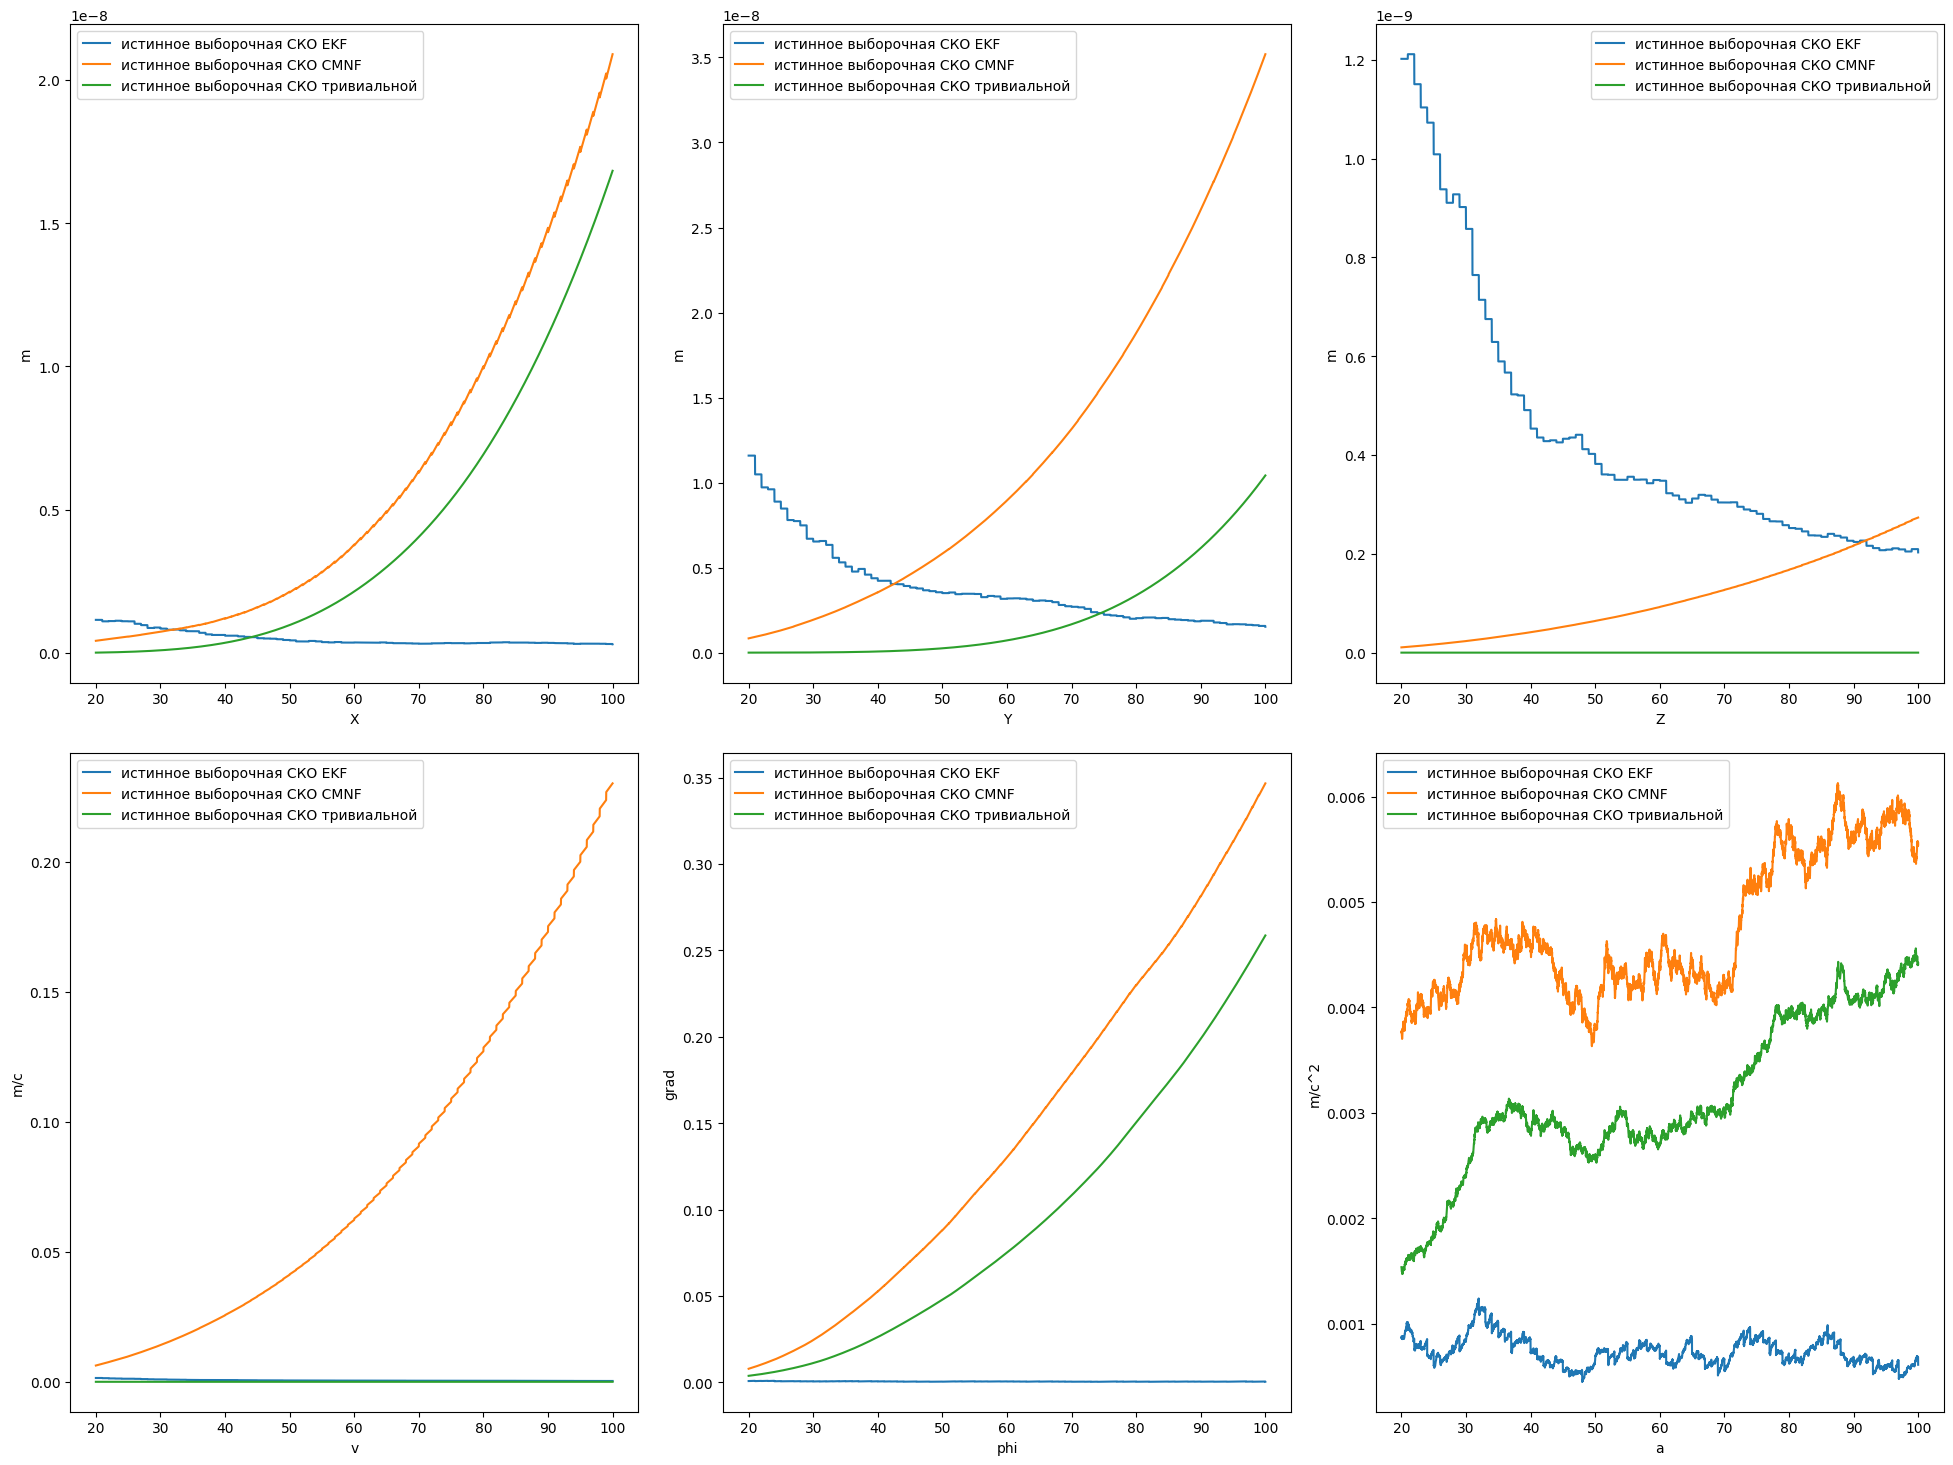

##4. Для всего пучка траекторий процент расходящихся траекторий, а также выборочные СКО для каждой компоненты в нескольких точках.


По результатам моделирования 10000 траекторий, из этих траекторий разошлись

3,88% EKF

1,44% CMNF

в первую секунду:

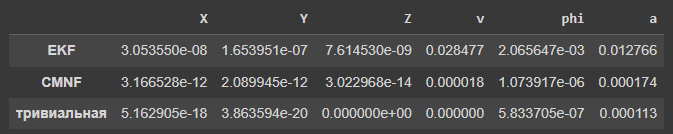


в десятую секунду:

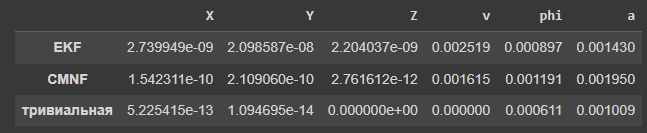

в пятидесятую секунду:

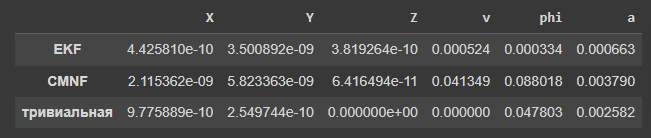

в сотую секунду:

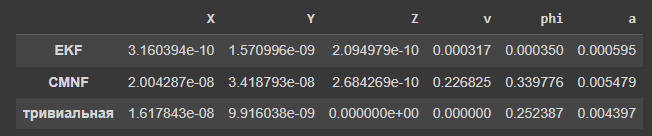

##Выводы по расчетной части:

• EKF показал результат лучше, чем тривиальная оценка.

• По выборочному СКО лучше отработал EKF, но по критерию расходимости за 5 сигма более стабилен был уже CMNF.

• Со временем растёт ошибка

• Возможно, для точности СMNF не хватило количества смоделированных синтетических траекторий

• Оба алгоритма с высокой точностью оценивают положение объекта с точки зрения координат, но сложности возникают с оценкой скорости и угла.

# Приложение с кодом

In [1]:
# подключение библиотек

import numpy as np
import scipy.integrate as integrate
import math
from tqdm.auto import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
import tqdm

In [2]:
# константы из статьи

mu_0_1 = 0 # м - среднее для 1-й компоненты
sigma_0_1 = 1000 # м - отклонение для 1-й компоненты
mu_0_2 = 20000 # м - среднее для 2-й компоненты
sigma_0_2 = 1000 # м - отклонение для 2-й компоненты
mu_0_3 = -1000 # м - среднее для 3-й компоненты
sigma_0_3 = 100 # м - отклонение для 3-й компоненты
v_min = 5 # м/c - минимальная скорость для 3-й компоненты
v_max = 12 # м/c - максимальная скорость для 3-й компоненты
mu_0_phi = - math.pi / 2 # рад - среднее начального градуса
sigma_0_phi = 0.1 # рад - отклонение начального градуса
a_min = -0.2
a_max = 0.2

lmbd = 0.01
mu = 0.01
v = 0
freq = 1 # гц - частота измерений
T = 100 # с - длительность манёвра
h_dyn = 0.01 # с - шаг метода Эйлера Маруямы + шаг динамики в EKF
h_fil = 0.05 # шаг фильтра

In [3]:
# положение радаров

positions = np.array([
[-1e4, 0, -25], [-5e3, 1e3, -25], [5e3, 1e3, -25], [1e4, 0, -25],
[-1e4, 0, -50], [-5e3, 1e3, -50], [5e3, 1e3, -50], [1e4, 0, -50]
])
num_sensors = positions.shape[0]

In [4]:
params = {
    "x": {"mean": 0.0, "std": 1000.0},
    "y": {"mean": 20000.0, "std": 1000.0},
    "z": {"mean": -1000.0, "std": 100.0},
    "v": {"min": 5.0, "max": 23.0, "mean": (5.0 + 12.0) / 2, "var": (12.0 - 5.0) ** 2 / 12},
    "phi": {"mean": np.deg2rad(-90), "std": 0.1},
    "a": {"lambda": 0.01, "mu": 0.01, "nu": 0.0},
    "observers": {
        "sensors": np.array([
[-1e4, 0, -25], [-5e3, 1e3, -25], [5e3, 1e3, -25], [1e4, 0, -25],
[-1e4, 0, -50], [-5e3, 1e3, -50], [5e3, 1e3, -50], [1e4, 0, -50]
]),
        "freq": 1, "duration": 100
    },
    "EKF": {"init": None},
    "CMNF": {"count": 1000,  "N_dim": 6},
    "EM": {"h_observation": 1.0, "h_forecast": 0.01, "h_state": 0.01},
    "Trivial": {"count_iter": 100},

}

In [5]:
# формируем начальные условия для динамики

def create_initial():
    x_0_1 = np.random.normal(mu_0_1, sigma_0_1)
    x_0_2 = np.random.normal(mu_0_2, sigma_0_2)
    x_0_3 = np.random.normal(mu_0_3, sigma_0_3)
    x_0_4 = np.random.uniform(v_min, v_max)
    x_0_5 = np.random.normal(mu_0_phi, sigma_0_phi)
    x_0_6 = np.random.uniform(a_min, a_max)

    return np.array([x_0_1, x_0_2, x_0_3, x_0_4, x_0_5, x_0_6])

In [6]:
# начальная матрица ковариаций -- диагональная 6 на 6 с дисперсиями каждой координаты на этой диагонали

uniform_disp_v = (v_max - v_min) ** 2 / 12
uniform_disp_a = (a_max - a_min) ** 2 / 12

initial_dynamic_cov = np.diag([sigma_0_1 ** 2, sigma_0_2 ** 2, sigma_0_3 ** 2, uniform_disp_v, sigma_0_phi ** 2, uniform_disp_a])
initial_cov = initial_dynamic_cov

initial_dynamic_mean = np.array([mu_0_1, mu_0_2, mu_0_3, (v_min + v_max) / 2, mu_0_phi, (a_min + a_max) / 2])
initial_mean = initial_dynamic_mean

In [7]:
# наблюдения

w_0 = 20
C = 1500
sigma_v_ksi = 0.02
sigma_v_eta = 0.02
sigma_v_w = 0.005

initial_obs_cov = np.diag(np.array([sigma_v_ksi ** 2, sigma_v_eta ** 2, sigma_v_w ** 2] * num_sensors))

b = np.diag([0., 0., 0., 0., 0., mu])
B = np.sqrt(initial_obs_cov)

In [8]:
initial_dynamic = create_initial()
params["initial_dynamic"] = initial_dynamic
params["initial_cov"] = initial_cov
params["initial_mean"] = initial_mean
params["B"] = B
params["b"] = b

In [9]:
# считаем производные в динамике

def deriv(X, N=1):
    x_1, x_2, x_3, x_4, x_5, x_6 = X
    x_r_1 = x_4 * np.cos(x_5)
    x_r_2 = x_4 * np.sin(x_5)
    if N == 1:
        x_r_3 = 0
        x_r_4 = 0
    else:
        x_r_3 = [0] * N
        x_r_4 = [0] * N
    x_r_5 = x_6 / x_4
    x_r_6 = -lmbd * x_6 + v

    return np.array([x_r_1, x_r_2, x_r_3, x_r_4, x_r_5, x_r_6]).T

In [10]:
# метод Эйлера-Маруямы

def Euler_Maruyama_method(h, n, init, noise=True):
    ys = np.empty((n, init.shape[0]))
    ys[0] = init

    if noise == True:
        for i in range(n - 1):
            noise = np.array([0., 0., 0., 0., 0., np.random.normal(loc=0.0, scale=np.sqrt(h))])
            ys[i + 1] = ys[i] + deriv(ys[i]) * h + noise * mu
    else:
        for i in range(n - 1):
            ys[i + 1] = ys[i] + deriv(ys[i]) * h

    return ys

In [11]:
# наблюдения

def observe(X, all=False):
  temp_x = np.zeros(3 * num_sensors)
  for i in range(num_sensors):
    R = np.sqrt(np.sum((X[:3] - positions[i]) ** 2))
    r = np.sqrt(np.sum((X[:2] - positions[i, :2]) ** 2))
    V_x = X[3] * np.cos(X[4])
    V_y = X[3] * np.sin(X[4])
    V = ((X[0] - positions[i, 0]) * V_x + (X[1] - positions[i, 1]) * V_y) / R
    temp_x[3 * i] = (X[2] - positions[i, 2]) / R # ksi
    temp_x[3 * i + 1] = (X[0] - positions[i, 0]) / r # eta
    temp_x[3 * i + 2] = w_0 / (1 - V/C) # w
    if not all:
      temp_x[3 * i] += np.random.normal(0, sigma_v_ksi)
      temp_x[3 * i + 1] += np.random.normal(0, sigma_v_eta)
      temp_x[3 * i + 2] += np.random.normal(0, sigma_v_w)
  return temp_x

In [12]:
def Jacobian_m_dynamic(X):
    x, y, z, v, phi, a = X

    dx_1 = np.array([0., 0., 0., np.cos(phi), -v * np.sin(phi), 0.]).reshape((1, -1))
    dx_2 = np.array([0., 0., 0., np.sin(phi), v * np.cos(phi), 0.]).reshape((1, -1))
    dx_3 = np.array([0., 0., 0., 0., 0., 0.]).reshape((1, -1))
    dx_4 = np.array([0., 0., 0., 0., 0., 0.]).reshape((1, -1))
    dx_5 = np.array([0., 0., 0., -a / (v ** 2), 0., 1 / v]).reshape((1, -1))
    dx_6 = np.array([0., 0., 0., 0., 0., -lmbd]).reshape((1, -1))

    return np.vstack([dx_1, dx_2, dx_3, dx_4, dx_5, dx_6])

In [13]:
def Jacobian_m_observe(X):

  matrix = np.zeros((3 * num_sensors, X.shape[0]))
  for i in range(num_sensors):
    R = np.sqrt(np.sum((X[:3] - positions[i]) ** 2))
    r = np.sqrt(np.sum((X[:2] - positions[i, :2]) ** 2))
    V_x = X[3] * np.cos(X[4])
    V_y = X[3] * np.sin(X[4])
    V = ((X[0] - positions[i, 0]) * V_x + (X[1] - positions[i, 1]) * V_y) / R
    matrix[3 * i, 0] = -(X[2] - positions[i, 2]) * (X[0] - positions[i, 0]) / R ** 3
    matrix[3 * i, 1] = -(X[2] - positions[i, 2]) * (X[1] - positions[i, 1]) / R ** 3
    matrix[3 * i, 2] = (R ** 2 - (X[2] - positions[i, 2]) ** 2) / R ** 3
    matrix[3 * i + 1, 0] = (r ** 2 - (X[0] - positions[i, 0]) ** 2) / r ** 3
    matrix[3 * i + 1, 1] = -(X[1] - positions[i, 1]) * (X[0] - positions[i, 0]) / r ** 3
    denom = (1 - V / C)**2
    matrix[3 * i + 2, 0] = -w_0 * (V * (X[0] - positions[i, 0]) - V_x * R) / (R ** 2 * C * denom)
    matrix[3 * i + 2, 1] = -w_0 * (V * (X[1] - positions[i, 1]) - V_y * R) / (R ** 2 * C * denom)
    matrix[3 * i + 2, 2] = -w_0 * (V * (X[2] - positions[i, 2])) / (R ** 2 * C * denom)
    matrix[3 * i + 2, 3] = w_0 * V / (X[3] * C * denom)
    matrix[3 * i + 2, 4] = w_0 * (V_x * (X[1] - positions[i, 1]) - V_y * (X[0] - positions[i, 0])) / (R * C * denom)
  return matrix

# EKF - 1

In [14]:
class EKF:
  def estimation(self, observations, n_for):
        n_dyn = int(T / h_dyn) + 1
        n = (n_dyn - n_for) // n_for

        estimation = np.empty((n_dyn, 6))
        estimation_cov = np.empty((n_dyn, 6, 6))
        estimation[0], estimation_cov[0] = initial_dynamic_mean, initial_dynamic_cov

        for i in range(n + 1):
            start = i * n_for
            end = start + n_for

            # прогноз
            forecast = Euler_Maruyama_method(h_dyn, n_for + 1, estimation[start], False) # не нужен шум
            forecast_cov = np.empty((n_for + 1, 6, 6))
            forecast_cov[0] = estimation_cov[start]

            for _ in range(n_for):
                j = Jacobian_m_dynamic(forecast[_])
                forecast_cov[_ + 1] = forecast_cov[_] + (j @ forecast_cov[_] + forecast_cov[_] @ j.T + b @ b.T) * h_dyn

            estimation[start:end + 1], estimation_cov[start:end + 1] = forecast, forecast_cov

            # коррекция
            j = Jacobian_m_observe(estimation[end])
            k = estimation_cov[end]
            gain = k @ j.T @ np.linalg.pinv(j @ k @ j.T + B @ B.T)
            estimation[end] = estimation[end] + gain @ (observations[:, i] - observe(estimation[end], True))
            estimation_cov[end] = k - gain @ j @ k

        return estimation.T[:, 1:], estimation_cov.T

# EKF - SQRT

In [21]:
from numpy.linalg import qr as qr
from numpy.linalg import pinv as pinv

In [31]:
class SQRTEKF:
    def qr_r(self, X, Y):
      Q, R = qr(np.concatenate((X, Y), axis=0))
      return R

    def estimation(self, observations, n_for):

        #  n_for = self.h_observation / self.h_state
        n_dyn = int(T / h_dyn) + 1
        n = (n_dyn - n_for) // n_for

        estimation = np.empty((n_dyn, 6))
        estimation_cov = np.empty((n_dyn, 6, 6))
        estimation[0], estimation_cov[0] = initial_dynamic_mean, np.sqrt(initial_dynamic_cov)

        for i in range(n + 1):
            start = i * n_for
            end = start + n_for

            # прогноз
            forecast = Euler_Maruyama_method(h_dyn, n_for + 1, estimation[start], False) # не нужен шум
            forecast_cov = np.empty((n_for + 1, 6, 6))
            forecast_cov[0] = estimation_cov[start]

            for _ in range(n_for):
                j = Jacobian_m_dynamic(forecast[_])
                D = np.eye(6) + j * h_dyn
                forecast_cov[_ + 1] = self.qr_r(forecast_cov[_] @ (D.T), b * np.sqrt(h_dyn))

            estimation[start:end + 1], estimation_cov[start:end + 1] = forecast, forecast_cov

            # коррекция
            j = Jacobian_m_observe(estimation[end])
            k = estimation_cov[end]
            G = self.qr_r(k @ (j.T), B)
            gain = (pinv(G) @ (pinv(G.T) @ j) @ k.T @ k).T
            estimation[end] = estimation[end] + gain @ (observations[:, i] - observe(estimation[end], True))
            estimation_cov[end] = self.qr_r(k @ (np.eye(6) - gain @ j).T , B @ gain.T)

        return estimation.T[:, 1:], estimation_cov.T

#CMNF

In [15]:
# реализация CMNF

class CMNF():
    def __init__(self, params, Y):
        self.params = params
        self.N_dim = params["initial_dynamic"].shape[0]
        self.observers = params["observers"]
        self.initial_mean = self.params["initial_mean"]
        self.initial_cov = self.params["initial_cov"]
        self.h_state = params["EM"]["h_state"]
        self.h_forecast = params["EM"]["h_forecast"]
        self.h_observation = params["EM"]["h_observation"]
        self.T = params["observers"]["duration"]
        self.count_observation = int(params["observers"]["duration"] / params["EM"]["h_observation"])
        self.count_forecast = int(params["observers"]["duration"] / params["EM"]["h_forecast"])
        self.count_state = int(params["observers"]["duration"] / params["EM"]["h_state"])
        self.b = params["b"]
        self.B = params["B"]
        self.Y = Y
        self.R = params["CMNF"]["R"]
        self.m = params["CMNF"]["m"]
        self.target = None


    def A(self, X, gaussian_error=True):
        X = X.reshape(X.shape[0], -1)
        qq = X.shape[1]
        return np.array([observe(X[:,tt], all = not gaussian_error) for tt in range(qq)]).T

    def a(self, X):
        return deriv(X)

    def a_ito(self, x):
        x_1 = x[0, :]
        x_2 = x[1, :]
        x_3 = x[2, :]
        x_4 = x[3, :]
        x_5 = x[4, :]
        x_6 = x[5, :]
        x_r_1 = (x_4 * np.cos(x_5)).reshape(1, -1)
        x_r_2 = (x_4 * np.sin(x_5)).reshape(1, -1)
        x_r_3 = (np.zeros(x.shape[1])).reshape(1, -1)
        x_r_4 = (np.zeros(x.shape[1])).reshape(1, -1)
        x_r_5 = (x_6 / x_4).reshape(1, -1)
        x_r_6 = (-self.params["a"]["lambda"] * x_6 + self.params["a"]["nu"]).reshape(1, -1)
        a_x = np.concatenate((x_r_1, x_r_2, x_r_3, x_r_4, x_r_5, x_r_6), axis=0)
        error = np.random.normal(loc=0.0, scale=np.sqrt(self.h_forecast), size=(self.N_dim, x.shape[1]))
        return a_x * self.h_forecast + x + self.b @ error

    def alpha(self, X):
        '''
        Базовый прогноз
        '''
        return self.a_ito(X)


    def gamma(self, X, Y, alpha=True):
        '''
        Базовая коррекция
        '''
        if alpha:
            alpha_t = alpha(X)
        else:
            alpha_t = X
        return Y - self.A(alpha_t)

    def Euler_Maruyama(self, x, h, count_iter):
        x_1 = x[0, :]
        x_2 = x[1, :]
        x_3 = x[2, :]
        x_4 = x[3, :]
        x_5 = x[4, :]
        x_6 = x[5, :]
        x_r_1 = (x_4 * np.cos(x_5)).reshape(1, -1)
        x_r_2 = (x_4 * np.sin(x_5)).reshape(1, -1)
        x_r_3 = (np.zeros(x.shape[1])).reshape(1, -1)
        x_r_4 = (np.zeros(x.shape[1])).reshape(1, -1)
        x_r_5 = (x_6 / x_4).reshape(1, -1)
        x_r_6 = (-self.params["a"]["lambda"] * x_6 + self.params["a"]["nu"]).reshape(1, -1)
        a_x = np.concatenate((x_r_1, x_r_2, x_r_3, x_r_4, x_r_5, x_r_6), axis=0)
        error = np.random.normal(loc=0.0, scale=np.sqrt(self.h_forecast), size=(self.N_dim, x.shape[1]))
        return a_x * h + x + self.b @ error

    def forecast_correction_step_synthetic(self, X_synthetic_prev, X_synthetic_estimate):
        '''
        X_synthetic_prev - Выборки синтетических состояний
        X_synthetic_estimate - Выборки синтетических оценок фильтрации

        Методом Эйлера-Маруямы с малым шагом моделируем синтетические
        решения СДС в текущий момент и по ним наблюдения (2.1), (2.2)
        '''

        X_synthetic_current = self.Euler_Maruyama(X_synthetic_prev, self.h_forecast, 1)
        Y_synthetic_current = self.A(X_synthetic_current)
        '''Вычисление выборки синтетических базовых прогнозов и коррекций (2.3)'''
        alpha_synthetic = self.alpha(X_synthetic_estimate)
        gamma_synthetic = self.gamma(alpha_synthetic, Y_synthetic_current, alpha=False)
        '''Построение выборочных моментов mk, Rk Создаем пучок (2.4)'''


        x_dim, a_dim, g_dim = X_synthetic_current.shape[0], alpha_synthetic.shape[0], gamma_synthetic.shape[0]
        moments = np.concatenate((X_synthetic_current, alpha_synthetic, gamma_synthetic), axis=0)
        mk = np.sum(moments / moments.shape[1], axis=-1)
        mk_x = mk[:x_dim]
        mk_a = mk[x_dim: x_dim + a_dim]
        mk_g = mk[-g_dim:]
        Rk = self.cov_matrix(moments, mk, moments, mk)
        '''оценка сверху'''
        Rk[Rk < 0.0] = 0.0

        Rk_x_x = Rk[:x_dim, :x_dim]
        Rk_x_a = Rk[:x_dim, x_dim: x_dim + a_dim]
        Rk_a_x = Rk[x_dim: x_dim + a_dim, :x_dim]
        Rk_a_a_inv = np.linalg.pinv(Rk[x_dim: x_dim + a_dim, x_dim: x_dim + a_dim])
        Rk_g_a = Rk[-g_dim:, x_dim: x_dim + a_dim]
        Rk_a_g = Rk[x_dim: x_dim + a_dim, -g_dim:]
        Rk_x_g = Rk[: x_dim, -g_dim:]
        Rk_g_g = Rk[-g_dim:, -g_dim:]
        Rk_g_x = Rk[-g_dim:, : x_dim]
        '''Модифицированные синтетические прогнозы и коррекции (2.6)'''
        tmp = (mk_x- Rk_x_a @ Rk_a_a_inv @ mk_a).reshape(alpha_synthetic.shape[0], -1)
        X_synthetic_modification = Rk_x_a @ Rk_a_a_inv @ alpha_synthetic + tmp
        tmp = Rk_g_a @ Rk_a_a_inv @ (alpha_synthetic - mk_a.reshape(alpha_synthetic.shape[0], 1))
        gamma_synthetic_modification = gamma_synthetic - (mk_g.reshape(gamma_synthetic.shape[0], 1) + tmp).reshape(gamma_synthetic.shape[0], -1)
        Rk_x_x_forecast = Rk_x_x - Rk_x_a @ Rk_a_a_inv @ Rk_a_x
        Rk_x_g_forecast = Rk_x_g - Rk_x_a @ Rk_a_a_inv @ Rk_a_g
        Rk_g_g_forecast = Rk_g_g - Rk_g_a @ Rk_a_a_inv @ Rk_a_g
        Rk_g_x_forecast = Rk_g_x - Rk_g_a @ Rk_a_a_inv @ Rk_a_x
        X_synthetic_correction = X_synthetic_modification + Rk_x_g_forecast @ np.linalg.pinv(Rk_g_g_forecast) @ gamma_synthetic_modification
        return X_synthetic_current, X_synthetic_correction, mk, Rk


    def forecast_correction_step_target(self, mk, X, Y):
        '''
        mk - среднее на к шаге
        X - оценка состояния
        Y - наблюдения, если они есть в этот момент
        '''
        X = X.reshape(6, 1)
        '''целевой прогноз'''
        alpha_target = self.alpha(X)
        x_dim, a_dim, g_dim = X.shape[0], X.shape[0], 24
        mk_x = (mk[:6]).reshape(6, 1)
        mk_a = (mk[6:12]).reshape(6, 1)
        mk_g = (mk[12:]).reshape(24, 1)
        Rk = self.R
        Rk_x_x = Rk[:x_dim, :x_dim]
        Rk_x_a = Rk[:x_dim, x_dim: x_dim + a_dim]
        Rk_a_x = Rk[x_dim: x_dim + a_dim, :x_dim]
        Rk_a_a_inv = np.linalg.pinv(Rk[x_dim: x_dim + a_dim, x_dim: x_dim + a_dim])
        Rk_g_a = Rk[-g_dim:, x_dim: x_dim + a_dim]
        Rk_a_g = Rk[x_dim: x_dim + a_dim, -g_dim:]
        Rk_x_g = Rk[: x_dim, -g_dim:]
        Rk_g_g = Rk[-g_dim:, -g_dim:]
        Rk_g_x = Rk[-g_dim:, : x_dim]
        Rk_x_x_forecast = Rk_x_x - Rk_x_a @ Rk_a_a_inv @ Rk_a_x
        Rk_x_g_forecast = Rk_x_g - Rk_x_a @ Rk_a_a_inv @ Rk_a_g
        Rk_g_g_forecast = Rk_g_g - Rk_g_a @ Rk_a_a_inv @ Rk_a_g
        Rk_g_x_forecast = Rk_g_x - Rk_g_a @ Rk_a_a_inv @ Rk_a_x
        ''' Целевой модифицированный прогноз (2.7)'''
        X_target_modification = Rk_x_a @ Rk_a_a_inv @ alpha_target + mk_x - Rk_x_a @ Rk_a_a_inv @ mk_a
        if Y is None:
            return X_target_modification, Rk_x_x_forecast
        ''' Целевая коррекция'''
        gamma_target = self.gamma(alpha_target, Y, alpha=False)
        ''' Целевой модифицированная коррекция (2.7)'''
        gamma_target_modification = gamma_target - (mk_g + Rk_g_a @ Rk_a_a_inv @ (alpha_target - mk_a))
        '''коррекция оценки'''
        X_estimation_correction = X_target_modification + Rk_x_g_forecast @ np.linalg.pinv(Rk_g_g_forecast) @ gamma_target_modification
        Rk_k_k_estimation = Rk_x_x_forecast - Rk_x_g_forecast @ np.linalg.pinv(Rk_g_g_forecast) @ Rk_g_x_forecast

        return X_estimation_correction, Rk_k_k_estimation


    def create_initial(self):
        x_0_1 = np.random.normal(mu_0_1, sigma_0_1)
        x_0_2 = np.random.normal(mu_0_2, sigma_0_2)
        x_0_3 = np.random.normal(mu_0_3, sigma_0_3)
        x_0_4 = np.random.uniform(v_min, v_max)
        x_0_5 = np.random.normal(mu_0_phi, sigma_0_phi)
        x_0_6 = np.random.uniform(a_min, a_max)
        return np.array([x_0_1, x_0_2, x_0_3, x_0_4, x_0_5, x_0_6]).reshape(self.N_dim, )

    def cov_matrix(self, X, X_mean, Y, Y_mean):
        cov = np.zeros((X.shape[0], Y.shape[0]))
        for i in range(X.shape[1]):
            cov += (X[:, i] - X_mean).reshape(X.shape[0], 1) @ (Y[:, i] - Y_mean).reshape(1, Y.shape[0]) / (X.shape[1] - X.shape[0])
        return cov

    def synthetic(self):
        '''моделирование синтетический траекторий'''
        X_synthetic = np.zeros((self.N_dim, self.params["CMNF"]["count"]))
        for i in range(self.params["CMNF"]["count"]):
            '''начальные условия из распределения'''
            X_synthetic[:, i] = self.create_initial()

        X_mean = np.sum(X_synthetic / X_synthetic.shape[1], axis=-1)
        self.target = X_mean
        '''начальные оценки синтетический траекторий'''
        X_synthetic_estimation = np.zeros((self.N_dim, self.params["CMNF"]["count"]))
        for i in range(self.params["CMNF"]["count"]):
            X_synthetic_estimation[:, i] = X_mean
        K = self.cov_matrix(X_synthetic, X_mean, X_synthetic, X_mean)
        means = []
        R = []
        for i in tqdm.tqdm(range(self.count_forecast)):
            X_synthetic, X_synthetic_estimation, mk, Rk = self.forecast_correction_step_synthetic(X_synthetic, X_synthetic_estimation)
            means.append(mk)
            R.append(Rk)
        R = np.mean(np.array(R), axis=0)
        m = np.array(means)
        return R, m

    def estimation(self):
        Y = self.Y
        X_estimate = [self.params["initial_dynamic"]]
        k_estimate = []
        y_idx = 0
        for i in tqdm.tqdm(range(self.count_forecast)):
            if i % int(self.h_observation / self.h_forecast) == 0:
                '''forecast and correction step'''
                X_target, k_target = self.forecast_correction_step_target(self.m[i], X_estimate[-1], Y[:,y_idx:y_idx+1])
                y_idx += 1
            else:
                '''forecast step'''
                X_target, k_target = self.forecast_correction_step_target(self.m[i], X_estimate[-1], None)
            for j in range(int(self.count_state / self.count_forecast)):
                X_estimate.append(X_target.reshape(6, ))
                k_estimate.append(np.diag(k_target))
        return np.array(X_estimate).T[:, 1:], np.array(k_estimate).T

#Experiments

In [16]:
class Euler_Maruyama:
    '''
    метод Эйлера-Маруямы
    '''
    def __init__(self, h, n, params, initial_dynamic):
        self.h = h
        self.n = n
        self.params = params
        self.N_dim = params["initial_dynamic"].shape[0]
        self.b = params["b"]

    def a(self, X):
        return deriv(X)

    def run(self):
        x = np.zeros((self.N_dim, self.n))
        x[:, 0] = self.params["initial_dynamic"]
        for i in range(self.n - 1):
            error = np.random.normal(loc=0.0, scale=np.sqrt(self.h), size=(self.N_dim, 1))
            b = np.diag([0, 0, 0, 0, 0, mu])
            x[:, i + 1] = ((self.a(x[:, i]) * self.h + x[:, i]).reshape(self.N_dim, 1) +  b @ error).reshape(self.N_dim, )
        return x

In [17]:
class Trivial_article:
    def __init__(self, params, Y, noise=True):
        self.count_observation = int(params["observers"]["duration"] / params["EM"]["h_observation"])
        self.speed = params["v"]["mean"]
        self.phi_mean = params["phi"]["mean"]
        self.T = params["observers"]["duration"]
        self.observers = params["observers"]
        self.Y = Y
        self.params = params
        self.N_dim = params["initial_dynamic"].shape[0]
        self.b = params["b"]
        self.h = params["EM"]["h_state"],
        self.n = int(params["observers"]["duration"] / params["EM"]["h_state"])

    def a(self, X):
        return deriv(X)

    def estimation(self):
      # тривиальная оценка
        x = np.zeros((self.N_dim, self.n))
        x[:, 0] = self.params["initial_dynamic"]
        for i in range(self.n - 1):
            x[:, i + 1] = ((self.a(x[:, i]) * self.h + x[:, i]).reshape(self.N_dim, 1)).reshape(self.N_dim, )
        return x

In [18]:
class Trajectory:
    def __init__(self, params):
        self.EM = Euler_Maruyama(
            params["EM"]["h_state"],
            int(params["observers"]["duration"] / params["EM"]["h_state"]),
            params,
            True)
    def get(self):
        return self.EM.run()

In [34]:
class Estimation:
    def __init__(self, params):
        self.params = params
        self.h_state = params["EM"]["h_state"]
        self.h_forecast = params["EM"]["h_forecast"]
        self.h_observation = params["EM"]["h_observation"]
        self.observers = params["observers"]
        self.trajectory = None
        self.trivial = None
        self.ekf = None
        self.ekf_k = None
        self.sqrtekf = None
        self.sqrtekf_k = None
        self.cmnf =  None
        self.cmnf_k = None

    def A(self, X, gaussian_error=True):
        X = X.reshape(X.shape[0], -1)
        qq = X.shape[1]
        return np.array([observe(X[:,tt], all = not gaussian_error) for tt in range(qq)]).T

    def run(self):
        self.trajectory = Trajectory(self.params).get()
        Y = self.A(self.trajectory)
        self.trivial = Trivial_article(self.params, Y).estimation()
        Y = Y[:, ::int(self.h_observation / self.h_state)]
        ekf = EKF()
        self.ekf, self.ekf_k = ekf.estimation(Y, int(self.h_observation / self.h_state))
        sqrtekf = SQRTEKF()
        self.sqrtekf, self.sqrtekf_k = sqrtekf.estimation(Y, int(self.h_observation / self.h_state))
        #cmnf = CMNF(self.params, None)
        #params["CMNF"]["R"], params["CMNF"]["m"] = cmnf.synthetic()
        cmnf = CMNF(self.params, Y)
        self.cmnf, self.cmnf_k = cmnf.estimation()

Вначале запускал synthetic без наблюдений для получения Xt, Kt. Их сохранял в R,m

Суть в  том, что можно только один раз сгенерировать 10000 траекторий. А дальше только mk, R использовать. Иначе очень долго считаться будет

In [ ]:
# получаем оценку выборочных R, m
#params["initial_dynamic"] = create_initial()
#params["CMNF"]["R"] = None
#params["CMNF"]["m"] = None
#cmnf = CMNF(params, None)
#params["CMNF"]["R"], params["CMNF"]["m"] = cmnf.synthetic()

100%|██████████| 10000/10000 [1:16:19<00:00,  2.18it/s]


In [ ]:
#np.save("R.npy", params["CMNF"]["R"])
#np.save("m.npy", params["CMNF"]["m"])

In [24]:
params["CMNF"]["R"] = np.load("/content/R.npy")
params["CMNF"]["m"] = np.load("/content/m.npy")

# run



In [35]:
class MonteCarlo():
    def __init__(self, params):
        self.params = params
        self.Monte_Carlo_cmnf_est = []
        self.Monte_Carlo_cmnf_k = []
        self.Monte_Carlo_ekf_est = []
        self.Monte_Carlo_ekf_k = []
        self.Monte_Carlo_sqrtekf_est = []
        self.Monte_Carlo_sqrtekf_k = []
        self.Monte_Carlo_Trivial = []
        self.Monte_Carlo_trajectory = []
    def run(self, count):
        for i in tqdm.tqdm(range(count)):
            self.params["initial_dynamic"] = create_initial()
            est = Estimation(self.params)
            est.run()
            self.Monte_Carlo_cmnf_est.append(est.cmnf)
            self.Monte_Carlo_cmnf_k.append(est.cmnf_k)
            self.Monte_Carlo_ekf_est.append(est.ekf)
            self.Monte_Carlo_ekf_k.append(est.ekf_k)
            self.Monte_Carlo_sqrtekf_est.append(est.sqrtekf)
            self.Monte_Carlo_sqrtekf_k.append(est.sqrtekf_k)
            self.Monte_Carlo_Trivial.append(est.trivial)
            self.Monte_Carlo_trajectory.append(est.trajectory)
        quit=count-1
        np.save(''.join(("/Monte_Carlo_cmnf_est_", str(quit), ".npy")), np.array(self.Monte_Carlo_cmnf_est))
        np.save(''.join(("/Monte_Carlo_cmnf_k_", str(quit), ".npy")), np.array(self.Monte_Carlo_cmnf_k))
        np.save(''.join(("/Monte_Carlo_ekf_est_", str(quit), ".npy")), np.array(self.Monte_Carlo_ekf_est))
        np.save(''.join(("/Monte_Carlo_ekf_k_", str(quit), ".npy")), np.array(self.Monte_Carlo_ekf_k))
        np.save(''.join(("/Monte_Carlo_Trivial_", str(quit), ".npy")), np.array(self.Monte_Carlo_Trivial))
        np.save(''.join(("/Monte_Carlo_trajectory_", str(quit), ".npy")), np.array(self.Monte_Carlo_trajectory))
    def load(self):
        self.Monte_Carlo_cmnf_est = np.load("/Monte_Carlo_cmnf_est_100.npy")
        self.Monte_Carlo_cmnf_k = np.load("/Monte_Carlo_cmnf_k_100.npy")
        self.Monte_Carlo_ukf_est = np.load("/Monte_Carlo_ekf_est_100.npy")
        self.Monte_Carlo_ukf_k = np.load("/Monte_Carlo_ekf_k_100.npy")
        self.Monte_Carlo_Trivial = np.load("/Monte_Carlo_Trivial_100.npy")
        self.Monte_Carlo_trajectory = np.load("/Monte_Carlo_trajectory_100.npy")

In [36]:
mc = MonteCarlo(params)

In [37]:
mc.run(1)

100%|██████████| 1/1 [00:07<00:00,  7.17s/it]


In [67]:
#mc.load()

Monte_Carlo_cmnf_est = np.array(mc.Monte_Carlo_cmnf_est)
Monte_Carlo_cmnf_k = np.array(mc.Monte_Carlo_cmnf_k)
Monte_Carlo_ekf_est = np.array(mc.Monte_Carlo_ekf_est)
Monte_Carlo_ekf_k = np.array(mc.Monte_Carlo_ekf_k)
Monte_Carlo_sqrtekf_est = np.array(mc.Monte_Carlo_sqrtekf_est)
Monte_Carlo_sqrtekf_k = np.array(mc.Monte_Carlo_sqrtekf_k)
Monte_Carlo_Trivial = np.array(mc.Monte_Carlo_Trivial)
Monte_Carlo_trajectory = np.array(mc.Monte_Carlo_trajectory)

In [68]:
error_ekf = Monte_Carlo_ekf_est - Monte_Carlo_trajectory
error_sqrtekf = Monte_Carlo_sqrtekf_est - Monte_Carlo_trajectory
error_cmnf = Monte_Carlo_cmnf_est - Monte_Carlo_trajectory
error_trivial = Monte_Carlo_Trivial - Monte_Carlo_trajectory

In [69]:
error_ekf.shape

(1, 6, 10000)

In [70]:
Monte_Carlo_ekf_k.shape

(1, 6, 6, 10001)

In [71]:
Monte_Carlo_ekf_k[0][0].mean(axis=0)

array([1.66666667e+05, 1.66666667e+05, 1.66666667e+05, ...,
       4.37746153e+01, 4.37746325e+01, 4.33158137e+01])

In [72]:
new_Monte_Carlo_ekf_k = np.zeros(shape=(Monte_Carlo_ekf_k.shape[0],Monte_Carlo_ekf_k.shape[1],Monte_Carlo_ekf_k.shape[3]))

In [119]:
np.array(mc.Monte_Carlo_ekf_k)[0][0]

array([[ 1.00000000e+06,  1.00000000e+06,  1.00000000e+06, ...,
         2.75483820e+02,  2.75485958e+02,  2.72676929e+02],
       [ 0.00000000e+00,  0.00000000e+00, -4.11583378e-20, ...,
        -1.35928587e+01, -1.35950033e+01, -1.35336004e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.20226746e-01,  8.20367250e-01,  8.12576047e-01],
       [ 0.00000000e+00,  2.50032055e-18,  5.00064110e-18, ...,
        -4.34435081e-02, -4.34523646e-02, -4.26947630e-02],
       [ 0.00000000e+00,  8.50000000e-04,  1.70000000e-03, ...,
        -1.89684665e-02, -1.89807831e-02, -1.80548009e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.33333333e-06, ...,
        -1.08421240e-03, -1.09424683e-03, -2.73472041e-04]])

In [ ]:
new_Monte_Carlo_sqrtekf_k = np.zeros(shape=(Monte_Carlo_ekf_k.shape[0],Monte_Carlo_ekf_k.shape[1],Monte_Carlo_ekf_k.shape[3]))
for i in range(Monte_Carlo_ekf_k.shape[0]):
  for j in range(Monte_Carlo_ekf_k.shape[1]):
    new_Monte_Carlo_ekf_k[i][j] = Monte_Carlo_sqrtekf_k[0][0].mean(axis=0)

In [73]:
for i in range(Monte_Carlo_ekf_k.shape[0]):
  for j in range(Monte_Carlo_ekf_k.shape[1]):
    new_Monte_Carlo_ekf_k[i][j] = Monte_Carlo_ekf_k[0][0].mean(axis=0)

In [74]:
Monte_Carlo_ekf_k = np.array(new_Monte_Carlo_ekf_k)

In [75]:
Monte_Carlo_cmnf_k.shape

(1, 6, 10000)

In [76]:
error_1_cmnf = error_cmnf[:, 0, :]
error_2_cmnf = error_cmnf[:, 1, :]
error_3_cmnf = error_cmnf[:, 2, :]
error_4_cmnf = error_cmnf[:, 3, :]
error_5_cmnf = error_cmnf[:, 4, :]
error_6_cmnf = error_cmnf[:, 5, :]
std_1_cmnf = error_cmnf[:, 0, :].std(axis=0)
std_2_cmnf = error_cmnf[:, 1, :].std(axis=0)
std_3_cmnf = error_cmnf[:, 2, :].std(axis=0)
std_4_cmnf = error_cmnf[:, 3, :].std(axis=0)
std_5_cmnf = error_cmnf[:, 4, :].std(axis=0)
std_6_cmnf = error_cmnf[:, 5, :].std(axis=0)

In [77]:
error_cmnf[:, 5, :].std(axis=0)

array([0., 0., 0., ..., 0., 0., 0.])

In [78]:
count_cmnf = Monte_Carlo_cmnf_est.shape[0]

all = Monte_Carlo_cmnf_est.shape[2]

In [79]:
# если есть расходящиеся траектории

mist_cmnf = []
for i in tqdm.tqdm(range(count_cmnf)):

    if ((np.abs(error_1_cmnf[i]) <= 5 * np.abs(std_1_cmnf)).sum() != all or
            (np.abs(error_2_cmnf[i]) <= 5 * np.abs(std_2_cmnf)).sum() != all or
                (np.abs(error_3_cmnf[i]) <= 5 * np.abs(std_3_cmnf)).sum() != all or
                    (np.abs(error_4_cmnf[i]) <= 5 * np.abs(std_4_cmnf)).sum() != all or
                      (np.abs(error_5_cmnf[i]) <= 5 * np.abs(std_5_cmnf)).sum() != all or
                        (np.abs(error_6_cmnf[i]) <= 5 * np.abs(std_6_cmnf)).sum() != all):
        mist_cmnf.append(i)

100%|██████████| 1/1 [00:00<00:00, 1133.60it/s]


In [81]:
np.abs(error_1_cmnf)

array([[ 0.10262802,  0.09011905,  0.077938  , ..., 77.58761668,
        77.60696251, 77.62630426]])

In [82]:
5 * np.abs(std_1_cmnf)

array([0., 0., 0., ..., 0., 0., 0.])

In [83]:
len(mist_cmnf) / 104

0.009615384615384616

In [84]:
error_1_ekf = error_ekf[:, 0, :]
error_2_ekf = error_ekf[:, 1, :]
error_3_ekf = error_ekf[:, 2, :]
error_4_ekf = error_ekf[:, 3, :]
error_5_ekf = error_ekf[:, 4, :]
error_6_ekf = error_ekf[:, 5, :]

std_1_ekf = error_ekf[:, 0, :].std(axis=0)
std_2_ekf = error_ekf[:, 1, :].std(axis=0)
std_3_ekf = error_ekf[:, 2, :].std(axis=0)
std_4_ekf = error_ekf[:, 3, :].std(axis=0)
std_5_ekf = error_ekf[:, 4, :].std(axis=0)
std_6_ekf = error_ekf[:, 5, :].std(axis=0)

In [85]:
count_ekf = Monte_Carlo_ekf_est.shape[0]
all = Monte_Carlo_ekf_est.shape[2]
mist_ekf = []
for i in tqdm.tqdm(range(count_ekf)):
    if ((np.abs(error_1_ekf[i]) <= 5 * np.abs(std_1_ekf)).sum() != all or
            (np.abs(error_2_ekf[i]) <= 5 * np.abs(std_2_ekf)).sum() != all or
                (np.abs(error_3_ekf[i]) <= 5 * np.abs(std_3_ekf)).sum() != all or
                    (np.abs(error_4_ekf[i]) <= 5 * np.abs(std_4_ekf)).sum() != all or
                      (np.abs(error_5_ekf[i]) <= 5 * np.abs(std_5_ekf)).sum() != all or
                        (np.abs(error_6_ekf[i]) <= 5 * np.abs(std_6_ekf)).sum() != all):
        mist_ekf.append(i)

100%|██████████| 1/1 [00:00<00:00, 1189.87it/s]


In [86]:
len(mist_ekf) / 104

0.009615384615384616

In [87]:
error_1_sqrtekf = error_sqrtekf[:, 0, :]
error_2_sqrtekf = error_sqrtekf[:, 1, :]
error_3_sqrtekf = error_sqrtekf[:, 2, :]
error_4_sqrtekf = error_sqrtekf[:, 3, :]
error_5_sqrtekf = error_sqrtekf[:, 4, :]
error_6_sqrtekf = error_sqrtekf[:, 5, :]

std_1_sqrtekf = error_sqrtekf[:, 0, :].std(axis=0)
std_2_sqrtekf = error_sqrtekf[:, 1, :].std(axis=0)
std_3_sqrtekf = error_sqrtekf[:, 2, :].std(axis=0)
std_4_sqrtekf = error_sqrtekf[:, 3, :].std(axis=0)
std_5_sqrtekf = error_sqrtekf[:, 4, :].std(axis=0)
std_6_sqrtekf = error_sqrtekf[:, 5, :].std(axis=0)

In [89]:
error_ekf[:, 0, :] = error_ekf[:, 0, :] / 1000
error_ekf[:, 1, :] = error_ekf[:, 1, :] / 1000
error_ekf[:, 2, :] = error_ekf[:, 2, :] / 1000
error_sqrtekf[:, 0, :] = error_sqrtekf[:, 0, :] / 1000
error_sqrtekf[:, 1, :] = error_sqrtekf[:, 1, :] / 1000
error_sqrtekf[:, 2, :] = error_sqrtekf[:, 2, :] / 1000
error_cmnf[:, 0, :] = error_cmnf[:, 0, :] / 1000
error_cmnf[:, 1, :] = error_cmnf[:, 1, :] / 1000
error_cmnf[:, 2, :] = error_cmnf[:, 2, :] / 1000
error_trivial[:, 0, :] = error_trivial[:, 0, :] / 1000
error_trivial[:, 1, :] = error_trivial[:, 1, :] / 1000
error_trivial[:, 2, :] = error_trivial[:, 2, :] / 1000

std_ekf = (error_ekf).std(axis=0)
std_sqrtekf = (error_sqrtekf).std(axis=0)
std_cmnf = (error_cmnf).std(axis=0)
std_trivial = (error_trivial).std(axis=0)
mse_ekf = (error_ekf ** 2).mean(axis=0)
mse_sqrtekf = (error_sqrtekf ** 2).mean(axis=0)
mse_cmnf = (error_cmnf ** 2).mean(axis=0)
mse_trivial = (error_trivial ** 2).mean(axis=0)

In [90]:
mse_ekf[0]

array([3.96114936e-09, 3.95973533e-09, 3.95831930e-09, ...,
       1.38271605e-10, 1.38255374e-10, 9.78448934e-11])

In [92]:
import pandas as pd
tables = []
times = (np.array([1, 10, 50, 99]) / params['EM']['h_state']).astype(int)
for time in times:
    cko = np.array([mse_ekf[:,time], mse_sqrtekf[:,time], mse_cmnf[:,time], mse_trivial[:,time]])
    tables.append(pd.DataFrame(cko, index=['EKF', 'SQRT EKF', 'CMNF', 'тривиальная'], columns=['X', 'Y', 'Z', 'v', 'phi', 'a']))

In [93]:
tables[0]

,X,Y,Z,v,phi,a
EKF,1.430402e-08,1.613785e-07,1.750459e-08,0.001258,0.004217,0.017370
SQRT EKF,1.430455e-08,1.613785e-07,1.750459e-08,0.001258,0.004216,0.017371
CMNF,1.958857e-13,4.860531e-13,1.161076e-14,0.000053,0.000001,0.000505
тривиальная,1.006677e-17,3.653404e-19,0.000000e+00,0.000000,0.000002,0.000789


In [94]:
tables[1]

,X,Y,Z,v,phi,a
EKF,5.101048e-09,2.019264e-08,2.277720e-09,0.011906,6.859125e-07,0.002067
SQRT EKF,5.100980e-09,2.019290e-08,2.277717e-09,0.011905,6.736002e-07,0.002064
CMNF,4.893129e-11,3.612520e-11,1.265166e-12,0.004272,3.452023e-09,0.000175
тривиальная,1.417334e-13,1.566853e-14,0.000000e+00,0.000000,1.099973e-04,0.000684


In [95]:
tables[2]

,X,Y,Z,v,phi,a
EKF,6.680862e-11,2.430395e-10,1.278571e-11,0.007696,0.001257,0.000730
SQRT EKF,6.680391e-11,2.429387e-10,1.278653e-11,0.007697,0.001256,0.000730
CMNF,1.927997e-11,6.737559e-10,2.740378e-12,0.088582,0.000804,0.000120
тривиальная,1.184215e-12,2.063517e-12,0.000000e+00,0.000000,0.004677,0.001827


In [96]:
tables[3]

,X,Y,Z,v,phi,a
EKF,1.400808e-10,2.266346e-09,6.882410e-12,0.002229,0.000185,0.002190
SQRT EKF,1.400773e-10,2.266203e-09,6.882155e-12,0.002230,0.000184,0.002189
CMNF,5.714208e-09,4.713356e-09,1.248494e-11,0.361204,0.029320,0.000023
тривиальная,1.139031e-10,2.890923e-09,0.000000e+00,0.000000,0.078293,0.000038


In [97]:
Monte_Carlo_ekf_k.shape

(1, 6, 10001)

In [98]:
np.linspace(1, 100, int(99/0.01)).shape

(9900,)

In [99]:
def difference_of_data(data1, data2):
    return data1 - data2

def square(data, sign):
    return sign * 3 * np.sqrt(data)

def difference_of_data_squared(data1, data2):
    return (data1 - data2)**2

In [100]:
def draw(data, names, hide=True):

    x_space = np.linspace(20, 100, int(80/0.01))
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
    fig.tight_layout(pad=3.0)

    for t in range(len(data)):
      label = names[t]
      dat = data[t]
      ax[0,0].plot(x_space, dat[0,2000:], label = label)
      ax[0, 1].plot(x_space, dat[1,2000:], label = label)
      ax[0, 2].plot(x_space, dat[2,2000:], label = label)
      ax[1, 0].plot(x_space, dat[3,2000:], label = label)
      ax[1, 1].plot(x_space, dat[4,2000:], label = label)
      ax[1, 2].plot(x_space, dat[5,2000:], label = label)
    if hide:
      for wer in range(2):
        for rew in range(3):
          axx = ax[wer, rew]
          for i, p in enumerate(axx.get_lines()):
              if p.get_label() in names[:i]:
                  idx = names.index(p.get_label())
                  p.set_c(axx.get_lines()[idx].get_c())
                  p.set_label('_' + p.get_label())
    ax[0,0].set(xlabel='X', ylabel='m')
    ax[0, 1].set(xlabel='Y', ylabel='m')
    ax[0,2].set(xlabel='Z', ylabel='m')
    ax[1,0].set(xlabel='v', ylabel='m/c')
    ax[1,1].set(xlabel='phi', ylabel='grad')
    ax[1,2].set(xlabel='a', ylabel='m/c^2')
    ax[0,0].legend()
    ax[0, 1].legend()
    ax[0,2].legend()
    ax[1,0].legend()
    ax[1,1].legend()
    ax[1,2].legend()

In [102]:
#number = np.random.randint(0, Monte_Carlo_trajectory.shape[0])
number = 0
true_trajectory = Monte_Carlo_trajectory[number]
estimation_ekf = Monte_Carlo_ekf_est[number]
estimation_sqrtekf = Monte_Carlo_sqrtekf_est[number]
estimation_trivial = Monte_Carlo_Trivial[number]
estimation_cmnf = Monte_Carlo_cmnf_est[number]

estimation_ekf_k = Monte_Carlo_ekf_k[number,:,:10000]
estimation_sqrtekf_k = Monte_Carlo_sqrtekf_k[number,:,:10000]
estimation_trivial_k = Monte_Carlo_Trivial[number]
estimation_cmnf_k = Monte_Carlo_cmnf_k[number]

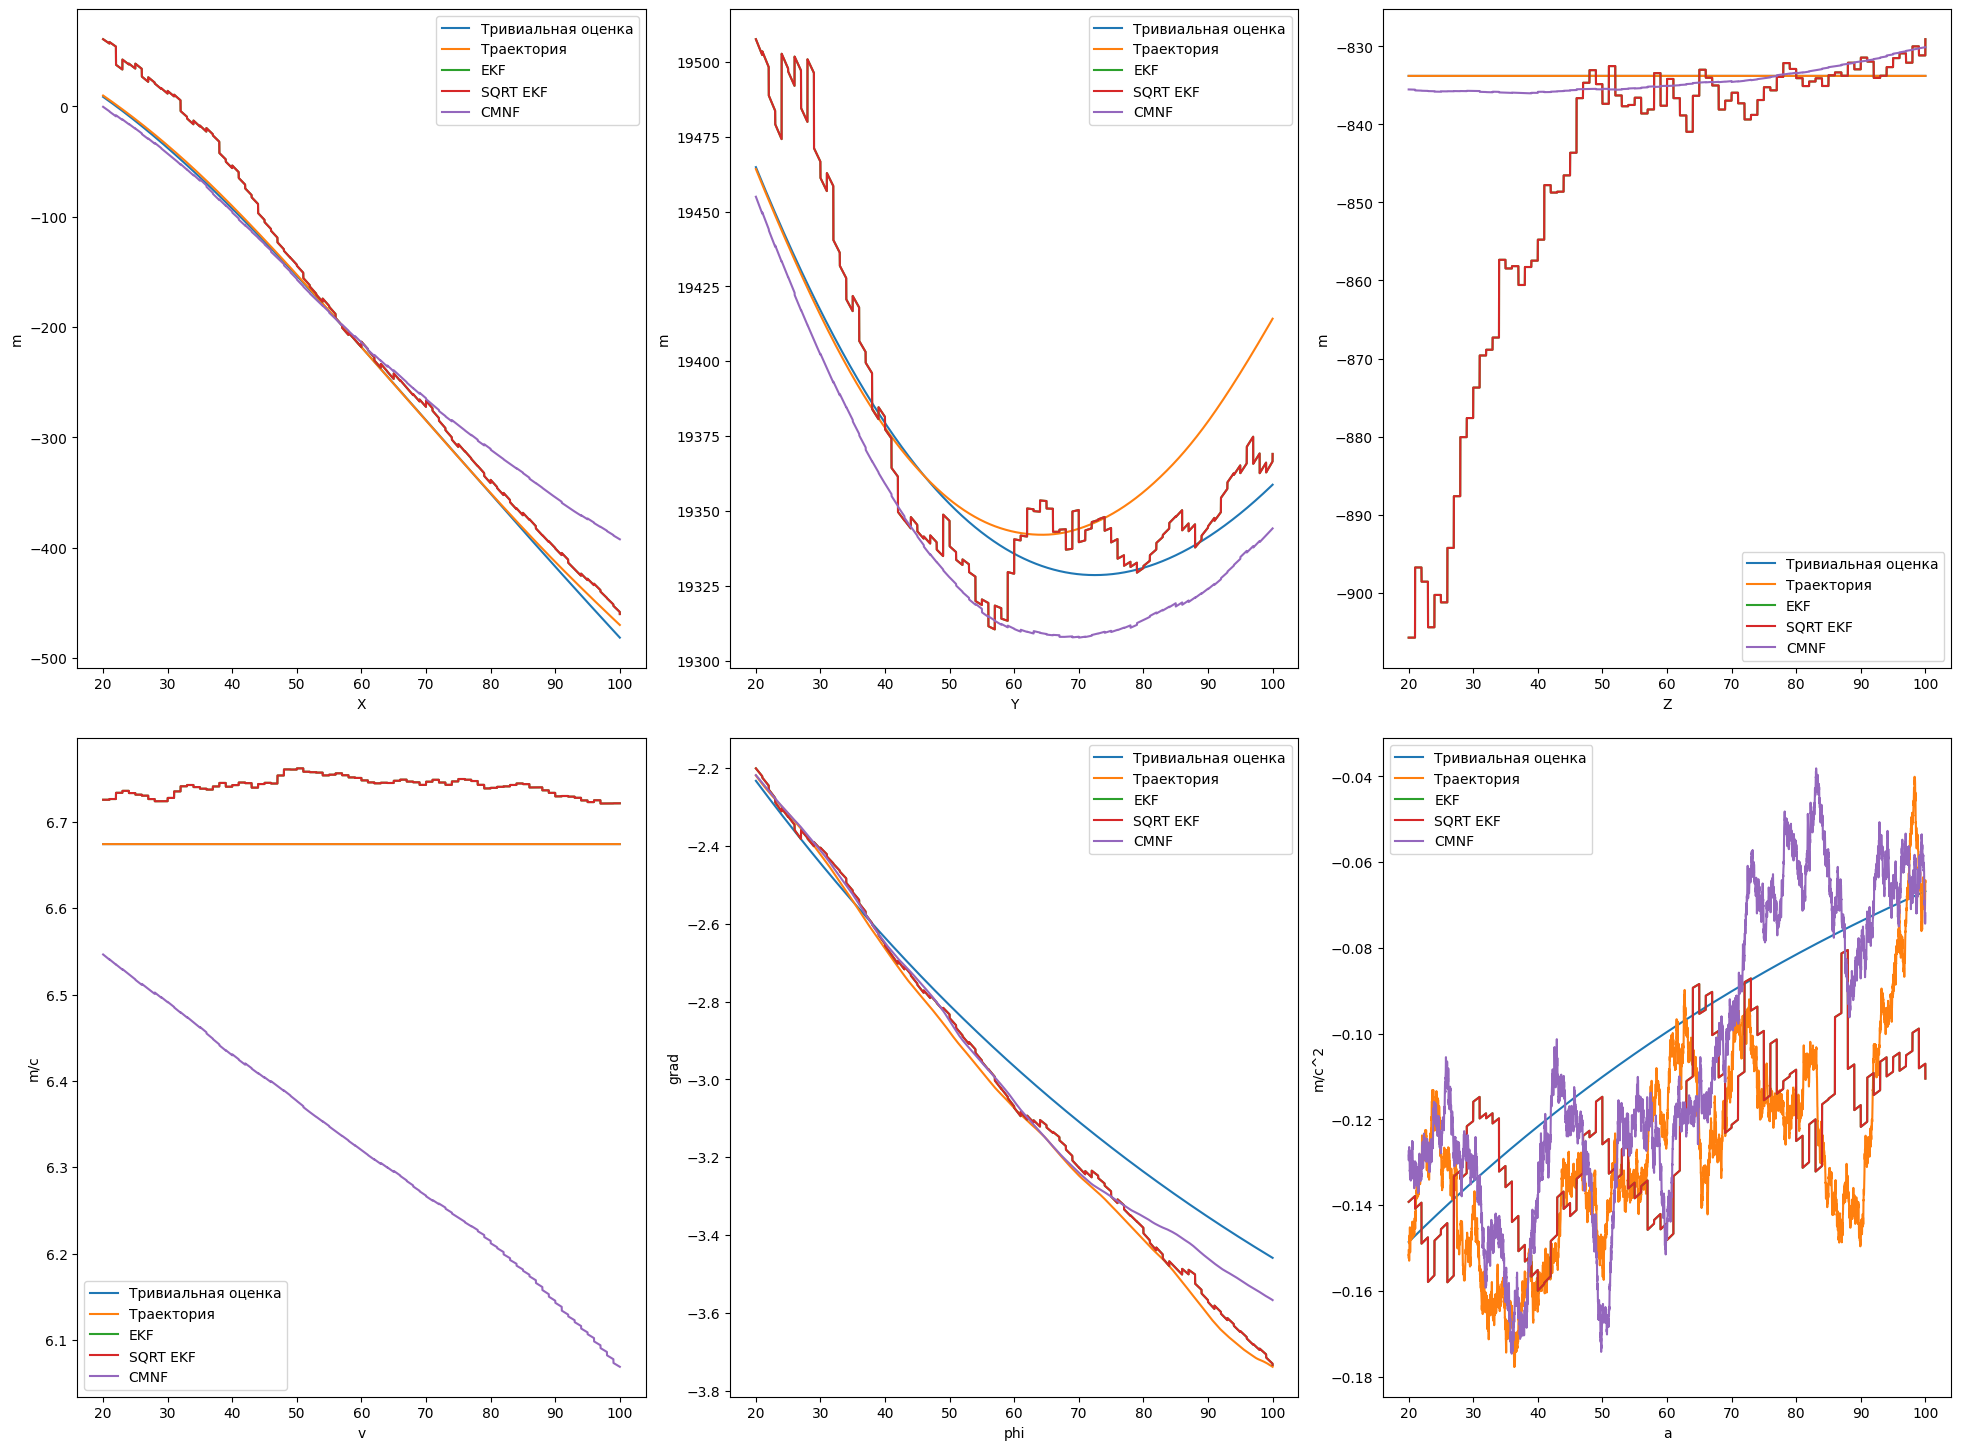

In [104]:
names = ['Тривиальная оценка', 'Траектория', 'EKF', 'SQRT EKF', 'CMNF']
data = [estimation_trivial, true_trajectory, estimation_ekf, estimation_sqrtekf,  estimation_cmnf]
draw(data, names,hide=False)

In [115]:
abs(estimation_sqrtekf_k).shape

(6, 6, 10001)

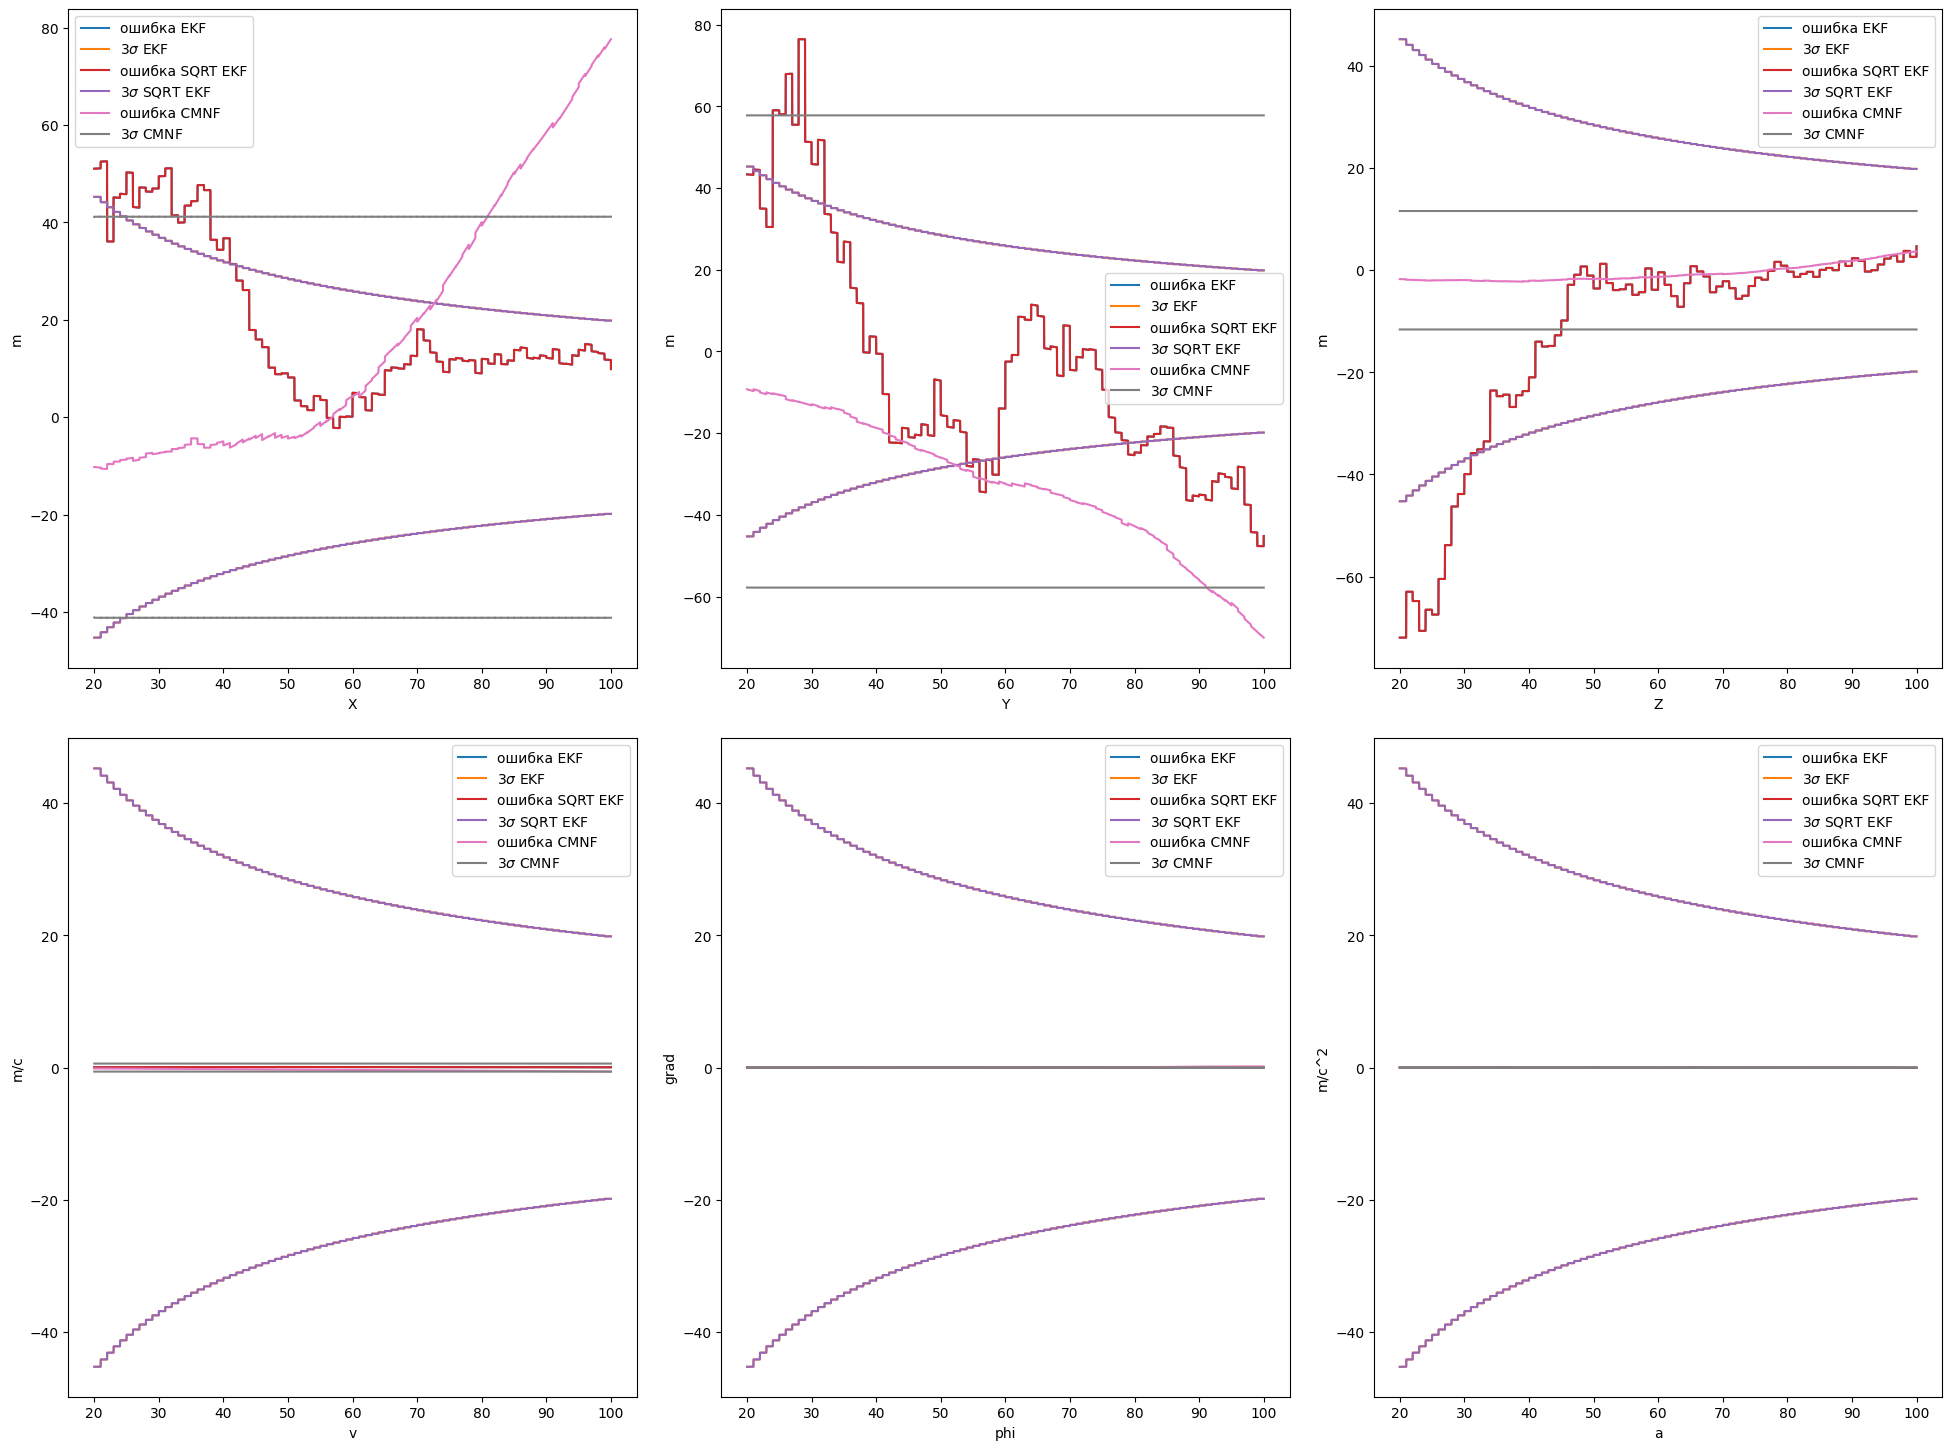

In [121]:
names = ['ошибка EKF', r'$3 \sigma $ EKF', r'$3 \sigma $ EKF',
         'ошибка SQRT EKF', r'$3 \sigma $ SQRT EKF', r'$3 \sigma $ SQRT EKF',
        'ошибка CMNF', r'$3 \sigma $ CMNF', r'$3 \sigma $ CMNF']
data = [difference_of_data(estimation_ekf, true_trajectory), square(estimation_ekf_k, 1),square(estimation_ekf_k, -1),
        difference_of_data(estimation_ekf, true_trajectory), square(estimation_ekf_k, 1),square(estimation_ekf_k, -1),
     difference_of_data(estimation_cmnf, true_trajectory), square(estimation_cmnf_k, 1),square(estimation_cmnf_k, -1)]
draw(data,names)

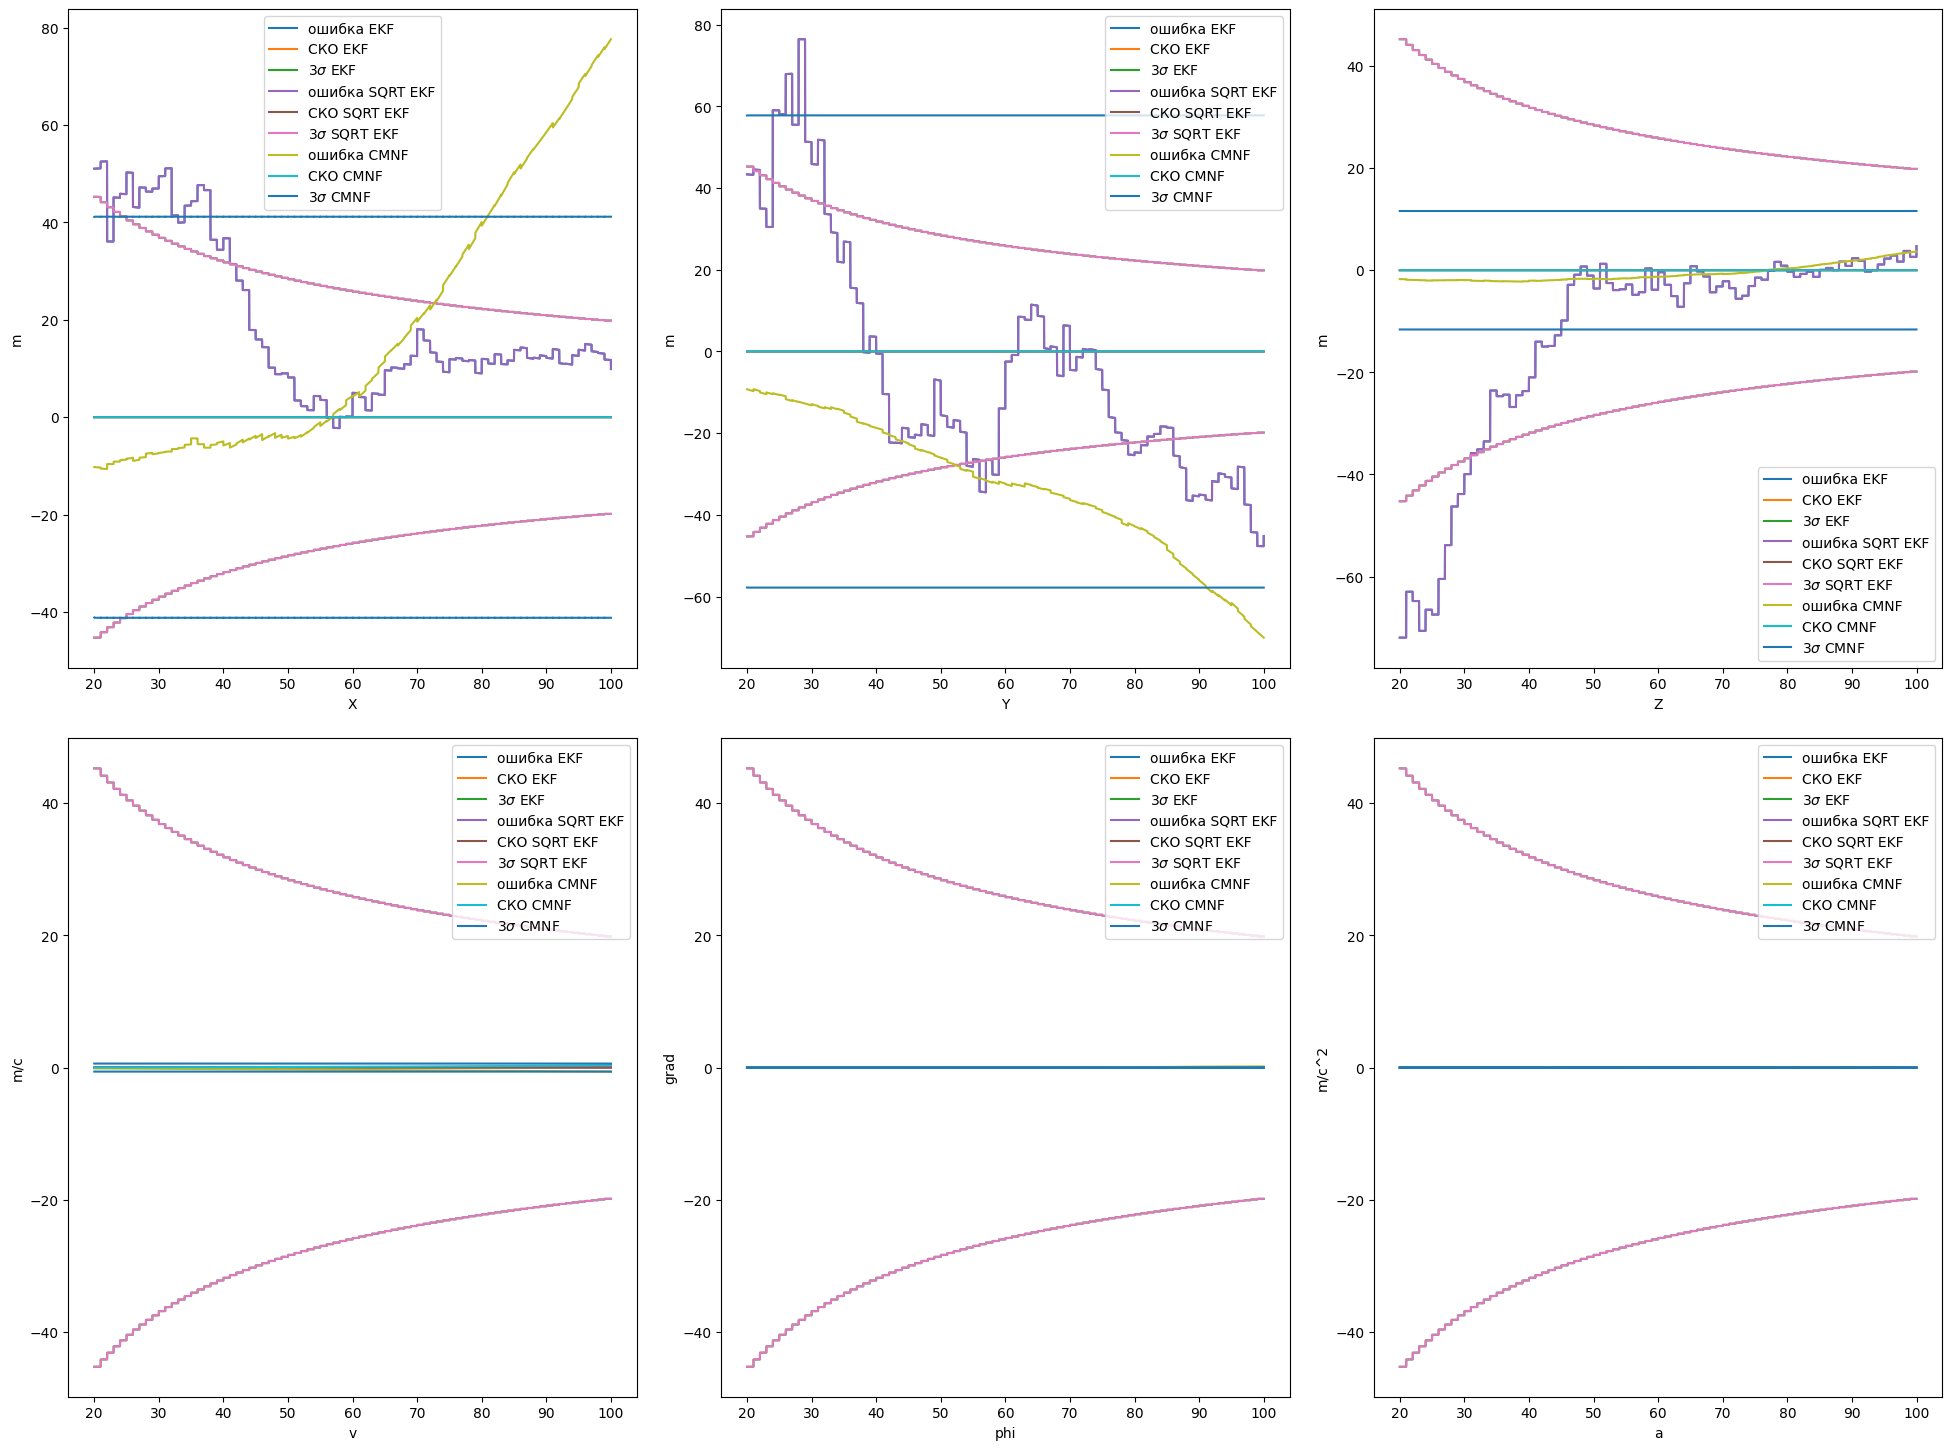

In [122]:
names = ['ошибка EKF', 'СКО EKF', r'$3 \sigma $ EKF', r'$3 \sigma $ EKF',
         'ошибка SQRT EKF', 'СКО SQRT EKF', r'$3 \sigma $ SQRT EKF', r'$3 \sigma $ SQRT EKF',
        'ошибка CMNF', 'СКО CMNF', r'$3 \sigma $ CMNF', r'$3 \sigma $ CMNF']
data = [difference_of_data(estimation_ekf, true_trajectory), mse_ekf, square(estimation_ekf_k, 1), square(estimation_ekf_k, -1),
        difference_of_data(estimation_sqrtekf, true_trajectory), mse_sqrtekf, square(estimation_ekf_k, 1), square(estimation_ekf_k, -1),
        difference_of_data(estimation_cmnf, true_trajectory), mse_cmnf, square(estimation_cmnf_k, 1), square(estimation_cmnf_k, -1)]
draw(data,names)

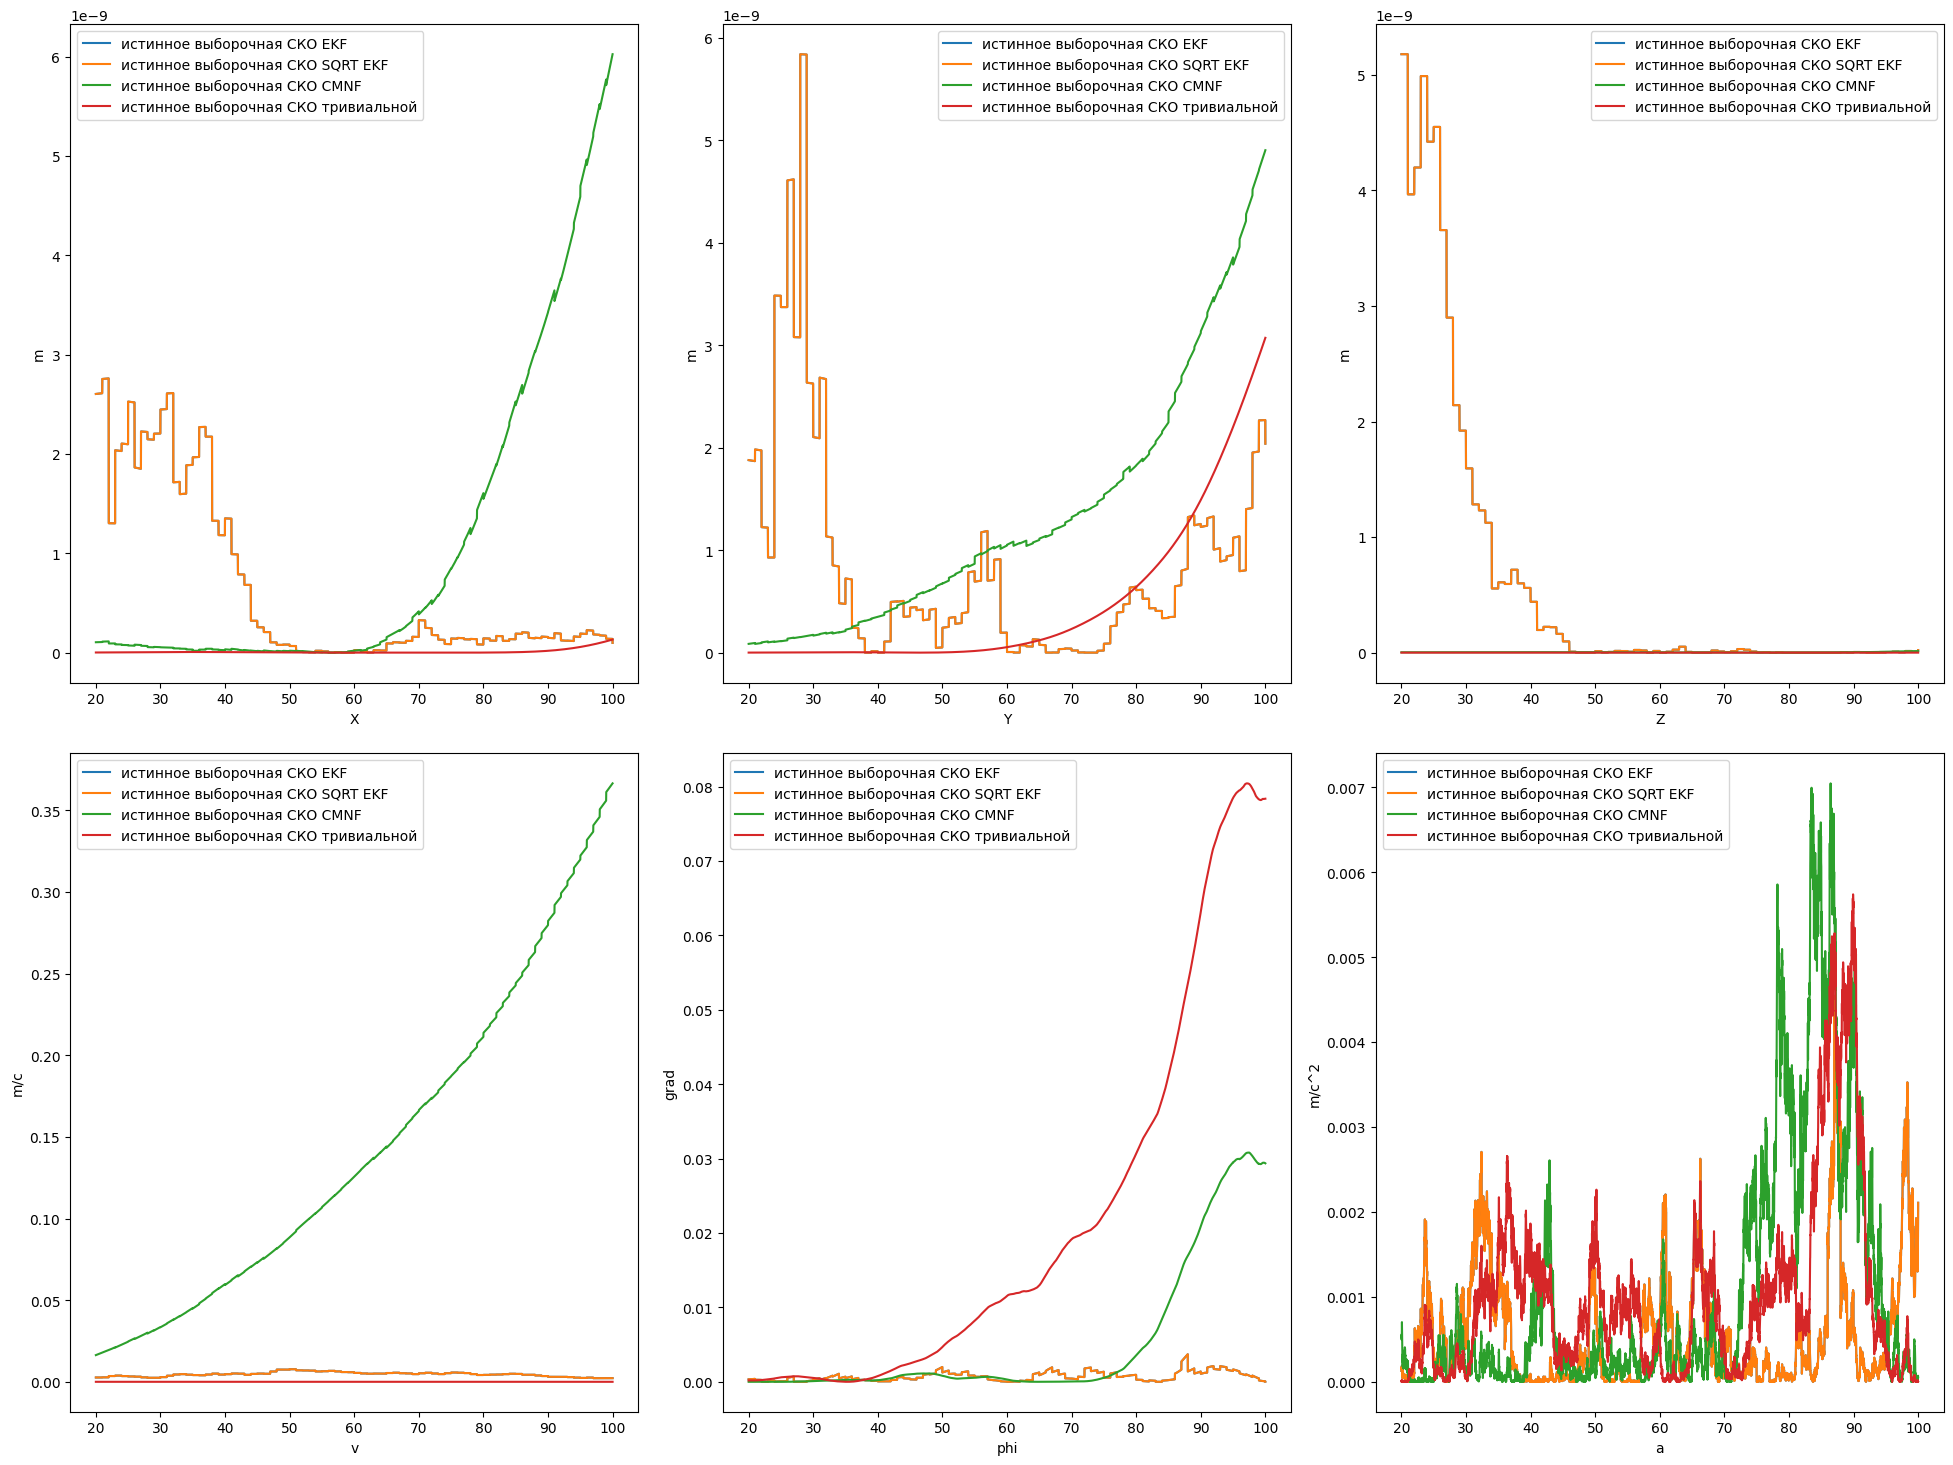

In [123]:
names = ['истинное выборочная СКО EKF', 'истинное выборочная СКО SQRT EKF', 'истинное выборочная СКО CMNF', 'истинное выборочная СКО тривиальной']
data = [mse_ekf, mse_sqrtekf, mse_cmnf, mse_trivial]
draw(data,names)